Movie Recommendations(Collaborative Filtering)

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Loading and Viewing Data

In [15]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv("u.data", sep="\t", names=column_names)
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [16]:
movie_titles = pd.read_csv("Movie_Id_Titles.txt")
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [17]:
df = pd.merge(df,movie_titles,on="item_id")
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [18]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [19]:
ratings["num of ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


Visualizing Data

<Axes: >

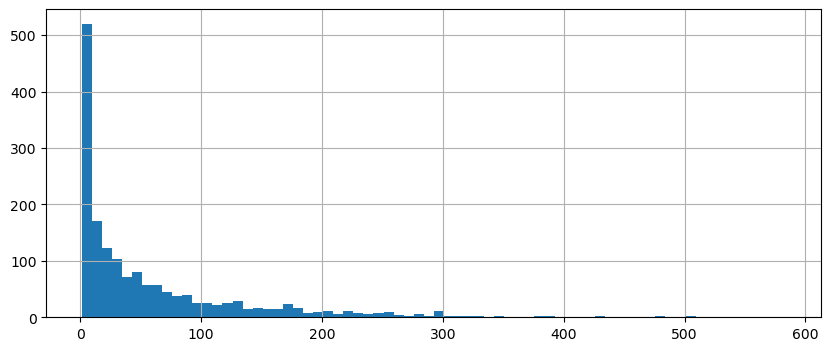

In [20]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<Axes: >

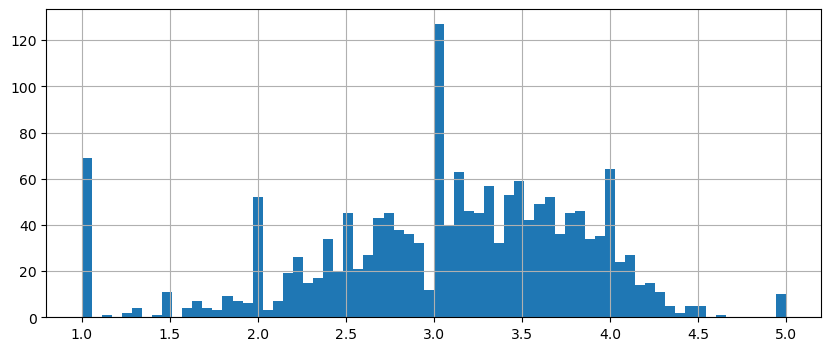

In [21]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

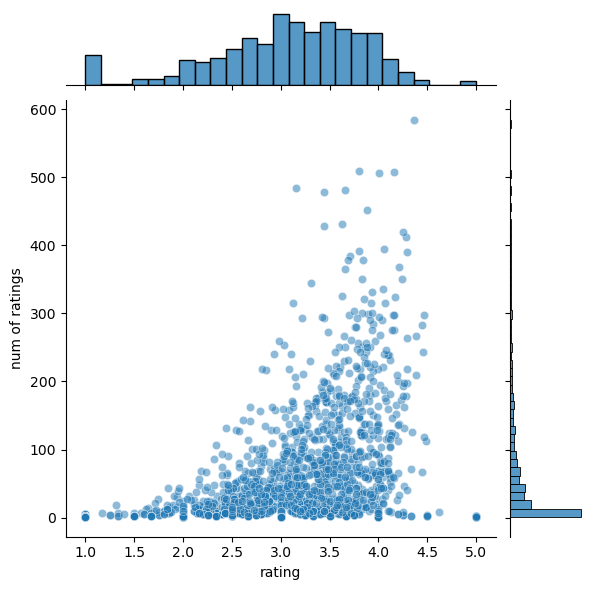

In [22]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [23]:
rec_movie = df.pivot_table(index="user_id", columns="title", values = "rating")
rec_movie

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Code for Top 5 Recommendations for all Movies

In [27]:
for movies in rec_movie:
    similar_movie = rec_movie[movies]
    recommendations = rec_movie.corrwith(similar_movie)
    recommended_movies = pd.DataFrame(recommendations,columns=['Correlation'])
    recommended_movies.dropna(inplace=True)
    print(f"Recommendations for {movies}:")
    recommended_movies = recommended_movies.join(ratings['num of ratings'])
    print(recommended_movies[recommended_movies['num of ratings']>100].sort_values('Correlation',ascending=False).head())
    print("\n")
   

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 'Til There Was You (1997):
                                           Correlation  num of ratings
title                                                                 
Dave (1993)                                        1.0             180
Primal Fear (1996)                                 1.0             178
Indiana Jones and the Last Crusade (1989)          1.0             331
Edge, The (1997)                                   1.0             113
Beautiful Girls (1996)                             1.0             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 1-900 (1994):
                        Correlation  num of ratings
title                                              
Rear Window (1954)              1.0             209
Full Monty, The (1997)          1.0             315
Crow, The (1994)                1.0             134
Ice Storm, The (1997)           1.0             108
Hoop Dreams (1994)              1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 101 Dalmatians (1996):
                                Correlation  num of ratings
title                                                      
101 Dalmatians (1996)              1.000000             109
Murder at 1600 (1997)              0.663965             218
Miracle on 34th Street (1994)      0.609938             101
Being There (1979)                 0.530438             116
Remains of the Day, The (1993)     0.514223             150




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 12 Angry Men (1957):
                             Correlation  num of ratings
title                                                   
12 Angry Men (1957)             1.000000             125
Ulee's Gold (1997)              0.619544             184
Rear Window (1954)              0.570513             209
Seven Years in Tibet (1997)     0.549939             155
Clerks (1994)                   0.528173             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 187 (1997):
                               Correlation  num of ratings
title                                                     
Star Trek: Generations (1994)          1.0             116
Maverick (1994)                        1.0             128
Conan the Barbarian (1981)             1.0             107
Magnificent Seven, The (1954)          1.0             121
Cool Hand Luke (1967)                  1.0             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 2 Days in the Valley (1996):
                                      Correlation  num of ratings
title                                                            
Kolya (1996)                             0.813117             117
Deer Hunter, The (1978)                  0.747231             120
North by Northwest (1959)                0.685692             179
Bridge on the River Kwai, The (1957)     0.611329             165
Ulee's Gold (1997)                       0.603583             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 20,000 Leagues Under the Sea (1954):
                             Correlation  num of ratings
title                                                   
Scream 2 (1997)                 0.811093             106
True Romance (1993)             0.697741             104
Ben-Hur (1959)                  0.637665             124
Kiss the Girls (1997)           0.559017             143
Seven Years in Tibet (1997)     0.553470             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 2001: A Space Odyssey (1968):
                                                    Correlation  \
title                                                             
2001: A Space Odyssey (1968)                           1.000000   
True Romance (1993)                                    0.459189   
Natural Born Killers (1994)                            0.442248   
Being There (1979)                                     0.425009   
Dr. Strangelove or: How I Learned to Stop Worry...     0.392916   

                                                    num of ratings  
title                                                               
2001: A Space Odyssey (1968)                                   259  
True Romance (1993)                                            104  
Natural Born Killers (1994)                                    128  
Being There (1979)                                             116  
Dr. Strangelove or: How I Learned to Stop Worry...             194

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 3 Ninjas: High Noon At Mega Mountain (1998):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 39 Steps, The (1935):
                         Correlation  num of ratings
title                                               
Crash (1996)                0.888523             128
Con Air (1997)              0.801784             137
Frighteners, The (1996)     0.759257             115
Swingers (1996)             0.726300             157
River Wild, The (1994)      0.672131             146




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 8 1/2 (1963):
                                               Correlation  num of ratings
title                                                                     
Father of the Bride Part II (1995)                1.000000             128
Star Trek VI: The Undiscovered Country (1991)     0.900755             161
Rainmaker, The (1997)                             0.866025             145
One Fine Day (1996)                               0.866025             112
Close Shave, A (1995)                             0.856349             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 8 Heads in a Duffel Bag (1997):
                        Correlation  num of ratings
title                                              
Mother (1996)                   1.0             169
Jerry Maguire (1996)            1.0             384
Rosewood (1997)                 1.0             114
River Wild, The (1994)          1.0             146
Ransom (1996)                   1.0             267




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for 8 Seconds (1994):
                                   Correlation  num of ratings
title                                                         
Young Guns (1988)                          1.0             101
Devil's Advocate, The (1997)               1.0             188
Die Hard 2 (1990)                          1.0             166
Die Hard: With a Vengeance (1995)          1.0             151
Seven (Se7en) (1995)                       1.0             236




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for A Chef in Love (1996):
                                      Correlation  num of ratings
title                                                            
Return of the Jedi (1983)                     1.0             507
Bridge on the River Kwai, The (1957)          1.0             165
In & Out (1997)                               1.0             230
Empire Strikes Back, The (1980)               1.0             368
Peacemaker, The (1997)                        1.0             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Above the Rim (1994):
                                    Correlation  num of ratings
title                                                          
Ed Wood (1994)                              1.0             133
Father of the Bride Part II (1995)          1.0             128
First Wives Club, The (1996)                1.0             160
Fly Away Home (1996)                        1.0             180
In the Line of Fire (1993)                  1.0             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Absolute Power (1997):
                           Correlation  num of ratings
title                                                 
Absolute Power (1997)         1.000000             127
Murder at 1600 (1997)         0.727512             218
Volcano (1997)                0.600681             219
African Queen, The (1951)     0.586266             152
Mimic (1997)                  0.583524             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Abyss, The (1989):
                                               Correlation  num of ratings
title                                                                     
Abyss, The (1989)                                 1.000000             151
William Shakespeare's Romeo and Juliet (1996)     0.609130             106
Ghost (1990)                                      0.578579             170
Singin' in the Rain (1952)                        0.558353             137
Amistad (1997)                                    0.517769             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ace Ventura: Pet Detective (1994):
                                   Correlation  num of ratings
title                                                         
Ace Ventura: Pet Detective (1994)     1.000000             103
Edge, The (1997)                      0.723123             113
Scream 2 (1997)                       0.573282             106
Shine (1996)                          0.566248             129
Nightmare on Elm Street, A (1984)     0.509132             111




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ace Ventura: When Nature Calls (1995):
                                        Correlation  num of ratings
title                                                              
Mother (1996)                              1.000000             169
Secrets & Lies (1996)                      0.981981             162
Killing Fields, The (1984)                 0.944911             121
Spawn (1997)                               0.763763             143
Good, The Bad and The Ugly, The (1966)     0.730297             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Across the Sea of Time (1995):
                               Correlation  num of ratings
title                                                     
Professional, The (1994)               1.0             149
Star Trek: Generations (1994)          1.0             116
GoldenEye (1995)                       1.0             131
Benny & Joon (1993)                    1.0             102
Little Women (1994)                    1.0             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Addams Family Values (1993):
                                    Correlation  num of ratings
title                                                          
Murder at 1600 (1997)                  0.693548             218
Father of the Bride Part II (1995)     0.678361             128
Jungle2Jungle (1997)                   0.643226             132
Fifth Element, The (1997)              0.531207             197
Gattaca (1997)                         0.508056             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Addicted to Love (1997):
                     Correlation  num of ratings
title                                           
Ben-Hur (1959)          0.943242             124
Little Women (1994)     0.931695             102
Patton (1970)           0.894427             136
Stargate (1994)         0.875000             127
12 Angry Men (1957)     0.867722             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Addiction, The (1995):
                                 Correlation  num of ratings
title                                                       
Remains of the Day, The (1993)           1.0             150
That Thing You Do! (1996)                1.0             176
Seven Years in Tibet (1997)              1.0             155
Sex, Lies, and Videotape (1989)          1.0             101
Ben-Hur (1959)                           1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Adventures of Pinocchio, The (1996):
                                    Correlation  num of ratings
title                                                          
Harold and Maude (1971)                1.000000             121
Bonnie and Clyde (1967)                1.000000             122
In the Name of the Father (1993)       1.000000             102
What's Eating Gilbert Grape (1993)     1.000000             115
Edge, The (1997)                       0.981981             113




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Adventures of Priscilla, Queen of the Desert, The (1994):
                                                    Correlation  \
title                                                             
Adventures of Priscilla, Queen of the Desert, T...     1.000000   
Devil's Advocate, The (1997)                           0.620661   
Sex, Lies, and Videotape (1989)                        0.585242   
Donnie Brasco (1997)                                   0.578688   
Alien: Resurrection (1997)                             0.550827   

                                                    num of ratings  
title                                                               
Adventures of Priscilla, Queen of the Desert, T...             111  
Devil's Advocate, The (1997)                                   188  
Sex, Lies, and Videotape (1989)                                101  
Donnie Brasco (1997)                                           147  
Alien: Resurrection (1997)            

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Adventures of Robin Hood, The (1938):
                                 Correlation  num of ratings
title                                                       
Amistad (1997)                      0.809040             124
Mimic (1997)                        0.790981             101
Gattaca (1997)                      0.671634             136
Peacemaker, The (1997)              0.671332             136
Everyone Says I Love You (1996)     0.666021             168




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Affair to Remember, An (1957):
                                      Correlation  num of ratings
title                                                            
Seven Years in Tibet (1997)              0.911765             155
Fly Away Home (1996)                     0.891042             180
G.I. Jane (1997)                         0.870864             175
Star Trek: The Motion Picture (1979)     0.870388             117
Dante's Peak (1997)                      0.866342             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for African Queen, The (1951):
                               Correlation  num of ratings
title                                                     
African Queen, The (1951)         1.000000             152
Absolute Power (1997)             0.586266             127
Wizard of Oz, The (1939)          0.508389             246
Nutty Professor, The (1996)       0.502100             163
Miracle on 34th Street (1994)     0.471335             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Afterglow (1997):
                             Correlation  num of ratings
title                                                   
True Lies (1994)                     1.0             208
This Is Spinal Tap (1984)            1.0             191
Reservoir Dogs (1992)                1.0             148
Maltese Falcon, The (1941)           1.0             138
Arsenic and Old Lace (1944)          1.0             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Age of Innocence, The (1993):
                                Correlation  num of ratings
title                                                      
Crying Game, The (1992)            0.678807             119
Little Women (1994)                0.611227             102
Ulee's Gold (1997)                 0.610170             184
Remains of the Day, The (1993)     0.542751             150
101 Dalmatians (1996)              0.531490             109




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Aiqing wansui (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Air Bud (1997):
                               Correlation  num of ratings
title                                                     
Crying Game, The (1992)            1.00000             119
Craft, The (1996)                  1.00000             104
Miracle on 34th Street (1994)      1.00000             101
Arsenic and Old Lace (1944)        1.00000             115
Waterworld (1995)                  0.98644             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Air Force One (1997):
                                  Correlation  num of ratings
title                                                        
Air Force One (1997)                 1.000000             431
Hunt for Red October, The (1990)     0.554383             227
Firm, The (1993)                     0.526743             151
Murder at 1600 (1997)                0.514906             218
Eraser (1996)                        0.500606             206




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Air Up There, The (1994):
                                 Correlation  num of ratings
title                                                       
Sex, Lies, and Videotape (1989)          1.0             101
Fly Away Home (1996)                     1.0             180
Deer Hunter, The (1978)                  1.0             120
G.I. Jane (1997)                         1.0             175
On Golden Pond (1981)                    1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Airheads (1994):
                                  Correlation  num of ratings
title                                                        
Postino, Il (1994)                   1.000000             183
Ulee's Gold (1997)                   1.000000             184
Magnificent Seven, The (1954)        0.943242             121
Last of the Mohicans, The (1992)     0.875648             128
Alien: Resurrection (1997)           0.866342             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Akira (1988):
                             Correlation  num of ratings
title                                                   
Rainmaker, The (1997)           0.968246             145
Amistad (1997)                  0.944444             124
Ice Storm, The (1997)           0.866025             108
Kolya (1996)                    0.801784             117
Seven Years in Tibet (1997)     0.789474             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Aladdin (1992):
                         Correlation  num of ratings
title                                               
Aladdin (1992)              1.000000             219
Lion King, The (1994)       0.514440             220
Cinderella (1950)           0.481009             129
Grumpier Old Men (1995)     0.467307             148
Mrs. Doubtfire (1993)       0.465720             192




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Aladdin and the King of Thieves (1996):
                          Correlation  num of ratings
title                                                
Big Night (1996)                  1.0             171
Strictly Ballroom (1992)          1.0             104
Bound (1996)                      1.0             129
Evita (1996)                      1.0             259
Kiss the Girls (1997)             1.0             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Alaska (1996):
                                                    Correlation  \
title                                                             
Lost Highway (1997)                                         1.0   
Platoon (1986)                                              1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   
Event Horizon (1997)                                        1.0   
Austin Powers: International Man of Mystery (1997)          1.0   

                                                    num of ratings  
title                                                               
Lost Highway (1997)                                            125  
Platoon (1986)                                                 127  
Adventures of Priscilla, Queen of the Desert, T...             111  
Event Horizon (1997)                                           127  
Austin Powers: International Man of Mystery (1997)             130  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Albino Alligator (1996):
                                    Correlation  num of ratings
title                                                          
Mask, The (1994)                            1.0             129
Crow, The (1994)                            1.0             134
Get Shorty (1995)                           1.0             209
Full Monty, The (1997)                      1.0             315
Four Weddings and a Funeral (1994)          1.0             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Alice in Wonderland (1951):
                                     Correlation  num of ratings
title                                                           
Close Shave, A (1995)                   0.697090             112
G.I. Jane (1997)                        0.556038             175
Hunchback of Notre Dame, The (1996)     0.552568             127
Welcome to the Dollhouse (1995)         0.542518             112
Devil's Advocate, The (1997)            0.542326             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Alien (1979):
                               Correlation  num of ratings
title                                                     
Alien (1979)                      1.000000             291
Ulee's Gold (1997)                0.534682             184
Swingers (1996)                   0.515718             157
Magnificent Seven, The (1954)     0.505870             121
Alien: Resurrection (1997)        0.498284             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Alien 3 (1992):
                                               Correlation  num of ratings
title                                                                     
Kolya (1996)                                      0.741967             117
Ulee's Gold (1997)                                0.713746             184
William Shakespeare's Romeo and Juliet (1996)     0.668397             106
Alien: Resurrection (1997)                        0.666203             124
Peacemaker, The (1997)                            0.644917             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Alien: Resurrection (1997):
                               Correlation  num of ratings
title                                                     
Alien: Resurrection (1997)        1.000000             124
Miracle on 34th Street (1994)     0.790207             101
Outbreak (1995)                   0.729511             104
Kolya (1996)                      0.701990             117
Batman (1989)                     0.670507             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Aliens (1986):
                                               Correlation  num of ratings
title                                                                     
Aliens (1986)                                     1.000000             284
Alien (1979)                                      0.474812             291
William Shakespeare's Romeo and Juliet (1996)     0.435624             106
Mask, The (1994)                                  0.432970             129
Good Will Hunting (1997)                          0.410713             198




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for All About Eve (1950):
                             Correlation  num of ratings
title                                                   
Crash (1996)                    0.860663             128
Kiss the Girls (1997)           0.700000             143
Seven Years in Tibet (1997)     0.680614             155
Fly Away Home (1996)            0.637868             180
Executive Decision (1996)       0.581914             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for All Dogs Go to Heaven 2 (1996):
                            Correlation  num of ratings
title                                                  
Ulee's Gold (1997)                  1.0             184
Scream 2 (1997)                     1.0             106
Room with a View, A (1986)          1.0             134
Harold and Maude (1971)             1.0             121
Edge, The (1997)                    1.0             113




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for All Over Me (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for All Things Fair (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Alphaville (1965):
                                                    Correlation  \
title                                                             
Star Trek: The Wrath of Khan (1982)                         1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   
Starship Troopers (1997)                                    1.0   
Star Trek: First Contact (1996)                             1.0   
Lost World: Jurassic Park, The (1997)                       1.0   

                                                    num of ratings  
title                                                               
Star Trek: The Wrath of Khan (1982)                            244  
Adventures of Priscilla, Queen of the Desert, T...             111  
Starship Troopers (1997)                                       211  
Star Trek: First Contact (1996)                                365  
Lost World: Jurassic Park, The (1997)                          158  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amadeus (1984):
                                               Correlation  num of ratings
title                                                                     
Amadeus (1984)                                    1.000000             276
Henry V (1989)                                    0.418063             124
Miracle on 34th Street (1994)                     0.397766             101
Boot, Das (1981)                                  0.379965             201
William Shakespeare's Romeo and Juliet (1996)     0.378022             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amateur (1994):
                       Correlation  num of ratings
title                                             
One Fine Day (1996)            1.0             112
Amistad (1997)                 1.0             124
101 Dalmatians (1996)          1.0             109
Edge, The (1997)               1.0             113
Michael (1996)                 1.0             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amazing Panda Adventure, The (1995):
                                                    Correlation  \
title                                                             
Mystery Science Theater 3000: The Movie (1996)              1.0   
Ghost and the Darkness, The (1996)                          1.0   
Conspiracy Theory (1997)                                    1.0   
Henry V (1989)                                              1.0   
Dr. Strangelove or: How I Learned to Stop Worry...          1.0   

                                                    num of ratings  
title                                                               
Mystery Science Theater 3000: The Movie (1996)                 130  
Ghost and the Darkness, The (1996)                             128  
Conspiracy Theory (1997)                                       295  
Henry V (1989)                                                 124  
Dr. Strangelove or: How I Learned to Stop Worry...         

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for American Buffalo (1996):
                                      Correlation  num of ratings
title                                                            
Edge, The (1997)                              1.0             113
Gone with the Wind (1939)                     1.0             172
Wag the Dog (1997)                            1.0             137
Star Trek: The Motion Picture (1979)          1.0             117
Bram Stoker's Dracula (1992)                  1.0             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for American Dream (1990):
                          Correlation  num of ratings
title                                                
12 Angry Men (1957)               1.0             125
Full Metal Jacket (1987)          1.0             170
Quiz Show (1994)                  1.0             175
Professional, The (1994)          1.0             149
Pretty Woman (1990)               1.0             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for American President, The (1995):
                                Correlation  num of ratings
title                                                      
American President, The (1995)     1.000000             164
G.I. Jane (1997)                   0.697412             175
Dave (1993)                        0.616206             180
Michael (1996)                     0.546846             119
Firm, The (1993)                   0.532564             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for American Strays (1996):
                                 Correlation  num of ratings
title                                                       
Saint, The (1997)                        1.0             316
English Patient, The (1996)              1.0             481
Postino, Il (1994)                       1.0             183
Long Kiss Goodnight, The (1996)          1.0             185
Kingpin (1996)                           1.0             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for American Werewolf in London, An (1981):
                                                    Correlation  \
title                                                             
Courage Under Fire (1996)                              0.727678   
Kolya (1996)                                           0.666667   
True Romance (1993)                                    0.663882   
Adventures of Priscilla, Queen of the Desert, T...     0.636504   
Ulee's Gold (1997)                                     0.604432   

                                                    num of ratings  
title                                                               
Courage Under Fire (1996)                                      221  
Kolya (1996)                                                   117  
True Romance (1993)                                            104  
Adventures of Priscilla, Queen of the Desert, T...             111  
Ulee's Gold (1997)                                      

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for American in Paris, An (1951):
                       Correlation  num of ratings
title                                             
Ice Storm, The (1997)     0.803913             108
Con Air (1997)            0.765641             137
Shine (1996)              0.717511             129
Spawn (1997)              0.666667             143
Heat (1995)               0.660578             223




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amistad (1997):
                                  Correlation  num of ratings
title                                                        
Amistad (1997)                       1.000000             124
Frighteners, The (1996)              0.860059             115
In the Name of the Father (1993)     0.700000             102
Fried Green Tomatoes (1991)          0.675322             153
Ghost (1990)                         0.668321             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amityville 1992: It's About Time (1992):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amityville 3-D (1983):
                                                    Correlation  \
title                                                             
Nightmare Before Christmas, The (1993)                 1.000000   
Time to Kill, A (1996)                                 1.000000   
My Fair Lady (1964)                                    1.000000   
Dr. Strangelove or: How I Learned to Stop Worry...     1.000000   
Amadeus (1984)                                         0.816497   

                                                    num of ratings  
title                                                               
Nightmare Before Christmas, The (1993)                         143  
Time to Kill, A (1996)                                         232  
My Fair Lady (1964)                                            125  
Dr. Strangelove or: How I Learned to Stop Worry...             194  
Amadeus (1984)                                                 276  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amityville Curse, The (1990):
                                                    Correlation  \
title                                                             
Bram Stoker's Dracula (1992)                                1.0   
Nightmare Before Christmas, The (1993)                      1.0   
Army of Darkness (1993)                                     1.0   
My Fair Lady (1964)                                         1.0   
Dr. Strangelove or: How I Learned to Stop Worry...          1.0   

                                                    num of ratings  
title                                                               
Bram Stoker's Dracula (1992)                                   120  
Nightmare Before Christmas, The (1993)                         143  
Army of Darkness (1993)                                        116  
My Fair Lady (1964)                                            125  
Dr. Strangelove or: How I Learned to Stop Worry...             194

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amityville Horror, The (1979):
                                  Correlation  num of ratings
title                                                        
Peacemaker, The (1997)               0.948683             136
In & Out (1997)                      0.918559             230
My Best Friend's Wedding (1997)      0.903622             172
Emma (1996)                          0.870388             177
Last of the Mohicans, The (1992)     0.771399             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amityville II: The Possession (1982):
                              Correlation  num of ratings
title                                                    
Little Women (1994)                   1.0             102
Devil's Own, The (1997)               1.0             240
First Wives Club, The (1996)          1.0             160
Fly Away Home (1996)                  1.0             180
Scream 2 (1997)                       1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amityville: A New Generation (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amityville: Dollhouse (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Amos & Andrew (1993):
                                 Correlation  num of ratings
title                                                       
Rosewood (1997)                          1.0             114
My Best Friend's Wedding (1997)          1.0             172
Alien: Resurrection (1997)               1.0             124
Event Horizon (1997)                     1.0             127
Shine (1996)                             1.0             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for An Unforgettable Summer (1994):
                                  Correlation  num of ratings
title                                                        
Rumble in the Bronx (1995)                1.0             174
Happy Gilmore (1996)                      1.0             149
Kolya (1996)                              1.0             117
James and the Giant Peach (1996)          1.0             126
Trainspotting (1996)                      1.0             250




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Anaconda (1997):
                                        Correlation  num of ratings
title                                                              
Carrie (1976)                              0.904534             121
Bonnie and Clyde (1967)                    0.891042             122
Down Periscope (1996)                      0.670820             101
Father of the Bride Part II (1995)         0.651447             128
Beavis and Butt-head Do America (1996)     0.650221             156




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Anastasia (1997):
                              Correlation  num of ratings
title                                                    
Deer Hunter, The (1978)          1.000000             120
Arsenic and Old Lace (1944)      0.917249             115
Cinderella (1950)                0.894675             129
Pink Floyd - The Wall (1982)     0.870388             114
Abyss, The (1989)                0.860792             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Andre (1994):
                      Correlation  num of ratings
title                                            
Donnie Brasco (1997)          1.0             147
Event Horizon (1997)          1.0             127
Boogie Nights (1997)          1.0             189
Kolya (1996)                  1.0             117
Edge, The (1997)              1.0             113




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Angel Baby (1995):
                                                    Correlation  \
title                                                             
Wag the Dog (1997)                                          1.0   
George of the Jungle (1997)                                 1.0   
Jackie Brown (1997)                                         1.0   
Austin Powers: International Man of Mystery (1997)          1.0   
Ulee's Gold (1997)                                          1.0   

                                                    num of ratings  
title                                                               
Wag the Dog (1997)                                             137  
George of the Jungle (1997)                                    162  
Jackie Brown (1997)                                            126  
Austin Powers: International Man of Mystery (1997)             130  
Ulee's Gold (1997)                                             184  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Angel and the Badman (1947):
                                     Correlation  num of ratings
title                                                           
Monty Python's Life of Brian (1979)          1.0             174
Ed Wood (1994)                               1.0             133
Sense and Sensibility (1995)                 1.0             268
Pinocchio (1940)                             1.0             101
Shine (1996)                                 1.0             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Angel on My Shoulder (1946):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Angela (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Angels and Insects (1995):
                                  Correlation  num of ratings
title                                                        
North by Northwest (1959)            0.783709             179
True Romance (1993)                  0.777159             104
Dumbo (1941)                         0.670820             123
James and the Giant Peach (1996)     0.664357             126
Apt Pupil (1998)                     0.639010             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Angels in the Outfield (1994):
                            Correlation  num of ratings
title                                                  
Ulee's Gold (1997)             1.000000             184
Spawn (1997)                   0.918559             143
Wrong Trousers, The (1993)     0.868599             118
Cold Comfort Farm (1995)       0.866025             125
Cinema Paradiso (1988)         0.816497             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Angus (1995):
                               Correlation  num of ratings
title                                                     
Bonnie and Clyde (1967)                1.0             122
Magnificent Seven, The (1954)          1.0             121
Being There (1979)                     1.0             116
Lawrence of Arabia (1962)              1.0             173
Killing Fields, The (1984)             1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Anna (1996):
                                                    Correlation  \
title                                                             
Like Water For Chocolate (Como agua para chocol...          1.0   
Cold Comfort Farm (1995)                                    1.0   
Aladdin (1992)                                              1.0   
Gandhi (1982)                                               1.0   
Godfather: Part II, The (1974)                              1.0   

                                                    num of ratings  
title                                                               
Like Water For Chocolate (Como agua para chocol...             148  
Cold Comfort Farm (1995)                                       125  
Aladdin (1992)                                                 219  
Gandhi (1982)                                                  195  
Godfather: Part II, The (1974)                                 209  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Anna Karenina (1997):
                         Correlation  num of ratings
title                                               
Michael (1996)                   1.0             119
Pinocchio (1940)                 1.0             101
Harold and Maude (1971)          1.0             121
Henry V (1989)                   1.0             124
Batman Returns (1992)            1.0             142




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Anne Frank Remembered (1995):
                                Correlation  num of ratings
title                                                      
Down Periscope (1996)                   1.0             101
Remains of the Day, The (1993)          1.0             150
Singin' in the Rain (1952)              1.0             137
Peacemaker, The (1997)                  1.0             136
Alien: Resurrection (1997)              1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Annie Hall (1977):
                                            Correlation  num of ratings
title                                                                  
Annie Hall (1977)                              1.000000             180
Sex, Lies, and Videotape (1989)                0.482625             101
Everyone Says I Love You (1996)                0.474630             168
Star Trek III: The Search for Spock (1984)     0.447976             171
Room with a View, A (1986)                     0.427291             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Another Stakeout (1993):
                                     Correlation  num of ratings
title                                                           
Cop Land (1997)                         1.000000             175
Mother (1996)                           0.872872             169
Father of the Bride Part II (1995)      0.742391             128
Maverick (1994)                         0.713351             128
Hunchback of Notre Dame, The (1996)     0.707673             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Antonia's Line (1995):
                           Correlation  num of ratings
title                                                 
Edge, The (1997)              0.910436             113
Lost Highway (1997)           0.895761             125
Kiss the Girls (1997)         0.877058             143
Executive Decision (1996)     0.802740             157
G.I. Jane (1997)              0.790569             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Aparajito (1956):
                                        Correlation  num of ratings
title                                                              
Lion King, The (1994)                           1.0             220
Being There (1979)                              1.0             116
Ghost (1990)                                    1.0             170
Dead Poets Society (1989)                       1.0             251
Good, The Bad and The Ugly, The (1966)          1.0             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Apartment, The (1960):
                                 Correlation  num of ratings
title                                                       
Cop Land (1997)                     0.690425             175
Long Kiss Goodnight, The (1996)     0.650084             185
Peacemaker, The (1997)              0.632456             136
Rumble in the Bronx (1995)          0.602743             174
Young Guns (1988)                   0.563554             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Apocalypse Now (1979):
                         Correlation  num of ratings
title                                               
Apocalypse Now (1979)       1.000000             221
Deer Hunter, The (1978)     0.480323             120
GoodFellas (1990)           0.478496             226
On Golden Pond (1981)       0.465986             106
Being There (1979)          0.452016             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Apollo 13 (1995):
                        Correlation  num of ratings
title                                              
Apollo 13 (1995)           1.000000             276
Michael (1996)             0.580472             119
Peacemaker, The (1997)     0.530280             136
G.I. Jane (1997)           0.492649             175
Wag the Dog (1997)         0.467329             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Apostle, The (1997):
                                                    Correlation  \
title                                                             
101 Dalmatians (1996)                                  1.000000   
Father of the Bride Part II (1995)                     1.000000   
Nightmare Before Christmas, The (1993)                 1.000000   
Adventures of Priscilla, Queen of the Desert, T...     0.942954   
Remains of the Day, The (1993)                         0.935819   

                                                    num of ratings  
title                                                               
101 Dalmatians (1996)                                          109  
Father of the Bride Part II (1995)                             128  
Nightmare Before Christmas, The (1993)                         143  
Adventures of Priscilla, Queen of the Desert, T...             111  
Remains of the Day, The (1993)                                 150  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Apple Dumpling Gang, The (1975):
                                    Correlation  num of ratings
title                                                          
Crash (1996)                           1.000000             128
Kolya (1996)                           1.000000             117
Ghost and the Darkness, The (1996)     0.943880             128
Event Horizon (1997)                   0.932505             127
Everyone Says I Love You (1996)        0.904534             168




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for April Fool's Day (1986):
                             Correlation  num of ratings
title                                                   
101 Dalmatians (1996)                1.0             109
Rumble in the Bronx (1995)           1.0             174
Hudsucker Proxy, The (1994)          1.0             110
My Fair Lady (1964)                  1.0             125
Courage Under Fire (1996)            1.0             221




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Apt Pupil (1998):
                                 Correlation  num of ratings
title                                                       
Apt Pupil (1998)                    1.000000             160
As Good As It Gets (1997)           0.701931             112
Mask, The (1994)                    0.471247             129
Dave (1993)                         0.462730             180
Clear and Present Danger (1994)     0.452504             179




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Aristocats, The (1970):
                         Correlation  num of ratings
title                                               
Peacemaker, The (1997)      1.000000             136
Edge, The (1997)            1.000000             113
Rainmaker, The (1997)       0.944911             145
Grumpier Old Men (1995)     0.874291             148
Jackie Brown (1997)         0.771744             126




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Army of Darkness (1993):
                                                    Correlation  \
title                                                             
Army of Darkness (1993)                                1.000000   
Ulee's Gold (1997)                                     0.629253   
Full Monty, The (1997)                                 0.607557   
Wrong Trousers, The (1993)                             0.556615   
Austin Powers: International Man of Mystery (1997)     0.489875   

                                                    num of ratings  
title                                                               
Army of Darkness (1993)                                        116  
Ulee's Gold (1997)                                             184  
Full Monty, The (1997)                                         315  
Wrong Trousers, The (1993)                                     118  
Austin Powers: International Man of Mystery (1997)             130  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Around the World in 80 Days (1956):
                 Correlation  num of ratings
title                                       
Scream 2 (1997)     0.927173             106
Kolya (1996)        0.913500             117
Rosewood (1997)     0.878310             114
Cop Land (1997)     0.852803             175
Mimic (1997)        0.785714             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Arrival, The (1996):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     0.749445             155
Fried Green Tomatoes (1991)     0.699860             153
Tombstone (1993)                0.660909             108
Spawn (1997)                    0.643821             143
Real Genius (1985)              0.627665             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Arsenic and Old Lace (1944):
                                     Correlation  num of ratings
title                                                           
Arsenic and Old Lace (1944)             1.000000             115
In & Out (1997)                         0.718827             230
Grosse Pointe Blank (1997)              0.652086             160
Down Periscope (1996)                   0.609732             101
Hunchback of Notre Dame, The (1996)     0.593207             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for As Good As It Gets (1997):
                           Correlation  num of ratings
title                                                 
As Good As It Gets (1997)     1.000000             112
Apt Pupil (1998)              0.701931             160
Mask, The (1994)              0.618215             129
Batman Forever (1995)         0.587782             114
Glory (1989)                  0.533915             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Assassins (1995):
                                    Correlation  num of ratings
title                                                          
Rosewood (1997)                        0.755929             114
Father of the Bride Part II (1995)     0.746347             128
Starship Troopers (1997)               0.722644             211
Ghost and the Darkness, The (1996)     0.703227             128
Deer Hunter, The (1978)                0.675725             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Assignment, The (1997):
                                   Correlation  num of ratings
title                                                         
Wizard of Oz, The (1939)                   1.0             246
Manchurian Candidate, The (1962)           1.0             131
Jackie Chan's First Strike (1996)          1.0             145
African Queen, The (1951)                  1.0             152
Cool Hand Luke (1967)                      1.0             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Associate, The (1996):
                                 Correlation  num of ratings
title                                                       
Lost Highway (1997)                 0.868326             125
Nikita (La Femme Nikita) (1990)     0.867528             127
Raging Bull (1980)                  0.855717             116
Patton (1970)                       0.852803             136
Die Hard 2 (1990)                   0.842424             166




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Audrey Rose (1977):
                                    Correlation  num of ratings
title                                                          
Little Women (1994)                         1.0             102
Father of the Bride Part II (1995)          1.0             128
Tin Cup (1996)                              1.0             193
Dante's Peak (1997)                         1.0             240
Crash (1996)                                1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for August (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Austin Powers: International Man of Mystery (1997):
                                                    Correlation  \
title                                                             
Austin Powers: International Man of Mystery (1997)     1.000000   
Gone with the Wind (1939)                              0.553188   
Happy Gilmore (1996)                                   0.543300   
Mary Poppins (1964)                                    0.517572   
Primal Fear (1996)                                     0.499519   

                                                    num of ratings  
title                                                               
Austin Powers: International Man of Mystery (1997)             130  
Gone with the Wind (1939)                                      172  
Happy Gilmore (1996)                                           149  
Mary Poppins (1964)                                            178  
Primal Fear (1996)                          

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Awfully Big Adventure, An (1995):
                           Correlation  num of ratings
title                                                 
Kolya (1996)                       1.0             117
Gone with the Wind (1939)          1.0             172
Courage Under Fire (1996)          1.0             221
Deer Hunter, The (1978)            1.0             120
Ice Storm, The (1997)              1.0             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ayn Rand: A Sense of Life (1997):
                            Correlation  num of ratings
title                                                  
Volcano (1997)                      1.0             219
Evita (1996)                        1.0             259
Alien: Resurrection (1997)          1.0             124
Scream 2 (1997)                     1.0             106
Crash (1996)                        1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for B*A*P*S (1997):
                                 Correlation  num of ratings
title                                                       
Executive Decision (1996)                1.0             157
Eraser (1996)                            1.0             206
Boot, Das (1981)                         1.0             201
Multiplicity (1996)                      1.0             134
Star Trek: First Contact (1996)          1.0             365


Recommendations for B. Monkey (1998):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Babe (1995):
                                       Correlation  num of ratings
title                                                             
Babe (1995)                               1.000000             219
Peacemaker, The (1997)                    0.543554             136
Batman Returns (1992)                     0.469349             142
Lost World: Jurassic Park, The (1997)     0.465383             158
Cinderella (1950)                         0.433289             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Baby-Sitters Club, The (1995):
                            Correlation  num of ratings
title                                                  
Chinatown (1974)                    1.0             147
Ice Storm, The (1997)               1.0             108
Secrets & Lies (1996)               1.0             162
Tomorrow Never Dies (1997)          1.0             180
Room with a View, A (1986)          1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Babyfever (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Babysitter, The (1995):
                     Correlation  num of ratings
title                                           
Rock, The (1996)             1.0             378
Mask, The (1994)             1.0             129
Dante's Peak (1997)          1.0             240
Eraser (1996)                1.0             206
Crow, The (1994)             1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Back to the Future (1985):
                           Correlation  num of ratings
title                                                 
Back to the Future (1985)     1.000000             350
Speed (1994)                  0.567509             230
Pretty Woman (1990)           0.535240             164
Michael (1996)                0.523826             119
Frighteners, The (1996)       0.523183             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Backbeat (1993):
                              Correlation  num of ratings
title                                                    
Devil's Advocate, The (1997)     1.000000             188
Down Periscope (1996)            1.000000             101
Benny & Joon (1993)              0.963087             102
Arsenic and Old Lace (1944)      0.942809             115
Dante's Peak (1997)              0.927173             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bad Boys (1995):
                                 Correlation  num of ratings
title                                                       
Sex, Lies, and Videotape (1989)     0.873704             101
Fly Away Home (1996)                0.842655             180
Jungle2Jungle (1997)                0.773225             132
Everyone Says I Love You (1996)     0.729996             168
Peacemaker, The (1997)              0.714286             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bad Company (1995):
                                 Correlation  num of ratings
title                                                       
Ulee's Gold (1997)                       1.0             184
As Good As It Gets (1997)                1.0             112
M*A*S*H (1970)                           1.0             206
Killing Fields, The (1984)               1.0             121
Sex, Lies, and Videotape (1989)          1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bad Girls (1994):
                                Correlation  num of ratings
title                                                      
Crimson Tide (1995)                     1.0             154
Ulee's Gold (1997)                      1.0             184
Big Night (1996)                        1.0             171
Remains of the Day, The (1993)          1.0             150
Some Like It Hot (1959)                 1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bad Moon (1996):
                                        Correlation  num of ratings
title                                                              
Platoon (1986)                                  1.0             127
Highlander (1986)                               1.0             153
One Flew Over the Cuckoo's Nest (1975)          1.0             264
Patton (1970)                                   1.0             136
M*A*S*H (1970)                                  1.0             206




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bad Taste (1987):
                                 Correlation  num of ratings
title                                                       
My Fair Lady (1964)                 1.000000             125
Remains of the Day, The (1993)      1.000000             150
Sex, Lies, and Videotape (1989)     1.000000             101
Room with a View, A (1986)          1.000000             134
Courage Under Fire (1996)           0.970725             221




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ballad of Narayama, The (Narayama Bushiko) (1958):
                              Correlation  num of ratings
title                                                    
Heat (1995)                           1.0             223
Close Shave, A (1995)                 1.0             112
Ulee's Gold (1997)                    1.0             184
Sense and Sensibility (1995)          1.0             268
Secrets & Lies (1996)                 1.0             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Balto (1995):
                                 Correlation  num of ratings
title                                                       
Cinema Paradiso (1988)                   1.0             121
Sex, Lies, and Videotape (1989)          1.0             101
Mighty Aphrodite (1995)                  1.0             184
Con Air (1997)                           1.0             137
Crash (1996)                             1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bananas (1971):
                                       Correlation  num of ratings
title                                                             
Seven Years in Tibet (1997)               1.000000             155
Craft, The (1996)                         0.887125             104
Wag the Dog (1997)                        0.829156             137
Lost World: Jurassic Park, The (1997)     0.697225             158
One Fine Day (1996)                       0.679366             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Band Wagon, The (1953):
                                Correlation  num of ratings
title                                                      
On Golden Pond (1981)                   1.0             106
Little Women (1994)                     1.0             102
Remains of the Day, The (1993)          1.0             150
Pinocchio (1940)                        1.0             101
Dumbo (1941)                            1.0             123




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Barb Wire (1996):
                       Correlation  num of ratings
title                                             
Ulee's Gold (1997)        1.000000             184
Ice Storm, The (1997)     1.000000             108
Amistad (1997)            1.000000             124
G.I. Jane (1997)          0.948683             175
Michael (1996)            0.938315             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Barbarella (1968):
                        Correlation  num of ratings
title                                              
Peacemaker, The (1997)     1.000000             136
Close Shave, A (1995)      0.888523             112
Rainmaker, The (1997)      0.866025             145
Big Night (1996)           0.840606             171
Fly Away Home (1996)       0.689701             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Barcelona (1994):
                          Correlation  num of ratings
title                                                
Good Will Hunting (1997)     0.768350             198
Outbreak (1995)              0.737503             104
Tombstone (1993)             0.727953             108
One Fine Day (1996)          0.706739             112
True Romance (1993)          0.699195             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Basic Instinct (1992):
                       Correlation  num of ratings
title                                             
Basic Instinct (1992)     1.000000             101
Ice Storm, The (1997)     0.918559             108
Boot, Das (1981)          0.611478             201
Spawn (1997)              0.597939             143
Under Siege (1992)        0.578497             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Basketball Diaries, The (1995):
                        Correlation  num of ratings
title                                              
Kolya (1996)               1.000000             117
Peacemaker, The (1997)     1.000000             136
G.I. Jane (1997)           0.876460             175
My Fair Lady (1964)        0.798280             125
Murder at 1600 (1997)      0.772815             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Basquiat (1996):
                        Correlation  num of ratings
title                                              
Michael (1996)             0.975900             119
Mother (1996)              0.827379             169
Beautiful Girls (1996)     0.809416             115
Peacemaker, The (1997)     0.790569             136
Lost Highway (1997)        0.789026             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bastard Out of Carolina (1996):
                                    Correlation  num of ratings
title                                                          
Con Air (1997)                         1.000000             137
One Fine Day (1996)                    0.944911             112
Maverick (1994)                        0.918559             128
Ghost and the Darkness, The (1996)     0.883883             128
Absolute Power (1997)                  0.875000             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Batman & Robin (1997):
                                Correlation  num of ratings
title                                                      
Michael (1996)                     0.840211             119
Batman Forever (1995)              0.778512             114
Philadelphia Story, The (1940)     0.763763             104
Good Will Hunting (1997)           0.734570             198
GoldenEye (1995)                   0.700761             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Batman (1989):
                            Correlation  num of ratings
title                                                  
Batman (1989)                  1.000000             201
Alien: Resurrection (1997)     0.670507             124
Scream 2 (1997)                0.601410             106
Good Will Hunting (1997)       0.591879             198
Cold Comfort Farm (1995)       0.564546             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Batman Forever (1995):
                           Correlation  num of ratings
title                                                 
Batman Forever (1995)         1.000000             114
Down Periscope (1996)         0.624417             101
Jungle2Jungle (1997)          0.611052             132
As Good As It Gets (1997)     0.587782             112
Net, The (1995)               0.568909             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Batman Returns (1992):
                        Correlation  num of ratings
title                                              
Batman Returns (1992)      1.000000             142
Michael (1996)             0.577122             119
Fly Away Home (1996)       0.550590             180
Peacemaker, The (1997)     0.543066             136
Batman (1989)              0.484477             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Baton Rouge (1988):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bean (1997):
                            Correlation  num of ratings
title                                                  
Little Women (1994)            0.746203             102
On Golden Pond (1981)          0.727860             106
Strictly Ballroom (1992)       0.710818             104
Killing Fields, The (1984)     0.702764             121
Craft, The (1996)              0.690066             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beans of Egypt, Maine, The (1994):
                                                    Correlation  \
title                                                             
Adventures of Priscilla, Queen of the Desert, T...          1.0   
Quiz Show (1994)                                            1.0   
Alien: Resurrection (1997)                                  1.0   
It's a Wonderful Life (1946)                                1.0   
Lawrence of Arabia (1962)                                   1.0   

                                                    num of ratings  
title                                                               
Adventures of Priscilla, Queen of the Desert, T...             111  
Quiz Show (1994)                                               175  
Alien: Resurrection (1997)                                     124  
It's a Wonderful Life (1946)                                   231  
Lawrence of Arabia (1962)                                    

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beat the Devil (1954):
                                   Correlation  num of ratings
title                                                         
Braveheart (1995)                          1.0             297
Ransom (1996)                              1.0             267
Interview with the Vampire (1994)          1.0             137
Kingpin (1996)                             1.0             162
Ghost (1990)                               1.0             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beautician and the Beast, The (1997):
                                  Correlation  num of ratings
title                                                        
Last of the Mohicans, The (1992)     1.000000             128
Under Siege (1992)                   0.942809             124
Mask, The (1994)                     0.890086             129
In the Name of the Father (1993)     0.840168             102
GoldenEye (1995)                     0.774170             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beautiful Girls (1996):
                                   Correlation  num of ratings
title                                                         
Beautiful Girls (1996)                1.000000             115
Lawrence of Arabia (1962)             0.670960             173
Full Metal Jacket (1987)              0.587370             170
Maltese Falcon, The (1941)            0.566385             138
Die Hard: With a Vengeance (1995)     0.562513             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beautiful Thing (1996):
                               Correlation  num of ratings
title                                                     
Basic Instinct (1992)             1.000000             101
Patton (1970)                     1.000000             136
Magnificent Seven, The (1954)     1.000000             121
Dragonheart (1996)                0.984732             158
Rosewood (1997)                   0.910182             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beauty and the Beast (1991):
                                     Correlation  num of ratings
title                                                           
Beauty and the Beast (1991)             1.000000             202
Amistad (1997)                          0.549031             124
Kiss the Girls (1997)                   0.541736             143
Hunchback of Notre Dame, The (1996)     0.525589             127
Lion King, The (1994)                   0.516434             220




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beavis and Butt-head Do America (1996):
                                        Correlation  num of ratings
title                                                              
Beavis and Butt-head Do America (1996)     1.000000             156
Ice Storm, The (1997)                      0.808290             108
James and the Giant Peach (1996)           0.560427             126
Devil's Advocate, The (1997)               0.555192             188
GoodFellas (1990)                          0.528325             226




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bed of Roses (1996):
                           Correlation  num of ratings
title                                                 
Cool Hand Luke (1967)         1.000000             164
Some Like It Hot (1959)       0.870388             128
Jungle2Jungle (1997)          0.842857             132
Ice Storm, The (1997)         0.812142             108
Gone with the Wind (1939)     0.741160             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bedknobs and Broomsticks (1971):
                          Correlation  num of ratings
title                                                
Ulee's Gold (1997)           0.840168             184
Con Air (1997)               0.817913             137
Good Will Hunting (1997)     0.753710             198
Tombstone (1993)             0.746343             108
Jackie Brown (1997)          0.739600             126




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Before Sunrise (1995):
                                     Correlation  num of ratings
title                                                           
Dante's Peak (1997)                     0.816497             240
Frighteners, The (1996)                 0.755295             115
Donnie Brasco (1997)                    0.731925             147
Mr. Smith Goes to Washington (1939)     0.697217             105
12 Angry Men (1957)                     0.655930             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Before and After (1996):
                                        Correlation  num of ratings
title                                                              
Being There (1979)                              1.0             116
Star Trek: The Motion Picture (1979)            1.0             117
Edge, The (1997)                                1.0             113
Good, The Bad and The Ugly, The (1966)          1.0             137
Patton (1970)                                   1.0             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Before the Rain (Pred dozhdot) (1994):
                              Correlation  num of ratings
title                                                    
Platoon (1986)                        1.0             127
Clueless (1995)                       1.0             170
Bonnie and Clyde (1967)               1.0             122
Bram Stoker's Dracula (1992)          1.0             120
Shining, The (1980)                   1.0             206




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Being Human (1993):
                              Correlation  num of ratings
title                                                    
Lion King, The (1994)                 1.0             220
Clockwork Orange, A (1971)            1.0             221
Boot, Das (1981)                      1.0             201
Bram Stoker's Dracula (1992)          1.0             120
Full Metal Jacket (1987)              1.0             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Being There (1979):
                                 Correlation  num of ratings
title                                                       
Being There (1979)                  1.000000             116
Ulee's Gold (1997)                  0.717006             184
Pinocchio (1940)                    0.570323             101
Dumbo (1941)                        0.559537             123
Welcome to the Dollhouse (1995)     0.554722             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Believers, The (1987):
                                    Correlation  num of ratings
title                                                          
My Fair Lady (1964)                         1.0             125
What's Eating Gilbert Grape (1993)          1.0             115
Ghost and the Darkness, The (1996)          1.0             128
Devil's Advocate, The (1997)                1.0             188
Emma (1996)                                 1.0             177




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Belle de jour (1967):
                               Correlation  num of ratings
title                                                     
Event Horizon (1997)              1.000000             127
Benny & Joon (1993)               0.834784             102
Ulee's Gold (1997)                0.811156             184
Magnificent Seven, The (1954)     0.793116             121
Stargate (1994)                   0.773021             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ben-Hur (1959):
                                  Correlation  num of ratings
title                                                        
Ben-Hur (1959)                       1.000000             124
Cop Land (1997)                      0.840211             175
Wrong Trousers, The (1993)           0.616659             118
Manchurian Candidate, The (1962)     0.563326             131
Great Escape, The (1963)             0.550979             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Benny & Joon (1993):
                                  Correlation  num of ratings
title                                                        
Benny & Joon (1993)                  1.000000             102
Fly Away Home (1996)                 0.716458             180
Rainmaker, The (1997)                0.542326             145
Last of the Mohicans, The (1992)     0.530055             128
Good Will Hunting (1997)             0.499158             198




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bent (1997):
                         Correlation  num of ratings
title                                               
Edge, The (1997)                 1.0             113
Boogie Nights (1997)             1.0             189
Devil's Own, The (1997)          1.0             240
Evita (1996)                     1.0             259
Shine (1996)                     1.0             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Best Men (1997):
                                        Correlation  num of ratings
title                                                              
Tombstone (1993)                                1.0             108
Full Monty, The (1997)                          1.0             315
Time to Kill, A (1996)                          1.0             232
Broken Arrow (1996)                             1.0             254
Nightmare Before Christmas, The (1993)          1.0             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Best of the Best 3: No Turning Back (1995):
                       Correlation  num of ratings
title                                             
Happy Gilmore (1996)           1.0             149
Reservoir Dogs (1992)          1.0             148
Chasing Amy (1997)             1.0             379
Heat (1995)                    1.0             223
Swingers (1996)                1.0             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Better Off Dead... (1985):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     0.665719             155
Ice Storm, The (1997)           0.664404             108
Rainmaker, The (1997)           0.664356             145
Edge, The (1997)                0.612372             113
G.I. Jane (1997)                0.577350             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beverly Hillbillies, The (1993):
                            Correlation  num of ratings
title                                                  
Jungle2Jungle (1997)                1.0             132
Wag the Dog (1997)                  1.0             137
Deer Hunter, The (1978)             1.0             120
Apt Pupil (1998)                    1.0             160
Alien: Resurrection (1997)          1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beverly Hills Cop III (1994):
                           Correlation  num of ratings
title                                                 
Mother (1996)                 1.000000             169
Ice Storm, The (1997)         1.000000             108
Jungle2Jungle (1997)          0.927173             132
Net, The (1995)               0.733499             120
Gone with the Wind (1939)     0.727607             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beverly Hills Ninja (1997):
                             Correlation  num of ratings
title                                                   
Ice Storm, The (1997)           1.000000             108
Young Guns (1988)               0.928951             101
Kolya (1996)                    0.870388             117
G.I. Jane (1997)                0.869918             175
Seven Years in Tibet (1997)     0.866025             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bewegte Mann, Der (1994):
                                           Correlation  num of ratings
title                                                                 
Ransom (1996)                                      1.0             267
In & Out (1997)                                    1.0             230
Aladdin (1992)                                     1.0             219
Indiana Jones and the Last Crusade (1989)          1.0             331
Sound of Music, The (1965)                         1.0             222




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beyond Bedlam (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Beyond Rangoon (1995):
                                     Correlation  num of ratings
title                                                           
Volcano (1997)                          1.000000             219
Hunchback of Notre Dame, The (1996)     1.000000             127
Jackie Brown (1997)                     0.944911             126
Waterworld (1995)                       0.921872             102
Ulee's Gold (1997)                      0.877118             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bhaji on the Beach (1993):
                                   Correlation  num of ratings
title                                                         
Killing Fields, The (1984)                 1.0             121
Jackie Chan's First Strike (1996)          1.0             145
It's a Wonderful Life (1946)               1.0             231
Wrong Trousers, The (1993)                 1.0             118
Magnificent Seven, The (1954)              1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Big Bang Theory, The (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Big Blue, The (Grand bleu, Le) (1988):
                    Correlation  num of ratings
title                                          
Tombstone (1993)            1.0             108
Game, The (1997)            1.0             251
Apt Pupil (1998)            1.0             160
Patton (1970)               1.0             136
Primal Fear (1996)          1.0             178




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Big Bully (1996):
                                Correlation  num of ratings
title                                                      
Godfather: Part II, The (1974)          1.0             209
Real Genius (1985)                      1.0             119
Cape Fear (1991)                        1.0             171
Stargate (1994)                         1.0             127
Game, The (1997)                        1.0             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Big Green, The (1995):
                                      Correlation  num of ratings
title                                                            
Patton (1970)                                 1.0             136
Nikita (La Femme Nikita) (1990)               1.0             127
Apt Pupil (1998)                              1.0             160
Executive Decision (1996)                     1.0             157
Bridge on the River Kwai, The (1957)          1.0             165




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Big Lebowski, The (1998):
                     Correlation  num of ratings
title                                           
Cinderella (1950)       1.000000             129
Tin Cup (1996)          0.878310             193
True Romance (1993)     0.875000             104
Abyss, The (1989)       0.868599             151
Clerks (1994)           0.857493             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Big Night (1996):
                            Correlation  num of ratings
title                                                  
Big Night (1996)               1.000000             171
Conan the Barbarian (1981)     0.674019             107
Lost Highway (1997)            0.594435             125
Ice Storm, The (1997)          0.532904             108
Wag the Dog (1997)             0.505099             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Big One, The (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Big Sleep, The (1946):
                             Correlation  num of ratings
title                                                   
Swingers (1996)                 0.735598             157
Seven Years in Tibet (1997)     0.707107             155
Wrong Trousers, The (1993)      0.704978             118
Tin Cup (1996)                  0.679271             193
Amistad (1997)                  0.678571             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Big Squeeze, The (1996):
                                   Correlation  num of ratings
title                                                         
Jackie Chan's First Strike (1996)          1.0             145
Swingers (1996)                            1.0             157
Phenomenon (1996)                          1.0             244
Michael (1996)                             1.0             119
Rumble in the Bronx (1995)                 1.0             174




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Billy Madison (1995):
                            Correlation  num of ratings
title                                                  
Being There (1979)             1.000000             116
Secrets & Lies (1996)          0.981981             162
Killing Fields, The (1984)     0.968496             121
Alien: Resurrection (1997)     0.968246             124
Bonnie and Clyde (1967)        0.942809             122




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bio-Dome (1996):
                            Correlation  num of ratings
title                                                  
Lawrence of Arabia (1962)      1.000000             173
Great Escape, The (1963)       1.000000             124
Alien: Resurrection (1997)     0.965581             124
Edge, The (1997)               0.944911             113
Ice Storm, The (1997)          0.933257             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bird of Prey (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Birdcage, The (1996):
                                 Correlation  num of ratings
title                                                       
Birdcage, The (1996)                1.000000             293
Philadelphia (1993)                 0.502688             137
Sex, Lies, and Videotape (1989)     0.491796             101
My Fair Lady (1964)                 0.460509             125
Army of Darkness (1993)             0.439127             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Birds, The (1963):
                       Correlation  num of ratings
title                                             
Birds, The (1963)         1.000000             162
G.I. Jane (1997)          0.594784             175
Swingers (1996)           0.493937             157
Cable Guy, The (1996)     0.489878             106
Mimic (1997)              0.486056             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bitter Moon (1992):
                                      Correlation  num of ratings
title                                                            
Star Trek: The Motion Picture (1979)          1.0             117
Ransom (1996)                                 1.0             267
Benny & Joon (1993)                           1.0             102
Spawn (1997)                                  1.0             143
Great Escape, The (1963)                      1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bitter Sugar (Azucar Amargo) (1996):
                                                    Correlation  \
title                                                             
Fried Green Tomatoes (1991)                                 1.0   
Toy Story (1995)                                            1.0   
Birdcage, The (1996)                                        1.0   
Strictly Ballroom (1992)                                    1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   

                                                    num of ratings  
title                                                               
Fried Green Tomatoes (1991)                                    153  
Toy Story (1995)                                               452  
Birdcage, The (1996)                                           293  
Strictly Ballroom (1992)                                       104  
Adventures of Priscilla, Queen of the Desert, T...         

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Black Beauty (1994):
                          Correlation  num of ratings
title                                                
Ulee's Gold (1997)           1.000000             184
Cold Comfort Farm (1995)     1.000000             125
Rainmaker, The (1997)        1.000000             145
Rosewood (1997)              1.000000             114
Boogie Nights (1997)         0.904534             189




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Black Sheep (1996):
                       Correlation  num of ratings
title                                             
Ice Storm, The (1997)     0.856450             108
Cool Hand Luke (1967)     0.840841             164
Air Force One (1997)      0.766259             431
Gattaca (1997)            0.733213             136
Being There (1979)        0.686406             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blade Runner (1982):
                                               Correlation  num of ratings
title                                                                     
Blade Runner (1982)                               1.000000             275
Devil's Advocate, The (1997)                      0.539668             188
Ulee's Gold (1997)                                0.480903             184
William Shakespeare's Romeo and Juliet (1996)     0.477213             106
Wrong Trousers, The (1993)                        0.462624             118




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blink (1994):
                                     Correlation  num of ratings
title                                                           
Fly Away Home (1996)                         1.0             180
Hunchback of Notre Dame, The (1996)          1.0             127
Dante's Peak (1997)                          1.0             240
Arsenic and Old Lace (1944)                  1.0             115
Down Periscope (1996)                        1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bliss (1997):
                                                Correlation  num of ratings
title                                                                      
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Michael (1996)                                          1.0             119
Star Trek: The Motion Picture (1979)                    1.0             117
Dead Poets Society (1989)                               1.0             251
Dante's Peak (1997)                                     1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blob, The (1958):
                          Correlation  num of ratings
title                                                
Ulee's Gold (1997)           1.000000             184
Big Night (1996)             1.000000             171
Swingers (1996)              0.967673             157
Sling Blade (1996)           0.907661             136
Leaving Las Vegas (1995)     0.790569             298




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blood & Wine (1997):
                                   Correlation  num of ratings
title                                                         
Batman Forever (1995)                      1.0             114
Interview with the Vampire (1994)          1.0             137
Peacemaker, The (1997)                     1.0             136
Rainmaker, The (1997)                      1.0             145
In the Name of the Father (1993)           1.0             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blood Beach (1981):
                                   Correlation  num of ratings
title                                                         
Jackie Chan's First Strike (1996)          1.0             145
Babe (1995)                                1.0             219
Killing Fields, The (1984)                 1.0             121
Miracle on 34th Street (1994)              1.0             101
Outbreak (1995)                            1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blood For Dracula (Andy Warhol's Dracula) (1974):
                         Correlation  num of ratings
title                                               
Rear Window (1954)               1.0             209
Birds, The (1963)                1.0             162
Bonnie and Clyde (1967)          1.0             122
Top Gun (1986)                   1.0             220
Speed (1994)                     1.0             230




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bloodsport 2 (1995):
                                       Correlation  num of ratings
title                                                             
Crash (1996)                                   1.0             128
Ghost and the Darkness, The (1996)             1.0             128
Lost World: Jurassic Park, The (1997)          1.0             158
Jungle2Jungle (1997)                           1.0             132
Platoon (1986)                                 1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bloody Child, The (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blown Away (1994):
                           Correlation  num of ratings
title                                                 
African Queen, The (1951)     0.918559             152
Peacemaker, The (1997)        0.870370             136
Full Monty, The (1997)        0.833333             315
Kolya (1996)                  0.755929             117
Maverick (1994)               0.742359             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blue Angel, The (Blaue Engel, Der) (1930):
                                    Correlation  num of ratings
title                                                          
Long Kiss Goodnight, The (1996)             1.0             185
Phenomenon (1996)                           1.0             244
Natural Born Killers (1994)                 1.0             128
People vs. Larry Flynt, The (1996)          1.0             215
Emma (1996)                                 1.0             177




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blue Chips (1994):
                       Correlation  num of ratings
title                                             
Gandhi (1982)                  1.0             195
Cop Land (1997)                1.0             175
Boot, Das (1981)               1.0             201
Kiss the Girls (1997)          1.0             143
M*A*S*H (1970)                 1.0             206




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blue Sky (1994):
                                                Correlation  num of ratings
title                                                                      
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Maltese Falcon, The (1941)                              1.0             138
Father of the Bride Part II (1995)                      1.0             128
Apt Pupil (1998)                                        1.0             160
Seven Years in Tibet (1997)                             1.0             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blue in the Face (1995):
                                        Correlation  num of ratings
title                                                              
Edge, The (1997)                           0.969458             113
Good, The Bad and The Ugly, The (1966)     0.946943             137
Peacemaker, The (1997)                     0.784465             136
Kiss the Girls (1997)                      0.755929             143
G.I. Jane (1997)                           0.735147             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blues Brothers 2000 (1998):
                              Correlation  num of ratings
title                                                    
Pink Floyd - The Wall (1982)          1.0             114
Raging Bull (1980)                    1.0             116
Being There (1979)                    1.0             116
Bonnie and Clyde (1967)               1.0             122
Strictly Ballroom (1992)              1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Blues Brothers, The (1980):
                            Correlation  num of ratings
title                                                  
Blues Brothers, The (1980)     1.000000             251
Game, The (1997)               0.431130             251
As Good As It Gets (1997)      0.426000             112
Edge, The (1997)               0.425013             113
Philadelphia (1993)            0.397712             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bob Roberts (1992):
                                               Correlation  num of ratings
title                                                                     
William Shakespeare's Romeo and Juliet (1996)     0.787254             106
Ulee's Gold (1997)                                0.669190             184
Alien: Resurrection (1997)                        0.627103             124
12 Angry Men (1957)                               0.624499             125
GoldenEye (1995)                                  0.573377             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Body Parts (1991):
                                                    Correlation  \
title                                                             
Father of the Bride Part II (1995)                          1.0   
Time to Kill, A (1996)                                      1.0   
Austin Powers: International Man of Mystery (1997)          1.0   
Mr. Holland's Opus (1995)                                   1.0   
My Best Friend's Wedding (1997)                             1.0   

                                                    num of ratings  
title                                                               
Father of the Bride Part II (1995)                             128  
Time to Kill, A (1996)                                         232  
Austin Powers: International Man of Mystery (1997)             130  
Mr. Holland's Opus (1995)                                      293  
My Best Friend's Wedding (1997)                                172  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Body Snatcher, The (1945):
                                 Correlation  num of ratings
title                                                       
Rainmaker, The (1997)               1.000000             145
My Best Friend's Wedding (1997)     1.000000             172
Cold Comfort Farm (1995)            0.981981             125
Amistad (1997)                      0.944911             124
Michael (1996)                      0.870388             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Body Snatchers (1993):
                                     Correlation  num of ratings
title                                                           
Mimic (1997)                            0.819266             101
True Romance (1993)                     0.656367             104
Peacemaker, The (1997)                  0.632456             136
Hunchback of Notre Dame, The (1996)     0.604031             127
Bound (1996)                            0.580794             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bogus (1996):
                                  Correlation  num of ratings
title                                                        
Magnificent Seven, The (1954)        1.000000             121
Pink Floyd - The Wall (1982)         1.000000             114
Sex, Lies, and Videotape (1989)      1.000000             101
Piano, The (1993)                    1.000000             168
In the Name of the Father (1993)     0.981981             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bonheur, Le (1965):
                                              Correlation  num of ratings
title                                                                    
Willy Wonka and the Chocolate Factory (1971)          1.0             326
Beavis and Butt-head Do America (1996)                1.0             156
Fly Away Home (1996)                                  1.0             180
Cold Comfort Farm (1995)                              1.0             125
Liar Liar (1997)                                      1.0             485




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bonnie and Clyde (1967):
                         Correlation  num of ratings
title                                               
Bonnie and Clyde (1967)     1.000000             122
GoodFellas (1990)           0.617313             226
True Romance (1993)         0.595315             104
Chinatown (1974)            0.562912             147
Multiplicity (1996)         0.562793             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boogie Nights (1997):
                                    Correlation  num of ratings
title                                                          
Boogie Nights (1997)                   1.000000             189
Clockwork Orange, A (1971)             0.575362             221
Dead Man Walking (1995)                0.545039             299
What's Eating Gilbert Grape (1993)     0.540398             115
People vs. Larry Flynt, The (1996)     0.525482             215




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boomerang (1992):
                                     Correlation  num of ratings
title                                                           
Mr. Smith Goes to Washington (1939)     0.836798             105
Cinema Paradiso (1988)                  0.800641             121
Donnie Brasco (1997)                    0.797856             147
What's Eating Gilbert Grape (1993)      0.786991             115
Sense and Sensibility (1995)            0.786796             268




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boot, Das (1981):
                                    Correlation  num of ratings
title                                                          
Boot, Das (1981)                       1.000000             201
Basic Instinct (1992)                  0.611478             101
Wrong Trousers, The (1993)             0.586888             118
Alien: Resurrection (1997)             0.586818             124
What's Eating Gilbert Grape (1993)     0.508826             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Booty Call (1997):
                                  Correlation  num of ratings
title                                                        
12 Angry Men (1957)                  1.000000             125
Pinocchio (1940)                     0.896421             101
Last of the Mohicans, The (1992)     0.883883             128
Vertigo (1958)                       0.801784             179
River Wild, The (1994)               0.798762             146




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bottle Rocket (1996):
                               Correlation  num of ratings
title                                                     
Bonnie and Clyde (1967)           1.000000             122
Miracle on 34th Street (1994)     1.000000             101
Amistad (1997)                    0.939336             124
Peacemaker, The (1997)            0.935414             136
Cable Guy, The (1996)             0.870388             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bound (1996):
                        Correlation  num of ratings
title                                              
Bound (1996)               1.000000             129
Peacemaker, The (1997)     0.700000             136
Wag the Dog (1997)         0.578903             137
Kolya (1996)               0.553995             117
Cable Guy, The (1996)      0.546432             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boxing Helena (1993):
                             Correlation  num of ratings
title                                                   
Evita (1996)                         1.0             259
On Golden Pond (1981)                1.0             106
Saint, The (1997)                    1.0             316
Scream 2 (1997)                      1.0             106
Arsenic and Old Lace (1944)          1.0             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boy's Life 2 (1997):
                                        Correlation  num of ratings
title                                                              
Lost Highway (1997)                             1.0             125
Blade Runner (1982)                             1.0             275
Die Hard 2 (1990)                               1.0             166
Quiz Show (1994)                                1.0             175
Monty Python and the Holy Grail (1974)          1.0             316




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boys (1996):
                                    Correlation  num of ratings
title                                                          
101 Dalmatians (1996)                       1.0             109
Crash (1996)                                1.0             128
Ghost and the Darkness, The (1996)          1.0             128
Fly Away Home (1996)                        1.0             180
Rumble in the Bronx (1995)                  1.0             174




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boys Life (1995):
                           Correlation  num of ratings
title                                                 
Young Frankenstein (1974)          1.0             200
Mimic (1997)                       1.0             101
Batman Forever (1995)              1.0             114
Hoop Dreams (1994)                 1.0             117
Heathers (1989)                    1.0             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boys in Venice (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boys of St. Vincent, The (1993):
                                      Correlation  num of ratings
title                                                            
Down Periscope (1996)                         1.0             101
Broken Arrow (1996)                           1.0             254
Close Shave, A (1995)                         1.0             112
Star Trek: The Motion Picture (1979)          1.0             117
Dante's Peak (1997)                           1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boys on the Side (1995):
                                 Correlation  num of ratings
title                                                       
Jackie Brown (1997)                 0.951817             126
Fly Away Home (1996)                0.861111             180
Cinema Paradiso (1988)              0.837552             121
Absolute Power (1997)               0.816327             127
Long Kiss Goodnight, The (1996)     0.813773             185




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Boys, Les (1997):
                          Correlation  num of ratings
title                                                
Boogie Nights (1997)              1.0             189
Evita (1996)                      1.0             259
Full Monty, The (1997)            1.0             315
Good Will Hunting (1997)          1.0             198
Jackie Brown (1997)               1.0             126




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Brady Bunch Movie, The (1995):
                                Correlation  num of ratings
title                                                      
Alien: Resurrection (1997)         0.829727             124
Devil's Advocate, The (1997)       0.678869             188
Remains of the Day, The (1993)     0.653190             150
Edge, The (1997)                   0.612372             113
Mother (1996)                      0.603922             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Braindead (1992):
                              Correlation  num of ratings
title                                                    
First Wives Club, The (1996)          1.0             160
Time to Kill, A (1996)                1.0             232
101 Dalmatians (1996)                 1.0             109
My Fair Lady (1964)                   1.0             125
Face/Off (1997)                       1.0             194




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bram Stoker's Dracula (1992):
                                  Correlation  num of ratings
title                                                        
Bram Stoker's Dracula (1992)         1.000000             120
Crow, The (1994)                     0.527361             134
Boogie Nights (1997)                 0.485987             189
Last of the Mohicans, The (1992)     0.471084             128
Boot, Das (1981)                     0.467588             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Brassed Off (1996):
                                        Correlation  num of ratings
title                                                              
Bram Stoker's Dracula (1992)               1.000000             120
Waterworld (1995)                          1.000000             102
Reservoir Dogs (1992)                      0.981981             148
Miracle on 34th Street (1994)              0.963036             101
Good, The Bad and The Ugly, The (1966)     0.958373             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Braveheart (1995):
                                    Correlation  num of ratings
title                                                          
Braveheart (1995)                      1.000000             297
Peacemaker, The (1997)                 0.554733             136
G.I. Jane (1997)                       0.510298             175
Ghost and the Darkness, The (1996)     0.505614             128
Ghost (1990)                           0.501703             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Brazil (1985):
                             Correlation  num of ratings
title                                                   
Brazil (1985)                   1.000000             208
Fifth Element, The (1997)       0.459206             197
Chinatown (1974)                0.426325             147
Hudsucker Proxy, The (1994)     0.411856             110
Heathers (1989)                 0.397378             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bread and Chocolate (Pane e cioccolata) (1973):
                                    Correlation  num of ratings
title                                                          
People vs. Larry Flynt, The (1996)          1.0             215
Aladdin (1992)                              1.0             219
James and the Giant Peach (1996)            1.0             126
Father of the Bride Part II (1995)          1.0             128
101 Dalmatians (1996)                       1.0             109




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Breakdown (1997):
                                    Correlation  num of ratings
title                                                          
My Fair Lady (1964)                    0.825723             125
Bonnie and Clyde (1967)                0.758721             122
Searching for Bobby Fischer (1993)     0.733333             138
Strictly Ballroom (1992)               0.725908             104
Rear Window (1954)                     0.720759             209




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Breakfast at Tiffany's (1961):
                              Correlation  num of ratings
title                                                    
Devil's Advocate, The (1997)     0.710472             188
Wag the Dog (1997)               0.685994             137
Waterworld (1995)                0.526624             102
Rosewood (1997)                  0.520938             114
On Golden Pond (1981)            0.508060             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Breaking the Waves (1996):
                                  Correlation  num of ratings
title                                                        
Maverick (1994)                      0.747018             128
Crow, The (1994)                     0.718421             134
Alien: Resurrection (1997)           0.696779             124
In the Name of the Father (1993)     0.682277             102
Pinocchio (1940)                     0.650000             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bride of Frankenstein (1935):
                                    Correlation  num of ratings
title                                                          
Ulee's Gold (1997)                     0.970725             184
What's Eating Gilbert Grape (1993)     0.837436             115
G.I. Jane (1997)                       0.823055             175
People vs. Larry Flynt, The (1996)     0.765886             215
Face/Off (1997)                        0.701793             194




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bridge on the River Kwai, The (1957):
                                      Correlation  num of ratings
title                                                            
Bridge on the River Kwai, The (1957)     1.000000             165
Mimic (1997)                             0.707704             101
Professional, The (1994)                 0.586492             149
Manchurian Candidate, The (1962)         0.576840             131
True Romance (1993)                      0.561878             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bridges of Madison County, The (1995):
                       Correlation  num of ratings
title                                             
Ice Storm, The (1997)     0.953939             108
Little Women (1994)       0.690275             102
Amistad (1997)            0.688247             124
Kiss the Girls (1997)     0.687500             143
Crash (1996)              0.677908             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bringing Up Baby (1938):
                                               Correlation  num of ratings
title                                                                     
Spawn (1997)                                      0.866025             143
Mimic (1997)                                      0.802111             101
Rosewood (1997)                                   0.708333             114
Star Trek VI: The Undiscovered Country (1991)     0.675562             161
Home Alone (1990)                                 0.606339             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Broken Arrow (1996):
                              Correlation  num of ratings
title                                                    
Broken Arrow (1996)              1.000000             254
Rock, The (1996)                 0.532269             378
Devil's Advocate, The (1997)     0.518495             188
Con Air (1997)                   0.512737             137
Net, The (1995)                  0.502381             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Broken English (1996):
                                    Correlation  num of ratings
title                                                          
Blues Brothers, The (1980)                  1.0             251
Usual Suspects, The (1995)                  1.0             267
Long Kiss Goodnight, The (1996)             1.0             185
Ghost and the Darkness, The (1996)          1.0             128
Eraser (1996)                               1.0             206




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bronx Tale, A (1993):
                                                    Correlation  \
title                                                             
Con Air (1997)                                         0.773597   
Amistad (1997)                                         0.770054   
Down Periscope (1996)                                  0.666667   
Like Water For Chocolate (Como agua para chocol...     0.653090   
Close Shave, A (1995)                                  0.647150   

                                                    num of ratings  
title                                                               
Con Air (1997)                                                 137  
Amistad (1997)                                                 124  
Down Periscope (1996)                                          101  
Like Water For Chocolate (Como agua para chocol...             148  
Close Shave, A (1995)                                          112  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Brother Minister: The Assassination of Malcolm X (1994):
                                  Correlation  num of ratings
title                                                        
On Golden Pond (1981)                     1.0             106
Manchurian Candidate, The (1962)          1.0             131
Clerks (1994)                             1.0             148
GoldenEye (1995)                          1.0             131
Nikita (La Femme Nikita) (1990)           1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Brother's Kiss, A (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Brothers McMullen, The (1995):
                          Correlation  num of ratings
title                                                
Con Air (1997)               0.581914             137
Clerks (1994)                0.571100             148
Tin Cup (1996)               0.570792             193
Event Horizon (1997)         0.556890             127
Great Escape, The (1963)     0.516902             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Brothers in Trouble (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Browning Version, The (1994):
                            Correlation  num of ratings
title                                                  
Dragonheart (1996)                  1.0             158
Crying Game, The (1992)             1.0             119
Men in Black (1997)                 1.0             303
Conan the Barbarian (1981)          1.0             107
Sting, The (1973)                   1.0             241




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Buddy (1997):
                          Correlation  num of ratings
title                                                
Lost Highway (1997)               1.0             125
Spawn (1997)                      1.0             143
Scream (1996)                     1.0             478
Boogie Nights (1997)              1.0             189
Good Will Hunting (1997)          1.0             198




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bulletproof (1996):
                                                    Correlation  \
title                                                             
Little Women (1994)                                    0.872872   
Fly Away Home (1996)                                   0.829038   
Ulee's Gold (1997)                                     0.783929   
Adventures of Priscilla, Queen of the Desert, T...     0.763763   
Kolya (1996)                                           0.762554   

                                                    num of ratings  
title                                                               
Little Women (1994)                                            102  
Fly Away Home (1996)                                           180  
Ulee's Gold (1997)                                             184  
Adventures of Priscilla, Queen of the Desert, T...             111  
Kolya (1996)                                                   117  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bullets Over Broadway (1994):
                       Correlation  num of ratings
title                                             
Mimic (1997)              0.788811             101
Ice Storm, The (1997)     0.682608             108
Swingers (1996)           0.581639             157
Lost Highway (1997)       0.579689             125
Emma (1996)               0.558498             177




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Burnt By the Sun (1994):
                                       Correlation  num of ratings
title                                                             
Conan the Barbarian (1981)                     1.0             107
101 Dalmatians (1996)                          1.0             109
Lost World: Jurassic Park, The (1997)          1.0             158
Event Horizon (1997)                           1.0             127
Ghost and the Darkness, The (1996)             1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Burnt Offerings (1976):
                                    Correlation  num of ratings
title                                                          
Ghost and the Darkness, The (1996)          1.0             128
Ransom (1996)                               1.0             267
Mars Attacks! (1996)                        1.0             217
Scream 2 (1997)                             1.0             106
Outbreak (1995)                             1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bushwhacked (1995):
                            Correlation  num of ratings
title                                                  
Broken Arrow (1996)                 1.0             254
In the Line of Fire (1993)          1.0             169
Jackie Brown (1997)                 1.0             126
Great Escape, The (1963)            1.0             124
Ghost (1990)                        1.0             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Butch Cassidy and the Sundance Kid (1969):
                                           Correlation  num of ratings
title                                                                 
Butch Cassidy and the Sundance Kid (1969)     1.000000             216
Sting, The (1973)                             0.546303             241
Strictly Ballroom (1992)                      0.535840             104
Everyone Says I Love You (1996)               0.501295             168
Manchurian Candidate, The (1962)              0.480749             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Butcher Boy, The (1998):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Butterfly Kiss (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Bye Bye, Love (1995):
                       Correlation  num of ratings
title                                             
Cool Hand Luke (1967)          1.0             164
Ulee's Gold (1997)             1.0             184
Mimic (1997)                   1.0             101
Rosewood (1997)                1.0             114
G.I. Jane (1997)               1.0             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for C'est arrivé près de chez vous (1992):
                                   Correlation  num of ratings
title                                                         
12 Angry Men (1957)                        1.0             125
Hoop Dreams (1994)                         1.0             117
Dances with Wolves (1990)                  1.0             256
Dead Poets Society (1989)                  1.0             251
Die Hard: With a Vengeance (1995)          1.0             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cabin Boy (1994):
                         Correlation  num of ratings
title                                               
Bonnie and Clyde (1967)          1.0             122
In & Out (1997)                  1.0             230
My Fair Lady (1964)              1.0             125
Jungle2Jungle (1997)             1.0             132
Ben-Hur (1959)                   1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cable Guy, The (1996):
                                  Correlation  num of ratings
title                                                        
Cable Guy, The (1996)                1.000000             106
Ice Storm, The (1997)                0.708939             108
Manchurian Candidate, The (1962)     0.638442             131
Some Like It Hot (1959)              0.593082             128
Cold Comfort Farm (1995)             0.550766             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Calendar Girl (1993):
                                        Correlation  num of ratings
title                                                              
One Flew Over the Cuckoo's Nest (1975)          1.0             264
Aliens (1986)                                   1.0             284
Dumbo (1941)                                    1.0             123
Hoop Dreams (1994)                              1.0             117
Schindler's List (1993)                         1.0             298




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Canadian Bacon (1994):
                                  Correlation  num of ratings
title                                                        
Ice Storm, The (1997)                1.000000             108
Ulee's Gold (1997)                   0.944911             184
12 Angry Men (1957)                  0.836660             125
James and the Giant Peach (1996)     0.824786             126
Welcome to the Dollhouse (1995)      0.750000             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Candidate, The (1972):
                              Correlation  num of ratings
title                                                    
Rainmaker, The (1997)            0.918559             145
Spawn (1997)                     0.866025             143
Devil's Advocate, The (1997)     0.789542             188
Real Genius (1985)               0.698068             119
Mother (1996)                    0.665750             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Candyman (1992):
                        Correlation  num of ratings
title                                              
Mother (1996)              0.735816             169
Donnie Brasco (1997)       0.692935             147
Craft, The (1996)          0.662997             104
Peacemaker, The (1997)     0.661892             136
Ulee's Gold (1997)         0.658506             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Candyman: Farewell to the Flesh (1995):
                                     Correlation  num of ratings
title                                                           
Boogie Nights (1997)                    1.000000             189
Mr. Smith Goes to Washington (1939)     1.000000             105
Emma (1996)                             1.000000             177
On Golden Pond (1981)                   1.000000             106
Peacemaker, The (1997)                  0.995871             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cape Fear (1962):
                                        Correlation  num of ratings
title                                                              
G.I. Jane (1997)                           0.847946             175
Dante's Peak (1997)                        0.652714             240
Snow White and the Seven Dwarfs (1937)     0.623573             172
Frighteners, The (1996)                    0.601329             115
Time to Kill, A (1996)                     0.598985             232




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cape Fear (1991):
                                   Correlation  num of ratings
title                                                         
Cape Fear (1991)                      1.000000             171
Devil's Advocate, The (1997)          0.586479             188
My Best Friend's Wedding (1997)       0.526729             172
Interview with the Vampire (1994)     0.510736             137
Craft, The (1996)                     0.497969             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Captives (1994):
                                                Correlation  num of ratings
title                                                                      
Fargo (1996)                                            1.0             508
Edge, The (1997)                                        1.0             113
Lost Highway (1997)                                     1.0             125
Lone Star (1996)                                        1.0             187
Mystery Science Theater 3000: The Movie (1996)          1.0             130




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Career Girls (1997):
                                      Correlation  num of ratings
title                                                            
Grumpier Old Men (1995)                  1.000000             148
Stargate (1994)                          1.000000             127
Star Trek: The Motion Picture (1979)     1.000000             117
Under Siege (1992)                       0.956183             124
Apocalypse Now (1979)                    0.894427             221




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Careful (1992):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Carlito's Way (1993):
                                     Correlation  num of ratings
title                                                           
Hunchback of Notre Dame, The (1996)     0.727248             127
Jungle2Jungle (1997)                    0.636469             132
Batman (1989)                           0.627593             201
Sense and Sensibility (1995)            0.619410             268
Under Siege (1992)                      0.614689             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Carmen Miranda: Bananas Is My Business (1994):
                                           Correlation  num of ratings
title                                                                 
Remains of the Day, The (1993)                     1.0             150
Babe (1995)                                        1.0             219
Butch Cassidy and the Sundance Kid (1969)          1.0             216
Deer Hunter, The (1978)                            1.0             120
Last of the Mohicans, The (1992)                   1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Caro Diario (Dear Diary) (1994):
                                        Correlation  num of ratings
title                                                              
Dumbo (1941)                                    1.0             123
Scream (1996)                                   1.0             478
Bonnie and Clyde (1967)                         1.0             122
Snow White and the Seven Dwarfs (1937)          1.0             172
Magnificent Seven, The (1954)                   1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Carpool (1996):
                                                    Correlation  \
title                                                             
Young Guns (1988)                                           1.0   
Ransom (1996)                                               1.0   
Austin Powers: International Man of Mystery (1997)          1.0   
Die Hard (1988)                                             1.0   
Empire Strikes Back, The (1980)                             1.0   

                                                    num of ratings  
title                                                               
Young Guns (1988)                                              101  
Ransom (1996)                                                  267  
Austin Powers: International Man of Mystery (1997)             130  
Die Hard (1988)                                                243  
Empire Strikes Back, The (1980)                                368  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Carrie (1976):
                                 Correlation  num of ratings
title                                                       
Carrie (1976)                       1.000000             121
Kolya (1996)                        0.562324             117
Welcome to the Dollhouse (1995)     0.553065             112
Alien: Resurrection (1997)          0.549747             124
Arsenic and Old Lace (1944)         0.545877             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Carried Away (1996):
                                        Correlation  num of ratings
title                                                              
Fish Called Wanda, A (1988)                     1.0             247
As Good As It Gets (1997)                       1.0             112
Lawrence of Arabia (1962)                       1.0             173
Monty Python's Life of Brian (1979)             1.0             174
Good, The Bad and The Ugly, The (1966)          1.0             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Carrington (1995):
                                                Correlation  num of ratings
title                                                                      
True Romance (1993)                                     1.0             104
Star Trek VI: The Undiscovered Country (1991)           1.0             161
Philadelphia Story, The (1940)                          1.0             104
Shine (1996)                                            1.0             129
Mystery Science Theater 3000: The Movie (1996)          1.0             130




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Casablanca (1942):
                                                    Correlation  \
title                                                             
Casablanca (1942)                                      1.000000   
Maltese Falcon, The (1941)                             0.502961   
Shine (1996)                                           0.498627   
African Queen, The (1951)                              0.446981   
Austin Powers: International Man of Mystery (1997)     0.446064   

                                                    num of ratings  
title                                                               
Casablanca (1942)                                              243  
Maltese Falcon, The (1941)                                     138  
Shine (1996)                                                   129  
African Queen, The (1951)                                      152  
Austin Powers: International Man of Mystery (1997)             130  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Casino (1995):
                                     Correlation  num of ratings
title                                                           
GoodFellas (1990)                       0.752241             226
Ice Storm, The (1997)                   0.694879             108
Hunchback of Notre Dame, The (1996)     0.635316             127
Patton (1970)                           0.601206             136
Wrong Trousers, The (1993)              0.561944             118




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Casper (1995):
                                       Correlation  num of ratings
title                                                             
Ice Storm, The (1997)                     0.946602             108
Lost World: Jurassic Park, The (1997)     0.758999             158
Spawn (1997)                              0.681151             143
L.A. Confidential (1997)                  0.675000             297
Casablanca (1942)                         0.671310             243




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Castle Freak (1995):
                              Correlation  num of ratings
title                                                    
Bram Stoker's Dracula (1992)     0.870388             120
Army of Darkness (1993)          0.870388             116
Twelve Monkeys (1995)            0.866025             392
Alien (1979)                     0.577350             291
Titanic (1997)                   0.577350             350




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cat People (1982):
                                 Correlation  num of ratings
title                                                       
Kiss the Girls (1997)               1.000000             143
Ulee's Gold (1997)                  0.938194             184
Michael (1996)                      0.883883             119
Tombstone (1993)                    0.860501             108
Everyone Says I Love You (1996)     0.793725             168




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cat on a Hot Tin Roof (1958):
                                        Correlation  num of ratings
title                                                              
Starship Troopers (1997)                   0.894427             211
Rosewood (1997)                            0.871187             114
Star Trek: Generations (1994)              0.790569             116
Beavis and Butt-head Do America (1996)     0.777029             156
Batman Forever (1995)                      0.671984             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cats Don't Dance (1997):
                                   Correlation  num of ratings
title                                                         
Blade Runner (1982)                        1.0             275
Down Periscope (1996)                      1.0             101
Sound of Music, The (1965)                 1.0             222
Interview with the Vampire (1994)          1.0             137
Tombstone (1993)                           1.0             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Catwalk (1995):
                          Correlation  num of ratings
title                                                
Leaving Las Vegas (1995)          1.0             298
Big Night (1996)                  1.0             171
Secrets & Lies (1996)             1.0             162
Trainspotting (1996)              1.0             250
Cinema Paradiso (1988)            1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Caught (1996):
                             Correlation  num of ratings
title                                                   
Boogie Nights (1997)                 1.0             189
Devil's Own, The (1997)              1.0             240
George of the Jungle (1997)          1.0             162
Event Horizon (1997)                 1.0             127
Edge, The (1997)                     1.0             113




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Celestial Clockwork (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Celluloid Closet, The (1995):
                                Correlation  num of ratings
title                                                      
Cable Guy, The (1996)              0.902731             106
Highlander (1986)                  0.899229             153
Alien: Resurrection (1997)         0.874191             124
Remains of the Day, The (1993)     0.828079             150
Courage Under Fire (1996)          0.813170             221




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Celtic Pride (1996):
                                 Correlation  num of ratings
title                                                       
Arsenic and Old Lace (1944)              1.0             115
Everyone Says I Love You (1996)          1.0             168
Crash (1996)                             1.0             128
Sex, Lies, and Videotape (1989)          1.0             101
Ben-Hur (1959)                           1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cement Garden, The (1993):
                                           Correlation  num of ratings
title                                                                 
Devil's Own, The (1997)                            1.0             240
My Best Friend's Wedding (1997)                    1.0             172
Indiana Jones and the Last Crusade (1989)          1.0             331
Kingpin (1996)                                     1.0             162
Silence of the Lambs, The (1991)                   1.0             390




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cemetery Man (Dellamorte Dellamore) (1994):
                                 Correlation  num of ratings
title                                                       
Mask, The (1994)                    1.000000             129
Philadelphia Story, The (1940)      1.000000             104
Sex, Lies, and Videotape (1989)     1.000000             101
Bonnie and Clyde (1967)             1.000000             122
African Queen, The (1951)           0.927173             152




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Century (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Chain Reaction (1996):
                          Correlation  num of ratings
title                                                
Edge, The (1997)             0.748331             113
Jungle2Jungle (1997)         0.745101             132
Strictly Ballroom (1992)     0.650814             104
Ice Storm, The (1997)        0.636364             108
Absolute Power (1997)        0.627179             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Chairman of the Board (1998):
                            Correlation  num of ratings
title                                                  
Broken Arrow (1996)            1.000000             254
Alien: Resurrection (1997)     1.000000             124
Cop Land (1997)                1.000000             175
Rock, The (1996)               1.000000             378
Kolya (1996)                   0.944911             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Chamber, The (1996):
                                 Correlation  num of ratings
title                                                       
Philadelphia Story, The (1940)      0.912871             104
Scream 2 (1997)                     0.868599             106
G.I. Jane (1997)                    0.835534             175
Long Kiss Goodnight, The (1996)     0.818745             185
Seven Years in Tibet (1997)         0.808290             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Charade (1963):
                        Correlation  num of ratings
title                                              
Eraser (1996)              0.910182             206
Mimic (1997)               0.896421             101
Beautiful Girls (1996)     0.887412             115
Rosewood (1997)            0.866025             114
Game, The (1997)           0.832240             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Chasers (1994):
                                               Correlation  num of ratings
title                                                                     
Young Frankenstein (1974)                              1.0             200
Star Trek III: The Search for Spock (1984)             1.0             171
Independence Day (ID4) (1996)                          1.0             429
Star Trek IV: The Voyage Home (1986)                   1.0             199
Star Trek VI: The Undiscovered Country (1991)          1.0             161




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Chasing Amy (1997):
                                     Correlation  num of ratings
title                                                           
Chasing Amy (1997)                      1.000000             379
Hoop Dreams (1994)                      0.569304             117
Frighteners, The (1996)                 0.522610             115
Hunchback of Notre Dame, The (1996)     0.485409             127
Mars Attacks! (1996)                    0.456400             217




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Children of the Corn: The Gathering (1996):
                         Correlation  num of ratings
title                                               
Boogie Nights (1997)        1.000000             189
Donnie Brasco (1997)        1.000000             147
Jackie Brown (1997)         1.000000             126
Grumpier Old Men (1995)     0.973399             148
On Golden Pond (1981)       0.952579             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Children of the Revolution (1996):
                                      Correlation  num of ratings
title                                                            
Tomorrow Never Dies (1997)                    1.0             180
Ulee's Gold (1997)                            1.0             184
Lone Star (1996)                              1.0             187
Graduate, The (1967)                          1.0             239
Bridge on the River Kwai, The (1957)          1.0             165




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Chinatown (1974):
                                 Correlation  num of ratings
title                                                       
Chinatown (1974)                    1.000000             147
Sex, Lies, and Videotape (1989)     0.660841             101
Pinocchio (1940)                    0.614121             101
Bonnie and Clyde (1967)             0.562912             122
Donnie Brasco (1997)                0.559721             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Christmas Carol, A (1938):
                            Correlation  num of ratings
title                                                  
Crash (1996)                   0.960769             128
Kolya (1996)                   0.868599             117
Wrong Trousers, The (1993)     0.752287             118
Alien: Resurrection (1997)     0.745356             124
Ulee's Gold (1997)             0.686406             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Chungking Express (1994):
                                    Correlation  num of ratings
title                                                          
Magnificent Seven, The (1954)               1.0             121
Tombstone (1993)                            1.0             108
Pinocchio (1940)                            1.0             101
Father of the Bride Part II (1995)          1.0             128
Outbreak (1995)                             1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ciao, Professore! (1993):
                         Correlation  num of ratings
title                                               
Boot, Das (1981)                 1.0             201
Bound (1996)                     1.0             129
Mrs. Doubtfire (1993)            1.0             192
Right Stuff, The (1983)          1.0             157
Batman (1989)                    1.0             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cinderella (1950):
                               Correlation  num of ratings
title                                                     
Cinderella (1950)                 1.000000             129
Miracle on 34th Street (1994)     0.606704             101
Nutty Professor, The (1996)       0.601303             163
Donnie Brasco (1997)              0.562211             147
Arsenic and Old Lace (1944)       0.555121             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cinema Paradiso (1988):
                             Correlation  num of ratings
title                                                   
Cinema Paradiso (1988)          1.000000             121
Tombstone (1993)                0.607292             108
Fried Green Tomatoes (1991)     0.603929             153
Wrong Trousers, The (1993)      0.594717             118
Rosewood (1997)                 0.566122             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Circle of Friends (1995):
                         Correlation  num of ratings
title                                               
Lost Highway (1997)         0.798762             125
Cinema Paradiso (1988)      0.712931             121
Bonnie and Clyde (1967)     0.620902             122
Ulee's Gold (1997)          0.620535             184
Cool Hand Luke (1967)       0.619092             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Citizen Kane (1941):
                             Correlation  num of ratings
title                                                   
Citizen Kane (1941)             1.000000             198
Chinatown (1974)                0.501283             147
My Left Foot (1989)             0.446024             121
Nutty Professor, The (1996)     0.439355             163
Crying Game, The (1992)         0.432831             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Citizen Ruth (1996):
                                   Correlation  num of ratings
title                                                         
Kiss the Girls (1997)                 0.893315             143
Die Hard: With a Vengeance (1995)     0.814220             151
Murder at 1600 (1997)                 0.786464             218
Fly Away Home (1996)                  0.781953             180
Mary Poppins (1964)                   0.775181             178




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for City Hall (1996):
                               Correlation  num of ratings
title                                                     
Magnificent Seven, The (1954)     0.812648             121
Kolya (1996)                      0.681554             117
Dragonheart (1996)                0.664945             158
Killing Fields, The (1984)        0.644402             121
Harold and Maude (1971)           0.638989             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for City Slickers II: The Legend of Curly's Gold (1994):
                           Correlation  num of ratings
title                                                 
Ice Storm, The (1997)         1.000000             108
Peacemaker, The (1997)        0.801784             136
As Good As It Gets (1997)     0.790569             112
Cold Comfort Farm (1995)      0.757240             125
Young Guns (1988)             0.725052             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for City of Angels (1998):
                                     Correlation  num of ratings
title                                                           
Dead Poets Society (1989)                    1.0             251
Cool Hand Luke (1967)                        1.0             164
Manchurian Candidate, The (1962)             1.0             131
Crash (1996)                                 1.0             128
Star Trek: The Wrath of Khan (1982)          1.0             244




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for City of Industry (1997):
                                  Correlation  num of ratings
title                                                        
George of the Jungle (1997)               1.0             162
Welcome to the Dollhouse (1995)           1.0             112
That Thing You Do! (1996)                 1.0             176
Kingpin (1996)                            1.0             162
Shawshank Redemption, The (1994)          1.0             283




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for City of Lost Children, The (1995):
                        Correlation  num of ratings
title                                              
Peacemaker, The (1997)     0.700420             136
Fly Away Home (1996)       0.638915             180
Platoon (1986)             0.629111             127
Big Night (1996)           0.588606             171
Rainmaker, The (1997)      0.577884             145




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Clean Slate (1994):
                                        Correlation  num of ratings
title                                                              
Ben-Hur (1959)                                  1.0             124
Killing Fields, The (1984)                      1.0             121
Good, The Bad and The Ugly, The (1966)          1.0             137
Chinatown (1974)                                1.0             147
Ulee's Gold (1997)                              1.0             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Clean Slate (Coup de Torchon) (1981):
                                               Correlation  num of ratings
title                                                                     
Everyone Says I Love You (1996)                        1.0             168
Rock, The (1996)                                       1.0             378
Chinatown (1974)                                       1.0             147
Star Trek VI: The Undiscovered Country (1991)          1.0             161
Cold Comfort Farm (1995)                               1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Clear and Present Danger (1994):
                                 Correlation  num of ratings
title                                                       
Clear and Present Danger (1994)     1.000000             179
In the Line of Fire (1993)          0.601574             169
GoldenEye (1995)                    0.522156             131
Absolute Power (1997)               0.521392             127
True Lies (1994)                    0.515287             208




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Clerks (1994):
                               Correlation  num of ratings
title                                                     
Clerks (1994)                     1.000000             148
Magnificent Seven, The (1954)     0.572713             121
12 Angry Men (1957)               0.528173             125
Ben-Hur (1959)                    0.527764             124
Boogie Nights (1997)              0.465632             189




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Client, The (1994):
                                   Correlation  num of ratings
title                                                         
Seven Years in Tibet (1997)           0.724462             155
Amistad (1997)                        0.605641             124
Young Guns (1988)                     0.585015             101
Nightmare on Elm Street, A (1984)     0.566544             111
Arsenic and Old Lace (1944)           0.562315             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cliffhanger (1993):
                                 Correlation  num of ratings
title                                                       
My Best Friend's Wedding (1997)     0.682187             172
Ulee's Gold (1997)                  0.632599             184
Star Trek: Generations (1994)       0.627270             116
Great Escape, The (1963)            0.627050             124
Clueless (1995)                     0.565292             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Clockers (1995):
                               Correlation  num of ratings
title                                                     
Jungle2Jungle (1997)              1.000000             132
Seven Years in Tibet (1997)       0.912871             155
Magnificent Seven, The (1954)     0.911293             121
Some Like It Hot (1959)           0.856444             128
Alien: Resurrection (1997)        0.855485             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Clockwork Orange, A (1971):
                                                    Correlation  \
title                                                             
Clockwork Orange, A (1971)                             1.000000   
Boogie Nights (1997)                                   0.575362   
True Romance (1993)                                    0.496663   
Event Horizon (1997)                                   0.446017   
Dr. Strangelove or: How I Learned to Stop Worry...     0.438270   

                                                    num of ratings  
title                                                               
Clockwork Orange, A (1971)                                     221  
Boogie Nights (1997)                                           189  
True Romance (1993)                                            104  
Event Horizon (1997)                                           127  
Dr. Strangelove or: How I Learned to Stop Worry...             194  

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Close Shave, A (1995):
                                   Correlation  num of ratings
title                                                         
Close Shave, A (1995)                 1.000000             112
Devil's Advocate, The (1997)          0.756351             188
Rainmaker, The (1997)                 0.688528             145
Ulee's Gold (1997)                    0.670804             184
Jackie Chan's First Strike (1996)     0.649421             145




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Clueless (1995):
                                 Correlation  num of ratings
title                                                       
Clueless (1995)                     1.000000             170
My Best Friend's Wedding (1997)     0.528640             172
Under Siege (1992)                  0.509523             124
Bound (1996)                        0.476023             129
Alien: Resurrection (1997)          0.471705             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cobb (1994):
                     Correlation  num of ratings
title                                           
Rosewood (1997)              1.0             114
Chasing Amy (1997)           1.0             379
Postino, Il (1994)           1.0             183
One Fine Day (1996)          1.0             112
Jackie Brown (1997)          1.0             126




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cold Comfort Farm (1995):
                                    Correlation  num of ratings
title                                                          
Cold Comfort Farm (1995)               1.000000             125
Kiss the Girls (1997)                  0.731265             143
Lone Star (1996)                       0.658062             187
What's Eating Gilbert Grape (1993)     0.631735             115
My Left Foot (1989)                    0.619729             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Coldblooded (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Collectionneuse, La (1967):
                                Correlation  num of ratings
title                                                      
GoodFellas (1990)                       1.0             226
Ulee's Gold (1997)                      1.0             184
Remains of the Day, The (1993)          1.0             150
Boot, Das (1981)                        1.0             201
Bonnie and Clyde (1967)                 1.0             122




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Colonel Chabert, Le (1994):
                               Correlation  num of ratings
title                                                     
Die Hard (1988)                        1.0             243
Heathers (1989)                        1.0             171
Clockwork Orange, A (1971)             1.0             221
Much Ado About Nothing (1993)          1.0             176
GoldenEye (1995)                       1.0             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Color of Night (1994):
                             Correlation  num of ratings
title                                                   
Apt Pupil (1998)                     1.0             160
Seven Years in Tibet (1997)          1.0             155
Rosewood (1997)                      1.0             114
Rainmaker, The (1997)                1.0             145
As Good As It Gets (1997)            1.0             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Commandments (1997):
                                                    Correlation  \
title                                                             
Austin Powers: International Man of Mystery (1997)          1.0   
Fly Away Home (1996)                                        1.0   
In & Out (1997)                                             1.0   
Chasing Amy (1997)                                          1.0   
Mother (1996)                                               1.0   

                                                    num of ratings  
title                                                               
Austin Powers: International Man of Mystery (1997)             130  
Fly Away Home (1996)                                           180  
In & Out (1997)                                                230  
Chasing Amy (1997)                                             379  
Mother (1996)                                                  169  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Con Air (1997):
                                Correlation  num of ratings
title                                                      
Con Air (1997)                     1.000000             137
Rainmaker, The (1997)              0.629809             145
My Left Foot (1989)                0.616057             121
Philadelphia Story, The (1940)     0.601457             104
Ghost (1990)                       0.568964             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Conan the Barbarian (1981):
                                 Correlation  num of ratings
title                                                       
Conan the Barbarian (1981)          1.000000             107
Big Night (1996)                    0.674019             171
Jackie Brown (1997)                 0.666935             126
My Best Friend's Wedding (1997)     0.652791             172
Welcome to the Dollhouse (1995)     0.551900             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Condition Red (1995):
                                    Correlation  num of ratings
title                                                          
Great Escape, The (1963)                    1.0             124
Die Hard 2 (1990)                           1.0             166
True Lies (1994)                            1.0             208
Searching for Bobby Fischer (1993)          1.0             138
Professional, The (1994)                    1.0             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Coneheads (1993):
                            Correlation  num of ratings
title                                                  
Ice Storm, The (1997)          1.000000             108
Rainmaker, The (1997)          0.904534             145
Alien: Resurrection (1997)     0.835229             124
North by Northwest (1959)      0.813250             179
Murder at 1600 (1997)          0.801784             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Congo (1995):
                                 Correlation  num of ratings
title                                                       
Ice Storm, The (1997)               0.970725             108
Sex, Lies, and Videotape (1989)     0.923381             101
My Best Friend's Wedding (1997)     0.880705             172
Cold Comfort Farm (1995)            0.866025             125
Michael (1996)                      0.796425             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Conspiracy Theory (1997):
                          Correlation  num of ratings
title                                                
Conspiracy Theory (1997)     1.000000             295
Outbreak (1995)              0.686683             104
Real Genius (1985)           0.596611             119
River Wild, The (1994)       0.551135             146
Batman Forever (1995)        0.549008             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Contact (1997):
                     Correlation  num of ratings
title                                           
Contact (1997)          1.000000             509
Philadelphia (1993)     0.446509             137
Mask, The (1994)        0.418328             129
Young Guns (1988)       0.388839             101
Sling Blade (1996)      0.384840             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Contempt (Mépris, Le) (1963):
                          Correlation  num of ratings
title                                                
Cinema Paradiso (1988)            1.0             121
Wizard of Oz, The (1939)          1.0             246
Hoop Dreams (1994)                1.0             117
Mars Attacks! (1996)              1.0             217
Quiz Show (1994)                  1.0             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Convent, The (Convento, O) (1995):
                             Correlation  num of ratings
title                                                   
Chasing Amy (1997)                   1.0             379
English Patient, The (1996)          1.0             481
Fargo (1996)                         1.0             508
Leaving Las Vegas (1995)             1.0             298
Mighty Aphrodite (1995)              1.0             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cook the Thief His Wife & Her Lover, The (1989):
                                        Correlation  num of ratings
title                                                              
Good, The Bad and The Ugly, The (1966)     0.662580             137
Mother (1996)                              0.637015             169
Fifth Element, The (1997)                  0.618926             197
Long Kiss Goodnight, The (1996)            0.532660             185
One Fine Day (1996)                        0.526235             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cool Hand Luke (1967):
                                    Correlation  num of ratings
title                                                          
Cool Hand Luke (1967)                  1.000000             164
Absolute Power (1997)                  0.581955             127
Rumble in the Bronx (1995)             0.507361             174
Ulee's Gold (1997)                     0.485252             184
Searching for Bobby Fischer (1993)     0.482435             138




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cool Runnings (1993):
                               Correlation  num of ratings
title                                                     
Ulee's Gold (1997)                1.000000             184
Ice Storm, The (1997)             1.000000             108
Magnificent Seven, The (1954)     0.785353             121
Cinema Paradiso (1988)            0.776182             121
Henry V (1989)                    0.741145             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cop Land (1997):
                                      Correlation  num of ratings
title                                                            
Cop Land (1997)                          1.000000             175
Ben-Hur (1959)                           0.840211             124
Deer Hunter, The (1978)                  0.713395             120
Star Trek IV: The Voyage Home (1986)     0.678612             199
Craft, The (1996)                        0.646206             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cops and Robbersons (1994):
                                     Correlation  num of ratings
title                                                           
Devil's Advocate, The (1997)                 1.0             188
Rear Window (1954)                           1.0             209
Mr. Smith Goes to Washington (1939)          1.0             105
Volcano (1997)                               1.0             219
Scream 2 (1997)                              1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Copycat (1995):
                        Correlation  num of ratings
title                                              
Game, The (1997)           0.748297             251
Fly Away Home (1996)       0.712806             180
Air Force One (1997)       0.711744             431
Volcano (1997)             0.683115             219
River Wild, The (1994)     0.680452             146




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Corrina, Corrina (1994):
                                 Correlation  num of ratings
title                                                       
Ice Storm, The (1997)               1.000000             108
Edge, The (1997)                    1.000000             113
Amistad (1997)                      0.680614             124
Jackie Brown (1997)                 0.632456             126
My Best Friend's Wedding (1997)     0.625543             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cosi (1996):
                                 Correlation  num of ratings
title                                                       
Jackie Brown (1997)                      1.0             126
Long Kiss Goodnight, The (1996)          1.0             185
Everyone Says I Love You (1996)          1.0             168
Alien: Resurrection (1997)               1.0             124
Lost Highway (1997)                      1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Country Life (1994):
                                   Correlation  num of ratings
title                                                         
American President, The (1995)             1.0             164
Interview with the Vampire (1994)          1.0             137
While You Were Sleeping (1995)             1.0             162
Taxi Driver (1976)                         1.0             182
Net, The (1995)                            1.0             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Courage Under Fire (1996):
                                  Correlation  num of ratings
title                                                        
Courage Under Fire (1996)            1.000000             221
Nikita (La Femme Nikita) (1990)      0.576354             127
Kolya (1996)                         0.513486             117
Manchurian Candidate, The (1962)     0.513441             131
Frighteners, The (1996)              0.512686             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cowboy Way, The (1994):
                            Correlation  num of ratings
title                                                  
Donnie Brasco (1997)                1.0             147
Alien: Resurrection (1997)          1.0             124
Cold Comfort Farm (1995)            1.0             125
Lone Star (1996)                    1.0             187
Crash (1996)                        1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Craft, The (1996):
                                     Correlation  num of ratings
title                                                           
Craft, The (1996)                       1.000000             104
Cop Land (1997)                         0.646206             175
Amistad (1997)                          0.632456             124
Kiss the Girls (1997)                   0.627878             143
Truth About Cats & Dogs, The (1996)     0.609512             272




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crash (1996):
                                     Correlation  num of ratings
title                                                           
Crash (1996)                            1.000000             128
Down Periscope (1996)                   0.737162             101
Sex, Lies, and Videotape (1989)         0.664509             101
Monty Python's Life of Brian (1979)     0.651013             174
Happy Gilmore (1996)                    0.536685             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crimson Tide (1995):
                                  Correlation  num of ratings
title                                                        
Crimson Tide (1995)                  1.000000             154
Ulee's Gold (1997)                   0.660506             184
Mimic (1997)                         0.642342             101
In the Line of Fire (1993)           0.639793             169
Manchurian Candidate, The (1962)     0.631740             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Critical Care (1997):
                       Correlation  num of ratings
title                                             
Close Shave, A (1995)          1.0             112
Crimson Tide (1995)            1.0             154
Ben-Hur (1959)                 1.0             124
Under Siege (1992)             1.0             124
Ransom (1996)                  1.0             267




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cronos (1992):
                                        Correlation  num of ratings
title                                                              
Courage Under Fire (1996)                       1.0             221
Ghost and the Darkness, The (1996)              1.0             128
Kolya (1996)                                    1.0             117
One Flew Over the Cuckoo's Nest (1975)          1.0             264
Sling Blade (1996)                              1.0             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crooklyn (1994):
                                 Correlation  num of ratings
title                                                       
Singin' in the Rain (1952)               1.0             137
Murder at 1600 (1997)                    1.0             218
Everyone Says I Love You (1996)          1.0             168
Dumbo (1941)                             1.0             123
Cold Comfort Farm (1995)                 1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crossfire (1947):
                                     Correlation  num of ratings
title                                                           
True Lies (1994)                             1.0             208
Mr. Smith Goes to Washington (1939)          1.0             105
Dances with Wolves (1990)                    1.0             256
Remains of the Day, The (1993)               1.0             150
Sound of Music, The (1965)                   1.0             222




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crossing Guard, The (1995):
                                  Correlation  num of ratings
title                                                        
American President, The (1995)       0.931695             164
Bonnie and Clyde (1967)              0.918085             122
Wrong Trousers, The (1993)           0.904534             118
Manchurian Candidate, The (1962)     0.891133             131
Being There (1979)                   0.870388             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crow, The (1994):
                       Correlation  num of ratings
title                                             
Crow, The (1994)          1.000000             134
Secrets & Lies (1996)     0.784465             162
Scream 2 (1997)           0.717156             106
Gattaca (1997)            0.665700             136
Spawn (1997)              0.635180             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crow: City of Angels, The (1996):
                                     Correlation  num of ratings
title                                                           
Annie Hall (1977)                       1.000000             180
My Left Foot (1989)                     0.981981             121
Mr. Smith Goes to Washington (1939)     0.970725             105
Lawrence of Arabia (1962)               0.943880             173
Being There (1979)                      0.942809             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crows and Sparrows (1949):
                           Correlation  num of ratings
title                                                 
Kolya (1996)                       1.0             117
Heat (1995)                        1.0             223
Postino, Il (1994)                 1.0             183
Full Monty, The (1997)             1.0             315
Mr. Holland's Opus (1995)          1.0             293




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crucible, The (1996):
                                     Correlation  num of ratings
title                                                           
Young Guns (1988)                       0.714758             101
Mr. Smith Goes to Washington (1939)     0.654848             105
Graduate, The (1967)                    0.622223             239
Cop Land (1997)                         0.605040             175
Hoop Dreams (1994)                      0.589273             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crude Oasis, The (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crumb (1994):
                                        Correlation  num of ratings
title                                                              
Apt Pupil (1998)                           0.749045             160
As Good As It Gets (1997)                  0.697486             112
Good, The Bad and The Ugly, The (1966)     0.694496             137
Ice Storm, The (1997)                      0.680493             108
GoodFellas (1990)                          0.620900             226




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cry, the Beloved Country (1995):
                                   Correlation  num of ratings
title                                                         
Henry V (1989)                             1.0             124
Interview with the Vampire (1994)          1.0             137
Outbreak (1995)                            1.0             104
G.I. Jane (1997)                           1.0             175
Mask, The (1994)                           1.0             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Crying Game, The (1992):
                                               Correlation  num of ratings
title                                                                     
Crying Game, The (1992)                           1.000000             119
Emma (1996)                                       0.544697             177
William Shakespeare's Romeo and Juliet (1996)     0.501557             106
People vs. Larry Flynt, The (1996)                0.491774             215
Pinocchio (1940)                                  0.489405             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Curdled (1996):
                           Correlation  num of ratings
title                                                 
North by Northwest (1959)          1.0             179
Rosewood (1997)                    1.0             114
Courage Under Fire (1996)          1.0             221
Devil's Own, The (1997)            1.0             240
Cold Comfort Farm (1995)           1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cure, The (1995):
                                 Correlation  num of ratings
title                                                       
Wrong Trousers, The (1993)               1.0             118
Hoop Dreams (1994)                       1.0             117
Quiz Show (1994)                         1.0             175
Remains of the Day, The (1993)           1.0             150
Nikita (La Femme Nikita) (1990)          1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cutthroat Island (1995):
                          Correlation  num of ratings
title                                                
Apt Pupil (1998)                  1.0             160
Leaving Las Vegas (1995)          1.0             298
Amistad (1997)                    1.0             124
On Golden Pond (1981)             1.0             106
Patton (1970)                     1.0             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cyclo (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cyrano de Bergerac (1990):
                                 Correlation  num of ratings
title                                                       
Real Genius (1985)                  0.716532             119
Ulee's Gold (1997)                  0.681469             184
Everyone Says I Love You (1996)     0.679540             168
Wrong Trousers, The (1993)          0.662060             118
Hoop Dreams (1994)                  0.656820             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Cérémonie, La (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for D3: The Mighty Ducks (1996):
                             Correlation  num of ratings
title                                                   
Young Guns (1988)                    1.0             101
Strictly Ballroom (1992)             1.0             104
In & Out (1997)                      1.0             230
Seven Years in Tibet (1997)          1.0             155
Great Escape, The (1963)             1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dadetown (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Daens (1992):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Damsel in Distress, A (1937):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dances with Wolves (1990):
                                  Correlation  num of ratings
title                                                        
Dances with Wolves (1990)            1.000000             256
Amistad (1997)                       0.569321             124
Rainmaker, The (1997)                0.450721             145
Last of the Mohicans, The (1992)     0.442511             128
Outbreak (1995)                      0.439992             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dangerous Beauty (1998):
                               Correlation  num of ratings
title                                                     
Secrets & Lies (1996)                  1.0             162
Right Stuff, The (1983)                1.0             157
Miracle on 34th Street (1994)          1.0             101
Dave (1993)                            1.0             180
Fried Green Tomatoes (1991)            1.0             153




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dangerous Ground (1997):
                                           Correlation  num of ratings
title                                                                 
Home Alone (1990)                                  1.0             137
Much Ado About Nothing (1993)                      1.0             176
Happy Gilmore (1996)                               1.0             149
Indiana Jones and the Last Crusade (1989)          1.0             331
Top Gun (1986)                                     1.0             220




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dangerous Minds (1995):
                                 Correlation  num of ratings
title                                                       
Amistad (1997)                      0.832050             124
Everyone Says I Love You (1996)     0.816497             168
Time to Kill, A (1996)              0.812855             232
Grumpier Old Men (1995)             0.778077             148
Emma (1996)                         0.761940             177




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Daniel Defoe's Robinson Crusoe (1996):
                                  Correlation  num of ratings
title                                                        
True Lies (1994)                          1.0             208
Firm, The (1993)                          1.0             151
Shawshank Redemption, The (1994)          1.0             283
Conan the Barbarian (1981)                1.0             107
It's a Wonderful Life (1946)              1.0             231




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dante's Peak (1997):
                        Correlation  num of ratings
title                                              
Dante's Peak (1997)        1.000000             240
Craft, The (1996)          0.590684             104
Volcano (1997)             0.589431             219
Peacemaker, The (1997)     0.561045             136
Jungle2Jungle (1997)       0.554224             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dark City (1998):
                            Correlation  num of ratings
title                                                  
Crying Game, The (1992)             1.0             119
Godfather, The (1972)               1.0             413
Back to the Future (1985)           1.0             350
Singin' in the Rain (1952)          1.0             137
GoodFellas (1990)                   1.0             226




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dave (1993):
                                Correlation  num of ratings
title                                                      
Dave (1993)                        1.000000             180
American President, The (1995)     0.616206             164
Donnie Brasco (1997)               0.504554             147
G.I. Jane (1997)                   0.500298             175
In the Line of Fire (1993)         0.491107             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Davy Crockett, King of the Wild Frontier (1955):
                                                    Correlation  \
title                                                             
Like Water For Chocolate (Como agua para chocol...          1.0   
Wag the Dog (1997)                                          1.0   
Cinema Paradiso (1988)                                      1.0   
Clerks (1994)                                               1.0   
Apt Pupil (1998)                                            1.0   

                                                    num of ratings  
title                                                               
Like Water For Chocolate (Como agua para chocol...             148  
Wag the Dog (1997)                                             137  
Cinema Paradiso (1988)                                         121  
Clerks (1994)                                                  148  
Apt Pupil (1998)                               

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Day the Earth Stood Still, The (1951):
                           Correlation  num of ratings
title                                                 
Executive Decision (1996)     0.719590             157
Dave (1993)                   0.629405             180
Ghost (1990)                  0.613303             170
Down Periscope (1996)         0.612372             101
Donnie Brasco (1997)          0.601521             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Day the Sun Turned Cold, The (Tianguo niezi) (1994):
                                 Correlation  num of ratings
title                                                       
Leaving Las Vegas (1995)                 1.0             298
L.A. Confidential (1997)                 1.0             297
Air Force One (1997)                     1.0             431
Contact (1997)                           1.0             509
Long Kiss Goodnight, The (1996)          1.0             185




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Daylight (1996):
                                     Correlation  num of ratings
title                                                           
Mr. Smith Goes to Washington (1939)     1.000000             105
Maltese Falcon, The (1941)              1.000000             138
In the Name of the Father (1993)        0.850420             102
Ulee's Gold (1997)                      0.790569             184
Young Guns (1988)                       0.773360             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Days of Thunder (1990):
                             Correlation  num of ratings
title                                                   
Edge, The (1997)                0.766748             113
Kingpin (1996)                  0.689851             162
Seven Years in Tibet (1997)     0.686803             155
Wrong Trousers, The (1993)      0.684599             118
Lost Highway (1997)             0.683130             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Daytrippers, The (1996):
                       Correlation  num of ratings
title                                             
Young Guns (1988)              1.0             101
Ghost (1990)                   1.0             170
Net, The (1995)                1.0             120
Happy Gilmore (1996)           1.0             149
Lion King, The (1994)          1.0             220




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dazed and Confused (1993):
                            Correlation  num of ratings
title                                                  
Ben-Hur (1959)                 0.884275             124
Ulee's Gold (1997)             0.840071             184
On Golden Pond (1981)          0.718742             106
G.I. Jane (1997)               0.700649             175
Room with a View, A (1986)     0.692135             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dead Man (1995):
                         Correlation  num of ratings
title                                               
Edge, The (1997)            0.831737             113
Bonnie and Clyde (1967)     0.823529             122
Rosewood (1997)             0.821090             114
Peacemaker, The (1997)      0.790569             136
Dante's Peak (1997)         0.724435             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dead Man Walking (1995):
                              Correlation  num of ratings
title                                                    
Dead Man Walking (1995)          1.000000             299
Pink Floyd - The Wall (1982)     0.617763             114
Boogie Nights (1997)             0.545039             189
Wag the Dog (1997)               0.479721             137
Chinatown (1974)                 0.474865             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dead Poets Society (1989):
                                               Correlation  num of ratings
title                                                                     
Dead Poets Society (1989)                         1.000000             251
Sleepless in Seattle (1993)                       0.466562             213
Pretty Woman (1990)                               0.441268             164
William Shakespeare's Romeo and Juliet (1996)     0.438066             106
Real Genius (1985)                                0.437847             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dead Presidents (1995):
                             Correlation  num of ratings
title                                                   
Henry V (1989)                  1.000000             124
George of the Jungle (1997)     1.000000             162
101 Dalmatians (1996)           0.979958             109
Cinema Paradiso (1988)          0.973729             121
Lost Highway (1997)             0.904534             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dear God (1996):
                                      Correlation  num of ratings
title                                                            
Sleepers (1996)                               1.0             169
Bridge on the River Kwai, The (1957)          1.0             165
Cop Land (1997)                               1.0             175
Jackie Chan's First Strike (1996)             1.0             145
M*A*S*H (1970)                                1.0             206




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Death and the Maiden (1994):
                              Correlation  num of ratings
title                                                    
Ice Storm, The (1997)            1.000000             108
Wrong Trousers, The (1993)       0.907407             118
Bram Stoker's Dracula (1992)     0.890625             120
Rainmaker, The (1997)            0.870388             145
Rosewood (1997)                  0.866025             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Death in Brunswick (1991):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Death in the Garden (Mort en ce jardin, La) (1956):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Deceiver (1997):
                       Correlation  num of ratings
title                                             
Con Air (1997)            1.000000             137
Scream 2 (1997)           1.000000             106
Ice Storm, The (1997)     1.000000             108
Stargate (1994)           1.000000             127
Down Periscope (1996)     0.981981             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Deconstructing Harry (1997):
                            Correlation  num of ratings
title                                                  
Conan the Barbarian (1981)     0.878310             107
My Left Foot (1989)            0.823876             121
Cable Guy, The (1996)          0.765092             106
This Is Spinal Tap (1984)      0.683130             191
Mighty Aphrodite (1995)        0.664804             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Deep Rising (1998):
                                        Correlation  num of ratings
title                                                              
2001: A Space Odyssey (1968)                    1.0             259
Secrets & Lies (1996)                           1.0             162
Ghost and the Darkness, The (1996)              1.0             128
Good, The Bad and The Ugly, The (1966)          1.0             137
Monty Python's Life of Brian (1979)             1.0             174




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Deer Hunter, The (1978):
                                 Correlation  num of ratings
title                                                       
Deer Hunter, The (1978)             1.000000             120
Cop Land (1997)                     0.713395             175
Fly Away Home (1996)                0.598359             180
Kolya (1996)                        0.594588             117
Long Kiss Goodnight, The (1996)     0.575996             185




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Delicatessen (1991):
                                        Correlation  num of ratings
title                                                              
Swingers (1996)                            0.764282             157
Wrong Trousers, The (1993)                 0.729240             118
Rosewood (1997)                            0.722185             114
Benny & Joon (1993)                        0.696311             102
Good, The Bad and The Ugly, The (1966)     0.689202             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Delta of Venus (1994):
                                           Correlation  num of ratings
title                                                                 
Remains of the Day, The (1993)                     1.0             150
Babe (1995)                                        1.0             219
Butch Cassidy and the Sundance Kid (1969)          1.0             216
Deer Hunter, The (1978)                            1.0             120
Last of the Mohicans, The (1992)                   1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Demolition Man (1993):
                             Correlation  num of ratings
title                                                   
Fly Away Home (1996)            0.733299             180
Ulee's Gold (1997)              0.689100             184
Seven Years in Tibet (1997)     0.685994             155
Alien: Resurrection (1997)      0.651374             124
G.I. Jane (1997)                0.580301             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Denise Calls Up (1995):
                            Correlation  num of ratings
title                                                  
Young Guns (1988)                   1.0             101
Peacemaker, The (1997)              1.0             136
Conan the Barbarian (1981)          1.0             107
Crow, The (1994)                    1.0             134
Edge, The (1997)                    1.0             113




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Desert Winds (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Designated Mourner, The (1997):
                                  Correlation  num of ratings
title                                                        
Mother (1996)                             1.0             169
2001: A Space Odyssey (1968)              1.0             259
Shawshank Redemption, The (1994)          1.0             283
Hudsucker Proxy, The (1994)               1.0             110
Mimic (1997)                              1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Desperado (1995):
                        Correlation  num of ratings
title                                              
Cool Hand Luke (1967)      0.674253             164
Being There (1979)         0.611781             116
Cinema Paradiso (1988)     0.569177             121
Brazil (1985)              0.560104             208
Dragonheart (1996)         0.556601             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Desperate Measures (1998):
                                   Correlation  num of ratings
title                                                         
Arsenic and Old Lace (1944)           1.000000             115
Speed (1994)                          1.000000             230
Basic Instinct (1992)                 1.000000             101
Bound (1996)                          1.000000             129
Nightmare on Elm Street, A (1984)     0.968004             111




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Destiny Turns on the Radio (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Devil in a Blue Dress (1995):
                            Correlation  num of ratings
title                                                  
Wrong Trousers, The (1993)     0.745868             118
Great Escape, The (1963)       0.687306             124
Fly Away Home (1996)           0.675696             180
Ulee's Gold (1997)             0.669966             184
Bound (1996)                   0.656792             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Devil's Advocate, The (1997):
                                 Correlation  num of ratings
title                                                       
Devil's Advocate, The (1997)        1.000000             188
Wrong Trousers, The (1993)          0.785714             118
Close Shave, A (1995)               0.756351             112
Down Periscope (1996)               0.738053             101
Welcome to the Dollhouse (1995)     0.662559             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Devil's Own, The (1997):
                         Correlation  num of ratings
title                                               
Devil's Own, The (1997)     1.000000             240
My Fair Lady (1964)         0.642994             125
Peacemaker, The (1997)      0.566074             136
Murder at 1600 (1997)       0.487963             218
Rosewood (1997)             0.452906             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Diabolique (1996):
                                                    Correlation  \
title                                                             
Gattaca (1997)                                         0.784950   
Like Water For Chocolate (Como agua para chocol...     0.690431   
Alien: Resurrection (1997)                             0.671156   
Peacemaker, The (1997)                                 0.656392   
Magnificent Seven, The (1954)                          0.624038   

                                                    num of ratings  
title                                                               
Gattaca (1997)                                                 136  
Like Water For Chocolate (Como agua para chocol...             148  
Alien: Resurrection (1997)                                     124  
Peacemaker, The (1997)                                         136  
Magnificent Seven, The (1954)                                  121  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dial M for Murder (1954):
                          Correlation  num of ratings
title                                                
Happy Gilmore (1996)         0.874892             149
Game, The (1997)             0.813836             251
Kiss the Girls (1997)        0.725866             143
Good Will Hunting (1997)     0.709631             198
G.I. Jane (1997)             0.613436             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Die Hard (1988):
                                   Correlation  num of ratings
title                                                         
Die Hard (1988)                       1.000000             243
Die Hard: With a Vengeance (1995)     0.577216             151
Die Hard 2 (1990)                     0.510473             166
Absolute Power (1997)                 0.477706             127
Nikita (La Femme Nikita) (1990)       0.444070             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Die Hard 2 (1990):
                                   Correlation  num of ratings
title                                                         
Die Hard 2 (1990)                     1.000000             166
Die Hard: With a Vengeance (1995)     0.748042             151
Under Siege (1992)                    0.542836             124
Murder at 1600 (1997)                 0.542059             218
Die Hard (1988)                       0.510473             243




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Die Hard: With a Vengeance (1995):
                                   Correlation  num of ratings
title                                                         
Die Hard: With a Vengeance (1995)     1.000000             151
Die Hard 2 (1990)                     0.748042             166
Die Hard (1988)                       0.577216             243
Beautiful Girls (1996)                0.562513             115
Absolute Power (1997)                 0.558460             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Die xue shuang xiong (Killer, The) (1989):
                                               Correlation  num of ratings
title                                                                     
Rosewood (1997)                                   1.000000             114
Hunchback of Notre Dame, The (1996)               1.000000             127
That Thing You Do! (1996)                         0.890049             176
Some Like It Hot (1959)                           0.887776             128
William Shakespeare's Romeo and Juliet (1996)     0.879001             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dingo (1992):
                             Correlation  num of ratings
title                                                   
12 Angry Men (1957)                  1.0             125
George of the Jungle (1997)          1.0             162
Cold Comfort Farm (1995)             1.0             125
Strictly Ballroom (1992)             1.0             104
Cool Hand Luke (1967)                1.0             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dirty Dancing (1987):
                                 Correlation  num of ratings
title                                                       
My Best Friend's Wedding (1997)     0.735357             172
Ghost (1990)                        0.689529             170
Good Will Hunting (1997)            0.643280             198
Pretty Woman (1990)                 0.618845             164
First Wives Club, The (1996)        0.610974             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Disclosure (1994):
                                Correlation  num of ratings
title                                                      
Ice Storm, The (1997)              0.918559             108
Remains of the Day, The (1993)     0.794182             150
Secrets & Lies (1996)              0.766032             162
Big Night (1996)                   0.761387             171
Being There (1979)                 0.750000             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Diva (1981):
                                 Correlation  num of ratings
title                                                       
Down Periscope (1996)               1.000000             101
Cable Guy, The (1996)               0.780869             106
Tombstone (1993)                    0.766965             108
Clear and Present Danger (1994)     0.739260             179
Chinatown (1974)                    0.735294             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dolores Claiborne (1994):
                             Correlation  num of ratings
title                                                   
Kolya (1996)                    0.810408             117
Seven Years in Tibet (1997)     0.730487             155
Harold and Maude (1971)         0.652927             121
Emma (1996)                     0.587600             177
Bound (1996)                    0.556629             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Don Juan DeMarco (1995):
                                               Correlation  num of ratings
title                                                                     
Manchurian Candidate, The (1962)                  0.677569             131
Ulee's Gold (1997)                                0.661626             184
True Romance (1993)                               0.569787             104
Star Trek VI: The Undiscovered Country (1991)     0.556307             161
Real Genius (1985)                                0.551812             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996):
                               Correlation  num of ratings
title                                                     
Strictly Ballroom (1992)               1.0             104
Patton (1970)                          1.0             136
Ben-Hur (1959)                         1.0             124
Arsenic and Old Lace (1944)            1.0             115
Much Ado About Nothing (1993)          1.0             176




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Donnie Brasco (1997):
                                                    Correlation  \
title                                                             
Donnie Brasco (1997)                                   1.000000   
Dumbo (1941)                                           0.636205   
Adventures of Priscilla, Queen of the Desert, T...     0.578688   
Crow, The (1994)                                       0.570230   
GoldenEye (1995)                                       0.567606   

                                                    num of ratings  
title                                                               
Donnie Brasco (1997)                                           147  
Dumbo (1941)                                                   123  
Adventures of Priscilla, Queen of the Desert, T...             111  
Crow, The (1994)                                               134  
GoldenEye (1995)                                               131  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Doom Generation, The (1995):
                                                    Correlation  \
title                                                             
Shine (1996)                                                1.0   
Evita (1996)                                                1.0   
Like Water For Chocolate (Como agua para chocol...          1.0   
Frighteners, The (1996)                                     1.0   
Leaving Las Vegas (1995)                                    1.0   

                                                    num of ratings  
title                                                               
Shine (1996)                                                   129  
Evita (1996)                                                   259  
Like Water For Chocolate (Como agua para chocol...             148  
Frighteners, The (1996)                                        115  
Leaving Las Vegas (1995)                                       298 

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Doors, The (1991):
                       Correlation  num of ratings
title                                             
Multiplicity (1996)       0.753206             134
Volcano (1997)            0.745525             219
Mask, The (1994)          0.686868             129
101 Dalmatians (1996)     0.649478             109
Michael (1996)            0.636995             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Double Happiness (1994):
                                  Correlation  num of ratings
title                                                        
12 Angry Men (1957)                       1.0             125
Hunt for Red October, The (1990)          1.0             227
Craft, The (1996)                         1.0             104
Star Trek: First Contact (1996)           1.0             365
Dante's Peak (1997)                       1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Double Team (1997):
                                                    Correlation  \
title                                                             
Close Shave, A (1995)                                       1.0   
Fried Green Tomatoes (1991)                                 1.0   
In the Name of the Father (1993)                            1.0   
Ulee's Gold (1997)                                          1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   

                                                    num of ratings  
title                                                               
Close Shave, A (1995)                                          112  
Fried Green Tomatoes (1991)                                    153  
In the Name of the Father (1993)                               102  
Ulee's Gold (1997)                                             184  
Adventures of Priscilla, Queen of the Desert, T...             111  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Double vie de Véronique, La (Double Life of Veronique, The) (1991):
                                      Correlation  num of ratings
title                                                            
Under Siege (1992)                       1.000000             124
Volcano (1997)                           1.000000             219
Stargate (1994)                          1.000000             127
Executive Decision (1996)                1.000000             157
Star Trek: The Motion Picture (1979)     0.981981             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Down Periscope (1996):
                              Correlation  num of ratings
title                                                    
Down Periscope (1996)            1.000000             101
Ice Storm, The (1997)            0.908768             108
Devil's Advocate, The (1997)     0.738053             188
Crash (1996)                     0.737162             128
GoldenEye (1995)                 0.728723             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Down by Law (1986):
                                                Correlation  num of ratings
title                                                                      
Amistad (1997)                                     1.000000             124
Hoop Dreams (1994)                                 0.925881             117
One Fine Day (1996)                                0.870864             112
Primal Fear (1996)                                 0.844926             178
Mystery Science Theater 3000: The Movie (1996)     0.841625             130




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963):
                                                    Correlation  \
title                                                             
Dr. Strangelove or: How I Learned to Stop Worry...     1.000000   
Sex, Lies, and Videotape (1989)                        0.477484   
James and the Giant Peach (1996)                       0.467505   
Natural Born Killers (1994)                            0.462779   
True Romance (1993)                                    0.444361   

                                                    num of ratings  
title                                                               
Dr. Strangelove or: How I Learned to Stop Worry...             194  
Sex, Lies, and Videotape (1989)                                101  
James and the Giant Peach (1996)                               126  
Natural Born Killers (1994)                                    128  
True Romance (1993)

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dracula: Dead and Loving It (1995):
                                  Correlation  num of ratings
title                                                        
Ice Storm, The (1997)                1.000000             108
Arsenic and Old Lace (1944)          1.000000             115
In the Name of the Father (1993)     0.981981             102
Room with a View, A (1986)           0.970725             134
Platoon (1986)                       0.944911             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dragonheart (1996):
                                    Correlation  num of ratings
title                                                          
Dragonheart (1996)                     1.000000             158
Ghost and the Darkness, The (1996)     0.629152             128
Murder at 1600 (1997)                  0.622101             218
Jungle2Jungle (1997)                   0.571609             132
Craft, The (1996)                      0.540971             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dream Man (1995):
                                Correlation  num of ratings
title                                                      
GoodFellas (1990)                       1.0             226
Ulee's Gold (1997)                      1.0             184
Remains of the Day, The (1993)          1.0             150
Boot, Das (1981)                        1.0             201
Bonnie and Clyde (1967)                 1.0             122




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dream With the Fishes (1997):
                              Correlation  num of ratings
title                                                    
12 Angry Men (1957)                   1.0             125
Philadelphia (1993)                   1.0             137
Dances with Wolves (1990)             1.0             256
Field of Dreams (1989)                1.0             212
First Wives Club, The (1996)          1.0             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Drop Dead Fred (1991):
                            Correlation  num of ratings
title                                                  
Big Night (1996)                    1.0             171
Michael (1996)                      1.0             119
Killing Fields, The (1984)          1.0             121
Absolute Power (1997)               1.0             127
Kolya (1996)                        1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Drop Zone (1994):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     0.852803             155
Murder at 1600 (1997)           0.850279             218
Postino, Il (1994)              0.845154             183
Room with a View, A (1986)      0.838525             134
Crash (1996)                    0.836660             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Drunks (1995):
                                      Correlation  num of ratings
title                                                            
While You Were Sleeping (1995)                1.0             162
Stargate (1994)                               1.0             127
Bridge on the River Kwai, The (1957)          1.0             165
Cinema Paradiso (1988)                        1.0             121
Starship Troopers (1997)                      1.0             211




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Duck Soup (1933):
                     Correlation  num of ratings
title                                           
Dante's Peak (1997)     0.706675             240
Ulee's Gold (1997)      0.682997             184
Rosewood (1997)         0.654654             114
Stargate (1994)         0.623670             127
Under Siege (1992)      0.598612             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dumb & Dumber (1994):
                             Correlation  num of ratings
title                                                   
George of the Jungle (1997)     0.717496             162
Happy Gilmore (1996)            0.679419             149
Kolya (1996)                    0.624758             117
Scream 2 (1997)                 0.599336             106
Hudsucker Proxy, The (1994)     0.598297             110




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dumbo (1941):
                                        Correlation  num of ratings
title                                                              
Dumbo (1941)                               1.000000             123
Pinocchio (1940)                           0.692385             101
Donnie Brasco (1997)                       0.636205             147
Snow White and the Seven Dwarfs (1937)     0.579712             172
Rosewood (1997)                            0.576213             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Dunston Checks In (1996):
                                        Correlation  num of ratings
title                                                              
Nikita (La Femme Nikita) (1990)                 1.0             127
Nightmare Before Christmas, The (1993)          1.0             143
Absolute Power (1997)                           1.0             127
Batman Returns (1992)                           1.0             142
North by Northwest (1959)                       1.0             179




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Duoluo tianshi (1995):
                                           Correlation  num of ratings
title                                                                 
Bridge on the River Kwai, The (1957)               1.0             165
What's Eating Gilbert Grape (1993)                 1.0             115
Seven Years in Tibet (1997)                        1.0             155
Searching for Bobby Fischer (1993)                 1.0             138
Butch Cassidy and the Sundance Kid (1969)          1.0             216




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for E.T. the Extra-Terrestrial (1982):
                                   Correlation  num of ratings
title                                                         
E.T. the Extra-Terrestrial (1982)     1.000000             300
Some Like It Hot (1959)               0.526308             128
Pinocchio (1940)                      0.476062             101
Firm, The (1993)                      0.457039             151
Ghost (1990)                          0.439731             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for East of Eden (1955):
                                      Correlation  num of ratings
title                                                            
Rosewood (1997)                          0.800641             114
Star Trek: The Motion Picture (1979)     0.742694             117
Dante's Peak (1997)                      0.737210             240
Down Periscope (1996)                    0.688247             101
Miracle on 34th Street (1994)            0.676443             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Eat Drink Man Woman (1994):
                          Correlation  num of ratings
title                                                
Ulee's Gold (1997)           0.763781             184
True Romance (1993)          0.736284             104
Close Shave, A (1995)        0.668504             112
Strictly Ballroom (1992)     0.661301             104
Crimson Tide (1995)          0.633144             154




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ed (1996):
                                   Correlation  num of ratings
title                                                         
Terminator 2: Judgment Day (1991)          1.0             295
Forrest Gump (1994)                        1.0             321
Chasing Amy (1997)                         1.0             379
Event Horizon (1997)                       1.0             127
Twelve Monkeys (1995)                      1.0             392




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ed Wood (1994):
                                     Correlation  num of ratings
title                                                           
Ed Wood (1994)                          1.000000             133
Edge, The (1997)                        0.624758             113
Sling Blade (1996)                      0.580443             136
Hunchback of Notre Dame, The (1996)     0.574921             127
Raging Bull (1980)                      0.519802             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ed's Next Move (1996):
                          Correlation  num of ratings
title                                                
L.A. Confidential (1997)          1.0             297
Secrets & Lies (1996)             1.0             162
Broken Arrow (1996)               1.0             254
Field of Dreams (1989)            1.0             212
Leaving Las Vegas (1995)          1.0             298




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Eddie (1996):
                                Correlation  num of ratings
title                                                      
Alien: Resurrection (1997)         1.000000             124
Philadelphia Story, The (1940)     1.000000             104
Vertigo (1958)                     0.899229             179
Scream 2 (1997)                    0.879955             106
Boot, Das (1981)                   0.871187             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Edge, The (1997):
                                   Correlation  num of ratings
title                                                         
Edge, The (1997)                      1.000000             113
Philadelphia Story, The (1940)        0.763763             104
Jungle2Jungle (1997)                  0.730877             132
Ace Ventura: Pet Detective (1994)     0.723123             103
This Is Spinal Tap (1984)             0.701123             191




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Eighth Day, The (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Emma (1996):
                              Correlation  num of ratings
title                                                    
Emma (1996)                      1.000000             177
Sense and Sensibility (1995)     0.558933             268
Stargate (1994)                  0.545077             127
Crying Game, The (1992)          0.544697             119
Batman Forever (1995)            0.477739             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Empire Strikes Back, The (1980):
                                 Correlation  num of ratings
title                                                       
Empire Strikes Back, The (1980)     1.000000             368
Star Wars (1977)                    0.748353             584
Return of the Jedi (1983)           0.721229             507
Raiders of the Lost Ark (1981)      0.538659             420
Philadelphia Story, The (1940)      0.482151             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Enchanted April (1991):
                       Correlation  num of ratings
title                                             
Scream 2 (1997)           1.000000             106
Kiss the Girls (1997)     0.836660             143
Edge, The (1997)          0.801784             113
Tombstone (1993)          0.732070             108
Jackie Brown (1997)       0.692219             126




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Endless Summer 2, The (1994):
                                      Correlation  num of ratings
title                                                            
Kolya (1996)                                  1.0             117
Ulee's Gold (1997)                            1.0             184
Natural Born Killers (1994)                   1.0             128
Star Trek: The Motion Picture (1979)          1.0             117
Bram Stoker's Dracula (1992)                  1.0             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Enfer, L' (1994):
                              Correlation  num of ratings
title                                                    
Ulee's Gold (1997)                    1.0             184
Sting, The (1973)                     1.0             241
Boot, Das (1981)                      1.0             201
Bram Stoker's Dracula (1992)          1.0             120
Ben-Hur (1959)                        1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for English Patient, The (1996):
                                  Correlation  num of ratings
title                                                        
English Patient, The (1996)          1.000000             481
Unforgiven (1992)                    0.458759             182
Postino, Il (1994)                   0.428322             183
Schindler's List (1993)              0.414412             298
Last of the Mohicans, The (1992)     0.397433             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995):
                       Correlation  num of ratings
title                                             
Cop Land (1997)           1.000000             175
Down Periscope (1996)     1.000000             101
Edge, The (1997)          1.000000             113
Craft, The (1996)         1.000000             104
Ice Storm, The (1997)     0.995871             108


Recommendations for Entertaining Angels: The Dorothy Day Story (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Eraser (1996):
                               Correlation  num of ratings
title                                                     
Eraser (1996)                     1.000000             206
Down Periscope (1996)             0.619271             101
Miracle on 34th Street (1994)     0.596738             101
Multiplicity (1996)               0.596257             134
Jungle2Jungle (1997)              0.571094             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Escape from L.A. (1996):
                       Correlation  num of ratings
title                                             
Lost Highway (1997)       0.751360             125
Rosewood (1997)           0.647150             114
Ice Storm, The (1997)     0.645082             108
Vertigo (1958)            0.617078             179
Little Women (1994)       0.606218             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Escape from New York (1981):
                               Correlation  num of ratings
title                                                     
Mother (1996)                     0.746914             169
Scream 2 (1997)                   0.689951             106
In & Out (1997)                   0.662331             230
Kiss the Girls (1997)             0.628587             143
Star Trek: Generations (1994)     0.614211             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Escape to Witch Mountain (1975):
                                    Correlation  num of ratings
title                                                          
Scream 2 (1997)                        1.000000             106
Cop Land (1997)                        1.000000             175
Jackie Brown (1997)                    0.936586             126
Cold Comfort Farm (1995)               0.887520             125
Ghost and the Darkness, The (1996)     0.848528             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Etz Hadomim Tafus (Under the Domin Tree) (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Eve's Bayou (1997):
                                    Correlation  num of ratings
title                                                          
What's Eating Gilbert Grape (1993)          1.0             115
Star Trek: Generations (1994)               1.0             116
Conan the Barbarian (1981)                  1.0             107
Being There (1979)                          1.0             116
Pinocchio (1940)                            1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Even Cowgirls Get the Blues (1993):
                              Correlation  num of ratings
title                                                    
Top Gun (1986)                        1.0             220
Benny & Joon (1993)                   1.0             102
Bram Stoker's Dracula (1992)          1.0             120
Quiz Show (1994)                      1.0             175
Professional, The (1994)              1.0             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Evening Star, The (1996):
                                   Correlation  num of ratings
title                                                         
Great Escape, The (1963)                   1.0             124
Patton (1970)                              1.0             136
Nightmare on Elm Street, A (1984)          1.0             111
Edge, The (1997)                           1.0             113
Arsenic and Old Lace (1944)                1.0             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Event Horizon (1997):
                                   Correlation  num of ratings
title                                                         
Event Horizon (1997)                  1.000000             127
Nightmare on Elm Street, A (1984)     0.600235             111
Waterworld (1995)                     0.595143             102
Real Genius (1985)                    0.545921             119
Long Kiss Goodnight, The (1996)       0.522642             185




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Everest (1998):
                             Correlation  num of ratings
title                                                   
Quiz Show (1994)                     1.0             175
Sound of Music, The (1965)           1.0             222
Grease (1978)                        1.0             170
Grosse Pointe Blank (1997)           1.0             160
Fried Green Tomatoes (1991)          1.0             153




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Every Other Weekend (1990):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Everyone Says I Love You (1996):
                                           Correlation  num of ratings
title                                                                 
Everyone Says I Love You (1996)               1.000000             168
Real Genius (1985)                            0.544448             119
Abyss, The (1989)                             0.505036             151
Butch Cassidy and the Sundance Kid (1969)     0.501295             216
Star Trek: Generations (1994)                 0.499291             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Evil Dead II (1987):
                            Correlation  num of ratings
title                                                  
Little Women (1994)            0.701140             102
Peacemaker, The (1997)         0.681621             136
Army of Darkness (1993)        0.642986             116
Rumble in the Bronx (1995)     0.620990             174
Mother (1996)                  0.597246             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Evita (1996):
                                   Correlation  num of ratings
title                                                         
Evita (1996)                          1.000000             259
Waterworld (1995)                     0.634450             102
Mask, The (1994)                      0.512207             129
Grease (1978)                         0.468978             170
Ace Ventura: Pet Detective (1994)     0.467187             103




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Excess Baggage (1997):
                                Correlation  num of ratings
title                                                      
Craft, The (1996)                  1.000000             104
Star Trek: Generations (1994)      0.906327             116
Remains of the Day, The (1993)     0.904534             150
Crow, The (1994)                   0.903877             134
Room with a View, A (1986)         0.878310             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Executive Decision (1996):
                           Correlation  num of ratings
title                                                 
Executive Decision (1996)     1.000000             157
Rosewood (1997)               0.626670             114
Jungle2Jungle (1997)          0.524914             132
Dante's Peak (1997)           0.505694             240
Pinocchio (1940)              0.502567             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Exit to Eden (1994):
                                        Correlation  num of ratings
title                                                              
Little Women (1994)                             1.0             102
Kolya (1996)                                    1.0             117
Ulee's Gold (1997)                              1.0             184
G.I. Jane (1997)                                1.0             175
Good, The Bad and The Ugly, The (1966)          1.0             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Exotica (1994):
                                 Correlation  num of ratings
title                                                       
Down Periscope (1996)               1.000000             101
Remains of the Day, The (1993)      0.900681             150
Wrong Trousers, The (1993)          0.806505             118
Sex, Lies, and Videotape (1989)     0.782275             101
Being There (1979)                  0.781442             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Extreme Measures (1996):
                                Correlation  num of ratings
title                                                      
Real Genius (1985)                 0.772110             119
Blues Brothers, The (1980)         0.663306             251
American President, The (1995)     0.653100             164
Cool Hand Luke (1967)              0.624893             164
Dave (1993)                        0.622700             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Eye for an Eye (1996):
                                     Correlation  num of ratings
title                                                           
Mr. Smith Goes to Washington (1939)     1.000000             105
Stargate (1994)                         0.872786             127
Henry V (1989)                          0.866025             124
Searching for Bobby Fischer (1993)      0.855717             138
African Queen, The (1951)               0.821584             152




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Eye of Vichy, The (Oeil de Vichy, L') (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Face/Off (1997):
                                Correlation  num of ratings
title                                                      
Face/Off (1997)                    1.000000             194
American President, The (1995)     0.498730             164
Rock, The (1996)                   0.441731             378
Dave (1993)                        0.396534             180
Nutty Professor, The (1996)        0.392336             163




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Faces (1968):
                                      Correlation  num of ratings
title                                                            
Interview with the Vampire (1994)             1.0             137
Terminator, The (1984)                        1.0             301
Platoon (1986)                                1.0             127
Sense and Sensibility (1995)                  1.0             268
Star Trek IV: The Voyage Home (1986)          1.0             199




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fair Game (1995):
                                  Correlation  num of ratings
title                                                        
Little Women (1994)                       1.0             102
Sex, Lies, and Videotape (1989)           1.0             101
Magnificent Seven, The (1954)             1.0             121
Manchurian Candidate, The (1962)          1.0             131
In the Name of the Father (1993)          1.0             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for FairyTale: A True Story (1997):
                                    Correlation  num of ratings
title                                                          
Ben-Hur (1959)                              1.0             124
What's Eating Gilbert Grape (1993)          1.0             115
Bound (1996)                                1.0             129
Annie Hall (1977)                           1.0             180
12 Angry Men (1957)                         1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Faithful (1996):
                              Correlation  num of ratings
title                                                    
101 Dalmatians (1996)                 1.0             109
Bonnie and Clyde (1967)               1.0             122
2001: A Space Odyssey (1968)          1.0             259
Hudsucker Proxy, The (1994)           1.0             110
Harold and Maude (1971)               1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fall (1997):
                              Correlation  num of ratings
title                                                    
Devil's Advocate, The (1997)          1.0             188
Saint, The (1997)                     1.0             316
Rosewood (1997)                       1.0             114
Murder at 1600 (1997)                 1.0             218
Fly Away Home (1996)                  1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fallen (1998):
                               Correlation  num of ratings
title                                                     
101 Dalmatians (1996)             1.000000             109
African Queen, The (1951)         1.000000             152
Killing Fields, The (1984)        1.000000             121
Citizen Kane (1941)               1.000000             198
Much Ado About Nothing (1993)     0.970725             176




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Falling in Love Again (1980):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Family Thing, A (1996):
                       Correlation  num of ratings
title                                             
Lost Highway (1997)       1.000000             125
Platoon (1986)            0.943880             127
Close Shave, A (1995)     0.868711             112
Vertigo (1958)            0.830057             179
Ulee's Gold (1997)        0.817187             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fan, The (1996):
                                                    Correlation  \
title                                                             
Philadelphia Story, The (1940)                         1.000000   
Manchurian Candidate, The (1962)                       0.773021   
Like Water For Chocolate (Como agua para chocol...     0.729756   
Fly Away Home (1996)                                   0.688875   
Little Women (1994)                                    0.678834   

                                                    num of ratings  
title                                                               
Philadelphia Story, The (1940)                                 104  
Manchurian Candidate, The (1962)                               131  
Like Water For Chocolate (Como agua para chocol...             148  
Fly Away Home (1996)                                           180  
Little Women (1994)                                            102  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fantasia (1940):
                       Correlation  num of ratings
title                                             
Fantasia (1940)           1.000000             174
Rosewood (1997)           0.647963             114
Secrets & Lies (1996)     0.390591             162
M*A*S*H (1970)            0.385697             206
Kiss the Girls (1997)     0.383482             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Far From Home: The Adventures of Yellow Dog (1995):
                          Correlation  num of ratings
title                                                
Deer Hunter, The (1978)           1.0             120
Brazil (1985)                     1.0             208
Strictly Ballroom (1992)          1.0             104
Clerks (1994)                     1.0             148
Cool Hand Luke (1967)             1.0             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Farewell My Concubine (1993):
                                  Correlation  num of ratings
title                                                        
Crash (1996)                         0.850963             128
Waterworld (1995)                    0.826187             102
Manchurian Candidate, The (1962)     0.765404             131
Gattaca (1997)                       0.757990             136
Clueless (1995)                      0.739260             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Farewell to Arms, A (1932):
                      Correlation  num of ratings
title                                            
Cape Fear (1991)              1.0             171
Sneakers (1992)               1.0             150
Saint, The (1997)             1.0             316
Pretty Woman (1990)           1.0             164
Boogie Nights (1997)          1.0             189




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fargo (1996):
                           Correlation  num of ratings
title                                                 
Fargo (1996)                  1.000000             508
Sling Blade (1996)            0.381159             136
Lone Star (1996)              0.370915             187
Quiz Show (1994)              0.355031             175
Lawrence of Arabia (1962)     0.353408             173




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Farinelli: il castrato (1994):
                                 Correlation  num of ratings
title                                                       
Grumpier Old Men (1995)                  1.0             148
Seven Years in Tibet (1997)              1.0             155
Everyone Says I Love You (1996)          1.0             168
Down Periscope (1996)                    1.0             101
Mother (1996)                            1.0             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Farmer & Chase (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fast, Cheap & Out of Control (1997):
                                   Correlation  num of ratings
title                                                         
Grumpier Old Men (1995)                    1.0             148
Die Hard: With a Vengeance (1995)          1.0             151
Pink Floyd - The Wall (1982)               1.0             114
Philadelphia Story, The (1940)             1.0             104
Net, The (1995)                            1.0             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Faster Pussycat! Kill! Kill! (1965):
                                           Correlation  num of ratings
title                                                                 
Chinatown (1974)                                   1.0             147
Butch Cassidy and the Sundance Kid (1969)          1.0             216
Good Will Hunting (1997)                           1.0             198
George of the Jungle (1997)                        1.0             162
Some Like It Hot (1959)                            1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fatal Instinct (1993):
                                     Correlation  num of ratings
title                                                           
101 Dalmatians (1996)                        1.0             109
Evita (1996)                                 1.0             259
Bound (1996)                                 1.0             129
Hunchback of Notre Dame, The (1996)          1.0             127
Remains of the Day, The (1993)               1.0             150




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Father of the Bride (1950):
                            Correlation  num of ratings
title                                                  
Edge, The (1997)               0.944911             113
Tomorrow Never Dies (1997)     0.903086             180
Jackie Brown (1997)            0.866025             126
Gattaca (1997)                 0.755929             136
Rosewood (1997)                0.716002             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Father of the Bride Part II (1995):
                                    Correlation  num of ratings
title                                                          
Father of the Bride Part II (1995)     1.000000             128
Ice Storm, The (1997)                  0.672649             108
While You Were Sleeping (1995)         0.604249             162
Scream 2 (1997)                        0.589080             106
Grumpier Old Men (1995)                0.571087             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fathers' Day (1997):
                       Correlation  num of ratings
title                                             
Cool Hand Luke (1967)     1.000000             164
Sabrina (1995)            0.873589             190
Henry V (1989)            0.866025             124
Absolute Power (1997)     0.702069             127
Fly Away Home (1996)      0.664364             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Faust (1994):
                                   Correlation  num of ratings
title                                                         
Welcome to the Dollhouse (1995)            1.0             112
Contact (1997)                             1.0             509
Jackie Chan's First Strike (1996)          1.0             145
Lost Highway (1997)                        1.0             125
Fly Away Home (1996)                       1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fausto (1993):
                        Correlation  num of ratings
title                                              
Field of Dreams (1989)          1.0             212
Heathers (1989)                 1.0             171
Seven (Se7en) (1995)            1.0             236
Get Shorty (1995)               1.0             209
Top Gun (1986)                  1.0             220




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Favor, The (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fear (1996):
                                Correlation  num of ratings
title                                                      
Philadelphia Story, The (1940)     1.000000             104
Cinema Paradiso (1988)             0.904534             121
Henry V (1989)                     0.866025             124
Beautiful Girls (1996)             0.822949             115
Singin' in the Rain (1952)         0.816497             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fear of a Black Hat (1993):
                             Correlation  num of ratings
title                                                   
Jerry Maguire (1996)                 1.0             384
Natural Born Killers (1994)          1.0             128
Kiss the Girls (1997)                1.0             143
Twister (1996)                       1.0             293
Leaving Las Vegas (1995)             1.0             298




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fear, The (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fearless (1993):
                                       Correlation  num of ratings
title                                                             
One Fine Day (1996)                       1.000000             112
Ice Storm, The (1997)                     1.000000             108
Lost World: Jurassic Park, The (1997)     0.930261             158
Cold Comfort Farm (1995)                  0.902110             125
Alien: Resurrection (1997)                0.894427             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Feast of July (1995):
                                      Correlation  num of ratings
title                                                            
Bram Stoker's Dracula (1992)                  1.0             120
Last of the Mohicans, The (1992)              1.0             128
Bridge on the River Kwai, The (1957)          1.0             165
Tin Cup (1996)                                1.0             193
Benny & Joon (1993)                           1.0             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Feeling Minnesota (1996):
                                           Correlation  num of ratings
title                                                                 
Pinocchio (1940)                              1.000000             101
Butch Cassidy and the Sundance Kid (1969)     0.910182             216
Jungle2Jungle (1997)                          0.870388             132
Tombstone (1993)                              0.867722             108
Ben-Hur (1959)                                0.866025             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Female Perversions (1996):
                                                Correlation  num of ratings
title                                                                      
Edge, The (1997)                                   1.000000             113
Nightmare Before Christmas, The (1993)             1.000000             143
Benny & Joon (1993)                                1.000000             102
Mystery Science Theater 3000: The Movie (1996)     1.000000             130
Fifth Element, The (1997)                          0.943242             197




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Field of Dreams (1989):
                                       Correlation  num of ratings
title                                                             
Field of Dreams (1989)                    1.000000             212
Lost World: Jurassic Park, The (1997)     0.509948             158
Back to the Future (1985)                 0.502707             350
Forrest Gump (1994)                       0.486450             321
It's a Wonderful Life (1946)              0.484795             231




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fierce Creatures (1997):
                             Correlation  num of ratings
title                                                   
George of the Jungle (1997)     0.665348             162
Rosewood (1997)                 0.623252             114
Mask, The (1994)                0.523667             129
Ghost (1990)                    0.521098             170
G.I. Jane (1997)                0.515422             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fifth Element, The (1997):
                                        Correlation  num of ratings
title                                                              
Fifth Element, The (1997)                  1.000000             197
Brazil (1985)                              0.459206             208
Hudsucker Proxy, The (1994)                0.440815             110
Beavis and Butt-head Do America (1996)     0.435844             156
Nikita (La Femme Nikita) (1990)            0.407210             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fille seule, La (A Single Girl) (1995):
                          Correlation  num of ratings
title                                                
Reservoir Dogs (1992)             1.0             148
Fly Away Home (1996)              1.0             180
Wizard of Oz, The (1939)          1.0             246
Cold Comfort Farm (1995)          1.0             125
Cool Hand Luke (1967)             1.0             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fire Down Below (1997):
                                    Correlation  num of ratings
title                                                          
Outbreak (1995)                        1.000000             104
African Queen, The (1951)              0.944911             152
Killing Fields, The (1984)             0.944911             121
Cool Hand Luke (1967)                  0.943880             164
Ghost and the Darkness, The (1996)     0.932505             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fire on the Mountain (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Firestorm (1998):
                            Correlation  num of ratings
title                                                  
Tombstone (1993)                    1.0             108
Absolute Power (1997)               1.0             127
True Romance (1993)                 1.0             104
Rumble in the Bronx (1995)          1.0             174
Batman (1989)                       1.0             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Firm, The (1993):
                                    Correlation  num of ratings
title                                                          
Firm, The (1993)                       1.000000             151
True Lies (1994)                       0.621081             208
Ghost and the Darkness, The (1996)     0.556156             128
Pretty Woman (1990)                    0.553749             164
American President, The (1995)         0.532564             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for First Kid (1996):
                              Correlation  num of ratings
title                                                    
Kolya (1996)                     1.000000             117
Patton (1970)                    0.973329             136
Cop Land (1997)                  0.962250             175
Devil's Advocate, The (1997)     0.943537             188
Close Shave, A (1995)            0.866025             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for First Knight (1995):
                                    Correlation  num of ratings
title                                                          
Ghost and the Darkness, The (1996)     0.748515             128
Grumpier Old Men (1995)                0.723606             148
Kolya (1996)                           0.718185             117
Down Periscope (1996)                  0.688095             101
Michael (1996)                         0.669163             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for First Wives Club, The (1996):
                                  Correlation  num of ratings
title                                                        
First Wives Club, The (1996)         1.000000             160
Young Guns (1988)                    0.569725             101
Little Women (1994)                  0.526990             102
Arsenic and Old Lace (1944)          0.521563             115
Manchurian Candidate, The (1962)     0.512639             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fish Called Wanda, A (1988):
                                Correlation  num of ratings
title                                                      
Fish Called Wanda, A (1988)        1.000000             247
Philadelphia Story, The (1940)     0.452304             104
Abyss, The (1989)                  0.450762             151
Rosewood (1997)                    0.438496             114
Young Guns (1988)                  0.396086             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fled (1996):
                           Correlation  num of ratings
title                                                 
Amistad (1997)                1.000000             124
Deer Hunter, The (1978)       1.000000             120
African Queen, The (1951)     1.000000             152
Secrets & Lies (1996)         0.930261             162
Rosewood (1997)               0.904534             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Flesh and Bone (1993):
                               Correlation  num of ratings
title                                                     
Killing Fields, The (1984)             1.0             121
Crash (1996)                           1.0             128
Lone Star (1996)                       1.0             187
Miracle on 34th Street (1994)          1.0             101
GoldenEye (1995)                       1.0             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Flintstones, The (1994):
                                     Correlation  num of ratings
title                                                           
Ulee's Gold (1997)                      1.000000             184
Spawn (1997)                            1.000000             143
Singin' in the Rain (1952)              0.883452             137
Hunchback of Notre Dame, The (1996)     0.842927             127
Cold Comfort Farm (1995)                0.816497             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Flipper (1996):
                                                    Correlation  \
title                                                             
Pinocchio (1940)                                            1.0   
Donnie Brasco (1997)                                        1.0   
Boot, Das (1981)                                            1.0   
Crying Game, The (1992)                                     1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   

                                                    num of ratings  
title                                                               
Pinocchio (1940)                                               101  
Donnie Brasco (1997)                                           147  
Boot, Das (1981)                                               201  
Crying Game, The (1992)                                        119  
Adventures of Priscilla, Queen of the Desert, T...             111  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Flirt (1995):
                          Correlation  num of ratings
title                                                
Big Night (1996)                  1.0             171
Cold Comfort Farm (1995)          1.0             125
Professional, The (1994)          1.0             149
Kingpin (1996)                    1.0             162
Down Periscope (1996)             1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Flirting With Disaster (1996):
                           Correlation  num of ratings
title                                                 
Murder at 1600 (1997)         0.780869             218
Cold Comfort Farm (1995)      0.701089             125
As Good As It Gets (1997)     0.666667             112
One Fine Day (1996)           0.650791             112
Deer Hunter, The (1978)       0.647512             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Flower of My Secret, The (Flor de mi secreto, La) (1995):
                                    Correlation  num of ratings
title                                                          
Rumble in the Bronx (1995)                  1.0             174
Edge, The (1997)                            1.0             113
Father of the Bride Part II (1995)          1.0             128
Long Kiss Goodnight, The (1996)             1.0             185
Miracle on 34th Street (1994)               1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Flubber (1997):
                           Correlation  num of ratings
title                                                 
Strictly Ballroom (1992)      0.866025             104
Mimic (1997)                  0.829561             101
Lawrence of Arabia (1962)     0.772460             173
Stargate (1994)               0.742391             127
101 Dalmatians (1996)         0.735294             109




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fluke (1995):
                                     Correlation  num of ratings
title                                                           
Monty Python's Life of Brian (1979)          1.0             174
As Good As It Gets (1997)                    1.0             112
Emma (1996)                                  1.0             177
Good Will Hunting (1997)                     1.0             198
Rainmaker, The (1997)                        1.0             145




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fly Away Home (1996):
                                    Correlation  num of ratings
title                                                          
Fly Away Home (1996)                   1.000000             180
Little Women (1994)                    0.831988             102
Benny & Joon (1993)                    0.716458             102
Ghost (1990)                           0.640831             170
Ghost and the Darkness, The (1996)     0.609551             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fog, The (1980):
                            Correlation  num of ratings
title                                                  
Ulee's Gold (1997)             1.000000             184
Boogie Nights (1997)           0.986440             189
Kiss the Girls (1997)          0.970725             143
Alien: Resurrection (1997)     0.943880             124
Happy Gilmore (1996)           0.900103             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fools Rush In (1997):
                            Correlation  num of ratings
title                                                  
Lost Highway (1997)            1.000000             125
Cool Hand Luke (1967)          1.000000             164
Alien: Resurrection (1997)     1.000000             124
101 Dalmatians (1996)          0.945611             109
Spawn (1997)                   0.896421             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for For Ever Mozart (1996):
                      Correlation  num of ratings
title                                            
Air Force One (1997)          1.0             431
In & Out (1997)               1.0             230
Volcano (1997)                1.0             219
Ulee's Gold (1997)            1.0             184
Titanic (1997)                1.0             350




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for For Love or Money (1993):
                                                    Correlation  \
title                                                             
Magnificent Seven, The (1954)                               1.0   
Like Water For Chocolate (Como agua para chocol...          1.0   
Right Stuff, The (1983)                                     1.0   
My Left Foot (1989)                                         1.0   
Jungle2Jungle (1997)                                        1.0   

                                                    num of ratings  
title                                                               
Magnificent Seven, The (1954)                                  121  
Like Water For Chocolate (Como agua para chocol...             148  
Right Stuff, The (1983)                                        157  
My Left Foot (1989)                                            121  
Jungle2Jungle (1997)                                           132  



C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for For Richer or Poorer (1997):
                                        Correlation  num of ratings
title                                                              
Multiplicity (1996)                             1.0             134
Fantasia (1940)                                 1.0             174
Beavis and Butt-head Do America (1996)          1.0             156
Absolute Power (1997)                           1.0             127
Maltese Falcon, The (1941)                      1.0             138




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for For Whom the Bell Tolls (1943):
                                                Correlation  num of ratings
title                                                                      
Wag the Dog (1997)                                      1.0             137
Beautiful Girls (1996)                                  1.0             115
Spawn (1997)                                            1.0             143
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Everyone Says I Love You (1996)                         1.0             168




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for For the Moment (1994):
                                    Correlation  num of ratings
title                                                          
Ice Storm, The (1997)                       1.0             108
Saint, The (1997)                           1.0             316
Father of the Bride Part II (1995)          1.0             128
Chasing Amy (1997)                          1.0             379
Time to Kill, A (1996)                      1.0             232




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Forbidden Christ, The (Cristo proibito, Il) (1950):
                            Correlation  num of ratings
title                                                  
Rosewood (1997)                     1.0             114
Dances with Wolves (1990)           1.0             256
Fly Away Home (1996)                1.0             180
Usual Suspects, The (1995)          1.0             267
Lost Highway (1997)                 1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Forbidden Planet (1956):
                          Correlation  num of ratings
title                                                
Amistad (1997)               0.927173             124
Scream 2 (1997)              0.866025             106
Devil's Own, The (1997)      0.674200             240
Clerks (1994)                0.670241             148
Conspiracy Theory (1997)     0.652335             295




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Foreign Correspondent (1940):
                                       Correlation  num of ratings
title                                                             
Tomorrow Never Dies (1997)                     1.0             180
Hunchback of Notre Dame, The (1996)            1.0             127
Lost World: Jurassic Park, The (1997)          1.0             158
Star Trek: Generations (1994)                  1.0             116
Sleepers (1996)                                1.0             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Foreign Student (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Forget Paris (1995):
                            Correlation  num of ratings
title                                                  
Alien: Resurrection (1997)     0.944911             124
Kiss the Girls (1997)          0.923760             143
Peacemaker, The (1997)         0.810888             136
Jackie Brown (1997)            0.797724             126
Apt Pupil (1998)               0.771559             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Forrest Gump (1994):
                        Correlation  num of ratings
title                                              
Forrest Gump (1994)        1.000000             321
Field of Dreams (1989)     0.486450             212
Firm, The (1993)           0.464948             151
River Wild, The (1994)     0.448505             146
Young Guns (1988)          0.437801             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Four Days in September (1997):
                               Correlation  num of ratings
title                                                     
GoodFellas (1990)                      1.0             226
Hoop Dreams (1994)                     1.0             117
Much Ado About Nothing (1993)          1.0             176
Bonnie and Clyde (1967)                1.0             122
Blade Runner (1982)                    1.0             275




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Four Rooms (1995):
                                   Correlation  num of ratings
title                                                         
Philadelphia Story, The (1940)        0.834726             104
Seven Years in Tibet (1997)           0.724176             155
G.I. Jane (1997)                      0.661831             175
In the Name of the Father (1993)      0.640423             102
Interview with the Vampire (1994)     0.607861             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Four Weddings and a Funeral (1994):
                                    Correlation  num of ratings
title                                                          
Four Weddings and a Funeral (1994)     1.000000             251
Seven Years in Tibet (1997)            0.532761             155
Amistad (1997)                         0.459098             124
Boot, Das (1981)                       0.406889             201
Nightmare on Elm Street, A (1984)      0.405167             111




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fox and the Hound, The (1981):
                               Correlation  num of ratings
title                                                     
Ulee's Gold (1997)                1.000000             184
Kiss the Girls (1997)             0.887412             143
Donnie Brasco (1997)              0.702728             147
Shine (1996)                      0.674120             129
Miracle on 34th Street (1994)     0.658755             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Foxfire (1996):
                             Correlation  num of ratings
title                                                   
Hudsucker Proxy, The (1994)          1.0             110
Game, The (1997)                     1.0             251
True Romance (1993)                  1.0             104
Gattaca (1997)                       1.0             136
Cold Comfort Farm (1995)             1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Frankie Starlight (1995):
                            Correlation  num of ratings
title                                                  
Contact (1997)                 1.000000             509
Mother (1996)                  1.000000             169
Vertigo (1958)                 0.866025             179
Chinatown (1974)               0.662266             147
Princess Bride, The (1987)     0.471405             324




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Free Willy (1993):
                                                    Correlation  \
title                                                             
Crash (1996)                                           0.866025   
Seven Years in Tibet (1997)                            0.866025   
Philadelphia Story, The (1940)                         0.838525   
Adventures of Priscilla, Queen of the Desert, T...     0.799933   
Edge, The (1997)                                       0.755929   

                                                    num of ratings  
title                                                               
Crash (1996)                                                   128  
Seven Years in Tibet (1997)                                    155  
Philadelphia Story, The (1940)                                 104  
Adventures of Priscilla, Queen of the Desert, T...             111  
Edge, The (1997)                                               113  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Free Willy 2: The Adventure Home (1995):
                                Correlation  num of ratings
title                                                      
Courage Under Fire (1996)               1.0             221
Godfather: Part II, The (1974)          1.0             209
Taxi Driver (1976)                      1.0             182
Time to Kill, A (1996)                  1.0             232
G.I. Jane (1997)                        1.0             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Free Willy 3: The Rescue (1997):
                                 Correlation  num of ratings
title                                                       
Fried Green Tomatoes (1991)              1.0             153
Waterworld (1995)                        1.0             102
Sex, Lies, and Videotape (1989)          1.0             101
Philadelphia Story, The (1940)           1.0             104
Arsenic and Old Lace (1944)              1.0             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Freeway (1996):
                                    Correlation  num of ratings
title                                                          
My Fair Lady (1964)                    0.834280             125
North by Northwest (1959)              0.782424             179
Patton (1970)                          0.763058             136
Peacemaker, The (1997)                 0.745356             136
Father of the Bride Part II (1995)     0.728617             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for French Kiss (1995):
                                    Correlation  num of ratings
title                                                          
Philadelphia Story, The (1940)         0.858984             104
G.I. Jane (1997)                       0.808836             175
Rosewood (1997)                        0.646670             114
Absolute Power (1997)                  0.616670             127
Ghost and the Darkness, The (1996)     0.609297             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for French Twist (Gazon maudit) (1995):
                                   Correlation  num of ratings
title                                                         
Philadelphia Story, The (1940)        0.928477             104
Ben-Hur (1959)                        0.894427             124
Tombstone (1993)                      0.852803             108
Tomorrow Never Dies (1997)            0.834036             180
Die Hard: With a Vengeance (1995)     0.816497             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fresh (1994):
                      Correlation  num of ratings
title                                            
Jungle2Jungle (1997)          1.0             132
Crow, The (1994)              1.0             134
Mars Attacks! (1996)          1.0             217
Taxi Driver (1976)            1.0             182
Bound (1996)                  1.0             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Friday (1995):
                                  Correlation  num of ratings
title                                                        
Everyone Says I Love You (1996)      1.000000             168
Gone with the Wind (1939)            1.000000             172
James and the Giant Peach (1996)     1.000000             126
Cold Comfort Farm (1995)             1.000000             125
Down Periscope (1996)                0.962533             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fried Green Tomatoes (1991):
                             Correlation  num of ratings
title                                                   
Fried Green Tomatoes (1991)     1.000000             153
Amistad (1997)                  0.675322             124
Cinema Paradiso (1988)          0.603929             121
Jackie Brown (1997)             0.579704             126
Rosewood (1997)                 0.516984             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Frighteners, The (1996):
                             Correlation  num of ratings
title                                                   
Frighteners, The (1996)         1.000000             115
Amistad (1997)                  0.860059             124
Young Guns (1988)               0.629871             101
Seven Years in Tibet (1997)     0.597323             155
Gattaca (1997)                  0.586196             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Frisk (1995):
                           Correlation  num of ratings
title                                                 
101 Dalmatians (1996)              1.0             109
Mrs. Doubtfire (1993)              1.0             192
Seven (Se7en) (1995)               1.0             236
Courage Under Fire (1996)          1.0             221
Schindler's List (1993)            1.0             298




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for From Dusk Till Dawn (1996):
                                        Correlation  num of ratings
title                                                              
Devil's Advocate, The (1997)               0.604514             188
Mary Poppins (1964)                        0.563157             178
True Romance (1993)                        0.531584             104
Beavis and Butt-head Do America (1996)     0.524662             156
Wizard of Oz, The (1939)                   0.507230             246




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Fugitive, The (1993):
                      Correlation  num of ratings
title                                            
Fugitive, The (1993)     1.000000             336
Firm, The (1993)         0.517587             151
Craft, The (1996)        0.483777             104
Young Guns (1988)        0.474037             101
Jurassic Park (1993)     0.451760             261




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Full Metal Jacket (1987):
                          Correlation  num of ratings
title                                                
Full Metal Jacket (1987)     1.000000             170
Ice Storm, The (1997)        0.779705             108
Ulee's Gold (1997)           0.587607             184
Beautiful Girls (1996)       0.587370             115
Rainmaker, The (1997)        0.560002             145




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Full Monty, The (1997):
                                  Correlation  num of ratings
title                                                        
Full Monty, The (1997)               1.000000             315
Army of Darkness (1993)              0.607557             116
Cinema Paradiso (1988)               0.516530             121
Kolya (1996)                         0.515005             117
Manchurian Candidate, The (1962)     0.498957             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Full Speed (1996):
                                    Correlation  num of ratings
title                                                          
Starship Troopers (1997)                    1.0             211
Braveheart (1995)                           1.0             297
Seven (Se7en) (1995)                        1.0             236
Jerry Maguire (1996)                        1.0             384
People vs. Larry Flynt, The (1996)          1.0             215




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Funeral, The (1996):
                                 Correlation  num of ratings
title                                                       
Mary Poppins (1964)                      1.0             178
G.I. Jane (1997)                         1.0             175
Kiss the Girls (1997)                    1.0             143
Right Stuff, The (1983)                  1.0             157
Sex, Lies, and Videotape (1989)          1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Funny Face (1957):
                                   Correlation  num of ratings
title                                                         
Jackie Chan's First Strike (1996)          1.0             145
Cop Land (1997)                            1.0             175
Peacemaker, The (1997)                     1.0             136
Starship Troopers (1997)                   1.0             211
Executive Decision (1996)                  1.0             157


Recommendations for Further Gesture, A (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for G.I. Jane (1997):
                                  Correlation  num of ratings
title                                                        
G.I. Jane (1997)                     1.000000             175
Sneakers (1992)                      0.729664             150
In the Name of the Father (1993)     0.705170             102
American President, The (1995)       0.697412             164
Grumpier Old Men (1995)              0.653084             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gabbeh (1996):
                                 Correlation  num of ratings
title                                                       
Leaving Las Vegas (1995)                 1.0             298
Heat (1995)                              1.0             223
Top Gun (1986)                           1.0             220
Long Kiss Goodnight, The (1996)          1.0             185
Murder at 1600 (1997)                    1.0             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Game, The (1997):
                                               Correlation  num of ratings
title                                                                     
Game, The (1997)                                  1.000000             251
William Shakespeare's Romeo and Juliet (1996)     0.587609             106
Craft, The (1996)                                 0.572597             104
Stargate (1994)                                   0.565364             127
Scream 2 (1997)                                   0.565239             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gandhi (1982):
                          Correlation  num of ratings
title                                                
Gandhi (1982)                1.000000             195
On Golden Pond (1981)        0.500415             106
Cold Comfort Farm (1995)     0.469505             125
Carrie (1976)                0.466408             121
G.I. Jane (1997)             0.461358             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gang Related (1997):
                                     Correlation  num of ratings
title                                                           
Young Frankenstein (1974)                    1.0             200
Monty Python's Life of Brian (1979)          1.0             174
Close Shave, A (1995)                        1.0             112
Grease (1978)                                1.0             170
Harold and Maude (1971)                      1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (1970):
                                               Correlation  num of ratings
title                                                                     
Lost World: Jurassic Park, The (1997)                  1.0             158
Game, The (1997)                                       1.0             251
Star Trek VI: The Undiscovered Country (1991)          1.0             161
Event Horizon (1997)                                   1.0             127
Waterworld (1995)                                      1.0             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gaslight (1944):
                                 Correlation  num of ratings
title                                                       
Edge, The (1997)                    1.000000             113
Long Kiss Goodnight, The (1996)     0.918559             185
Scream 2 (1997)                     0.866025             106
Crash (1996)                        0.866025             128
Waterworld (1995)                   0.866025             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gate of Heavenly Peace, The (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gattaca (1997):
                         Correlation  num of ratings
title                                               
Gattaca (1997)              1.000000             136
Crow, The (1994)            0.665700             134
Happy Gilmore (1996)        0.618853             149
Down Periscope (1996)       0.613706             101
Frighteners, The (1996)     0.586196             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gay Divorcee, The (1934):
                             Correlation  num of ratings
title                                                   
Nutty Professor, The (1996)          1.0             163
Emma (1996)                          1.0             177
101 Dalmatians (1996)                1.0             109
Boogie Nights (1997)                 1.0             189
Volcano (1997)                       1.0             219




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for George of the Jungle (1997):
                                    Correlation  num of ratings
title                                                          
George of the Jungle (1997)            1.000000             162
Craft, The (1996)                      0.514447             104
Nutty Professor, The (1996)            0.495323             163
Mask, The (1994)                       0.463196             129
Ghost and the Darkness, The (1996)     0.461883             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Georgia (1995):
                           Correlation  num of ratings
title                                                 
Maverick (1994)               0.918559             128
Amistad (1997)                0.880705             124
Scream 2 (1997)               0.845154             106
Net, The (1995)               0.801784             120
Executive Decision (1996)     0.796903             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Germinal (1993):
                             Correlation  num of ratings
title                                                   
Killing Fields, The (1984)           1.0             121
Clerks (1994)                        1.0             148
Crow, The (1994)                     1.0             134
Dead Poets Society (1989)            1.0             251
Fried Green Tomatoes (1991)          1.0             153




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Geronimo: An American Legend (1993):
                                  Correlation  num of ratings
title                                                        
Sex, Lies, and Videotape (1989)           1.0             101
Alien: Resurrection (1997)                1.0             124
Manchurian Candidate, The (1962)          1.0             131
Room with a View, A (1986)                1.0             134
Nutty Professor, The (1996)               1.0             163




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Get Shorty (1995):
                               Correlation  num of ratings
title                                                     
Get Shorty (1995)                 1.000000             209
Chinatown (1974)                  0.474521             147
Miracle on 34th Street (1994)     0.436331             101
Mimic (1997)                      0.433864             101
L.A. Confidential (1997)          0.391817             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Get on the Bus (1996):
                           Correlation  num of ratings
title                                                 
Real Genius (1985)            0.925412             119
Pinocchio (1940)              0.852803             101
Young Frankenstein (1974)     0.826010             200
Kolya (1996)                  0.815800             117
12 Angry Men (1957)           0.806427             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Getaway, The (1994):
                                     Correlation  num of ratings
title                                                           
Rosewood (1997)                         1.000000             114
Mr. Smith Goes to Washington (1939)     1.000000             105
Mother (1996)                           1.000000             169
My Fair Lady (1964)                     1.000000             125
In & Out (1997)                         0.981981             230




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Getting Away With Murder (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Getting Even with Dad (1994):
                     Correlation  num of ratings
title                                           
Eraser (1996)                1.0             206
One Fine Day (1996)          1.0             112
Twister (1996)               1.0             293
Sneakers (1992)              1.0             150
Dante's Peak (1997)          1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ghost (1990):
                      Correlation  num of ratings
title                                            
Ghost (1990)             1.000000             170
Amistad (1997)           0.668321             124
Fly Away Home (1996)     0.640831             180
Michael (1996)           0.615301             119
Pretty Woman (1990)      0.587734             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ghost and Mrs. Muir, The (1947):
                        Correlation  num of ratings
title                                              
Peacemaker, The (1997)     1.000000             136
Crash (1996)               1.000000             128
Kolya (1996)               0.866025             117
River Wild, The (1994)     0.840343             146
Swingers (1996)            0.768273             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ghost and the Darkness, The (1996):
                                    Correlation  num of ratings
title                                                          
Ghost and the Darkness, The (1996)     1.000000             128
Stargate (1994)                        0.726852             127
Rainmaker, The (1997)                  0.681187             145
Dragonheart (1996)                     0.629152             158
Interview with the Vampire (1994)      0.617609             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ghost in the Shell (Kokaku kidotai) (1995):
                                 Correlation  num of ratings
title                                                       
Welcome to the Dollhouse (1995)          1.0             112
Cold Comfort Farm (1995)                 1.0             125
Emma (1996)                              1.0             177
Little Women (1994)                      1.0             102
Room with a View, A (1986)               1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ghosts of Mississippi (1996):
                             Correlation  num of ratings
title                                                   
Arsenic and Old Lace (1944)     0.932568             115
Maltese Falcon, The (1941)      0.918559             138
Beautiful Girls (1996)          0.900486             115
Frighteners, The (1996)         0.876460             115
River Wild, The (1994)          0.827278             146




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Giant (1956):
                                       Correlation  num of ratings
title                                                             
Under Siege (1992)                        0.832765             124
Con Air (1997)                            0.798272             137
Lost World: Jurassic Park, The (1997)     0.762493             158
Absolute Power (1997)                     0.745601             127
Mimic (1997)                              0.745356             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gigi (1958):
                               Correlation  num of ratings
title                                                     
Edge, The (1997)                  1.000000             113
Scream 2 (1997)                   1.000000             106
Much Ado About Nothing (1993)     0.780860             176
Army of Darkness (1993)           0.767129             116
Face/Off (1997)                   0.710047             194




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gilligan's Island: The Movie (1998):
                          Correlation  num of ratings
title                                                
Mother (1996)                     1.0             169
Starship Troopers (1997)          1.0             211
In & Out (1997)                   1.0             230
Beautiful Girls (1996)            1.0             115
Toy Story (1995)                  1.0             452




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Girl 6 (1996):
                               Correlation  num of ratings
title                                                     
Little Women (1994)               1.000000             102
Miracle on 34th Street (1994)     1.000000             101
Killing Fields, The (1984)        1.000000             121
Deer Hunter, The (1978)           0.918559             120
Ice Storm, The (1997)             0.900149             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Girl in the Cadillac (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Girls Town (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Glass Shield, The (1994):
                                        Correlation  num of ratings
title                                                              
Full Metal Jacket (1987)                        1.0             170
Dead Poets Society (1989)                       1.0             251
M*A*S*H (1970)                                  1.0             206
Monty Python and the Holy Grail (1974)          1.0             316
Crow, The (1994)                                1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Glengarry Glen Ross (1992):
                                 Correlation  num of ratings
title                                                       
Welcome to the Dollhouse (1995)     0.633739             112
Fifth Element, The (1997)           0.612816             197
Ice Storm, The (1997)               0.577350             108
Jackie Brown (1997)                 0.573944             126
Lost Highway (1997)                 0.553294             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Glimmer Man, The (1996):
                                                    Correlation  \
title                                                             
Adventures of Priscilla, Queen of the Desert, T...     0.895144   
Philadelphia Story, The (1940)                         0.880705   
Crash (1996)                                           0.859284   
G.I. Jane (1997)                                       0.853916   
My Fair Lady (1964)                                    0.838870   

                                                    num of ratings  
title                                                               
Adventures of Priscilla, Queen of the Desert, T...             111  
Philadelphia Story, The (1940)                                 104  
Crash (1996)                                                   128  
G.I. Jane (1997)                                               175  
My Fair Lady (1964)                                            125  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Glory (1989):
                                  Correlation  num of ratings
title                                                        
Glory (1989)                         1.000000             171
As Good As It Gets (1997)            0.533915             112
Good Will Hunting (1997)             0.500542             198
On Golden Pond (1981)                0.499384             106
Shawshank Redemption, The (1994)     0.461662             283




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Go Fish (1994):
                                        Correlation  num of ratings
title                                                              
Murder at 1600 (1997)                           1.0             218
On Golden Pond (1981)                           1.0             106
Good, The Bad and The Ugly, The (1966)          1.0             137
James and the Giant Peach (1996)                1.0             126
Jungle2Jungle (1997)                            1.0             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Godfather, The (1972):
                                    Correlation  num of ratings
title                                                          
Godfather, The (1972)                  1.000000             413
Godfather: Part II, The (1974)         0.683862             209
GoodFellas (1990)                      0.421477             226
People vs. Larry Flynt, The (1996)     0.393439             215
Bonnie and Clyde (1967)                0.386226             122




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Godfather: Part II, The (1974):
                                Correlation  num of ratings
title                                                      
Godfather: Part II, The (1974)     1.000000             209
Godfather, The (1972)              0.683862             413
Chinatown (1974)                   0.533676             147
Tomorrow Never Dies (1997)         0.510923             180
GoodFellas (1990)                  0.451125             226




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gold Diggers: The Secret of Bear Mountain (1995):
                                        Correlation  num of ratings
title                                                              
L.A. Confidential (1997)                        1.0             297
True Romance (1993)                             1.0             104
Good, The Bad and The Ugly, The (1966)          1.0             137
GoodFellas (1990)                               1.0             226
Star Trek: The Motion Picture (1979)            1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Golden Earrings (1947):
                                Correlation  num of ratings
title                                                      
Mrs. Doubtfire (1993)                   1.0             192
Batman (1989)                           1.0             201
Jurassic Park (1993)                    1.0             261
Princess Bride, The (1987)              1.0             324
Philadelphia Story, The (1940)          1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for GoldenEye (1995):
                                Correlation  num of ratings
title                                                      
GoldenEye (1995)                   1.000000             131
Ulee's Gold (1997)                 0.806091             184
Down Periscope (1996)              0.728723             101
Jungle2Jungle (1997)               0.646619             132
Philadelphia Story, The (1940)     0.600751             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gone Fishin' (1997):
                                        Correlation  num of ratings
title                                                              
Snow White and the Seven Dwarfs (1937)          1.0             172
Gattaca (1997)                                  1.0             136
Lion King, The (1994)                           1.0             220
Trainspotting (1996)                            1.0             250
Crow, The (1994)                                1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gone with the Wind (1939):
                                                    Correlation  \
title                                                             
Gone with the Wind (1939)                              1.000000   
Austin Powers: International Man of Mystery (1997)     0.553188   
101 Dalmatians (1996)                                  0.512581   
Devil's Advocate, The (1997)                           0.495044   
Remains of the Day, The (1993)                         0.494311   

                                                    num of ratings  
title                                                               
Gone with the Wind (1939)                                      172  
Austin Powers: International Man of Mystery (1997)             130  
101 Dalmatians (1996)                                          109  
Devil's Advocate, The (1997)                                   188  
Remains of the Day, The (1993)                                 150  


C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Good Man in Africa, A (1994):
                                        Correlation  num of ratings
title                                                              
2001: A Space Odyssey (1968)                    1.0             259
Clockwork Orange, A (1971)                      1.0             221
Snow White and the Seven Dwarfs (1937)          1.0             172
Fantasia (1940)                                 1.0             174
Brazil (1985)                                   1.0             208




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Good Morning (1971):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Good Will Hunting (1997):
                                  Correlation  num of ratings
title                                                        
Good Will Hunting (1997)             1.000000             198
Grumpier Old Men (1995)              0.699855             148
Last of the Mohicans, The (1992)     0.677825             128
Young Guns (1988)                    0.675082             101
Mrs. Doubtfire (1993)                0.600840             192




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Good, The Bad and The Ugly, The (1966):
                                        Correlation  num of ratings
title                                                              
Good, The Bad and The Ugly, The (1966)     1.000000             137
Lone Star (1996)                           0.605498             187
GoodFellas (1990)                          0.599723             226
Volcano (1997)                             0.577694             219
Secrets & Lies (1996)                      0.563464             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for GoodFellas (1990):
                                        Correlation  num of ratings
title                                                              
GoodFellas (1990)                          1.000000             226
Bonnie and Clyde (1967)                    0.617313             122
Good, The Bad and The Ugly, The (1966)     0.599723             137
Tomorrow Never Dies (1997)                 0.547541             180
Beavis and Butt-head Do America (1996)     0.528325             156




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Goofy Movie, A (1995):
                           Correlation  num of ratings
title                                                 
Ulee's Gold (1997)                 1.0             184
Graduate, The (1967)               1.0             239
Jungle2Jungle (1997)               1.0             132
African Queen, The (1951)          1.0             152
Close Shave, A (1995)              1.0             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gordy (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grace of My Heart (1996):
                                     Correlation  num of ratings
title                                                           
Benny & Joon (1993)                          1.0             102
Hunchback of Notre Dame, The (1996)          1.0             127
Absolute Power (1997)                        1.0             127
12 Angry Men (1957)                          1.0             125
Dave (1993)                                  1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Graduate, The (1967):
                                 Correlation  num of ratings
title                                                       
Graduate, The (1967)                1.000000             239
Wag the Dog (1997)                  0.511733             137
Chinatown (1974)                    0.478501             147
Everyone Says I Love You (1996)     0.434935             168
Sex, Lies, and Videotape (1989)     0.430944             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grand Day Out, A (1992):
                              Correlation  num of ratings
title                                                    
Devil's Advocate, The (1997)     0.906103             188
Seven Years in Tibet (1997)      0.870388             155
Boot, Das (1981)                 0.780677             201
Boogie Nights (1997)             0.769683             189
True Romance (1993)              0.756475             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grass Harp, The (1995):
                                                Correlation  num of ratings
title                                                                      
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Heat (1995)                                             1.0             223
Rumble in the Bronx (1995)                              1.0             174
In the Name of the Father (1993)                        1.0             102
Close Shave, A (1995)                                   1.0             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grateful Dead (1995):
                            Correlation  num of ratings
title                                                  
101 Dalmatians (1996)               1.0             109
Birdcage, The (1996)                1.0             293
Mask, The (1994)                    1.0             129
Mission: Impossible (1996)          1.0             344
Home Alone (1990)                   1.0             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grease (1978):
                                Correlation  num of ratings
title                                                      
Grease (1978)                      1.000000             170
While You Were Sleeping (1995)     0.527071             162
Postino, Il (1994)                 0.517873             183
Sleepless in Seattle (1993)        0.499686             213
Kolya (1996)                       0.497608             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grease 2 (1982):
                                   Correlation  num of ratings
title                                                         
Tomorrow Never Dies (1997)            1.000000             180
Kolya (1996)                          1.000000             117
Welcome to the Dollhouse (1995)       0.943456             112
Cold Comfort Farm (1995)              0.932505             125
Nightmare on Elm Street, A (1984)     0.902305             111




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Great Day in Harlem, A (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Great Dictator, The (1940):
                            Correlation  num of ratings
title                                                  
Rainmaker, The (1997)          1.000000             145
Mimic (1997)                   1.000000             101
Down Periscope (1996)          1.000000             101
Multiplicity (1996)            1.000000             134
Wrong Trousers, The (1993)     0.854017             118




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Great Escape, The (1963):
                          Correlation  num of ratings
title                                                
Great Escape, The (1963)     1.000000             124
Michael (1996)               0.618403             119
Con Air (1997)               0.566947             137
Peacemaker, The (1997)       0.557855             136
Rosewood (1997)              0.552779             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Great Expectations (1998):
                                   Correlation  num of ratings
title                                                         
Tombstone (1993)                           1.0             108
Miracle on 34th Street (1994)              1.0             101
Nightmare on Elm Street, A (1984)          1.0             111
Close Shave, A (1995)                      1.0             112
Basic Instinct (1992)                      1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Great Race, The (1965):
                                    Correlation  num of ratings
title                                                          
Ghost and the Darkness, The (1996)     1.000000             128
Alien: Resurrection (1997)             1.000000             124
Crash (1996)                           1.000000             128
True Romance (1993)                    0.875190             104
Kingpin (1996)                         0.866025             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Great White Hype, The (1996):
                                 Correlation  num of ratings
title                                                       
Sex, Lies, and Videotape (1989)     0.767772             101
L.A. Confidential (1997)            0.722911             297
Fly Away Home (1996)                0.683986             180
Vertigo (1958)                      0.639711             179
My Fair Lady (1964)                 0.629941             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gridlock'd (1997):
                                 Correlation  num of ratings
title                                                       
Sting, The (1973)                        1.0             241
Being There (1979)                       1.0             116
Magnificent Seven, The (1954)            1.0             121
Maltese Falcon, The (1941)               1.0             138
Sex, Lies, and Videotape (1989)          1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grifters, The (1990):
                          Correlation  num of ratings
title                                                
Edge, The (1997)             0.612372             113
Chinatown (1974)             0.606679             147
Ulee's Gold (1997)           0.589903             184
Some Like It Hot (1959)      0.555399             128
L.A. Confidential (1997)     0.543796             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grosse Fatigue (1994):
                                     Correlation  num of ratings
title                                                           
Star Trek: The Wrath of Khan (1982)          1.0             244
Ulee's Gold (1997)                           1.0             184
Conan the Barbarian (1981)                   1.0             107
Tombstone (1993)                             1.0             108
Cool Hand Luke (1967)                        1.0             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grosse Pointe Blank (1997):
                             Correlation  num of ratings
title                                                   
Grosse Pointe Blank (1997)      1.000000             160
Arsenic and Old Lace (1944)     0.652086             115
Cop Land (1997)                 0.644296             175
Conan the Barbarian (1981)      0.526930             107
Wag the Dog (1997)              0.498103             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Groundhog Day (1993):
                                   Correlation  num of ratings
title                                                         
Groundhog Day (1993)                  1.000000             280
That Thing You Do! (1996)             0.449727             176
Singin' in the Rain (1952)            0.423557             137
Die Hard: With a Vengeance (1995)     0.421458             151
Lone Star (1996)                      0.407872             187




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Grumpier Old Men (1995):
                          Correlation  num of ratings
title                                                
Grumpier Old Men (1995)      1.000000             148
Good Will Hunting (1997)     0.699855             198
G.I. Jane (1997)             0.653084             175
Starship Troopers (1997)     0.610666             211
Kiss the Girls (1997)        0.606128             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Guantanamera (1994):
                                     Correlation  num of ratings
title                                                           
Heathers (1989)                              1.0             171
Jerry Maguire (1996)                         1.0             384
Sneakers (1992)                              1.0             150
Toy Story (1995)                             1.0             452
Truth About Cats & Dogs, The (1996)          1.0             272




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Guilty as Sin (1993):
                                      Correlation  num of ratings
title                                                            
Crying Game, The (1992)                       1.0             119
Star Trek: The Motion Picture (1979)          1.0             117
Evita (1996)                                  1.0             259
Mr. Holland's Opus (1995)                     1.0             293
Young Guns (1988)                             1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Gumby: The Movie (1995):
                                        Correlation  num of ratings
title                                                              
GoldenEye (1995)                                1.0             131
Searching for Bobby Fischer (1993)              1.0             138
Beavis and Butt-head Do America (1996)          1.0             156
Sex, Lies, and Videotape (1989)                 1.0             101
Batman Returns (1992)                           1.0             142




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hackers (1995):
                                     Correlation  num of ratings
title                                                           
Close Shave, A (1995)                   1.000000             112
Lost Highway (1997)                     1.000000             125
Everyone Says I Love You (1996)         0.948683             168
Philadelphia Story, The (1940)          0.894427             104
Hunchback of Notre Dame, The (1996)     0.872872             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Half Baked (1998):
                                   Correlation  num of ratings
title                                                         
Army of Darkness (1993)               1.000000             116
Rumble in the Bronx (1995)            1.000000             174
Professional, The (1994)              1.000000             149
Grosse Pointe Blank (1997)            1.000000             160
Terminator 2: Judgment Day (1991)     0.968246             295




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Halloween: The Curse of Michael Myers (1995):
                          Correlation  num of ratings
title                                                
Donnie Brasco (1997)         0.968496             147
Good Will Hunting (1997)     0.927173             198
My Fair Lady (1964)          0.831522             125
Boot, Das (1981)             0.818723             201
Birdcage, The (1996)         0.810010             293




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hamlet (1996):
                            Correlation  num of ratings
title                                                  
Room with a View, A (1986)     0.653855             134
Ben-Hur (1959)                 0.623818             124
Henry V (1989)                 0.607223             124
Deer Hunter, The (1978)        0.592745             120
Emma (1996)                    0.584903             177




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hana-bi (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Happy Gilmore (1996):
                            Correlation  num of ratings
title                                                  
Happy Gilmore (1996)           1.000000             149
Kolya (1996)                   0.739950             117
Gattaca (1997)                 0.618853             136
Ulee's Gold (1997)             0.611884             184
Alien: Resurrection (1997)     0.576509             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hard Eight (1996):
                                               Correlation  num of ratings
title                                                                     
George of the Jungle (1997)                            1.0             162
Gandhi (1982)                                          1.0             195
Full Metal Jacket (1987)                               1.0             170
Hunt for Red October, The (1990)                       1.0             227
Star Trek VI: The Undiscovered Country (1991)          1.0             161




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hard Rain (1998):
                          Correlation  num of ratings
title                                                
101 Dalmatians (1996)             1.0             109
Real Genius (1985)                1.0             119
Craft, The (1996)                 1.0             104
Waterworld (1995)                 1.0             102
Strictly Ballroom (1992)          1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hard Target (1993):
                       Correlation  num of ratings
title                                             
Secrets & Lies (1996)     0.870388             162
Emma (1996)               0.848528             177
Kolya (1996)              0.818182             117
On Golden Pond (1981)     0.797724             106
Postino, Il (1994)        0.790569             183




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Harlem (1993):
                                      Correlation  num of ratings
title                                                            
12 Angry Men (1957)                           1.0             125
Godfather: Part II, The (1974)                1.0             209
Gone with the Wind (1939)                     1.0             172
Con Air (1997)                                1.0             137
Star Trek IV: The Voyage Home (1986)          1.0             199




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Harold and Maude (1971):
                                 Correlation  num of ratings
title                                                       
Harold and Maude (1971)             1.000000             121
Sex, Lies, and Videotape (1989)     0.643567             101
Swingers (1996)                     0.583544             157
True Romance (1993)                 0.552255             104
Ulee's Gold (1997)                  0.533884             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Harriet the Spy (1996):
                                  Correlation  num of ratings
title                                                        
Lost Highway (1997)                  0.981981             125
Under Siege (1992)                   0.913500             124
In the Name of the Father (1993)     0.897666             102
Philadelphia Story, The (1940)       0.896065             104
Fly Away Home (1996)                 0.877097             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hate (Haine, La) (1995):
                                Correlation  num of ratings
title                                                      
Edge, The (1997)                        1.0             113
Apt Pupil (1998)                        1.0             160
Fried Green Tomatoes (1991)             1.0             153
While You Were Sleeping (1995)          1.0             162
Platoon (1986)                          1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Haunted World of Edward D. Wood Jr., The (1995):
                                 Correlation  num of ratings
title                                                       
Great Escape, The (1963)                 1.0             124
Scream 2 (1997)                          1.0             106
While You Were Sleeping (1995)           1.0             162
Long Kiss Goodnight, The (1996)          1.0             185
L.A. Confidential (1997)                 1.0             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for He Walked by Night (1948):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Head Above Water (1996):
                        Correlation  num of ratings
title                                              
Men in Black (1997)             1.0             303
Jackie Brown (1997)             1.0             126
Full Monty, The (1997)          1.0             315
Event Horizon (1997)            1.0             127
Wag the Dog (1997)              1.0             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hear My Song (1991):
                                 Correlation  num of ratings
title                                                       
Crimson Tide (1995)                      1.0             154
Alien (1979)                             1.0             291
Firm, The (1993)                         1.0             151
Clerks (1994)                            1.0             148
Sex, Lies, and Videotape (1989)          1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hearts and Minds (1996):
                                 Correlation  num of ratings
title                                                       
Pinocchio (1940)                         1.0             101
Titanic (1997)                           1.0             350
Sting, The (1973)                        1.0             241
Everyone Says I Love You (1996)          1.0             168
Some Like It Hot (1959)                  1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Heat (1995):
                                Correlation  num of ratings
title                                                      
Heat (1995)                        1.000000             223
Philadelphia Story, The (1940)     0.475245             104
Game, The (1997)                   0.417207             251
Michael (1996)                     0.399150             119
Cop Land (1997)                    0.398387             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Heathers (1989):
                             Correlation  num of ratings
title                                                   
Heathers (1989)                 1.000000             171
Sling Blade (1996)              0.490881             136
Grosse Pointe Blank (1997)      0.489856             160
Good Will Hunting (1997)        0.475434             198
Natural Born Killers (1994)     0.467476             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Heaven & Earth (1993):
                                    Correlation  num of ratings
title                                                          
Deer Hunter, The (1978)                1.000000             120
Singin' in the Rain (1952)             1.000000             137
Pretty Woman (1990)                    0.948683             164
Stargate (1994)                        0.863462             127
Ghost and the Darkness, The (1996)     0.842701             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Heaven's Prisoners (1996):
                                Correlation  num of ratings
title                                                      
Kiss the Girls (1997)              0.952786             143
Cable Guy, The (1996)              0.942168             106
Strictly Ballroom (1992)           0.896421             104
Henry V (1989)                     0.891133             124
Remains of the Day, The (1993)     0.884652             150




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Heavenly Creatures (1994):
                                                    Correlation  \
title                                                             
Remains of the Day, The (1993)                         0.646261   
Frighteners, The (1996)                                0.614113   
Adventures of Priscilla, Queen of the Desert, T...     0.594416   
Clockwork Orange, A (1971)                             0.564132   
Nightmare Before Christmas, The (1993)                 0.550565   

                                                    num of ratings  
title                                                               
Remains of the Day, The (1993)                                 150  
Frighteners, The (1996)                                        115  
Adventures of Priscilla, Queen of the Desert, T...             111  
Clockwork Orange, A (1971)                                     221  
Nightmare Before Christmas, The (1993)                         143  


C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Heavy (1995):
                                Correlation  num of ratings
title                                                      
Cable Guy, The (1996)                   1.0             106
Pretty Woman (1990)                     1.0             164
Chasing Amy (1997)                      1.0             379
Being There (1979)                      1.0             116
When Harry Met Sally... (1989)          1.0             290




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Heavy Metal (1981):
                            Correlation  num of ratings
title                                                  
Murder at 1600 (1997)          0.827175             218
Rosewood (1997)                0.730297             114
Tomorrow Never Dies (1997)     0.701348             180
Good Will Hunting (1997)       0.686607             198
Ulee's Gold (1997)             0.665133             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Heavyweights (1994):
                             Correlation  num of ratings
title                                                   
Murder at 1600 (1997)                1.0             218
Full Monty, The (1997)               1.0             315
Primal Fear (1996)                   1.0             178
Seven Years in Tibet (1997)          1.0             155
Donnie Brasco (1997)                 1.0             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hedd Wyn (1992):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Heidi Fleiss: Hollywood Madam (1995) :
                               Correlation  num of ratings
title                                                     
Miracle on 34th Street (1994)          1.0             101
Ice Storm, The (1997)                  1.0             108
Saint, The (1997)                      1.0             316
Tombstone (1993)                       1.0             108
Dumbo (1941)                           1.0             123




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hellraiser: Bloodline (1996):
                        Correlation  num of ratings
title                                              
Ulee's Gold (1997)              1.0             184
Phenomenon (1996)               1.0             244
Secrets & Lies (1996)           1.0             162
Rosewood (1997)                 1.0             114
Beautiful Girls (1996)          1.0             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Henry V (1989):
                                    Correlation  num of ratings
title                                                          
Henry V (1989)                         1.000000             124
Unforgiven (1992)                      0.595145             182
Seven Years in Tibet (1997)            0.576273             155
Searching for Bobby Fischer (1993)     0.552079             138
Cop Land (1997)                        0.516059             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Herbie Rides Again (1974):
                                  Correlation  num of ratings
title                                                        
Remains of the Day, The (1993)            1.0             150
Rosewood (1997)                           1.0             114
James and the Giant Peach (1996)          1.0             126
Jungle2Jungle (1997)                      1.0             132
Multiplicity (1996)                       1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hercules (1997):
                       Correlation  num of ratings
title                                             
My Left Foot (1989)       1.000000             121
Wag the Dog (1997)        0.718461             137
Shine (1996)              0.691902             129
Secrets & Lies (1996)     0.689202             162
Ulee's Gold (1997)        0.688247             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Here Comes Cookie (1935):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hideaway (1995):
                                 Correlation  num of ratings
title                                                       
Everyone Says I Love You (1996)          1.0             168
First Wives Club, The (1996)             1.0             160
Little Women (1994)                      1.0             102
Hudsucker Proxy, The (1994)              1.0             110
Happy Gilmore (1996)                     1.0             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for High Noon (1952):
                               Correlation  num of ratings
title                                                     
Donnie Brasco (1997)              0.763650             147
Frighteners, The (1996)           0.707107             115
Swingers (1996)                   0.615385             157
Magnificent Seven, The (1954)     0.601138             121
Ulee's Gold (1997)                0.561705             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for High School High (1996):
                          Correlation  num of ratings
title                                                
Henry V (1989)               1.000000             124
Secrets & Lies (1996)        1.000000             162
Cinema Paradiso (1988)       1.000000             121
Some Like It Hot (1959)      1.000000             128
Cold Comfort Farm (1995)     0.918559             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Higher Learning (1995):
                       Correlation  num of ratings
title                                             
Close Shave, A (1995)     1.000000             112
Ice Storm, The (1997)     1.000000             108
Murder at 1600 (1997)     0.931049             218
Mother (1996)             0.894427             169
Apt Pupil (1998)          0.882498             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Highlander (1986):
                                    Correlation  num of ratings
title                                                          
Highlander (1986)                      1.000000             153
Scream 2 (1997)                        0.597218             106
Peacemaker, The (1997)                 0.583173             136
Ghost and the Darkness, The (1996)     0.485448             128
In & Out (1997)                        0.461552             230




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Highlander III: The Sorcerer (1994):
                                 Correlation  num of ratings
title                                                       
Sabrina (1995)                           1.0             190
Crash (1996)                             1.0             128
Welcome to the Dollhouse (1995)          1.0             112
One Fine Day (1996)                      1.0             112
Fly Away Home (1996)                     1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for His Girl Friday (1940):
                                     Correlation  num of ratings
title                                                           
Donnie Brasco (1997)                    0.905822             147
Cable Guy, The (1996)                   0.745356             106
Hunchback of Notre Dame, The (1996)     0.673633             127
People vs. Larry Flynt, The (1996)      0.660473             215
Seven Years in Tibet (1997)             0.641689             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hollow Reed (1996):
                            Correlation  num of ratings
title                                                  
Ice Storm, The (1997)               1.0             108
Trainspotting (1996)                1.0             250
Kingpin (1996)                      1.0             162
Rumble in the Bronx (1995)          1.0             174
Saint, The (1997)                   1.0             316




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Homage (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Home Alone (1990):
                                 Correlation  num of ratings
title                                                       
Home Alone (1990)                   1.000000             137
Michael (1996)                      0.624415             119
Maverick (1994)                     0.481915             128
My Best Friend's Wedding (1997)     0.446100             172
Starship Troopers (1997)            0.436128             211




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Home Alone 3 (1997):
                       Correlation  num of ratings
title                                             
Absolute Power (1997)          1.0             127
Batman (1989)                  1.0             201
Broken Arrow (1996)            1.0             254
Clueless (1995)                1.0             170
Die Hard (1988)                1.0             243




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Home for the Holidays (1995):
                           Correlation  num of ratings
title                                                 
Jungle2Jungle (1997)          0.871614             132
Ulee's Gold (1997)            0.756235             184
Lawrence of Arabia (1962)     0.705290             173
Little Women (1994)           0.698611             102
Rosewood (1997)               0.697910             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Homeward Bound II: Lost in San Francisco (1996):
                                               Correlation  num of ratings
title                                                                     
Ulee's Gold (1997)                                1.000000             184
Lost Highway (1997)                               1.000000             125
Ice Storm, The (1997)                             1.000000             108
G.I. Jane (1997)                                  0.868037             175
William Shakespeare's Romeo and Juliet (1996)     0.866025             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Homeward Bound: The Incredible Journey (1993):
                               Correlation  num of ratings
title                                                     
Jackie Brown (1997)               0.845154             126
Good Will Hunting (1997)          0.817289             198
Cop Land (1997)                   0.700649             175
Miracle on 34th Street (1994)     0.677762             101
Fly Away Home (1996)              0.674541             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hoodlum (1997):
                                        Correlation  num of ratings
title                                                              
Pink Floyd - The Wall (1982)               0.995871             114
Being There (1979)                         0.866025             116
Strictly Ballroom (1992)                   0.804400             104
Room with a View, A (1986)                 0.790569             134
Good, The Bad and The Ugly, The (1966)     0.739600             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hoop Dreams (1994):
                                               Correlation  num of ratings
title                                                                     
Hoop Dreams (1994)                                1.000000             117
Wrong Trousers, The (1993)                        0.646657             118
William Shakespeare's Romeo and Juliet (1996)     0.610777             106
Chasing Amy (1997)                                0.569304             379
Mother (1996)                                     0.558064             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Horse Whisperer, The (1998):
                                                    Correlation  \
title                                                             
Like Water For Chocolate (Como agua para chocol...          1.0   
Real Genius (1985)                                          1.0   
Waterworld (1995)                                           1.0   
Clerks (1994)                                               1.0   
Professional, The (1994)                                    1.0   

                                                    num of ratings  
title                                                               
Like Water For Chocolate (Como agua para chocol...             148  
Real Genius (1985)                                             119  
Waterworld (1995)                                              102  
Clerks (1994)                                                  148  
Professional, The (1994)                                       149 

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Horseman on the Roof, The (Hussard sur le toit, Le) (1995):
                                   Correlation  num of ratings
title                                                         
River Wild, The (1994)                     1.0             146
Fried Green Tomatoes (1991)                1.0             153
Little Women (1994)                        1.0             102
Aladdin (1992)                             1.0             219
Terminator 2: Judgment Day (1991)          1.0             295




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hostile Intentions (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hot Shots! Part Deux (1993):
                                    Correlation  num of ratings
title                                                          
Ice Storm, The (1997)                  1.000000             108
Chinatown (1974)                       0.745036             147
Secrets & Lies (1996)                  0.612372             162
Bonnie and Clyde (1967)                0.610847             122
Father of the Bride Part II (1995)     0.608218             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hotel de Love (1996):
                             Correlation  num of ratings
title                                                   
Fly Away Home (1996)                 1.0             180
Beautiful Girls (1996)               1.0             115
Event Horizon (1997)                 1.0             127
G.I. Jane (1997)                     1.0             175
George of the Jungle (1997)          1.0             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hour of the Pig, The (1993):
                               Correlation  num of ratings
title                                                     
Miracle on 34th Street (1994)          1.0             101
Bonnie and Clyde (1967)                1.0             122
Murder at 1600 (1997)                  1.0             218
Emma (1996)                            1.0             177
Jungle2Jungle (1997)                   1.0             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for House Arrest (1996):
                            Correlation  num of ratings
title                                                  
Ulee's Gold (1997)                  1.0             184
Kolya (1996)                        1.0             117
Ice Storm, The (1997)               1.0             108
Alien: Resurrection (1997)          1.0             124
Lost Highway (1997)                 1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for House Party 3 (1994):
                            Correlation  num of ratings
title                                                  
101 Dalmatians (1996)               1.0             109
Casablanca (1942)                   1.0             243
Vertigo (1958)                      1.0             179
Starship Troopers (1997)            1.0             211
Room with a View, A (1986)          1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for House of Yes, The (1997):
                                       Correlation  num of ratings
title                                                             
Lost World: Jurassic Park, The (1997)          1.0             158
Face/Off (1997)                                1.0             194
Cold Comfort Farm (1995)                       1.0             125
Mimic (1997)                                   1.0             101
Happy Gilmore (1996)                           1.0             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for House of the Spirits, The (1993):
                                                Correlation  num of ratings
title                                                                      
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Seven Years in Tibet (1997)                             1.0             155
Ulee's Gold (1997)                                      1.0             184
Ice Storm, The (1997)                                   1.0             108
Craft, The (1996)                                       1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Houseguest (1994):
                       Correlation  num of ratings
title                                             
In & Out (1997)           1.000000             230
Rainmaker, The (1997)     1.000000             145
Kiss the Girls (1997)     1.000000             143
Murder at 1600 (1997)     1.000000             218
On Golden Pond (1981)     0.870388             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for How to Be a Player (1997):
                                        Correlation  num of ratings
title                                                              
Dumbo (1941)                                    1.0             123
Rear Window (1954)                              1.0             209
Welcome to the Dollhouse (1995)                 1.0             112
Craft, The (1996)                               1.0             104
Snow White and the Seven Dwarfs (1937)          1.0             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for How to Make an American Quilt (1995):
                         Correlation  num of ratings
title                                               
Rosewood (1997)             0.845906             114
Kiss the Girls (1997)       0.587378             143
Frighteners, The (1996)     0.569275             115
Bound (1996)                0.544949             129
Young Guns (1988)           0.544522             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Howling, The (1981):
                                 Correlation  num of ratings
title                                                       
Devil's Advocate, The (1997)        0.931182             188
Welcome to the Dollhouse (1995)     0.883883             112
In & Out (1997)                     0.811107             230
Sabrina (1995)                      0.801784             190
Happy Gilmore (1996)                0.767482             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hudsucker Proxy, The (1994):
                                     Correlation  num of ratings
title                                                           
Hudsucker Proxy, The (1994)             1.000000             110
Monty Python's Life of Brian (1979)     0.568845             174
Chinatown (1974)                        0.539299             147
Philadelphia Story, The (1940)          0.521883             104
Arsenic and Old Lace (1944)             0.488823             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hugo Pool (1997):
                            Correlation  num of ratings
title                                                  
Tomorrow Never Dies (1997)          1.0             180
Spawn (1997)                        1.0             143
Evita (1996)                        1.0             259
Chasing Amy (1997)                  1.0             379
Ulee's Gold (1997)                  1.0             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hunchback of Notre Dame, The (1996):
                                     Correlation  num of ratings
title                                                           
Hunchback of Notre Dame, The (1996)     1.000000             127
Arsenic and Old Lace (1944)             0.593207             115
Interview with the Vampire (1994)       0.585821             137
Ed Wood (1994)                          0.574921             133
Mask, The (1994)                        0.568289             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hungarian Fairy Tale, A (1987):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hunt for Red October, The (1990):
                                  Correlation  num of ratings
title                                                        
Hunt for Red October, The (1990)     1.000000             227
Air Force One (1997)                 0.554383             431
Tombstone (1993)                     0.544492             108
Mimic (1997)                         0.540860             101
Crimson Tide (1995)                  0.528211             154




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hunted, The (1995):
                          Correlation  num of ratings
title                                                
Strictly Ballroom (1992)          1.0             104
Shining, The (1980)               1.0             206
GoodFellas (1990)                 1.0             226
M*A*S*H (1970)                    1.0             206
Unforgiven (1992)                 1.0             182




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hurricane Streets (1998):
                                   Correlation  num of ratings
title                                                         
Braveheart (1995)                          1.0             297
Welcome to the Dollhouse (1995)            1.0             112
Star Wars (1977)                           1.0             584
Die Hard 2 (1990)                          1.0             166
Die Hard: With a Vengeance (1995)          1.0             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Hush (1998):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I Can't Sleep (J'ai pas sommeil) (1994):
                                   Correlation  num of ratings
title                                                         
Michael (1996)                             1.0             119
Dante's Peak (1997)                        1.0             240
Full Monty, The (1997)                     1.0             315
Jackie Chan's First Strike (1996)          1.0             145
Jungle2Jungle (1997)                       1.0             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I Don't Want to Talk About It (De eso no se habla) (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I Know What You Did Last Summer (1997):
                                   Correlation  num of ratings
title                                                         
Killing Fields, The (1984)            1.000000             121
Sex, Lies, and Videotape (1989)       0.918559             101
Ace Ventura: Pet Detective (1994)     0.897758             103
Cool Hand Luke (1967)                 0.823545             164
Sound of Music, The (1965)            0.813988             222




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I Like It Like That (1994):
                                   Correlation  num of ratings
title                                                         
Alien (1979)                               1.0             291
Shining, The (1980)                        1.0             206
Aliens (1986)                              1.0             284
Die Hard: With a Vengeance (1995)          1.0             151
Dead Poets Society (1989)                  1.0             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I Love Trouble (1994):
                                 Correlation  num of ratings
title                                                       
Lawrence of Arabia (1962)                1.0             173
Long Kiss Goodnight, The (1996)          1.0             185
Con Air (1997)                           1.0             137
Cold Comfort Farm (1995)                 1.0             125
Evita (1996)                             1.0             259




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I Shot Andy Warhol (1996):
                                        Correlation  num of ratings
title                                                              
Pinocchio (1940)                           1.000000             101
Scream 2 (1997)                            0.927173             106
Dumbo (1941)                               0.922441             123
Good, The Bad and The Ugly, The (1966)     0.887412             137
Being There (1979)                         0.887122             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I'll Do Anything (1994):
                                 Correlation  num of ratings
title                                                       
Patton (1970)                            1.0             136
Kiss the Girls (1997)                    1.0             143
Boot, Das (1981)                         1.0             201
Nikita (La Femme Nikita) (1990)          1.0             127
Dante's Peak (1997)                      1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I'm Not Rappaport (1996):
                                               Correlation  num of ratings
title                                                                     
Star Trek VI: The Undiscovered Country (1991)          1.0             161
Lost Highway (1997)                                    1.0             125
Event Horizon (1997)                                   1.0             127
Rosewood (1997)                                        1.0             114
Swingers (1996)                                        1.0             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I, Worst of All (Yo, la peor de todas) (1990):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for I.Q. (1994):
                                    Correlation  num of ratings
title                                                          
Lawrence of Arabia (1962)              0.740680             173
Rosewood (1997)                        0.739130             114
Ghost and the Darkness, The (1996)     0.682922             128
G.I. Jane (1997)                       0.682656             175
Benny & Joon (1993)                    0.664560             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ice Storm, The (1997):
                                        Correlation  num of ratings
title                                                              
Ice Storm, The (1997)                      1.000000             108
Basic Instinct (1992)                      0.918559             101
Down Periscope (1996)                      0.908768             101
Beavis and Butt-head Do America (1996)     0.808290             156
Full Metal Jacket (1987)                   0.779705             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for If Lucy Fell (1996):
                                Correlation  num of ratings
title                                                      
Philadelphia Story, The (1940)     0.870864             104
Michael (1996)                     0.821235             119
Fly Away Home (1996)               0.818393             180
Amistad (1997)                     0.807573             124
Ghost (1990)                       0.796030             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ill Gotten Gains (1997):
                         Correlation  num of ratings
title                                               
Dante's Peak (1997)         1.000000             240
Devil's Own, The (1997)     1.000000             240
Liar Liar (1997)            1.000000             485
Air Force One (1997)        0.970725             431
G.I. Jane (1997)            0.693375             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Immortal Beloved (1994):
                                  Correlation  num of ratings
title                                                        
Edge, The (1997)                     0.801784             113
G.I. Jane (1997)                     0.714222             175
Seven Years in Tibet (1997)          0.707596             155
Magnificent Seven, The (1954)        0.654793             121
Manchurian Candidate, The (1962)     0.648439             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In & Out (1997):
                                 Correlation  num of ratings
title                                                       
In & Out (1997)                     1.000000             230
Arsenic and Old Lace (1944)         0.718827             115
Real Genius (1985)                  0.590631             119
Courage Under Fire (1996)           0.508757             221
Sex, Lies, and Videotape (1989)     0.482644             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In Love and War (1996):
                                                    Correlation  \
title                                                             
Dr. Strangelove or: How I Learned to Stop Worry...          1.0   
Cool Hand Luke (1967)                                       1.0   
Army of Darkness (1993)                                     1.0   
Kolya (1996)                                                1.0   
Mystery Science Theater 3000: The Movie (1996)              1.0   

                                                    num of ratings  
title                                                               
Dr. Strangelove or: How I Learned to Stop Worry...             194  
Cool Hand Luke (1967)                                          164  
Army of Darkness (1993)                                        116  
Kolya (1996)                                                   117  
Mystery Science Theater 3000: The Movie (1996)                 130  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In the Army Now (1994):
                         Correlation  num of ratings
title                                               
Game, The (1997)                 1.0             251
Bound (1996)                     1.0             129
Cinema Paradiso (1988)           1.0             121
Crying Game, The (1992)          1.0             119
Rainmaker, The (1997)            1.0             145




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In the Bleak Midwinter (1995):
                             Correlation  num of ratings
title                                                   
Sleepless in Seattle (1993)          1.0             213
Arsenic and Old Lace (1944)          1.0             115
Spawn (1997)                         1.0             143
Executive Decision (1996)            1.0             157
On Golden Pond (1981)                1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In the Company of Men (1997):
                                     Correlation  num of ratings
title                                                           
Mr. Smith Goes to Washington (1939)     0.824086             105
Sex, Lies, and Videotape (1989)         0.790569             101
Philadelphia Story, The (1940)          0.763058             104
Grease (1978)                           0.700826             170
Young Guns (1988)                       0.612372             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In the Line of Duty 2 (1987):
                                   Correlation  num of ratings
title                                                         
101 Dalmatians (1996)                      1.0             109
Much Ado About Nothing (1993)              1.0             176
Carrie (1976)                              1.0             121
Ace Ventura: Pet Detective (1994)          1.0             103
Twelve Monkeys (1995)                      1.0             392




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In the Line of Fire (1993):
                                 Correlation  num of ratings
title                                                       
In the Line of Fire (1993)          1.000000             169
Rainmaker, The (1997)               0.641549             145
Crimson Tide (1995)                 0.639793             154
Amistad (1997)                      0.624697             124
Clear and Present Danger (1994)     0.601574             179




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In the Mouth of Madness (1995):
                                Correlation  num of ratings
title                                                      
Fly Away Home (1996)                    1.0             180
Room with a View, A (1986)              1.0             134
Arsenic and Old Lace (1944)             1.0             115
Philadelphia Story, The (1940)          1.0             104
Miracle on 34th Street (1994)           1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In the Name of the Father (1993):
                                  Correlation  num of ratings
title                                                        
In the Name of the Father (1993)     1.000000             102
G.I. Jane (1997)                     0.705170             175
Amistad (1997)                       0.700000             124
Jungle2Jungle (1997)                 0.602764             132
Frighteners, The (1996)              0.568182             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for In the Realm of the Senses (Ai no corrida) (1976):
                    Correlation  num of ratings
title                                          
Glory (1989)                1.0             171
Emma (1996)                 1.0             177
Hoop Dreams (1994)          1.0             117
Waterworld (1995)           1.0             102
Volcano (1997)              1.0             219




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Incognito (1997):
                                                    Correlation  \
title                                                             
Like Water For Chocolate (Como agua para chocol...          1.0   
Monty Python and the Holy Grail (1974)                      1.0   
Four Weddings and a Funeral (1994)                          1.0   
Devil's Advocate, The (1997)                                1.0   
Room with a View, A (1986)                                  1.0   

                                                    num of ratings  
title                                                               
Like Water For Chocolate (Como agua para chocol...             148  
Monty Python and the Holy Grail (1974)                         316  
Four Weddings and a Funeral (1994)                             251  
Devil's Advocate, The (1997)                                   188  
Room with a View, A (1986)                                     134  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Independence Day (ID4) (1996):
                                    Correlation  num of ratings
title                                                          
Independence Day (ID4) (1996)          1.000000             429
Craft, The (1996)                      0.578351             104
Twister (1996)                         0.560029             293
Down Periscope (1996)                  0.531194             101
Ghost and the Darkness, The (1996)     0.516122             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Indian Summer (1996):
                                                    Correlation  \
title                                                             
Dragonheart (1996)                                          1.0   
Grumpier Old Men (1995)                                     1.0   
Star Trek III: The Search for Spock (1984)                  1.0   
Cinderella (1950)                                           1.0   
Dr. Strangelove or: How I Learned to Stop Worry...          1.0   

                                                    num of ratings  
title                                                               
Dragonheart (1996)                                             158  
Grumpier Old Men (1995)                                        148  
Star Trek III: The Search for Spock (1984)                     171  
Cinderella (1950)                                              129  
Dr. Strangelove or: How I Learned to Stop Worry...             194  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Indian in the Cupboard, The (1995):
                              Correlation  num of ratings
title                                                    
Crash (1996)                     0.966092             128
Devil's Advocate, The (1997)     0.919145             188
Fly Away Home (1996)             0.896870             180
Mother (1996)                    0.810163             169
Rainmaker, The (1997)            0.790569             145




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Indiana Jones and the Last Crusade (1989):
                                           Correlation  num of ratings
title                                                                 
Indiana Jones and the Last Crusade (1989)     1.000000             331
Ghost and the Darkness, The (1996)            0.553154             128
Raiders of the Lost Ark (1981)                0.539606             420
Young Guns (1988)                             0.492670             101
Back to the Future (1985)                     0.479793             350




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Infinity (1996):
                                    Correlation  num of ratings
title                                                          
Alien (1979)                                1.0             291
Nightmare on Elm Street, A (1984)           1.0             111
Rock, The (1996)                            1.0             378
Four Weddings and a Funeral (1994)          1.0             251
Frighteners, The (1996)                     1.0             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Inkwell, The (1994):
                               Correlation  num of ratings
title                                                     
Miracle on 34th Street (1994)          1.0             101
12 Angry Men (1957)                    1.0             125
Little Women (1994)                    1.0             102
Evita (1996)                           1.0             259
Field of Dreams (1989)                 1.0             212




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Innocent Sleep, The (1995):
                              Correlation  num of ratings
title                                                    
Devil's Advocate, The (1997)          1.0             188
Saint, The (1997)                     1.0             316
Rosewood (1997)                       1.0             114
Murder at 1600 (1997)                 1.0             218
Fly Away Home (1996)                  1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Innocents, The (1961):
                                   Correlation  num of ratings
title                                                         
Deer Hunter, The (1978)               1.000000             120
Terminator 2: Judgment Day (1991)     1.000000             295
Philadelphia Story, The (1940)        0.522233             104
Babe (1995)                           0.500000             219
Gone with the Wind (1939)             0.500000             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Inspector General, The (1949):
                                        Correlation  num of ratings
title                                                              
Clerks (1994)                                   1.0             148
Twelve Monkeys (1995)                           1.0             392
Dante's Peak (1997)                             1.0             240
Beavis and Butt-head Do America (1996)          1.0             156
Event Horizon (1997)                            1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Interview with the Vampire (1994):
                                     Correlation  num of ratings
title                                                           
Interview with the Vampire (1994)       1.000000             137
Seven Years in Tibet (1997)             0.630719             155
Ghost and the Darkness, The (1996)      0.617609             128
Kiss the Girls (1997)                   0.610000             143
Hunchback of Notre Dame, The (1996)     0.585821             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Intimate Relations (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Inventing the Abbotts (1997):
                                 Correlation  num of ratings
title                                                       
Philadelphia Story, The (1940)      1.000000             104
American President, The (1995)      1.000000             164
Raging Bull (1980)                  1.000000             116
GoldenEye (1995)                    1.000000             131
Sex, Lies, and Videotape (1989)     0.866025             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Invitation, The (Zaproszenie) (1986):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Island of Dr. Moreau, The (1996):
                            Correlation  num of ratings
title                                                  
Some Like It Hot (1959)        0.834298             128
Edge, The (1997)               0.717219             113
Down Periscope (1996)          0.681086             101
Fly Away Home (1996)           0.669102             180
Tomorrow Never Dies (1997)     0.657794             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for It Could Happen to You (1994):
                               Correlation  num of ratings
title                                                     
Miracle on 34th Street (1994)     0.880122             101
Young Frankenstein (1974)         0.768776             200
Phenomenon (1996)                 0.761331             244
On Golden Pond (1981)             0.747791             106
Donnie Brasco (1997)              0.738997             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for It Happened One Night (1934):
                        Correlation  num of ratings
title                                              
Stargate (1994)            0.779412             127
One Fine Day (1996)        0.759257             112
My Left Foot (1989)        0.627954             121
Lost Highway (1997)        0.620437             125
Cinema Paradiso (1988)     0.601417             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for It Takes Two (1995):
                                        Correlation  num of ratings
title                                                              
Clear and Present Danger (1994)                 1.0             179
Ben-Hur (1959)                                  1.0             124
Monty Python and the Holy Grail (1974)          1.0             316
Die Hard 2 (1990)                               1.0             166
Dead Poets Society (1989)                       1.0             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for It's My Party (1995):
                                        Correlation  num of ratings
title                                                              
Mr. Smith Goes to Washington (1939)        1.000000             105
Good, The Bad and The Ugly, The (1966)     1.000000             137
Deer Hunter, The (1978)                    1.000000             120
Net, The (1995)                            0.968246             120
Secrets & Lies (1996)                      0.945611             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for It's a Wonderful Life (1946):
                                     Correlation  num of ratings
title                                                           
It's a Wonderful Life (1946)            1.000000             231
Miracle on 34th Street (1994)           0.616887             101
Mr. Smith Goes to Washington (1939)     0.584857             105
Jungle2Jungle (1997)                    0.519522             132
Field of Dreams (1989)                  0.484795             212




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for JLG/JLG - autoportrait de décembre (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jack (1996):
                                  Correlation  num of ratings
title                                                        
Kiss the Girls (1997)                0.787717             143
G.I. Jane (1997)                     0.675571             175
Pink Floyd - The Wall (1982)         0.667661             114
Manchurian Candidate, The (1962)     0.625000             131
Craft, The (1996)                    0.621599             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jack and Sarah (1995):
                       Correlation  num of ratings
title                                             
Kiss the Girls (1997)          1.0             143
Waterworld (1995)              1.0             102
Secrets & Lies (1996)          1.0             162
Lone Star (1996)               1.0             187
Die Hard 2 (1990)              1.0             166




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jackal, The (1997):
                              Correlation  num of ratings
title                                                    
Frighteners, The (1996)          0.743115             115
Killing Fields, The (1984)       0.727607             121
River Wild, The (1994)           0.700817             146
Absolute Power (1997)            0.694794             127
First Wives Club, The (1996)     0.689724             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jackie Brown (1997):
                             Correlation  num of ratings
title                                                   
Jackie Brown (1997)             1.000000             126
Conan the Barbarian (1981)      0.666935             107
Fried Green Tomatoes (1991)     0.579704             153
Kolya (1996)                    0.566124             117
Some Like It Hot (1959)         0.559454             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jackie Chan's First Strike (1996):
                                        Correlation  num of ratings
title                                                              
Jackie Chan's First Strike (1996)          1.000000             145
Close Shave, A (1995)                      0.649421             112
Rumble in the Bronx (1995)                 0.534460             174
Beavis and Butt-head Do America (1996)     0.523053             156
Secrets & Lies (1996)                      0.513678             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jade (1995):
                         Correlation  num of ratings
title                                               
Ulee's Gold (1997)               1.0             184
Jackie Brown (1997)              1.0             126
Little Women (1994)              1.0             102
Chinatown (1974)                 1.0             147
Bonnie and Clyde (1967)          1.0             122




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for James and the Giant Peach (1996):
                                        Correlation  num of ratings
title                                                              
James and the Giant Peach (1996)           1.000000             126
Ice Storm, The (1997)                      0.727402             108
Pinocchio (1940)                           0.611908             101
Beavis and Butt-head Do America (1996)     0.560427             156
Wizard of Oz, The (1939)                   0.519491             246




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jane Eyre (1996):
                                    Correlation  num of ratings
title                                                          
Little Women (1994)                    0.844437             102
Star Trek: Generations (1994)          0.841625             116
What's Eating Gilbert Grape (1993)     0.816497             115
Ace Ventura: Pet Detective (1994)      0.800641             103
Rumble in the Bronx (1995)             0.703018             174




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jason's Lyric (1994):
                          Correlation  num of ratings
title                                                
Beautiful Girls (1996)            1.0             115
Dante's Peak (1997)               1.0             240
Shine (1996)                      1.0             129
Strictly Ballroom (1992)          1.0             104
Basic Instinct (1992)             1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jaws (1975):
                                 Correlation  num of ratings
title                                                       
Jaws (1975)                         1.000000             280
Miracle on 34th Street (1994)       0.559859             101
Donnie Brasco (1997)                0.493699             147
Dumbo (1941)                        0.467996             123
Welcome to the Dollhouse (1995)     0.464131             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jaws 2 (1978):
                                Correlation  num of ratings
title                                                      
Tomorrow Never Dies (1997)         0.728094             180
Swingers (1996)                    0.702818             157
On Golden Pond (1981)              0.694431             106
Kiss the Girls (1997)              0.686481             143
American President, The (1995)     0.672748             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jaws 3-D (1983):
                                     Correlation  num of ratings
title                                                           
Mr. Holland's Opus (1995)                    1.0             293
Beautiful Girls (1996)                       1.0             115
Crash (1996)                                 1.0             128
Hunchback of Notre Dame, The (1996)          1.0             127
Seven Years in Tibet (1997)                  1.0             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jean de Florette (1986):
                            Correlation  num of ratings
title                                                  
Alien: Resurrection (1997)     0.887412             124
Edge, The (1997)               0.866025             113
Crash (1996)                   0.750000             128
Con Air (1997)                 0.666667             137
Basic Instinct (1992)          0.606977             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jefferson in Paris (1995):
                                               Correlation  num of ratings
title                                                                     
12 Angry Men (1957)                                    1.0             125
Hoop Dreams (1994)                                     1.0             117
Blade Runner (1982)                                    1.0             275
Star Trek VI: The Undiscovered Country (1991)          1.0             161
Nikita (La Femme Nikita) (1990)                        1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jeffrey (1995):
                                 Correlation  num of ratings
title                                                       
Hoop Dreams (1994)                  0.966092             117
True Romance (1993)                 0.957841             104
G.I. Jane (1997)                    0.944911             175
Jackie Brown (1997)                 0.907959             126
Sex, Lies, and Videotape (1989)     0.903696             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jerky Boys, The (1994):
                                 Correlation  num of ratings
title                                                       
Firm, The (1993)                         1.0             151
Mask, The (1994)                         1.0             129
Clockwork Orange, A (1971)               1.0             221
M*A*S*H (1970)                           1.0             206
Clear and Present Danger (1994)          1.0             179




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jerry Maguire (1996):
                                   Correlation  num of ratings
title                                                         
Jerry Maguire (1996)                  1.000000             384
My Best Friend's Wedding (1997)       0.463838             172
Field of Dreams (1989)                0.407807             212
Tomorrow Never Dies (1997)            0.395813             180
Ace Ventura: Pet Detective (1994)     0.390624             103




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jimmy Hollywood (1994):
                                       Correlation  num of ratings
title                                                             
Firm, The (1993)                               1.0             151
Wag the Dog (1997)                             1.0             137
Lost World: Jurassic Park, The (1997)          1.0             158
Ghost and the Darkness, The (1996)             1.0             128
Devil's Advocate, The (1997)                   1.0             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jingle All the Way (1996):
                    Correlation  num of ratings
title                                          
Sling Blade (1996)          1.0             136
Kolya (1996)                1.0             117
Wag the Dog (1997)          1.0             137
Mimic (1997)                1.0             101
Hoop Dreams (1994)          1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Joe's Apartment (1996):
                             Correlation  num of ratings
title                                                   
My Fair Lady (1964)             0.791667             125
Peacemaker, The (1997)          0.790569             136
Tomorrow Never Dies (1997)      0.767129             180
Little Women (1994)             0.749308             102
George of the Jungle (1997)     0.731307             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Johnny 100 Pesos (1993):
                                                Correlation  num of ratings
title                                                                      
Beavis and Butt-head Do America (1996)                  1.0             156
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Swingers (1996)                                         1.0             157
Liar Liar (1997)                                        1.0             485
Willy Wonka and the Chocolate Factory (1971)            1.0             326




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Johnny Mnemonic (1995):
                                 Correlation  num of ratings
title                                                       
Little Women (1994)                 0.931552             102
Cinema Paradiso (1988)              0.928477             121
Ulee's Gold (1997)                  0.894049             184
Beautiful Girls (1996)              0.858983             115
My Best Friend's Wedding (1997)     0.838557             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Johns (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Journey of August King, The (1995):
                                                    Correlation  \
title                                                             
Adventures of Priscilla, Queen of the Desert, T...          1.0   
Fargo (1996)                                                1.0   
Full Monty, The (1997)                                      1.0   
George of the Jungle (1997)                                 1.0   
GoodFellas (1990)                                           1.0   

                                                    num of ratings  
title                                                               
Adventures of Priscilla, Queen of the Desert, T...             111  
Fargo (1996)                                                   508  
Full Monty, The (1997)                                         315  
George of the Jungle (1997)                                    162  
GoodFellas (1990)                                           

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Joy Luck Club, The (1993):
                                               Correlation  num of ratings
title                                                                     
Gone with the Wind (1939)                              1.0             172
Bonnie and Clyde (1967)                                1.0             122
Natural Born Killers (1994)                            1.0             128
Star Trek VI: The Undiscovered Country (1991)          1.0             161
Hoop Dreams (1994)                                     1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jude (1996):
                            Correlation  num of ratings
title                                                  
Jackie Brown (1997)            1.000000             126
Conan the Barbarian (1981)     0.946729             107
Under Siege (1992)             0.931552             124
Bonnie and Clyde (1967)        0.903525             122
Annie Hall (1977)              0.869626             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Judge Dredd (1995):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     0.944911             155
Michael (1996)                  0.812500             119
Bonnie and Clyde (1967)         0.757240             122
Event Horizon (1997)            0.724882             127
As Good As It Gets (1997)       0.721688             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Judgment Night (1993):
                             Correlation  num of ratings
title                                                   
Ice Storm, The (1997)           1.000000             108
Emma (1996)                     0.951662             177
Seven Years in Tibet (1997)     0.944911             155
Killing Fields, The (1984)      0.942990             121
Being There (1979)              0.927173             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jumanji (1995):
                                      Correlation  num of ratings
title                                                            
Seven Years in Tibet (1997)              0.783318             155
Star Trek: Generations (1994)            0.630212             116
Ulee's Gold (1997)                       0.589990             184
Crash (1996)                             0.587754             128
Star Trek IV: The Voyage Home (1986)     0.565286             199




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jungle Book, The (1994):
                                 Correlation  num of ratings
title                                                       
Ulee's Gold (1997)                  0.845154             184
Rainmaker, The (1997)               0.784706             145
Kiss the Girls (1997)               0.679366             143
Welcome to the Dollhouse (1995)     0.658013             112
Boogie Nights (1997)                0.634223             189




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jungle2Jungle (1997):
                       Correlation  num of ratings
title                                             
Jungle2Jungle (1997)      1.000000             132
Edge, The (1997)          0.730877             113
GoldenEye (1995)          0.646619             131
Volcano (1997)            0.645123             219
Down Periscope (1996)     0.616411             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Junior (1994):
                                 Correlation  num of ratings
title                                                       
My Best Friend's Wedding (1997)     0.801784             172
G.I. Jane (1997)                    0.689202             175
One Fine Day (1996)                 0.654209             112
Down Periscope (1996)               0.599544             101
Phenomenon (1996)                   0.552482             244




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jupiter's Wife (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jurassic Park (1993):
                                    Correlation  num of ratings
title                                                          
Jurassic Park (1993)                   1.000000             261
Alien: Resurrection (1997)             0.546517             124
Craft, The (1996)                      0.532737             104
Ghost and the Darkness, The (1996)     0.495106             128
River Wild, The (1994)                 0.454787             146




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Juror, The (1996):
                                    Correlation  num of ratings
title                                                          
Cinema Paradiso (1988)                 0.811503             121
Kolya (1996)                           0.710819             117
Searching for Bobby Fischer (1993)     0.676314             138
Ghost and the Darkness, The (1996)     0.668181             128
Highlander (1986)                      0.664534             153




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Jury Duty (1995):
                         Correlation  num of ratings
title                                               
Spawn (1997)                     1.0             143
Mimic (1997)                     1.0             101
Big Night (1996)                 1.0             171
Michael (1996)                   1.0             119
Devil's Own, The (1997)          1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Just Cause (1995):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     1.000000             155
Rosewood (1997)                 0.981981             114
Boot, Das (1981)                0.888523             201
Scream 2 (1997)                 0.877058             106
Beautiful Girls (1996)          0.872786             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kalifornia (1993):
                             Correlation  num of ratings
title                                                   
Edge, The (1997)                0.783349             113
Emma (1996)                     0.765547             177
Fly Away Home (1996)            0.734303             180
Arsenic and Old Lace (1944)     0.732143             115
Kolya (1996)                    0.731925             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kama Sutra: A Tale of Love (1996):
                                    Correlation  num of ratings
title                                                          
Harold and Maude (1971)                1.000000             121
Crying Game, The (1992)                1.000000             119
Philadelphia Story, The (1940)         1.000000             104
Alien: Resurrection (1997)             0.963087             124
Father of the Bride Part II (1995)     0.928571             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kansas City (1996):
                         Correlation  num of ratings
title                                               
Cinderella (1950)           1.000000             129
Waterworld (1995)           1.000000             102
Crash (1996)                0.968496             128
Jackie Brown (1997)         0.918559             126
Frighteners, The (1996)     0.870388             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kaspar Hauser (1993):
                          Correlation  num of ratings
title                                                
GoodFellas (1990)                 1.0             226
Cold Comfort Farm (1995)          1.0             125
Secrets & Lies (1996)             1.0             162
Boogie Nights (1997)              1.0             189
Mars Attacks! (1996)              1.0             217




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kazaam (1996):
                                   Correlation  num of ratings
title                                                         
Secrets & Lies (1996)                      1.0             162
Craft, The (1996)                          1.0             104
Raising Arizona (1987)                     1.0             256
Terminator 2: Judgment Day (1991)          1.0             295
Crash (1996)                               1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Keys to Tulsa (1997):
                                 Correlation  num of ratings
title                                                       
Michael (1996)                      1.000000             119
Conan the Barbarian (1981)          1.000000             107
Down Periscope (1996)               1.000000             101
Room with a View, A (1986)          1.000000             134
Welcome to the Dollhouse (1995)     0.944911             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kicked in the Head (1997):
                                 Correlation  num of ratings
title                                                       
Welcome to the Dollhouse (1995)          1.0             112
Apollo 13 (1995)                         1.0             276
Big Night (1996)                         1.0             171
Boogie Nights (1997)                     1.0             189
Braveheart (1995)                        1.0             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kicking and Screaming (1995):
                             Correlation  num of ratings
title                                                   
Eraser (1996)                        1.0             206
Conspiracy Theory (1997)             1.0             295
Kiss the Girls (1997)                1.0             143
Killing Fields, The (1984)           1.0             121
Seven Years in Tibet (1997)          1.0             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kid in King Arthur's Court, A (1995):
                                                    Correlation  \
title                                                             
Ulee's Gold (1997)                                          1.0   
Leaving Las Vegas (1995)                                    1.0   
Austin Powers: International Man of Mystery (1997)          1.0   
Mystery Science Theater 3000: The Movie (1996)              1.0   
Event Horizon (1997)                                        1.0   

                                                    num of ratings  
title                                                               
Ulee's Gold (1997)                                             184  
Leaving Las Vegas (1995)                                       298  
Austin Powers: International Man of Mystery (1997)             130  
Mystery Science Theater 3000: The Movie (1996)                 130  
Event Horizon (1997)                                      

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kids (1995):
                                 Correlation  num of ratings
title                                                       
George of the Jungle (1997)         0.870388             162
Event Horizon (1997)                0.834784             127
Sex, Lies, and Videotape (1989)     0.760726             101
Lost Highway (1997)                 0.746282             125
Devil's Advocate, The (1997)        0.745434             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kids in the Hall: Brain Candy (1996):
                                  Correlation  num of ratings
title                                                        
Little Women (1994)                  1.000000             102
Rosewood (1997)                      0.932505             114
In the Name of the Father (1993)     0.885880             102
Secrets & Lies (1996)                0.840498             162
Ulee's Gold (1997)                   0.650791             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kika (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Killer (Bulletproof Heart) (1994):
                                      Correlation  num of ratings
title                                                            
Searching for Bobby Fischer (1993)            1.0             138
Stargate (1994)                               1.0             127
Star Trek: The Motion Picture (1979)          1.0             117
Star Trek: First Contact (1996)               1.0             365
Chinatown (1974)                              1.0             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Killer: A Journal of Murder (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Killing Fields, The (1984):
                               Correlation  num of ratings
title                                                     
Killing Fields, The (1984)        1.000000             121
Ulee's Gold (1997)                0.594609             184
Magnificent Seven, The (1954)     0.548673             121
Edge, The (1997)                  0.542326             113
Mimic (1997)                      0.527944             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Killing Zoe (1994):
                                Correlation  num of ratings
title                                                      
Room with a View, A (1986)         0.949012             134
Ben-Hur (1959)                     0.827752             124
Benny & Joon (1993)                0.804154             102
Emma (1996)                        0.787296             177
Philadelphia Story, The (1940)     0.759257             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kim (1950):
                                            Correlation  num of ratings
title                                                                  
L.A. Confidential (1997)                            1.0             297
Murder at 1600 (1997)                               1.0             218
Star Trek III: The Search for Spock (1984)          1.0             171
Star Trek: Generations (1994)                       1.0             116
Crow, The (1994)                                    1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for King of New York (1990):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for King of the Hill (1993):
                          Correlation  num of ratings
title                                                
Kingpin (1996)                    1.0             162
Reservoir Dogs (1992)             1.0             148
Professional, The (1994)          1.0             149
Quiz Show (1994)                  1.0             175
Contact (1997)                    1.0             509




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kingpin (1996):
                                     Correlation  num of ratings
title                                                           
Kingpin (1996)                          1.000000             162
Kolya (1996)                            0.704529             117
Professional, The (1994)                0.550713             149
Devil's Advocate, The (1997)            0.548145             188
Mr. Smith Goes to Washington (1939)     0.541430             105




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kiss Me, Guido (1997):
                                       Correlation  num of ratings
title                                                             
Outbreak (1995)                                1.0             104
True Romance (1993)                            1.0             104
Lost World: Jurassic Park, The (1997)          1.0             158
Right Stuff, The (1983)                        1.0             157
Stargate (1994)                                1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kiss of Death (1995):
                                     Correlation  num of ratings
title                                                           
Gattaca (1997)                          1.000000             136
My Best Friend's Wedding (1997)         1.000000             172
Mr. Smith Goes to Washington (1939)     1.000000             105
Boot, Das (1981)                        0.946943             201
Magnificent Seven, The (1954)           0.936586             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kiss the Girls (1997):
                          Correlation  num of ratings
title                                                
Kiss the Girls (1997)        1.000000             143
River Wild, The (1994)       0.744500             146
Cold Comfort Farm (1995)     0.731265             125
True Lies (1994)             0.668315             208
Craft, The (1996)            0.627878             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kissed (1996):
                                               Correlation  num of ratings
title                                                                     
Father of the Bride Part II (1995)                     1.0             128
Blade Runner (1982)                                    1.0             275
Dead Man Walking (1995)                                1.0             299
This Is Spinal Tap (1984)                              1.0             191
William Shakespeare's Romeo and Juliet (1996)          1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kolya (1996):
                                    Correlation  num of ratings
title                                                          
Kolya (1996)                           1.000000             117
Happy Gilmore (1996)                   0.739950             149
Kingpin (1996)                         0.704529             162
Alien: Resurrection (1997)             0.701990             124
What's Eating Gilbert Grape (1993)     0.646358             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Koyaanisqatsi (1983):
                            Correlation  num of ratings
title                                                  
Kiss the Girls (1997)          0.866025             143
Dante's Peak (1997)            0.742444             240
Tombstone (1993)               0.724462             108
Swingers (1996)                0.719373             157
Alien: Resurrection (1997)     0.694709             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kull the Conqueror (1997):
                               Correlation  num of ratings
title                                                     
Absolute Power (1997)             0.959403             127
My Fair Lady (1964)               0.951662             125
Magnificent Seven, The (1954)     0.950654             121
Executive Decision (1996)         0.925371             157
Conan the Barbarian (1981)        0.912871             107




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Kundun (1997):
                       Correlation  num of ratings
title                                             
Batman Returns (1992)     1.000000             142
Down Periscope (1996)     1.000000             101
Pinocchio (1940)          1.000000             101
Top Gun (1986)            0.986440             220
Tombstone (1993)          0.944911             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for L.A. Confidential (1997):
                                        Correlation  num of ratings
title                                                              
L.A. Confidential (1997)                   1.000000             297
Pinocchio (1940)                           0.721359             101
Miracle on 34th Street (1994)              0.605862             101
Dumbo (1941)                               0.521363             123
Nightmare Before Christmas, The (1993)     0.480821             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lady of Burlesque (1943):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ladybird Ladybird (1994):
                                            Correlation  num of ratings
title                                                                  
Sex, Lies, and Videotape (1989)                     1.0             101
Ulee's Gold (1997)                                  1.0             184
Rosewood (1997)                                     1.0             114
Crimson Tide (1995)                                 1.0             154
Star Trek III: The Search for Spock (1984)          1.0             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lamerica (1994):
                              Correlation  num of ratings
title                                                    
Lone Star (1996)                      1.0             187
First Wives Club, The (1996)          1.0             160
Piano, The (1993)                     1.0             168
Cinema Paradiso (1988)                1.0             121
Shine (1996)                          1.0             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Land Before Time III: The Time of the Great Giving (1995) (V):
                            Correlation  num of ratings
title                                                  
True Romance (1993)                 1.0             104
Clockwork Orange, A (1971)          1.0             221
Harold and Maude (1971)             1.0             121
Killing Fields, The (1984)          1.0             121
Pretty Woman (1990)                 1.0             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Land and Freedom (Tierra y libertad) (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Larger Than Life (1996):
                              Correlation  num of ratings
title                                                    
Jackie Brown (1997)                   1.0             126
Jungle2Jungle (1997)                  1.0             132
Rosewood (1997)                       1.0             114
Craft, The (1996)                     1.0             104
Devil's Advocate, The (1997)          1.0             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lashou shentan (1992):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lassie (1994):
                                       Correlation  num of ratings
title                                                             
Con Air (1997)                                 1.0             137
Crimson Tide (1995)                            1.0             154
Quiz Show (1994)                               1.0             175
Lost World: Jurassic Park, The (1997)          1.0             158
Lawrence of Arabia (1962)                      1.0             173




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Last Action Hero (1993):
                             Correlation  num of ratings
title                                                   
Secrets & Lies (1996)           0.875000             162
Seven Years in Tibet (1997)     0.875000             155
Cop Land (1997)                 0.827833             175
Apt Pupil (1998)                0.810696             160
As Good As It Gets (1997)       0.807573             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Last Dance (1996):
                                        Correlation  num of ratings
title                                                              
To Kill a Mockingbird (1962)                    1.0             219
Get Shorty (1995)                               1.0             209
Seven Years in Tibet (1997)                     1.0             155
Monty Python and the Holy Grail (1974)          1.0             316
Clockwork Orange, A (1971)                      1.0             221




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Last Klezmer: Leopold Kozlowski, His Life and Music, The (1995):
                              Correlation  num of ratings
title                                                    
Sense and Sensibility (1995)          1.0             268
Kolya (1996)                          1.0             117
Heat (1995)                           1.0             223
Secrets & Lies (1996)                 1.0             162
Full Monty, The (1997)                1.0             315




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Last Man Standing (1996):
                                    Correlation  num of ratings
title                                                          
Little Women (1994)                    1.000000             102
Ghost and the Darkness, The (1996)     0.851800             128
Kolya (1996)                           0.807573             117
Being There (1979)                     0.790569             116
Usual Suspects, The (1995)             0.754378             267




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Last Summer in the Hamptons (1995):
                                     Correlation  num of ratings
title                                                           
Truth About Cats & Dogs, The (1996)          1.0             272
Fried Green Tomatoes (1991)                  1.0             153
Young Frankenstein (1974)                    1.0             200
Dave (1993)                                  1.0             180
In the Name of the Father (1993)             1.0             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Last Supper, The (1995):
                                        Correlation  num of ratings
title                                                              
Sex, Lies, and Videotape (1989)            0.843077             101
Nightmare Before Christmas, The (1993)     0.766032             143
Ice Storm, The (1997)                      0.722897             108
Gandhi (1982)                              0.715626             195
Interview with the Vampire (1994)          0.709746             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Last Time I Committed Suicide, The (1997):
                                        Correlation  num of ratings
title                                                              
Sex, Lies, and Videotape (1989)                 1.0             101
Hoop Dreams (1994)                              1.0             117
People vs. Larry Flynt, The (1996)              1.0             215
Nightmare Before Christmas, The (1993)          1.0             143
Rainmaker, The (1997)                           1.0             145




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Last Time I Saw Paris, The (1954):
                                 Correlation  num of ratings
title                                                       
True Lies (1994)                         1.0             208
Cold Comfort Farm (1995)                 1.0             125
Full Metal Jacket (1987)                 1.0             170
Clear and Present Danger (1994)          1.0             179
Broken Arrow (1996)                      1.0             254




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Last of the Mohicans, The (1992):
                                               Correlation  num of ratings
title                                                                     
Last of the Mohicans, The (1992)                  1.000000             128
Ulee's Gold (1997)                                0.742687             184
Good Will Hunting (1997)                          0.677825             198
My Best Friend's Wedding (1997)                   0.607568             172
William Shakespeare's Romeo and Juliet (1996)     0.546925             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Late Bloomers (1996):
                                    Correlation  num of ratings
title                                                          
Kingpin (1996)                              1.0             162
Chasing Amy (1997)                          1.0             379
Secrets & Lies (1996)                       1.0             162
Rosewood (1997)                             1.0             114
People vs. Larry Flynt, The (1996)          1.0             215




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Laura (1944):
                            Correlation  num of ratings
title                                                  
Down Periscope (1996)          1.000000             101
Crash (1996)                   1.000000             128
Rosewood (1997)                0.942809             114
Wrong Trousers, The (1993)     0.866541             118
Grumpier Old Men (1995)        0.811503             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lawnmower Man 2: Beyond Cyberspace (1996):
                                Correlation  num of ratings
title                                                      
Henry V (1989)                          1.0             124
Donnie Brasco (1997)                    1.0             147
Jackie Brown (1997)                     1.0             126
Philadelphia Story, The (1940)          1.0             104
Remains of the Day, The (1993)          1.0             150




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lawnmower Man, The (1992):
                          Correlation  num of ratings
title                                                
Jackie Brown (1997)          0.732078             126
Basic Instinct (1992)        0.676798             101
Wag the Dog (1997)           0.658706             137
Michael (1996)               0.653516             119
Conspiracy Theory (1997)     0.649056             295




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lawrence of Arabia (1962):
                           Correlation  num of ratings
title                                                 
Lawrence of Arabia (1962)     1.000000             173
Beautiful Girls (1996)        0.670960             115
Good Will Hunting (1997)      0.535453             198
Being There (1979)            0.519406             116
My Left Foot (1989)           0.502736             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lay of the Land, The (1997):
                                     Correlation  num of ratings
title                                                           
Courage Under Fire (1996)                    1.0             221
Toy Story (1995)                             1.0             452
Tin Cup (1996)                               1.0             193
Star Trek: First Contact (1996)              1.0             365
Truth About Cats & Dogs, The (1996)          1.0             272




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Leading Man, The (1996):
                             Correlation  num of ratings
title                                                   
Air Force One (1997)                 1.0             431
English Patient, The (1996)          1.0             481
Rosewood (1997)                      1.0             114
Liar Liar (1997)                     1.0             485
In & Out (1997)                      1.0             230




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Leave It to Beaver (1997):
                               Correlation  num of ratings
title                                                     
Down Periscope (1996)             1.000000             101
Fried Green Tomatoes (1991)       1.000000             153
Grumpier Old Men (1995)           0.970725             148
Miracle on 34th Street (1994)     0.944911             101
Mary Poppins (1964)               0.944911             178




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Leaving Las Vegas (1995):
                          Correlation  num of ratings
title                                                
Leaving Las Vegas (1995)     1.000000             298
Wag the Dog (1997)           0.500401             137
Ice Storm, The (1997)        0.460089             108
Deer Hunter, The (1978)      0.407353             120
Raging Bull (1980)           0.403312             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Legal Deceit (1997):
                            Correlation  num of ratings
title                                                  
G.I. Jane (1997)                    1.0             175
Liar Liar (1997)                    1.0             485
Kiss the Girls (1997)               1.0             143
Contact (1997)                      1.0             509
Alien: Resurrection (1997)          1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Legends of the Fall (1994):
                                    Correlation  num of ratings
title                                                          
Seven Years in Tibet (1997)            0.727249             155
Ghost and the Darkness, The (1996)     0.718185             128
Bound (1996)                           0.664470             129
Amistad (1997)                         0.652616             124
Ulee's Gold (1997)                     0.624719             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Leopard Son, The (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Letter From Death Row, A (1998):
                             Correlation  num of ratings
title                                                   
English Patient, The (1996)          1.0             481
Lost Highway (1997)                  1.0             125
Starship Troopers (1997)             1.0             211
Boot, Das (1981)                     1.0             201
Fly Away Home (1996)                 1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Liar Liar (1997):
                       Correlation  num of ratings
title                                             
Liar Liar (1997)          1.000000             485
Batman Forever (1995)     0.516968             114
Mask, The (1994)          0.484650             129
Down Periscope (1996)     0.472681             101
Con Air (1997)            0.469828             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Liebelei (1933):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Life Less Ordinary, A (1997):
                                      Correlation  num of ratings
title                                                            
Star Trek: Generations (1994)            1.000000             116
Pinocchio (1940)                         1.000000             101
Star Trek: The Motion Picture (1979)     1.000000             117
Pink Floyd - The Wall (1982)             0.904534             114
Magnificent Seven, The (1954)            0.894427             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Life with Mikey (1993):
                            Correlation  num of ratings
title                                                  
River Wild, The (1994)              1.0             146
Crimson Tide (1995)                 1.0             154
Grosse Pointe Blank (1997)          1.0             160
Multiplicity (1996)                 1.0             134
Eraser (1996)                       1.0             206




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lightning Jack (1994):
                             Correlation  num of ratings
title                                                   
Kolya (1996)                         1.0             117
Some Like It Hot (1959)              1.0             128
Evita (1996)                         1.0             259
River Wild, The (1994)               1.0             146
Fried Green Tomatoes (1991)          1.0             153




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Like Water For Chocolate (Como agua para chocolate) (1992):
                                                    Correlation  \
title                                                             
Like Water For Chocolate (Como agua para chocol...     1.000000   
Waterworld (1995)                                      0.578631   
Rosewood (1997)                                        0.503984   
Manchurian Candidate, The (1962)                       0.485952   
Lone Star (1996)                                       0.478712   

                                                    num of ratings  
title                                                               
Like Water For Chocolate (Como agua para chocol...             148  
Waterworld (1995)                                              102  
Rosewood (1997)                                                114  
Manchurian Candidate, The (1962)                               131  
Lone Star (1996)                    

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Line King: Al Hirschfeld, The (1996):
                                    Correlation  num of ratings
title                                                          
Apocalypse Now (1979)                       1.0             221
Four Weddings and a Funeral (1994)          1.0             251
Empire Strikes Back, The (1980)             1.0             368
Cold Comfort Farm (1995)                    1.0             125
Jaws (1975)                                 1.0             280




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lion King, The (1994):
                                  Correlation  num of ratings
title                                                        
Lion King, The (1994)                1.000000             220
Ice Storm, The (1997)                0.709736             108
Manchurian Candidate, The (1962)     0.544610             131
Craft, The (1996)                    0.518510             104
Beauty and the Beast (1991)          0.516434             202




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Little Big League (1994):
                                    Correlation  num of ratings
title                                                          
Room with a View, A (1986)                  1.0             134
Down Periscope (1996)                       1.0             101
Ghost and the Darkness, The (1996)          1.0             128
Swingers (1996)                             1.0             157
Killing Fields, The (1984)                  1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Little Buddha (1993):
                     Correlation  num of ratings
title                                           
Crash (1996)            1.000000             128
G.I. Jane (1997)        1.000000             175
Lost Highway (1997)     1.000000             125
Patton (1970)           0.951303             136
Volcano (1997)          0.944911             219




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Little City (1998):
                          Correlation  num of ratings
title                                                
Gattaca (1997)                    1.0             136
L.A. Confidential (1997)          1.0             297
Apt Pupil (1998)                 -1.0             160
Full Monty, The (1997)           -1.0             315




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Little Lord Fauntleroy (1936):
                          Correlation  num of ratings
title                                                
Donnie Brasco (1997)              1.0             147
Primal Fear (1996)                1.0             178
Good Will Hunting (1997)          1.0             198
Kingpin (1996)                    1.0             162
Craft, The (1996)                 1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Little Odessa (1994):
                                    Correlation  num of ratings
title                                                          
Conan the Barbarian (1981)                  1.0             107
Stargate (1994)                             1.0             127
Ghost and the Darkness, The (1996)          1.0             128
Crow, The (1994)                            1.0             134
Mimic (1997)                                1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Little Princess, A (1995):
                            Correlation  num of ratings
title                                                  
Jackie Brown (1997)            1.000000             126
Alien: Resurrection (1997)     1.000000             124
Absolute Power (1997)          0.918559             127
Young Guns (1988)              0.912871             101
Game, The (1997)               0.818182             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Little Princess, The (1939):
                        Correlation  num of ratings
title                                              
Piano, The (1993)               1.0             168
Raising Arizona (1987)          1.0             256
Platoon (1986)                  1.0             127
GoldenEye (1995)                1.0             131
On Golden Pond (1981)           1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Little Rascals, The (1994):
                                                    Correlation  \
title                                                             
Austin Powers: International Man of Mystery (1997)          1.0   
Ulee's Gold (1997)                                          1.0   
Amistad (1997)                                              1.0   
Ice Storm, The (1997)                                       1.0   
Spawn (1997)                                                1.0   

                                                    num of ratings  
title                                                               
Austin Powers: International Man of Mystery (1997)             130  
Ulee's Gold (1997)                                             184  
Amistad (1997)                                                 124  
Ice Storm, The (1997)                                          108  
Spawn (1997)                                                   143  

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Little Women (1994):
                                 Correlation  num of ratings
title                                                       
Little Women (1994)                 1.000000             102
Fly Away Home (1996)                0.831988             180
M*A*S*H (1970)                      0.635861             206
My Best Friend's Wedding (1997)     0.609021             172
Amistad (1997)                      0.571278             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Live Nude Girls (1995):
                               Correlation  num of ratings
title                                                     
Ice Storm, The (1997)                  1.0             108
Boogie Nights (1997)                   1.0             189
Edge, The (1997)                       1.0             113
Spawn (1997)                           1.0             143
Miracle on 34th Street (1994)          1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Living in Oblivion (1995):
                                 Correlation  num of ratings
title                                                       
Event Horizon (1997)                1.000000             127
Magnificent Seven, The (1954)       0.936586             121
Kolya (1996)                        0.909718             117
Sex, Lies, and Videotape (1989)     0.887244             101
Killing Fields, The (1984)          0.843932             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Loaded (1994):
                                 Correlation  num of ratings
title                                                       
Welcome to the Dollhouse (1995)          1.0             112
Multiplicity (1996)                      1.0             134
Cold Comfort Farm (1995)                 1.0             125
Dragonheart (1996)                       1.0             158
G.I. Jane (1997)                         1.0             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Local Hero (1983):
                                       Correlation  num of ratings
title                                                             
Mimic (1997)                              0.880705             101
Spawn (1997)                              0.866025             143
Rosewood (1997)                           0.844357             114
Lost World: Jurassic Park, The (1997)     0.804400             158
Executive Decision (1996)                 0.797961             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Loch Ness (1995):
                                                Correlation  num of ratings
title                                                                      
101 Dalmatians (1996)                                   1.0             109
Happy Gilmore (1996)                                    1.0             149
Schindler's List (1993)                                 1.0             298
Eraser (1996)                                           1.0             206
Mystery Science Theater 3000: The Movie (1996)          1.0             130




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Locusts, The (1997):
                                Correlation  num of ratings
title                                                      
Kolya (1996)                            1.0             117
Apollo 13 (1995)                        1.0             276
Braveheart (1995)                       1.0             297
Courage Under Fire (1996)               1.0             221
When Harry Met Sally... (1989)          1.0             290




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lone Star (1996):
                                        Correlation  num of ratings
title                                                              
Lone Star (1996)                           1.000000             187
Cold Comfort Farm (1995)                   0.658062             125
Good, The Bad and The Ugly, The (1966)     0.605498             137
My Left Foot (1989)                        0.578495             121
Rosewood (1997)                            0.573137             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Long Kiss Goodnight, The (1996):
                                 Correlation  num of ratings
title                                                       
Long Kiss Goodnight, The (1996)     1.000000             185
Some Like It Hot (1959)             0.614658             128
Deer Hunter, The (1978)             0.575996             120
Crimson Tide (1995)                 0.572942             154
Con Air (1997)                      0.565832             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Looking for Richard (1996):
                               Correlation  num of ratings
title                                                     
Star Trek: Generations (1994)     0.869626             116
Fly Away Home (1996)              0.754247             180
Close Shave, A (1995)             0.737849             112
On Golden Pond (1981)             0.735662             106
Abyss, The (1989)                 0.730109             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lord of Illusions (1995):
                                    Correlation  num of ratings
title                                                          
Emma (1996)                            1.000000             177
Seven Years in Tibet (1997)            1.000000             155
Close Shave, A (1995)                  0.857493             112
Kiss the Girls (1997)                  0.801784             143
Four Weddings and a Funeral (1994)     0.780720             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Losing Chase (1996):
                                              Correlation  num of ratings
title                                                                    
Willy Wonka and the Chocolate Factory (1971)          1.0             326
Hudsucker Proxy, The (1994)                           1.0             110
Jackie Chan's First Strike (1996)                     1.0             145
River Wild, The (1994)                                1.0             146
Saint, The (1997)                                     1.0             316




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Losing Isaiah (1995):
                                 Correlation  num of ratings
title                                                       
Abyss, The (1989)                        1.0             151
My Best Friend's Wedding (1997)          1.0             172
Rainmaker, The (1997)                    1.0             145
Alien: Resurrection (1997)               1.0             124
Basic Instinct (1992)                    1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lost Highway (1997):
                                Correlation  num of ratings
title                                                      
Lost Highway (1997)                1.000000             125
Philadelphia Story, The (1940)     0.707107             104
Down Periscope (1996)              0.677963             101
Michael (1996)                     0.618070             119
Big Night (1996)                   0.594435             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lost Horizon (1937):
                                                    Correlation  \
title                                                             
Crash (1996)                                           1.000000   
Happy Gilmore (1996)                                   1.000000   
Donnie Brasco (1997)                                   1.000000   
Welcome to the Dollhouse (1995)                        0.904534   
Austin Powers: International Man of Mystery (1997)     0.872872   

                                                    num of ratings  
title                                                               
Crash (1996)                                                   128  
Happy Gilmore (1996)                                           149  
Donnie Brasco (1997)                                           147  
Welcome to the Dollhouse (1995)                                112  
Austin Powers: International Man of Mystery (1997)             130  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lost World: Jurassic Park, The (1997):
                                            Correlation  num of ratings
title                                                                  
Lost World: Jurassic Park, The (1997)          1.000000             158
Pretty Woman (1990)                            0.649853             164
Magnificent Seven, The (1954)                  0.637377             121
Star Trek III: The Search for Spock (1984)     0.573662             171
Ghost and the Darkness, The (1996)             0.544320             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lost in Space (1998):
                            Correlation  num of ratings
title                                                  
Mr. Holland's Opus (1995)      1.000000             293
Chinatown (1974)               1.000000             147
Bound (1996)                   1.000000             129
Taxi Driver (1976)             0.951303             182
Maltese Falcon, The (1941)     0.948683             138




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lotto Land (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love & Human Remains (1993):
                              Correlation  num of ratings
title                                                    
Jackie Brown (1997)                   1.0             126
Bram Stoker's Dracula (1992)          1.0             120
Eraser (1996)                         1.0             206
Tombstone (1993)                      1.0             108
Scream 2 (1997)                       1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love Affair (1994):
                                 Correlation  num of ratings
title                                                       
Ransom (1996)                            1.0             267
Event Horizon (1997)                     1.0             127
Hoop Dreams (1994)                       1.0             117
My Best Friend's Wedding (1997)          1.0             172
Good Will Hunting (1997)                 1.0             198




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love Bug, The (1969):
                                  Correlation  num of ratings
title                                                        
Philadelphia (1993)                  0.659955             137
Welcome to the Dollhouse (1995)      0.656532             112
Primal Fear (1996)                   0.623795             178
My Best Friend's Wedding (1997)      0.621582             172
James and the Giant Peach (1996)     0.610177             126




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love Is All There Is (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love Jones (1997):
                                        Correlation  num of ratings
title                                                              
Maverick (1994)                                 1.0             128
Batman Forever (1995)                           1.0             114
Godfather: Part II, The (1974)                  1.0             209
Mr. Smith Goes to Washington (1939)             1.0             105
Good, The Bad and The Ugly, The (1966)          1.0             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love Serenade (1996):
                                Correlation  num of ratings
title                                                      
While You Were Sleeping (1995)          1.0             162
George of the Jungle (1997)             1.0             162
Mars Attacks! (1996)                    1.0             217
Top Gun (1986)                          1.0             220
Sleepless in Seattle (1993)             1.0             213




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love and Death on Long Island (1997):
                              Correlation  num of ratings
title                                                    
Liar Liar (1997)                      1.0             485
Devil's Advocate, The (1997)          1.0             188
Starship Troopers (1997)              1.0             211
Heat (1995)                           1.0             223
Clockwork Orange, A (1971)            1.0             221




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love and Other Catastrophes (1996):
                                  Correlation  num of ratings
title                                                        
Piano, The (1993)                         1.0             168
James and the Giant Peach (1996)          1.0             126
Rumble in the Bronx (1995)                1.0             174
Big Night (1996)                          1.0             171
Leaving Las Vegas (1995)                  1.0             298




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love and a .45 (1994):
                           Correlation  num of ratings
title                                                 
Wizard of Oz, The (1939)           1.0             246
True Romance (1993)                1.0             104
Carrie (1976)                      1.0             121
As Good As It Gets (1997)          1.0             112
Cop Land (1997)                    1.0             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love in the Afternoon (1957):
                                               Correlation  num of ratings
title                                                                     
Real Genius (1985)                                     1.0             119
My Best Friend's Wedding (1997)                        1.0             172
William Shakespeare's Romeo and Juliet (1996)          1.0             106
Glory (1989)                                           1.0             171
Beauty and the Beast (1991)                            1.0             202




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Love! Valour! Compassion! (1997):
                   Correlation  num of ratings
title                                         
Net, The (1995)       1.000000             120
Highlander (1986)     1.000000             153
Eraser (1996)         1.000000             206
Waterworld (1995)     0.944911             102
Edge, The (1997)      0.944911             113




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Lover's Knot (1996):
                                Correlation  num of ratings
title                                                      
Kolya (1996)                            1.0             117
Remains of the Day, The (1993)          1.0             150
Ulee's Gold (1997)                      1.0             184
Eraser (1996)                           1.0             206
Starship Troopers (1997)                1.0             211




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Low Down Dirty Shame, A (1994):
                                   Correlation  num of ratings
title                                                         
Frighteners, The (1996)                    1.0             115
Abyss, The (1989)                          1.0             151
Cool Hand Luke (1967)                      1.0             164
Courage Under Fire (1996)                  1.0             221
Jackie Chan's First Strike (1996)          1.0             145




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Low Life, The (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for M (1931):
                                    Correlation  num of ratings
title                                                          
One Fine Day (1996)                    1.000000             112
Grumpier Old Men (1995)                1.000000             148
Executive Decision (1996)              0.979958             157
What's Eating Gilbert Grape (1993)     0.906273             115
As Good As It Gets (1997)              0.905822             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for M*A*S*H (1970):
                            Correlation  num of ratings
title                                                  
M*A*S*H (1970)                 1.000000             206
Little Women (1994)            0.635861             102
Ulee's Gold (1997)             0.587808             184
Wrong Trousers, The (1993)     0.520725             118
Chinatown (1974)               0.509105             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for M. Butterfly (1993):
                         Correlation  num of ratings
title                                               
Lone Star (1996)                 1.0             187
Annie Hall (1977)                1.0             180
Edge, The (1997)                 1.0             113
Rosewood (1997)                  1.0             114
Army of Darkness (1993)          1.0             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for MURDER and murder (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ma vie en rose (My Life in Pink) (1997):
                                    Correlation  num of ratings
title                                                          
Basic Instinct (1992)                       1.0             101
Grumpier Old Men (1995)                     1.0             148
Star Trek: Generations (1994)               1.0             116
Multiplicity (1996)                         1.0             134
Ghost and the Darkness, The (1996)          1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Machine, The (1994):
                                                Correlation  num of ratings
title                                                                      
Willy Wonka and the Chocolate Factory (1971)            1.0             326
Frighteners, The (1996)                                 1.0             115
Jackie Chan's First Strike (1996)                       1.0             145
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Rock, The (1996)                                        1.0             378




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mad City (1997):
                                        Correlation  num of ratings
title                                                              
Mr. Smith Goes to Washington (1939)        1.000000             105
Killing Fields, The (1984)                 1.000000             121
Sneakers (1992)                            0.973329             150
Nightmare Before Christmas, The (1993)     0.943880             143
First Wives Club, The (1996)               0.934199             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mad Dog Time (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mad Love (1995):
                          Correlation  num of ratings
title                                                
Craft, The (1996)            1.000000             104
Down Periscope (1996)        1.000000             101
Cold Comfort Farm (1995)     0.948683             125
101 Dalmatians (1996)        0.944911             109
Evita (1996)                 0.920737             259




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Madame Butterfly (1995):
                                    Correlation  num of ratings
title                                                          
What's Eating Gilbert Grape (1993)          1.0             115
Heat (1995)                                 1.0             223
Leaving Las Vegas (1995)                    1.0             298
While You Were Sleeping (1995)              1.0             162
Sabrina (1995)                              1.0             190




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Made in America (1993):
                       Correlation  num of ratings
title                                             
Boot, Das (1981)          0.909225             201
Cop Land (1997)           0.858984             175
Secrets & Lies (1996)     0.777778             162
Dante's Peak (1997)       0.730494             240
Dragonheart (1996)        0.618397             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Madness of King George, The (1994):
                     Correlation  num of ratings
title                                           
Edge, The (1997)        0.840168             113
Bound (1996)            0.706188             129
Waterworld (1995)       0.675766             102
Ulee's Gold (1997)      0.664553             184
My Left Foot (1989)     0.645266             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Madonna: Truth or Dare (1991):
                       Correlation  num of ratings
title                                             
Ice Storm, The (1997)          1.0             108
Jackie Brown (1997)            1.0             126
Gattaca (1997)                 1.0             136
Ulee's Gold (1997)             1.0             184
Mimic (1997)                   1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Magic Hour, The (1998):
                                     Correlation  num of ratings
title                                                           
Star Trek: The Wrath of Khan (1982)          1.0             244
My Left Foot (1989)                          1.0             121
Tomorrow Never Dies (1997)                   1.0             180
Dante's Peak (1997)                          1.0             240
Crow, The (1994)                             1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Magnificent Seven, The (1954):
                                       Correlation  num of ratings
title                                                             
Magnificent Seven, The (1954)             1.000000             121
Lost World: Jurassic Park, The (1997)     0.637377             158
Wrong Trousers, The (1993)                0.589606             118
What's Eating Gilbert Grape (1993)        0.578682             115
Clerks (1994)                             0.572713             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Major Payne (1994):
                            Correlation  num of ratings
title                                                  
Maltese Falcon, The (1941)     1.000000             138
Fly Away Home (1996)           1.000000             180
As Good As It Gets (1997)      1.000000             112
Apt Pupil (1998)               1.000000             160
Cool Hand Luke (1967)          0.958706             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Malice (1993):
                            Correlation  num of ratings
title                                                  
Some Like It Hot (1959)        0.828690             128
G.I. Jane (1997)               0.774597             175
Spawn (1997)                   0.767426             143
Boot, Das (1981)               0.750865             201
Wrong Trousers, The (1993)     0.733799             118




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mallrats (1995):
                                      Correlation  num of ratings
title                                                            
Edge, The (1997)                         0.759257             113
Cool Hand Luke (1967)                    0.701079             164
Ulee's Gold (1997)                       0.693889             184
Wrong Trousers, The (1993)               0.662589             118
Bridge on the River Kwai, The (1957)     0.661968             165




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Maltese Falcon, The (1941):
                                  Correlation  num of ratings
title                                                        
Maltese Falcon, The (1941)           1.000000             138
Beautiful Girls (1996)               0.566385             115
Swingers (1996)                      0.521162             157
Casablanca (1942)                    0.502961             243
James and the Giant Peach (1996)     0.473438             126




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mamma Roma (1962):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Man Who Knew Too Little, The (1997):
                                        Correlation  num of ratings
title                                                              
Mr. Smith Goes to Washington (1939)        1.000000             105
Philadelphia Story, The (1940)             0.942168             104
Good, The Bad and The Ugly, The (1966)     0.917249             137
Mask, The (1994)                           0.872872             129
Maltese Falcon, The (1941)                 0.867227             138




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Man Who Would Be King, The (1975):
                                                    Correlation  \
title                                                             
Ulee's Gold (1997)                                     0.839570   
My Left Foot (1989)                                    0.716864   
Jackie Brown (1997)                                    0.688679   
Austin Powers: International Man of Mystery (1997)     0.612372   
Frighteners, The (1996)                                0.587220   

                                                    num of ratings  
title                                                               
Ulee's Gold (1997)                                             184  
My Left Foot (1989)                                            121  
Jackie Brown (1997)                                            126  
Austin Powers: International Man of Mystery (1997)             130  
Frighteners, The (1996)                                      

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Man Without a Face, The (1993):
                       Correlation  num of ratings
title                                             
Amistad (1997)            0.736485             124
Scream 2 (1997)           0.734968             106
Jungle2Jungle (1997)      0.728366             132
Murder at 1600 (1997)     0.726074             218
Crash (1996)              0.708685             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Man from Down Under, The (1943):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Man in the Iron Mask, The (1998):
                                     Correlation  num of ratings
title                                                           
Mr. Smith Goes to Washington (1939)          1.0             105
Room with a View, A (1986)                   1.0             134
In the Line of Fire (1993)                   1.0             169
Last of the Mohicans, The (1992)             1.0             128
Ben-Hur (1959)                               1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Man of No Importance, A (1994):
                            Correlation  num of ratings
title                                                  
Maverick (1994)                     1.0             128
Frighteners, The (1996)             1.0             115
Mars Attacks! (1996)                1.0             217
Grosse Pointe Blank (1997)          1.0             160
Swingers (1996)                     1.0             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Man of the House (1995):
                                        Correlation  num of ratings
title                                                              
Good, The Bad and The Ugly, The (1966)          1.0             137
Craft, The (1996)                               1.0             104
Gattaca (1997)                                  1.0             136
Right Stuff, The (1983)                         1.0             157
Great Escape, The (1963)                        1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Man of the Year (1995):
                                       Correlation  num of ratings
title                                                             
Lost World: Jurassic Park, The (1997)          1.0             158
Bridge on the River Kwai, The (1957)           1.0             165
In the Name of the Father (1993)               1.0             102
Back to the Future (1985)                      1.0             350
Stand by Me (1986)                             1.0             227




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Manchurian Candidate, The (1962):
                                  Correlation  num of ratings
title                                                        
Manchurian Candidate, The (1962)     1.000000             131
Cable Guy, The (1996)                0.638442             106
Strictly Ballroom (1992)             0.634945             104
Crimson Tide (1995)                  0.631740             154
Under Siege (1992)                   0.604354             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Manhattan (1979):
                     Correlation  num of ratings
title                                           
Mimic (1997)            0.712461             101
Benny & Joon (1993)     0.607490             102
Annie Hall (1977)       0.537874             180
Glory (1989)            0.537308             171
Wag the Dog (1997)      0.517857             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Manhattan Murder Mystery (1993):
                       Correlation  num of ratings
title                                             
Rosewood (1997)           1.000000             114
Craft, The (1996)         0.886621             104
Ice Storm, The (1997)     0.866025             108
Babe (1995)               0.853498             219
Amistad (1997)            0.755929             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Manny & Lo (1996):
                                    Correlation  num of ratings
title                                                          
Close Shave, A (1995)                       1.0             112
Sound of Music, The (1965)                  1.0             222
Ghost (1990)                                1.0             170
Grease (1978)                               1.0             170
Father of the Bride Part II (1995)          1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Manon of the Spring (Manon des sources) (1986):
                     Correlation  num of ratings
title                                           
One Fine Day (1996)     0.926198             112
Crash (1996)            0.891133             128
Net, The (1995)         0.866667             120
Dante's Peak (1997)     0.821584             240
Con Air (1997)          0.765641             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Margaret's Museum (1995):
                             Correlation  num of ratings
title                                                   
Seven (Se7en) (1995)                 1.0             236
Clueless (1995)                      1.0             170
Natural Born Killers (1994)          1.0             128
Twelve Monkeys (1995)                1.0             392
Rock, The (1996)                     1.0             378




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mark of Zorro, The (1940):
                                       Correlation  num of ratings
title                                                             
Cable Guy, The (1996)                          1.0             106
Conspiracy Theory (1997)                       1.0             295
Lost World: Jurassic Park, The (1997)          1.0             158
Reservoir Dogs (1992)                          1.0             148
Event Horizon (1997)                           1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Marked for Death (1990):
                                 Correlation  num of ratings
title                                                       
My Best Friend's Wedding (1997)          1.0             172
Little Women (1994)                      1.0             102
Mother (1996)                            1.0             169
Everyone Says I Love You (1996)          1.0             168
Fly Away Home (1996)                     1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Marlene Dietrich: Shadow and Light (1996) :
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mars Attacks! (1996):
                                                Correlation  num of ratings
title                                                                      
Mars Attacks! (1996)                               1.000000             217
Lost Highway (1997)                                0.521247             125
Alien: Resurrection (1997)                         0.498391             124
Devil's Advocate, The (1997)                       0.475808             188
Mystery Science Theater 3000: The Movie (1996)     0.471443             130




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Marvin's Room (1996):
                             Correlation  num of ratings
title                                                   
Scream 2 (1997)                 0.833333             106
Army of Darkness (1993)         0.743536             116
Natural Born Killers (1994)     0.718185             128
Cape Fear (1991)                0.687830             171
Mother (1996)                   0.664618             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mary Poppins (1964):
                                                    Correlation  \
title                                                             
Mary Poppins (1964)                                    1.000000   
Sound of Music, The (1965)                             0.583187   
Austin Powers: International Man of Mystery (1997)     0.517572   
My Fair Lady (1964)                                    0.459488   
Kiss the Girls (1997)                                  0.448682   

                                                    num of ratings  
title                                                               
Mary Poppins (1964)                                            178  
Sound of Music, The (1965)                                     222  
Austin Powers: International Man of Mystery (1997)             130  
My Fair Lady (1964)                                            125  
Kiss the Girls (1997)                                          143  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mary Reilly (1996):
                                               Correlation  num of ratings
title                                                                     
12 Angry Men (1957)                               0.970725             125
Nightmare Before Christmas, The (1993)            0.928691             143
William Shakespeare's Romeo and Juliet (1996)     0.846194             106
Alien: Resurrection (1997)                        0.844653             124
Killing Fields, The (1984)                        0.801784             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mary Shelley's Frankenstein (1994):
                                 Correlation  num of ratings
title                                                       
True Romance (1993)                 0.825834             104
Seven Years in Tibet (1997)         0.790569             155
Michael (1996)                      0.744966             119
Cop Land (1997)                     0.736788             175
My Best Friend's Wedding (1997)     0.695608             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mask, The (1994):
                                     Correlation  num of ratings
title                                                           
Mask, The (1994)                        1.000000             129
As Good As It Gets (1997)               0.618215             112
Hunchback of Notre Dame, The (1996)     0.568289             127
Volcano (1997)                          0.566850             219
Tomorrow Never Dies (1997)              0.566073             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mat' i syn (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for MatchMaker, The (1997):
                                        Correlation  num of ratings
title                                                              
Cable Guy, The (1996)                      1.000000             106
Welcome to the Dollhouse (1995)            0.883788             112
Sex, Lies, and Videotape (1989)            0.872872             101
Beavis and Butt-head Do America (1996)     0.850963             156
Killing Fields, The (1984)                 0.845154             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Matilda (1996):
                                                    Correlation  \
title                                                             
Ulee's Gold (1997)                                     0.746806   
Good Will Hunting (1997)                               0.670716   
Austin Powers: International Man of Mystery (1997)     0.669399   
Star Trek: Generations (1994)                          0.629941   
Stand by Me (1986)                                     0.629664   

                                                    num of ratings  
title                                                               
Ulee's Gold (1997)                                             184  
Good Will Hunting (1997)                                       198  
Austin Powers: International Man of Mystery (1997)             130  
Star Trek: Generations (1994)                                  116  
Stand by Me (1986)                                             227  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Maverick (1994):
                          Correlation  num of ratings
title                                                
Maverick (1994)              1.000000             128
Starship Troopers (1997)     0.597568             211
Ice Storm, The (1997)        0.567581             108
Peacemaker, The (1997)       0.502839             136
Murder at 1600 (1997)        0.501783             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Maximum Risk (1996):
                                  Correlation  num of ratings
title                                                        
Cop Land (1997)                           1.0             175
Ulee's Gold (1997)                        1.0             184
In the Name of the Father (1993)          1.0             102
Mighty Aphrodite (1995)                   1.0             184
Seven Years in Tibet (1997)               1.0             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Maya Lin: A Strong Clear Vision (1994):
                           Correlation  num of ratings
title                                                 
Young Frankenstein (1974)          1.0             200
Blade Runner (1982)                1.0             275
Fargo (1996)                       1.0             508
Aliens (1986)                      1.0             284
Ed Wood (1994)                     1.0             133




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Maybe, Maybe Not (Bewegte Mann, Der) (1994):
                                     Correlation  num of ratings
title                                                           
Rosewood (1997)                              1.0             114
Jungle2Jungle (1997)                         1.0             132
Star Trek: The Wrath of Khan (1982)          1.0             244
Dragonheart (1996)                           1.0             158
Mother (1996)                                1.0             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for McHale's Navy (1997):
                            Correlation  num of ratings
title                                                  
Down Periscope (1996)          0.822641             101
101 Dalmatians (1996)          0.739510             109
Sound of Music, The (1965)     0.712508             222
Great Escape, The (1963)       0.702439             124
One Fine Day (1996)            0.647326             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mediterraneo (1991):
                              Correlation  num of ratings
title                                                    
Lost Highway (1997)              1.000000             125
Spawn (1997)                     1.000000             143
Outbreak (1995)                  0.944911             104
Bram Stoker's Dracula (1992)     0.879049             120
Wrong Trousers, The (1993)       0.878347             118




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Meet John Doe (1941):
                             Correlation  num of ratings
title                                                   
Crash (1996)                         1.0             128
Seven Years in Tibet (1997)          1.0             155
Professional, The (1994)             1.0             149
Reservoir Dogs (1992)                1.0             148
Jungle2Jungle (1997)                 1.0             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Meet Me in St. Louis (1944):
                                    Correlation  num of ratings
title                                                          
Close Shave, A (1995)                  1.000000             112
Peacemaker, The (1997)                 1.000000             136
Frighteners, The (1996)                0.981981             115
Grumpier Old Men (1995)                0.872872             148
Father of the Bride Part II (1995)     0.852803             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Meet Wally Sparks (1997):
                                 Correlation  num of ratings
title                                                       
Maverick (1994)                          1.0             128
Close Shave, A (1995)                    1.0             112
Kolya (1996)                             1.0             117
Under Siege (1992)                       1.0             124
Everyone Says I Love You (1996)          1.0             168




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Men With Guns (1997):
                            Correlation  num of ratings
title                                                  
As Good As It Gets (1997)           1.0             112
Full Monty, The (1997)              1.0             315
Trainspotting (1996)                1.0             250
Rumble in the Bronx (1995)          1.0             174
Postino, Il (1994)                  1.0             183




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Men in Black (1997):
                            Correlation  num of ratings
title                                                  
Men in Black (1997)            1.000000             303
Tomorrow Never Dies (1997)     0.672467             180
Michael (1996)                 0.518289             119
As Good As It Gets (1997)      0.485945             112
Back to the Future (1985)      0.453383             350




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Men of Means (1998):
                             Correlation  num of ratings
title                                                   
Air Force One (1997)                 1.0             431
G.I. Jane (1997)                     1.0             175
Seven Years in Tibet (1997)          1.0             155
Amistad (1997)                       1.0             124
Contact (1997)                       1.0             509




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Menace II Society (1993):
                                 Correlation  num of ratings
title                                                       
Amistad (1997)                      0.849862             124
My Left Foot (1989)                 0.799333             121
As Good As It Gets (1997)           0.790569             112
Sex, Lies, and Videotape (1989)     0.764215             101
Ulee's Gold (1997)                  0.735600             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mercury Rising (1998):
                    Correlation  num of ratings
title                                          
Amistad (1997)              1.0             124
Jaws (1975)                 1.0             280
Phenomenon (1996)           1.0             244
Net, The (1995)             1.0             120
Ulee's Gold (1997)          1.0             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Metisse (Café au Lait) (1993):
                                   Correlation  num of ratings
title                                                         
Aliens (1986)                              1.0             284
Fly Away Home (1996)                       1.0             180
Top Gun (1986)                             1.0             220
Die Hard: With a Vengeance (1995)          1.0             151
Heathers (1989)                            1.0             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Metro (1997):
                                 Correlation  num of ratings
title                                                       
Bonnie and Clyde (1967)             1.000000             122
Everyone Says I Love You (1996)     1.000000             168
Kolya (1996)                        1.000000             117
Scream 2 (1997)                     0.975900             106
Strictly Ballroom (1992)            0.973329             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Miami Rhapsody (1995):
                          Correlation  num of ratings
title                                                
Frighteners, The (1996)      1.000000             115
Event Horizon (1997)         0.866025             127
Happy Gilmore (1996)         0.773021             149
Strictly Ballroom (1992)     0.738988             104
Ulee's Gold (1997)           0.738549             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Michael (1996):
                          Correlation  num of ratings
title                                                
Michael (1996)               1.000000             119
Home Alone (1990)            0.624415             137
Great Escape, The (1963)     0.618403             124
Lost Highway (1997)          0.618070             125
Ghost (1990)                 0.615301             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Michael Collins (1996):
                                Correlation  num of ratings
title                                                      
Maltese Falcon, The (1941)         0.748481             138
Con Air (1997)                     0.745646             137
Philadelphia Story, The (1940)     0.645621             104
Absolute Power (1997)              0.632097             127
Beautiful Girls (1996)             0.629114             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Microcosmos: Le peuple de l'herbe (1996):
                            Correlation  num of ratings
title                                                  
Absolute Power (1997)          0.959242             127
Patton (1970)                  0.948683             136
Conan the Barbarian (1981)     0.948683             107
Dumbo (1941)                   0.921285             123
Deer Hunter, The (1978)        0.919145             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Midnight Dancers (Sibak) (1994):
                                   Correlation  num of ratings
title                                                         
Jackie Chan's First Strike (1996)          1.0             145
Cold Comfort Farm (1995)                   1.0             125
Chasing Amy (1997)                         1.0             379
Long Kiss Goodnight, The (1996)            1.0             185
Kolya (1996)                               1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Midnight in the Garden of Good and Evil (1997):
                               Correlation  num of ratings
title                                                     
Much Ado About Nothing (1993)     0.730041             176
Craft, The (1996)                 0.725476             104
My Fair Lady (1964)               0.653793             125
Grumpier Old Men (1995)           0.652523             148
Little Women (1994)               0.648886             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mighty Aphrodite (1995):
                                    Correlation  num of ratings
title                                                          
Mighty Aphrodite (1995)                1.000000             184
Lost Highway (1997)                    0.573827             125
Deer Hunter, The (1978)                0.521497             120
People vs. Larry Flynt, The (1996)     0.478031             215
Wag the Dog (1997)                     0.474995             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mighty Morphin Power Rangers: The Movie (1995):
                                  Correlation  num of ratings
title                                                        
Welcome to the Dollhouse (1995)           1.0             112
Great Escape, The (1963)                  1.0             124
Lawrence of Arabia (1962)                 1.0             173
Manchurian Candidate, The (1962)          1.0             131
Killing Fields, The (1984)                1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mighty, The (1998):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Milk Money (1994):
                               Correlation  num of ratings
title                                                     
Rainmaker, The (1997)             0.774597             145
Independence Day (ID4) (1996)     0.745082             429
Fried Green Tomatoes (1991)       0.742781             153
Michael (1996)                    0.735911             119
Sleepless in Seattle (1993)       0.733460             213




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mille bolle blu (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Miller's Crossing (1990):
                            Correlation  num of ratings
title                                                  
101 Dalmatians (1996)          0.714147             109
True Romance (1993)            0.655406             104
Donnie Brasco (1997)           0.618417             147
Wrong Trousers, The (1993)     0.602151             118
Mimic (1997)                   0.577906             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mimic (1997):
                                      Correlation  num of ratings
title                                                            
Mimic (1997)                             1.000000             101
Pinocchio (1940)                         0.729011             101
Bridge on the River Kwai, The (1957)     0.707704             165
Under Siege (1992)                       0.702814             124
Miracle on 34th Street (1994)            0.670820             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mina Tannenbaum (1994):
                         Correlation  num of ratings
title                                               
Down Periscope (1996)            1.0             101
Kolya (1996)                     1.0             117
Liar Liar (1997)                 1.0             485
Frighteners, The (1996)          1.0             115
Swingers (1996)                  1.0             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Miracle on 34th Street (1994):
                               Correlation  num of ratings
title                                                     
Miracle on 34th Street (1994)     1.000000             101
Alien: Resurrection (1997)        0.790207             124
Rosewood (1997)                   0.732306             114
Mimic (1997)                      0.670820             101
It's a Wonderful Life (1946)      0.616887             231




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mirage (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mirror Has Two Faces, The (1996):
                            Correlation  num of ratings
title                                                  
Scream 2 (1997)                0.816497             106
Alien: Resurrection (1997)     0.771744             124
Great Escape, The (1963)       0.733946             124
Ghost (1990)                   0.712175             170
Con Air (1997)                 0.679577             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mission: Impossible (1996):
                               Correlation  num of ratings
title                                                     
Mission: Impossible (1996)        1.000000             344
GoldenEye (1995)                  0.508435             131
Cinderella (1950)                 0.506632             129
Miracle on 34th Street (1994)     0.496293             101
Batman Forever (1995)             0.487949             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Misérables, Les (1995):
                            Correlation  num of ratings
title                                                  
One Fine Day (1996)            1.000000             112
G.I. Jane (1997)               1.000000             175
Event Horizon (1997)           1.000000             127
Wrong Trousers, The (1993)     0.965824             118
Army of Darkness (1993)        0.960769             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mixed Nuts (1994):
                              Correlation  num of ratings
title                                                    
Dante's Peak (1997)                   1.0             240
First Wives Club, The (1996)          1.0             160
G.I. Jane (1997)                      1.0             175
Good Will Hunting (1997)              1.0             198
Secrets & Lies (1996)                 1.0             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Modern Affair, A (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Moll Flanders (1996):
                                  Correlation  num of ratings
title                                                        
G.I. Jane (1997)                     0.870771             175
Alien: Resurrection (1997)           0.870388             124
Kiss the Girls (1997)                0.866180             143
In the Name of the Father (1993)     0.851943             102
12 Angry Men (1957)                  0.820686             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mondo (1996):
                              Correlation  num of ratings
title                                                    
Devil's Advocate, The (1997)          1.0             188
Fly Away Home (1996)                  1.0             180
Rosewood (1997)                       1.0             114
Air Force One (1997)                  1.0             431
Peacemaker, The (1997)                1.0             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Money Talks (1997):
                                     Correlation  num of ratings
title                                                           
Basic Instinct (1992)                   1.000000             101
Mr. Smith Goes to Washington (1939)     1.000000             105
Boot, Das (1981)                        0.943242             201
Batman (1989)                           0.759326             201
Beauty and the Beast (1991)             0.742821             202




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Money Train (1995):
                             Correlation  num of ratings
title                                                   
African Queen, The (1951)       0.811107             152
My Left Foot (1989)             0.807899             121
Down Periscope (1996)           0.800000             101
Seven Years in Tibet (1997)     0.784465             155
Kolya (1996)                    0.774597             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Month by the Lake, A (1995):
                                                    Correlation  \
title                                                             
Star Trek III: The Search for Spock (1984)                  1.0   
Manchurian Candidate, The (1962)                            1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   
Bram Stoker's Dracula (1992)                                1.0   
Crow, The (1994)                                            1.0   

                                                    num of ratings  
title                                                               
Star Trek III: The Search for Spock (1984)                     171  
Manchurian Candidate, The (1962)                               131  
Adventures of Priscilla, Queen of the Desert, T...             111  
Bram Stoker's Dracula (1992)                                   120  
Crow, The (1994)                                               134 

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Monty Python and the Holy Grail (1974):
                                        Correlation  num of ratings
title                                                              
Monty Python and the Holy Grail (1974)     1.000000             316
Monty Python's Life of Brian (1979)        0.539618             174
Ulee's Gold (1997)                         0.479340             184
Magnificent Seven, The (1954)              0.475089             121
Philadelphia Story, The (1940)             0.391674             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Monty Python's Life of Brian (1979):
                                        Correlation  num of ratings
title                                                              
Monty Python's Life of Brian (1979)        1.000000             174
Crash (1996)                               0.651013             128
Hudsucker Proxy, The (1994)                0.568845             110
Monty Python and the Holy Grail (1974)     0.539618             316
Welcome to the Dollhouse (1995)            0.451630             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Moonlight and Valentino (1995):
                                           Correlation  num of ratings
title                                                                 
Lawrence of Arabia (1962)                          1.0             173
Army of Darkness (1993)                            1.0             116
Rear Window (1954)                                 1.0             209
Magnificent Seven, The (1954)                      1.0             121
Butch Cassidy and the Sundance Kid (1969)          1.0             216




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mortal Kombat (1995):
                                Correlation  num of ratings
title                                                      
Philadelphia Story, The (1940)     0.816497             104
Seven Years in Tibet (1997)        0.790569             155
Kiss the Girls (1997)              0.753819             143
Edge, The (1997)                   0.727607             113
Peacemaker, The (1997)             0.686406             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mortal Kombat: Annihilation (1997):
                                       Correlation  num of ratings
title                                                             
Lost World: Jurassic Park, The (1997)     0.807513             158
Cape Fear (1991)                          0.795295             171
Philadelphia Story, The (1940)            0.763763             104
Cop Land (1997)                           0.763114             175
Welcome to the Dollhouse (1995)           0.741145             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mostro, Il (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mother (1996):
                             Correlation  num of ratings
title                                                   
Mother (1996)                   1.000000             169
Platoon (1986)                  0.714900             127
Natural Born Killers (1994)     0.608581             128
Real Genius (1985)              0.587766             119
Basic Instinct (1992)           0.558319             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mother Night (1996):
                                     Correlation  num of ratings
title                                                           
Philadelphia Story, The (1940)          0.973329             104
Dragonheart (1996)                      0.923702             158
Amistad (1997)                          0.923702             124
Good Will Hunting (1997)                0.922613             198
Mr. Smith Goes to Washington (1939)     0.904534             105




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mouse Hunt (1997):
                                           Correlation  num of ratings
title                                                                 
Basic Instinct (1992)                         1.000000             101
Nightmare on Elm Street, A (1984)             0.942809             111
Arsenic and Old Lace (1944)                   0.896421             115
Indiana Jones and the Last Crusade (1989)     0.888235             331
Lost World: Jurassic Park, The (1997)         0.825969             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mr. Holland's Opus (1995):
                                               Correlation  num of ratings
title                                                                     
Mr. Holland's Opus (1995)                         1.000000             293
Pretty Woman (1990)                               0.536841             164
William Shakespeare's Romeo and Juliet (1996)     0.474517             106
Good Will Hunting (1997)                          0.465068             198
On Golden Pond (1981)                             0.447289             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mr. Jones (1993):
                                  Correlation  num of ratings
title                                                        
Fish Called Wanda, A (1988)               1.0             247
In the Name of the Father (1993)          1.0             102
Harold and Maude (1971)                   1.0             121
Pulp Fiction (1994)                       1.0             394
Professional, The (1994)                  1.0             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mr. Magoo (1997):
                             Correlation  num of ratings
title                                                   
Under Siege (1992)                   1.0             124
Grosse Pointe Blank (1997)           1.0             160
Arsenic and Old Lace (1944)          1.0             115
Blues Brothers, The (1980)           1.0             251
True Romance (1993)                  1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mr. Smith Goes to Washington (1939):
                                     Correlation  num of ratings
title                                                           
Mr. Smith Goes to Washington (1939)     1.000000             105
Rosewood (1997)                         0.630032             114
Arsenic and Old Lace (1944)             0.585322             115
It's a Wonderful Life (1946)            0.584857             231
Kingpin (1996)                          0.541430             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mr. Wonderful (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mr. Wrong (1996):
                         Correlation  num of ratings
title                                               
Mother (1996)                    1.0             169
Ulee's Gold (1997)               1.0             184
Jungle2Jungle (1997)             1.0             132
Taxi Driver (1976)               1.0             182
Bonnie and Clyde (1967)          1.0             122




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mrs. Brown (Her Majesty, Mrs. Brown) (1997):
                                        Correlation  num of ratings
title                                                              
Bram Stoker's Dracula (1992)               0.925000             120
True Romance (1993)                        0.896014             104
Army of Darkness (1993)                    0.895833             116
Nightmare Before Christmas, The (1993)     0.855717             143
Close Shave, A (1995)                      0.828217             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mrs. Dalloway (1997):
                              Correlation  num of ratings
title                                                    
Pink Floyd - The Wall (1982)          1.0             114
Mr. Holland's Opus (1995)             1.0             293
Return of the Jedi (1983)             1.0             507
Cape Fear (1991)                      1.0             171
Right Stuff, The (1983)               1.0             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mrs. Doubtfire (1993):
                          Correlation  num of ratings
title                                                
Mrs. Doubtfire (1993)        1.000000             192
G.I. Jane (1997)             0.611145             175
Kiss the Girls (1997)        0.609033             143
Good Will Hunting (1997)     0.600840             198
Grumpier Old Men (1995)      0.557381             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mrs. Parker and the Vicious Circle (1994):
                           Correlation  num of ratings
title                                                 
Rosewood (1997)               1.000000             114
Dante's Peak (1997)           0.944911             240
Michael (1996)                0.943242             119
As Good As It Gets (1997)     0.870388             112
Amistad (1997)                0.866025             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mrs. Winterbourne (1996):
                                    Correlation  num of ratings
title                                                          
Chinatown (1974)                       0.918559             147
Bound (1996)                           0.891042             129
Ghost and the Darkness, The (1996)     0.870224             128
Long Kiss Goodnight, The (1996)        0.867833             185
Everyone Says I Love You (1996)        0.866025             168




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Much Ado About Nothing (1993):
                                  Correlation  num of ratings
title                                                        
Much Ado About Nothing (1993)        1.000000             176
Manchurian Candidate, The (1962)     0.595188             131
Little Women (1994)                  0.544823             102
Killing Fields, The (1984)           0.498964             121
Boot, Das (1981)                     0.483225             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mulholland Falls (1996):
                       Correlation  num of ratings
title                                             
Mimic (1997)              0.708796             101
Craft, The (1996)         0.684601             104
On Golden Pond (1981)     0.597323             106
Little Women (1994)       0.594382             102
Dragonheart (1996)        0.593166             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Multiplicity (1996):
                         Correlation  num of ratings
title                                               
Multiplicity (1996)         1.000000             134
Scream 2 (1997)             0.602299             106
Eraser (1996)               0.596257             206
Bonnie and Clyde (1967)     0.562793             122
Murder at 1600 (1997)       0.551623             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Muppet Treasure Island (1996):
                             Correlation  num of ratings
title                                                   
Lost Highway (1997)             0.894792             125
Room with a View, A (1986)      0.658474             134
Amistad (1997)                  0.623250             124
George of the Jungle (1997)     0.617153             162
G.I. Jane (1997)                0.596573             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Murder at 1600 (1997):
                       Correlation  num of ratings
title                                             
Murder at 1600 (1997)     1.000000             218
Absolute Power (1997)     0.727512             127
101 Dalmatians (1996)     0.663965             109
Outbreak (1995)           0.659569             104
Dragonheart (1996)        0.622101             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Murder in the First (1995):
                       Correlation  num of ratings
title                                             
Jackie Brown (1997)       0.829156             126
Spawn (1997)              0.818535             143
Big Night (1996)          0.746390             171
Absolute Power (1997)     0.737410             127
Crash (1996)              0.714286             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Murder, My Sweet (1944):
                                     Correlation  num of ratings
title                                                           
Groundhog Day (1993)                         1.0             280
Reservoir Dogs (1992)                        1.0             148
Tomorrow Never Dies (1997)                   1.0             180
Dante's Peak (1997)                          1.0             240
Monty Python's Life of Brian (1979)          1.0             174




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Muriel's Wedding (1994):
                                    Correlation  num of ratings
title                                                          
Jackie Brown (1997)                    0.778924             126
Scream 2 (1997)                        0.645497             106
What's Eating Gilbert Grape (1993)     0.630598             115
Ice Storm, The (1997)                  0.598499             108
Lone Star (1996)                       0.580429             187




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mute Witness (1994):
                                    Correlation  num of ratings
title                                                          
Sex, Lies, and Videotape (1989)             1.0             101
My Fair Lady (1964)                         1.0             125
Father of the Bride Part II (1995)          1.0             128
Peacemaker, The (1997)                      1.0             136
My Best Friend's Wedding (1997)             1.0             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Best Friend's Wedding (1997):
                                 Correlation  num of ratings
title                                                       
My Best Friend's Wedding (1997)     1.000000             172
Conan the Barbarian (1981)          0.652791             107
Pretty Woman (1990)                 0.626750             164
Stargate (1994)                     0.610904             127
Little Women (1994)                 0.609021             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Crazy Life (Mi vida loca) (1993):
                                   Correlation  num of ratings
title                                                         
Devil's Own, The (1997)                    1.0             240
Jackie Chan's First Strike (1996)          1.0             145
Big Night (1996)                           1.0             171
Air Force One (1997)                       1.0             431
Wrong Trousers, The (1993)                 1.0             118




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Fair Lady (1964):
                              Correlation  num of ratings
title                                                    
My Fair Lady (1964)              1.000000             125
Devil's Advocate, The (1997)     0.658036             188
Devil's Own, The (1997)          0.642994             240
G.I. Jane (1997)                 0.614487             175
Sabrina (1995)                   0.559949             190




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Family (1995):
                                               Correlation  num of ratings
title                                                                     
Close Shave, A (1995)                             1.000000             112
Dante's Peak (1997)                               0.927173             240
Fly Away Home (1996)                              0.918559             180
William Shakespeare's Romeo and Juliet (1996)     0.905789             106
Cold Comfort Farm (1995)                          0.904534             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Favorite Season (1993):
                                           Correlation  num of ratings
title                                                                 
Alien (1979)                                       1.0             291
Pulp Fiction (1994)                                1.0             394
Indiana Jones and the Last Crusade (1989)          1.0             331
Emma (1996)                                        1.0             177
Die Hard: With a Vengeance (1995)                  1.0             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Favorite Year (1982):
                        Correlation  num of ratings
title                                              
Ulee's Gold (1997)         0.890084             184
Mimic (1997)               0.870388             101
Beautiful Girls (1996)     0.733799             115
Crow, The (1994)           0.654979             134
My Left Foot (1989)        0.653868             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Fellow Americans (1996):
                                               Correlation  num of ratings
title                                                                     
Grumpier Old Men (1995)                           0.662396             148
Star Trek VI: The Undiscovered Country (1991)     0.626099             161
Heathers (1989)                                   0.585540             171
Star Trek IV: The Voyage Home (1986)              0.577598             199
Rosewood (1997)                                   0.562244             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Left Foot (1989):
                                Correlation  num of ratings
title                                                      
My Left Foot (1989)                1.000000             121
Cold Comfort Farm (1995)           0.619729             125
Con Air (1997)                     0.616057             137
Philadelphia Story, The (1940)     0.587790             104
Lone Star (1996)                   0.578495             187




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Life and Times With Antonin Artaud (En compagnie d'Antonin Artaud) (1993):
                          Correlation  num of ratings
title                                                
Big Night (1996)                  1.0             171
Leaving Las Vegas (1995)          1.0             298
Trainspotting (1996)              1.0             250
Chasing Amy (1997)                1.0             379
Cold Comfort Farm (1995)          1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Life as a Dog (Mitt liv som hund) (1985):
                                    Correlation  num of ratings
title                                                          
Benny & Joon (1993)                    0.652263             102
Wrong Trousers, The (1993)             0.630048             118
What's Eating Gilbert Grape (1993)     0.629534             115
Kolya (1996)                           0.627702             117
Spawn (1997)                           0.602861             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Man Godfrey (1936):
                                   Correlation  num of ratings
title                                                         
Edge, The (1997)                      1.000000             113
Jackie Chan's First Strike (1996)     0.943242             145
Rosewood (1997)                       0.942809             114
Cop Land (1997)                       0.866025             175
Evita (1996)                          0.853913             259




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for My Own Private Idaho (1991):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     1.000000             155
Peacemaker, The (1997)          0.981981             136
Amistad (1997)                  0.894427             124
Kiss the Girls (1997)           0.852803             143
Tombstone (1993)                0.822084             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Mystery Science Theater 3000: The Movie (1996):
                                                Correlation  num of ratings
title                                                                      
Mystery Science Theater 3000: The Movie (1996)     1.000000             130
Ice Storm, The (1997)                              0.673286             108
Ulee's Gold (1997)                                 0.603976             184
Deer Hunter, The (1978)                            0.553000             120
Bonnie and Clyde (1967)                            0.532132             122




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nadja (1994):
                                 Correlation  num of ratings
title                                                       
Killing Fields, The (1984)               1.0             121
Fly Away Home (1996)                     1.0             180
Platoon (1986)                           1.0             127
My Fair Lady (1964)                      1.0             125
Sex, Lies, and Videotape (1989)          1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Naked (1993):
                                      Correlation  num of ratings
title                                                            
Peacemaker, The (1997)                   1.000000             136
George of the Jungle (1997)              1.000000             162
Star Trek: The Motion Picture (1979)     0.923381             117
Murder at 1600 (1997)                    0.904534             218
Dante's Peak (1997)                      0.866025             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Naked Gun 33 1/3: The Final Insult (1994):
                                    Correlation  num of ratings
title                                                          
Father of the Bride Part II (1995)     0.605218             128
Army of Darkness (1993)                0.539917             116
Down Periscope (1996)                  0.536159             101
Welcome to the Dollhouse (1995)        0.517322             112
Murder at 1600 (1997)                  0.482357             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Naked in New York (1994):
                                    Correlation  num of ratings
title                                                          
Four Weddings and a Funeral (1994)          1.0             251
Long Kiss Goodnight, The (1996)             1.0             185
Full Monty, The (1997)                      1.0             315
Fish Called Wanda, A (1988)                 1.0             247
In & Out (1997)                             1.0             230




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for National Lampoon's Senior Trip (1995):
                                                    Correlation  \
title                                                             
GoodFellas (1990)                                           1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   
Benny & Joon (1993)                                         1.0   
Men in Black (1997)                                         1.0   
Down Periscope (1996)                                       1.0   

                                                    num of ratings  
title                                                               
GoodFellas (1990)                                              226  
Adventures of Priscilla, Queen of the Desert, T...             111  
Benny & Joon (1993)                                            102  
Men in Black (1997)                                            303  
Down Periscope (1996)                                    

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Natural Born Killers (1994):
                                                    Correlation  \
title                                                             
Natural Born Killers (1994)                            1.000000   
Mother (1996)                                          0.608581   
True Romance (1993)                                    0.476092   
Heathers (1989)                                        0.467476   
Dr. Strangelove or: How I Learned to Stop Worry...     0.462779   

                                                    num of ratings  
title                                                               
Natural Born Killers (1994)                                    128  
Mother (1996)                                                  169  
True Romance (1993)                                            104  
Heathers (1989)                                                171  
Dr. Strangelove or: How I Learned to Stop Worry...             194 

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nell (1994):
                        Correlation  num of ratings
title                                              
Fly Away Home (1996)       0.791185             180
Rosewood (1997)            0.787778             114
River Wild, The (1994)     0.723747             146
Kiss the Girls (1997)      0.662557             143
G.I. Jane (1997)           0.655675             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nelly & Monsieur Arnaud (1995):
                            Correlation  num of ratings
title                                                  
Grosse Pointe Blank (1997)          1.0             160
Fly Away Home (1996)                1.0             180
Cool Hand Luke (1967)               1.0             164
Postino, Il (1994)                  1.0             183
Cable Guy, The (1996)               1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nemesis 2: Nebula (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Neon Bible, The (1995):
                                        Correlation  num of ratings
title                                                              
Rosewood (1997)                                 1.0             114
Fly Away Home (1996)                            1.0             180
Beavis and Butt-head Do America (1996)          1.0             156
Fugitive, The (1993)                            1.0             336
Mother (1996)                                   1.0             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Net, The (1995):
                                    Correlation  num of ratings
title                                                          
Net, The (1995)                        1.000000             120
Down Periscope (1996)                  0.687036             101
While You Were Sleeping (1995)         0.620877             162
My Best Friend's Wedding (1997)        0.597639             172
Ghost and the Darkness, The (1996)     0.575105             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for NeverEnding Story III, The (1994):
                                 Correlation  num of ratings
title                                                       
Clerks (1994)                            1.0             148
Jungle2Jungle (1997)                     1.0             132
True Romance (1993)                      1.0             104
Welcome to the Dollhouse (1995)          1.0             112
Mighty Aphrodite (1995)                  1.0             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for New Age, The (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for New Jersey Drive (1995):
                                    Correlation  num of ratings
title                                                          
Pretty Woman (1990)                         1.0             164
Beauty and the Beast (1991)                 1.0             202
What's Eating Gilbert Grape (1993)          1.0             115
Clueless (1995)                             1.0             170
Crow, The (1994)                            1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for New York Cop (1996):
                                        Correlation  num of ratings
title                                                              
Last of the Mohicans, The (1992)                1.0             128
Mars Attacks! (1996)                            1.0             217
Beavis and Butt-head Do America (1996)         -1.0             156
Philadelphia (1993)                            -1.0             137
Raising Arizona (1987)                         -1.0             256




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Newton Boys, The (1998):
                                     Correlation  num of ratings
title                                                           
Toy Story (1995)                             1.0             452
Kiss the Girls (1997)                        1.0             143
Star Trek: The Wrath of Khan (1982)          1.0             244
Empire Strikes Back, The (1980)              1.0             368
Fish Called Wanda, A (1988)                  1.0             247




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Next Karate Kid, The (1994):
                                           Correlation  num of ratings
title                                                                 
L.A. Confidential (1997)                           1.0             297
True Romance (1993)                                1.0             104
Little Women (1994)                                1.0             102
Brazil (1985)                                      1.0             208
Butch Cassidy and the Sundance Kid (1969)          1.0             216




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Next Step, The (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Niagara, Niagara (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nick of Time (1995):
                                                    Correlation  \
title                                                             
Mr. Smith Goes to Washington (1939)                    0.856349   
Bound (1996)                                           0.848057   
Like Water For Chocolate (Como agua para chocol...     0.814321   
Rosewood (1997)                                        0.811503   
Lawrence of Arabia (1962)                              0.778936   

                                                    num of ratings  
title                                                               
Mr. Smith Goes to Washington (1939)                            105  
Bound (1996)                                                   129  
Like Water For Chocolate (Como agua para chocol...             148  
Rosewood (1997)                                                114  
Lawrence of Arabia (1962)                                      173  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nico Icon (1995):
                          Correlation  num of ratings
title                                                
Cable Guy, The (1996)             1.0             106
Professional, The (1994)          1.0             149
Abyss, The (1989)                 1.0             151
Shining, The (1980)               1.0             206
Rock, The (1996)                  1.0             378




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Night Falls on Manhattan (1997):
                                        Correlation  num of ratings
title                                                              
Mr. Smith Goes to Washington (1939)        0.870388             105
Good, The Bad and The Ugly, The (1966)     0.790569             137
Glory (1989)                               0.775315             171
Star Trek: Generations (1994)              0.774597             116
Star Trek: The Wrath of Khan (1982)        0.769800             244




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Night Flier (1997):
                            Correlation  num of ratings
title                                                  
Cop Land (1997)                1.000000             175
Alien: Resurrection (1997)     1.000000             124
Jungle2Jungle (1997)           1.000000             132
Event Horizon (1997)           1.000000             127
Starship Troopers (1997)       0.952579             211




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Night of the Living Dead (1968):
                             Correlation  num of ratings
title                                                   
Kiss the Girls (1997)           0.759257             143
Gattaca (1997)                  0.746004             136
Seven Years in Tibet (1997)     0.730297             155
River Wild, The (1994)          0.697158             146
Full Monty, The (1997)          0.662771             315




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Night on Earth (1991):
                                                Correlation  num of ratings
title                                                                      
Mystery Science Theater 3000: The Movie (1996)     1.000000             130
Rosewood (1997)                                    1.000000             114
Ben-Hur (1959)                                     0.881917             124
Fly Away Home (1996)                               0.866025             180
Ulee's Gold (1997)                                 0.800009             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nightmare Before Christmas, The (1993):
                                        Correlation  num of ratings
title                                                              
Nightmare Before Christmas, The (1993)     1.000000             143
Cable Guy, The (1996)                      0.483705             106
L.A. Confidential (1997)                   0.480821             297
Sex, Lies, and Videotape (1989)            0.464565             101
Lost Highway (1997)                        0.463369             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nightmare on Elm Street, A (1984):
                                   Correlation  num of ratings
title                                                         
Nightmare on Elm Street, A (1984)     1.000000             111
Event Horizon (1997)                  0.600235             127
G.I. Jane (1997)                      0.582787             175
Young Guns (1988)                     0.578651             101
Alien: Resurrection (1997)            0.539827             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nightwatch (1997):
                            Correlation  num of ratings
title                                                  
Alien: Resurrection (1997)          1.0             124
Dante's Peak (1997)                 1.0             240
Ulee's Gold (1997)                  1.0             184
Starship Troopers (1997)            1.0             211
Face/Off (1997)                     1.0             194




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nikita (La Femme Nikita) (1990):
                                 Correlation  num of ratings
title                                                       
Nikita (La Femme Nikita) (1990)     1.000000             127
Courage Under Fire (1996)           0.576354             221
Donnie Brasco (1997)                0.551825             147
Kiss the Girls (1997)               0.551825             143
Kolya (1996)                        0.544161             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nil By Mouth (1997):
                                        Correlation  num of ratings
title                                                              
Sound of Music, The (1965)                      1.0             222
Remains of the Day, The (1993)                  1.0             150
Natural Born Killers (1994)                     1.0             128
One Flew Over the Cuckoo's Nest (1975)          1.0             264
Patton (1970)                                   1.0             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nina Takes a Lover (1994):
                                               Correlation  num of ratings
title                                                                     
12 Angry Men (1957)                                    1.0             125
William Shakespeare's Romeo and Juliet (1996)          1.0             106
Searching for Bobby Fischer (1993)                     1.0             138
Room with a View, A (1986)                             1.0             134
Remains of the Day, The (1993)                         1.0             150




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nine Months (1995):
                                 Correlation  num of ratings
title                                                       
G.I. Jane (1997)                    0.818182             175
Lawrence of Arabia (1962)           0.762554             173
Sex, Lies, and Videotape (1989)     0.752500             101
Good Will Hunting (1997)            0.713283             198
Star Trek: Generations (1994)       0.691944             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ninotchka (1939):
                              Correlation  num of ratings
title                                                    
Cop Land (1997)                       1.0             175
Game, The (1997)                      1.0             251
Crash (1996)                          1.0             128
Frighteners, The (1996)               1.0             115
Bram Stoker's Dracula (1992)          1.0             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nixon (1995):
                                    Correlation  num of ratings
title                                                          
Sex, Lies, and Videotape (1989)        0.669878             101
Outbreak (1995)                        0.639792             104
Face/Off (1997)                        0.627420             194
Batman Forever (1995)                  0.618580             114
Father of the Bride Part II (1995)     0.590141             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for No Escape (1994):
                                        Correlation  num of ratings
title                                                              
Crash (1996)                                    1.0             128
Nightmare Before Christmas, The (1993)          1.0             143
Executive Decision (1996)                       1.0             157
GoodFellas (1990)                               1.0             226
Sleepers (1996)                                 1.0             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nobody Loves Me (Keiner liebt mich) (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nobody's Fool (1994):
                                Correlation  num of ratings
title                                                      
101 Dalmatians (1996)              0.840168             109
Amistad (1997)                     0.832050             124
Happy Gilmore (1996)               0.774597             149
Real Genius (1985)                 0.763121             119
Philadelphia Story, The (1940)     0.737865             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Normal Life (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for North (1994):
                                                Correlation  num of ratings
title                                                                      
Army of Darkness (1993)                                 1.0             116
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Monty Python's Life of Brian (1979)                     1.0             174
Star Trek: The Motion Picture (1979)                    1.0             117
Everyone Says I Love You (1996)                         1.0             168




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for North by Northwest (1959):
                                 Correlation  num of ratings
title                                                       
North by Northwest (1959)           1.000000             179
To Kill a Mockingbird (1962)        0.555888             219
Crash (1996)                        0.482017             128
Rear Window (1954)                  0.471917             209
Nikita (La Femme Nikita) (1990)     0.464675             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922):
                            Correlation  num of ratings
title                                                  
Amistad (1997)                 0.943880             124
Crash (1996)                   0.806144             128
One Fine Day (1996)            0.755929             112
Conan the Barbarian (1981)     0.604974             107
G.I. Jane (1997)               0.597614             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nosferatu a Venezia (1986):
                                  Correlation  num of ratings
title                                                        
Chinatown (1974)                          1.0             147
Strictly Ballroom (1992)                  1.0             104
Manchurian Candidate, The (1962)          1.0             131
Lion King, The (1994)                     1.0             220
Benny & Joon (1993)                       1.0             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nothing Personal (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nothing to Lose (1994):
                              Correlation  num of ratings
title                                                    
Young Guns (1988)                     1.0             101
Wag the Dog (1997)                    1.0             137
Birds, The (1963)                     1.0             162
Die Hard (1988)                       1.0             243
To Kill a Mockingbird (1962)          1.0             219




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Notorious (1946):
                           Correlation  num of ratings
title                                                 
As Good As It Gets (1997)     0.810093             112
Cold Comfort Farm (1995)      0.799515             125
Scream 2 (1997)               0.755929             106
Game, The (1997)              0.707107             251
Sleepers (1996)               0.651993             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Now and Then (1995):
                                                    Correlation  \
title                                                             
Raging Bull (1980)                                          1.0   
Cold Comfort Farm (1995)                                    1.0   
Fly Away Home (1996)                                        1.0   
Spawn (1997)                                                1.0   
Dr. Strangelove or: How I Learned to Stop Worry...          1.0   

                                                    num of ratings  
title                                                               
Raging Bull (1980)                                             116  
Cold Comfort Farm (1995)                                       125  
Fly Away Home (1996)                                           180  
Spawn (1997)                                                   143  
Dr. Strangelove or: How I Learned to Stop Worry...             194  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nowhere (1997):
                                 Correlation  num of ratings
title                                                       
Heathers (1989)                          1.0             171
Welcome to the Dollhouse (1995)          1.0             112
Usual Suspects, The (1995)               1.0             267
Twelve Monkeys (1995)                    1.0             392
Dead Man Walking (1995)                  1.0             299




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nutty Professor, The (1996):
                             Correlation  num of ratings
title                                                   
Nutty Professor, The (1996)     1.000000             163
Scream 2 (1997)                 0.613107             106
Cinderella (1950)               0.601303             129
GoldenEye (1995)                0.600727             131
Craft, The (1996)               0.537437             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Nénette et Boni (1996):
                                     Correlation  num of ratings
title                                                           
Event Horizon (1997)                         1.0             127
Absolute Power (1997)                        1.0             127
Ulee's Gold (1997)                           1.0             184
Truth About Cats & Dogs, The (1996)          1.0             272
Toy Story (1995)                             1.0             452




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Object of My Affection, The (1998):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Of Human Bondage (1934):
                                      Correlation  num of ratings
title                                                            
Bridge on the River Kwai, The (1957)          1.0             165
Get Shorty (1995)                             1.0             209
Hudsucker Proxy, The (1994)                   1.0             110
Sting, The (1973)                             1.0             241
Liar Liar (1997)                              1.0             485




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Of Love and Shadows (1994):
                                   Correlation  num of ratings
title                                                         
Jungle2Jungle (1997)                       1.0             132
Full Monty, The (1997)                     1.0             315
Courage Under Fire (1996)                  1.0             221
Jackie Chan's First Strike (1996)          1.0             145
Dante's Peak (1997)                        1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Office Killer (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991):
                          Correlation  num of ratings
title                                                
Great Escape, The (1963)          1.0             124
Emma (1996)                       1.0             177
Mrs. Doubtfire (1993)             1.0             192
Casablanca (1942)                 1.0             243
Patton (1970)                     1.0             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Old Man and the Sea, The (1958):
                             Correlation  num of ratings
title                                                   
Big Night (1996)                1.000000             171
Kiss the Girls (1997)           1.000000             143
Seven Years in Tibet (1997)     1.000000             155
Boogie Nights (1997)            1.000000             189
Rosewood (1997)                 0.944911             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Old Yeller (1957):
                             Correlation  num of ratings
title                                                   
Kolya (1996)                    0.754337             117
George of the Jungle (1997)     0.622543             162
Dead Man Walking (1995)         0.616322             299
Donnie Brasco (1997)            0.612372             147
On Golden Pond (1981)           0.612296             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Oliver & Company (1988):
                                 Correlation  num of ratings
title                                                       
Everyone Says I Love You (1996)          1.0             168
My Left Foot (1989)                      1.0             121
Beautiful Girls (1996)                   1.0             115
Murder at 1600 (1997)                    1.0             218
Down Periscope (1996)                    1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Omen, The (1976):
                                       Correlation  num of ratings
title                                                             
Kolya (1996)                              0.694365             117
Long Kiss Goodnight, The (1996)           0.570298             185
Seven (Se7en) (1995)                      0.513060             236
Rumble in the Bronx (1995)                0.512006             174
Lost World: Jurassic Park, The (1997)     0.500453             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for On Golden Pond (1981):
                              Correlation  num of ratings
title                                                    
On Golden Pond (1981)            1.000000             106
Wag the Dog (1997)               0.773879             137
Cold Comfort Farm (1995)         0.616567             125
Ghost (1990)                     0.577098             170
To Kill a Mockingbird (1962)     0.551091             219




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Once Upon a Time in America (1984):
                         Correlation  num of ratings
title                                               
Frighteners, The (1996)     0.883883             115
Scream 2 (1997)             0.790569             106
Cable Guy, The (1996)       0.782476             106
True Romance (1993)         0.750656             104
Close Shave, A (1995)       0.750000             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Once Upon a Time in the West (1969):
                                     Correlation  num of ratings
title                                                           
Crash (1996)                            1.000000             128
Ice Storm, The (1997)                   1.000000             108
Close Shave, A (1995)                   1.000000             112
Hunchback of Notre Dame, The (1996)     0.981981             127
Jungle2Jungle (1997)                    0.947895             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Once Upon a Time... When We Were Colored (1995):
                                               Correlation  num of ratings
title                                                                     
Star Trek VI: The Undiscovered Country (1991)     1.000000             161
Star Trek: Generations (1994)                     1.000000             116
Pink Floyd - The Wall (1982)                      1.000000             114
Being There (1979)                                0.951303             116
Mimic (1997)                                      0.942809             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Once Were Warriors (1994):
                                 Correlation  num of ratings
title                                                       
George of the Jungle (1997)         1.000000             162
My Best Friend's Wedding (1997)     1.000000             172
Conan the Barbarian (1981)          0.879955             107
Tombstone (1993)                    0.867227             108
Scream 2 (1997)                     0.866025             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for One Fine Day (1996):
                                  Correlation  num of ratings
title                                                        
One Fine Day (1996)                  1.000000             112
True Lies (1994)                     0.575779             208
Volcano (1997)                       0.574125             219
Primal Fear (1996)                   0.567044             178
Manchurian Candidate, The (1962)     0.559966             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for One Flew Over the Cuckoo's Nest (1975):
                                        Correlation  num of ratings
title                                                              
One Flew Over the Cuckoo's Nest (1975)     1.000000             264
Kingpin (1996)                             0.481177             162
Arsenic and Old Lace (1944)                0.466370             115
Scream 2 (1997)                            0.440213             106
Gandhi (1982)                              0.435204             195




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for One Night Stand (1997):
                                              Correlation  num of ratings
title                                                                    
Ace Ventura: Pet Detective (1994)                     1.0             103
Brazil (1985)                                         1.0             208
Willy Wonka and the Chocolate Factory (1971)          1.0             326
Vertigo (1958)                                        1.0             179
Tin Cup (1996)                                        1.0             193




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Only You (1994):
                                  Correlation  num of ratings
title                                                        
Rosewood (1997)                      0.912871             114
Mimic (1997)                         0.883883             101
Manchurian Candidate, The (1962)     0.877846             131
Volcano (1997)                       0.877058             219
Cool Hand Luke (1967)                0.798762             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Open Season (1996):
                                        Correlation  num of ratings
title                                                              
Beautiful Girls (1996)                          1.0             115
Mighty Aphrodite (1995)                         1.0             184
Jackie Chan's First Strike (1996)               1.0             145
Beavis and Butt-head Do America (1996)          1.0             156
Kolya (1996)                                    1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Operation Dumbo Drop (1995):
                            Correlation  num of ratings
title                                                  
Volcano (1997)                 0.866025             219
Good Will Hunting (1997)       0.817498             198
Ulee's Gold (1997)             0.816497             184
Bonnie and Clyde (1967)        0.806872             122
Killing Fields, The (1984)     0.805823             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Original Gangstas (1996):
                                           Correlation  num of ratings
title                                                                 
Conspiracy Theory (1997)                           1.0             295
Stand by Me (1986)                                 1.0             227
Butch Cassidy and the Sundance Kid (1969)          1.0             216
Game, The (1997)                                   1.0             251
River Wild, The (1994)                             1.0             146




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Orlando (1993):
                       Correlation  num of ratings
title                                             
Rosewood (1997)           0.883883             114
Amistad (1997)            0.763763             124
Primal Fear (1996)        0.750000             178
Secrets & Lies (1996)     0.748331             162
Murder at 1600 (1997)     0.713746             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Oscar & Lucinda (1997):
                                    Correlation  num of ratings
title                                                          
Waterworld (1995)                           1.0             102
Sleepers (1996)                             1.0             169
Searching for Bobby Fischer (1993)          1.0             138
Piano, The (1993)                           1.0             168
101 Dalmatians (1996)                       1.0             109




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Othello (1995):
                                 Correlation  num of ratings
title                                                       
Michael (1996)                      0.781736             119
Alien: Resurrection (1997)          0.741074             124
Kolya (1996)                        0.717996             117
Crash (1996)                        0.680186             128
Sex, Lies, and Videotape (1989)     0.673588             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Other Voices, Other Rooms (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Out to Sea (1997):
                               Correlation  num of ratings
title                                                     
Miracle on 34th Street (1994)          1.0             101
Vertigo (1958)                         1.0             179
Maltese Falcon, The (1941)             1.0             138
Glory (1989)                           1.0             171
Ed Wood (1994)                         1.0             133




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Outbreak (1995):
                             Correlation  num of ratings
title                                                   
Outbreak (1995)                 1.000000             104
Seven Years in Tibet (1997)     0.749990             155
Alien: Resurrection (1997)      0.729511             124
Spawn (1997)                    0.719934             143
Conspiracy Theory (1997)        0.686683             295




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Outlaw, The (1943):
                                        Correlation  num of ratings
title                                                              
Dances with Wolves (1990)                       1.0             256
Full Metal Jacket (1987)                        1.0             170
Magnificent Seven, The (1954)                   1.0             121
Patton (1970)                                   1.0             136
One Flew Over the Cuckoo's Nest (1975)          1.0             264




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pagemaster, The (1994):
                         Correlation  num of ratings
title                                               
Ulee's Gold (1997)               1.0             184
Tin Cup (1996)                   1.0             193
Primal Fear (1996)               1.0             178
Kiss the Girls (1997)            1.0             143
Dead Man Walking (1995)          1.0             299




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pallbearer, The (1996):
                            Correlation  num of ratings
title                                                  
Cinema Paradiso (1988)          1.00000             121
Amistad (1997)                  1.00000             124
Cold Comfort Farm (1995)        1.00000             125
Strictly Ballroom (1992)        1.00000             104
Singin' in the Rain (1952)      0.96225             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Palmetto (1998):
                                   Correlation  num of ratings
title                                                         
Ace Ventura: Pet Detective (1994)          1.0             103
Batman Returns (1992)                      1.0             142
Eraser (1996)                              1.0             206
Mars Attacks! (1996)                       1.0             217
George of the Jungle (1997)                1.0             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Palookaville (1996):
                                     Correlation  num of ratings
title                                                           
My Fair Lady (1964)                          1.0             125
Net, The (1995)                              1.0             120
Kolya (1996)                                 1.0             117
Apt Pupil (1998)                             1.0             160
Monty Python's Life of Brian (1979)          1.0             174




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Panther (1995):
                                 Correlation  num of ratings
title                                                       
Room with a View, A (1986)               1.0             134
Cool Hand Luke (1967)                    1.0             164
Long Kiss Goodnight, The (1996)          1.0             185
Boot, Das (1981)                         1.0             201
Phenomenon (1996)                        1.0             244




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Paper, The (1994):
                                    Correlation  num of ratings
title                                                          
Murder at 1600 (1997)                  0.884058             218
Wag the Dog (1997)                     0.830455             137
Jungle2Jungle (1997)                   0.816497             132
Long Kiss Goodnight, The (1996)        0.805408             185
Father of the Bride Part II (1995)     0.802443             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Paradise Lost: The Child Murders at Robin Hood Hills (1996):
                                              Correlation  num of ratings
title                                                                    
Sex, Lies, and Videotape (1989)                  1.000000             101
Father of the Bride Part II (1995)               1.000000             128
Event Horizon (1997)                             0.979958             127
Willy Wonka and the Chocolate Factory (1971)     0.943042             326
Scream 2 (1997)                                  0.931552             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Paradise Road (1997):
                                           Correlation  num of ratings
title                                                                 
Jackie Brown (1997)                                1.0             126
Multiplicity (1996)                                1.0             134
Room with a View, A (1986)                         1.0             134
Lost Highway (1997)                                1.0             125
Butch Cassidy and the Sundance Kid (1969)          1.0             216




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Parent Trap, The (1961):
                                 Correlation  num of ratings
title                                                       
Kiss the Girls (1997)               0.896421             143
Michael (1996)                      0.790935             119
Good Will Hunting (1997)            0.703380             198
My Best Friend's Wedding (1997)     0.691223             172
Everyone Says I Love You (1996)     0.663792             168




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Paris Is Burning (1990):
                                 Correlation  num of ratings
title                                                       
Long Kiss Goodnight, The (1996)     1.000000             185
Seven Years in Tibet (1997)         1.000000             155
One Fine Day (1996)                 1.000000             112
Rainmaker, The (1997)               1.000000             145
Ben-Hur (1959)                      0.922506             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Paris Was a Woman (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Paris, France (1993):
                                                    Correlation  \
title                                                             
Adventures of Priscilla, Queen of the Desert, T...          1.0   
Cinema Paradiso (1988)                                      1.0   
Room with a View, A (1986)                                  1.0   
My Left Foot (1989)                                         1.0   
Boot, Das (1981)                                            1.0   

                                                    num of ratings  
title                                                               
Adventures of Priscilla, Queen of the Desert, T...             111  
Cinema Paradiso (1988)                                         121  
Room with a View, A (1986)                                     134  
My Left Foot (1989)                                            121  
Boot, Das (1981)                                               201  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Paris, Texas (1984):
                                        Correlation  num of ratings
title                                                              
Alien: Resurrection (1997)                 0.918559             124
Amistad (1997)                             0.784465             124
GoldenEye (1995)                           0.752892             131
Good, The Bad and The Ugly, The (1966)     0.667589             137
Army of Darkness (1993)                    0.666476             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Party Girl (1995):
                              Correlation  num of ratings
title                                                    
12 Angry Men (1957)                   1.0             125
Sense and Sensibility (1995)          1.0             268
Apt Pupil (1998)                      1.0             160
Good Will Hunting (1997)              1.0             198
Amistad (1997)                        1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Passion Fish (1992):
                                                    Correlation  \
title                                                             
Seven Years in Tibet (1997)                            0.962250   
Austin Powers: International Man of Mystery (1997)     0.857493   
Happy Gilmore (1996)                                   0.852803   
Manchurian Candidate, The (1962)                       0.845207   
Chinatown (1974)                                       0.812755   

                                                    num of ratings  
title                                                               
Seven Years in Tibet (1997)                                    155  
Austin Powers: International Man of Mystery (1997)             130  
Happy Gilmore (1996)                                           149  
Manchurian Candidate, The (1962)                               131  
Chinatown (1974)                                               147  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pather Panchali (1955):
                                Correlation  num of ratings
title                                                      
Cape Fear (1991)                        1.0             171
Leaving Las Vegas (1995)                1.0             298
Philadelphia Story, The (1940)          1.0             104
Sabrina (1995)                          1.0             190
Stargate (1994)                         1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Paths of Glory (1957):
                                    Correlation  num of ratings
title                                                          
Mimic (1997)                                1.0             101
Father of the Bride Part II (1995)          1.0             128
Fly Away Home (1996)                        1.0             180
Spawn (1997)                                1.0             143
Basic Instinct (1992)                       1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Patton (1970):
                             Correlation  num of ratings
title                                                   
Patton (1970)                   1.000000             136
Scream 2 (1997)                 0.565707             106
Seven Years in Tibet (1997)     0.536616             155
Happy Gilmore (1996)            0.497096             149
101 Dalmatians (1996)           0.485346             109




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Peacemaker, The (1997):
                         Correlation  num of ratings
title                                               
Peacemaker, The (1997)      1.000000             136
Bound (1996)                0.700000             129
Highlander (1986)           0.583173             153
Devil's Own, The (1997)     0.566074             240
Dante's Peak (1997)         0.561045             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Penny Serenade (1941):
                                  Correlation  num of ratings
title                                                        
Devil's Own, The (1997)                   1.0             240
Clockwork Orange, A (1971)                1.0             221
Room with a View, A (1986)                1.0             134
Shawshank Redemption, The (1994)          1.0             283
Manchurian Candidate, The (1962)          1.0             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for People vs. Larry Flynt, The (1996):
                                    Correlation  num of ratings
title                                                          
People vs. Larry Flynt, The (1996)     1.000000             215
Alien: Resurrection (1997)             0.594617             124
Boogie Nights (1997)                   0.525482             189
Devil's Advocate, The (1997)           0.521510             188
Scream 2 (1997)                        0.515361             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Perez Family, The (1995):
                       Correlation  num of ratings
title                                             
Lost Highway (1997)            1.0             125
Rainmaker, The (1997)          1.0             145
Crash (1996)                   1.0             128
G.I. Jane (1997)               1.0             175
Jungle2Jungle (1997)           1.0             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Perfect Candidate, A (1996):
                                     Correlation  num of ratings
title                                                           
Hoop Dreams (1994)                           1.0             117
Mr. Smith Goes to Washington (1939)          1.0             105
Deer Hunter, The (1978)                      1.0             120
Clear and Present Danger (1994)              1.0             179
Chasing Amy (1997)                           1.0             379




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Perfect World, A (1993):
                          Correlation  num of ratings
title                                                
Chinatown (1974)             0.723632             147
Bound (1996)                 0.707107             129
Amistad (1997)               0.701646             124
Cold Comfort Farm (1995)     0.694034             125
Fly Away Home (1996)         0.667491             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Persuasion (1995):
                                Correlation  num of ratings
title                                                      
Philadelphia Story, The (1940)     0.892681             104
Crow, The (1994)                   0.875190             134
Tombstone (1993)                   0.872613             108
Grumpier Old Men (1995)            0.866025             148
Real Genius (1985)                 0.856788             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pest, The (1997):
                                Correlation  num of ratings
title                                                      
Pink Floyd - The Wall (1982)            1.0             114
Titanic (1997)                          1.0             350
While You Were Sleeping (1995)          1.0             162
Scream 2 (1997)                         1.0             106
Maverick (1994)                         1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pete's Dragon (1977):
                                 Correlation  num of ratings
title                                                       
Ice Storm, The (1997)               1.000000             108
Everyone Says I Love You (1996)     0.968822             168
Ulee's Gold (1997)                  0.870388             184
Cinema Paradiso (1988)              0.866877             121
Michael (1996)                      0.812122             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Phantom, The (1996):
                                    Correlation  num of ratings
title                                                          
Ghost and the Darkness, The (1996)     0.706871             128
Devil's Own, The (1997)                0.678060             240
Secrets & Lies (1996)                  0.664784             162
Ulee's Gold (1997)                     0.661704             184
Dante's Peak (1997)                    0.608783             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Phantoms (1998):
                                               Correlation  num of ratings
title                                                                     
Terminator, The (1984)                                 1.0             301
William Shakespeare's Romeo and Juliet (1996)          1.0             106
Welcome to the Dollhouse (1995)                        1.0             112
Highlander (1986)                                      1.0             153
Ace Ventura: Pet Detective (1994)                      1.0             103




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pharaoh's Army (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Phat Beach (1996):
                                    Correlation  num of ratings
title                                                          
Air Force One (1997)                        1.0             431
Mother (1996)                               1.0             169
Ghost and the Darkness, The (1996)          1.0             128
Chasing Amy (1997)                          1.0             379
Devil's Advocate, The (1997)                1.0             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Phenomenon (1996):
                                   Correlation  num of ratings
title                                                         
Phenomenon (1996)                     1.000000             244
Philadelphia Story, The (1940)        0.605189             104
Die Hard: With a Vengeance (1995)     0.553609             151
Rainmaker, The (1997)                 0.543789             145
Time to Kill, A (1996)                0.530573             232




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Philadelphia (1993):
                                               Correlation  num of ratings
title                                                                     
Philadelphia (1993)                               1.000000             137
Seven Years in Tibet (1997)                       0.717699             155
William Shakespeare's Romeo and Juliet (1996)     0.523488             106
Birdcage, The (1996)                              0.502688             293
Primal Fear (1996)                                0.486540             178




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Philadelphia Story, The (1940):
                                Correlation  num of ratings
title                                                      
Philadelphia Story, The (1940)     1.000000             104
Edge, The (1997)                   0.763763             113
Lost Highway (1997)                0.707107             125
Phenomenon (1996)                  0.605189             244
Con Air (1997)                     0.601457             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Piano, The (1993):
                       Correlation  num of ratings
title                                             
Piano, The (1993)         1.000000             168
101 Dalmatians (1996)     0.498792             109
Edge, The (1997)          0.479512             113
On Golden Pond (1981)     0.456180             106
Jackie Brown (1997)       0.454602             126




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Picnic (1955):
                        Correlation  num of ratings
title                                              
Peacemaker, The (1997)     1.000000             136
Rosewood (1997)            1.000000             114
GoldenEye (1995)           1.000000             131
Under Siege (1992)         1.000000             124
Real Genius (1985)         0.944911             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Picture Bride (1995):
                                      Correlation  num of ratings
title                                                            
Young Guns (1988)                             1.0             101
Stargate (1994)                               1.0             127
Frighteners, The (1996)                       1.0             115
Absolute Power (1997)                         1.0             127
Star Trek: The Motion Picture (1979)          1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Picture Perfect (1997):
                                                    Correlation  \
title                                                             
Bound (1996)                                           0.860309   
Killing Fields, The (1984)                             0.800641   
Bram Stoker's Dracula (1992)                           0.781736   
Adventures of Priscilla, Queen of the Desert, T...     0.765942   
Deer Hunter, The (1978)                                0.761840   

                                                    num of ratings  
title                                                               
Bound (1996)                                                   129  
Killing Fields, The (1984)                                     121  
Bram Stoker's Dracula (1992)                                   120  
Adventures of Priscilla, Queen of the Desert, T...             111  
Deer Hunter, The (1978)                                        120  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pie in the Sky (1995):
                                              Correlation  num of ratings
title                                                                    
Willy Wonka and the Chocolate Factory (1971)          1.0             326
Welcome to the Dollhouse (1995)                       1.0             112
Big Night (1996)                                      1.0             171
Beautiful Girls (1996)                                1.0             115
Broken Arrow (1996)                                   1.0             254




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pillow Book, The (1995):
                                               Correlation  num of ratings
title                                                                     
Henry V (1989)                                     1.00000             124
Patton (1970)                                      1.00000             136
Bonnie and Clyde (1967)                            1.00000             122
Star Trek VI: The Undiscovered Country (1991)      1.00000             161
Nutty Professor, The (1996)                        0.96833             163




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pink Floyd - The Wall (1982):
                              Correlation  num of ratings
title                                                    
Pink Floyd - The Wall (1982)     1.000000             114
Dead Man Walking (1995)          0.617763             299
Amistad (1997)                   0.580956             124
Cop Land (1997)                  0.525955             175
Secrets & Lies (1996)            0.487950             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pinocchio (1940):
                          Correlation  num of ratings
title                                                
Pinocchio (1940)             1.000000             101
Rosewood (1997)              0.784603             114
Mimic (1997)                 0.729011             101
L.A. Confidential (1997)     0.721359             297
Dumbo (1941)                 0.692385             123




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Platoon (1986):
                       Correlation  num of ratings
title                                             
Platoon (1986)            1.000000             127
Rainmaker, The (1997)     0.765537             145
Mother (1996)             0.714900             169
Kolya (1996)              0.492961             117
G.I. Jane (1997)          0.459831             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Playing God (1997):
                                     Correlation  num of ratings
title                                                           
Mr. Smith Goes to Washington (1939)          1.0             105
Home Alone (1990)                            1.0             137
Great Escape, The (1963)                     1.0             124
Miracle on 34th Street (1994)                1.0             101
Philadelphia Story, The (1940)               1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pocahontas (1995):
                                     Correlation  num of ratings
title                                                           
Peacemaker, The (1997)                  0.801784             136
Jungle2Jungle (1997)                    0.784465             132
As Good As It Gets (1997)               0.728493             112
Hunchback of Notre Dame, The (1996)     0.581575             127
Firm, The (1993)                        0.555820             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Poetic Justice (1993):
                             Correlation  num of ratings
title                                                   
Scream 2 (1997)                      1.0             106
Cop Land (1997)                      1.0             175
Kolya (1996)                         1.0             117
Seven Years in Tibet (1997)          1.0             155
Alien: Resurrection (1997)           1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Poison Ivy II (1995):
                               Correlation  num of ratings
title                                                     
My Fair Lady (1964)                    1.0             125
Event Horizon (1997)                   1.0             127
Grosse Pointe Blank (1997)             1.0             160
Devil's Advocate, The (1997)           1.0             188
Much Ado About Nothing (1993)          1.0             176




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Police Story 4: Project S (Chao ji ji hua) (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pollyanna (1960):
                            Correlation  num of ratings
title                                                  
Kiss the Girls (1997)          1.000000             143
Edge, The (1997)               1.000000             113
Kolya (1996)                   1.000000             117
Alien: Resurrection (1997)     1.000000             124
Scream 2 (1997)                0.944911             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pompatus of Love, The (1996):
                            Correlation  num of ratings
title                                                  
Kolya (1996)                        1.0             117
Peacemaker, The (1997)              1.0             136
Courage Under Fire (1996)           1.0             221
Usual Suspects, The (1995)          1.0             267
Rosewood (1997)                     1.0             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ponette (1996):
                                               Correlation  num of ratings
title                                                                     
Dumbo (1941)                                           1.0             123
Fantasia (1940)                                        1.0             174
William Shakespeare's Romeo and Juliet (1996)          1.0             106
Sex, Lies, and Videotape (1989)                        1.0             101
Being There (1979)                                     1.0             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Portrait of a Lady, The (1996):
                             Correlation  num of ratings
title                                                   
Outbreak (1995)                 1.000000             104
Seven Years in Tibet (1997)     0.981981             155
Tombstone (1993)                0.948683             108
On Golden Pond (1981)           0.943242             106
True Lies (1994)                0.942954             208




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Postino, Il (1994):
                                    Correlation  num of ratings
title                                                          
Postino, Il (1994)                     1.000000             183
Kolya (1996)                           0.606994             117
Grease (1978)                          0.517873             170
In the Name of the Father (1993)       0.463009             102
What's Eating Gilbert Grape (1993)     0.457568             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Postman, The (1997):
                                        Correlation  num of ratings
title                                                              
Sex, Lies, and Videotape (1989)            1.000000             101
Wrong Trousers, The (1993)                 1.000000             118
Grease (1978)                              0.872982             170
Primal Fear (1996)                         0.786326             178
Nightmare Before Christmas, The (1993)     0.784465             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Powder (1995):
                                 Correlation  num of ratings
title                                                       
Seven Years in Tibet (1997)         1.000000             155
Ice Storm, The (1997)               1.000000             108
Edge, The (1997)                    1.000000             113
Everyone Says I Love You (1996)     1.000000             168
Bound (1996)                        0.904534             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Power 98 (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Preacher's Wife, The (1996):
                            Correlation  num of ratings
title                                                  
On Golden Pond (1981)          0.751978             106
Killing Fields, The (1984)     0.746729             121
Being There (1979)             0.687500             116
Scream 2 (1997)                0.685994             106
Some Like It Hot (1959)        0.674200             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Prefontaine (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pretty Woman (1990):
                                       Correlation  num of ratings
title                                                             
Pretty Woman (1990)                       1.000000             164
Lost World: Jurassic Park, The (1997)     0.649853             158
My Best Friend's Wedding (1997)           0.626750             172
Top Gun (1986)                            0.614644             220
Ghost and the Darkness, The (1996)        0.605315             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Price Above Rubies, A (1998):
                          Correlation  num of ratings
title                                                
Amistad (1997)                    1.0             124
Gattaca (1997)                    1.0             136
Boogie Nights (1997)              1.0             189
Contact (1997)                    1.0             509
Starship Troopers (1997)          1.0             211




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Priest (1994):
                                        Correlation  num of ratings
title                                                              
Michael (1996)                             1.000000             119
Scream 2 (1997)                            0.852803             106
Lost Highway (1997)                        0.832636             125
Good, The Bad and The Ugly, The (1966)     0.809040             137
Conan the Barbarian (1981)                 0.804084             107




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Primal Fear (1996):
                                                    Correlation  \
title                                                             
Primal Fear (1996)                                     1.000000   
One Fine Day (1996)                                    0.567044   
Pretty Woman (1990)                                    0.537434   
River Wild, The (1994)                                 0.529929   
Austin Powers: International Man of Mystery (1997)     0.499519   

                                                    num of ratings  
title                                                               
Primal Fear (1996)                                             178  
One Fine Day (1996)                                            112  
Pretty Woman (1990)                                            164  
River Wild, The (1994)                                         146  
Austin Powers: International Man of Mystery (1997)             130  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Primary Colors (1998):
                                               Correlation  num of ratings
title                                                                     
Cold Comfort Farm (1995)                               1.0             125
Star Trek VI: The Undiscovered Country (1991)          1.0             161
Father of the Bride Part II (1995)                     1.0             128
Donnie Brasco (1997)                                   1.0             147
Maltese Falcon, The (1941)                             1.0             138




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Princess Bride, The (1987):
                               Correlation  num of ratings
title                                                     
Princess Bride, The (1987)        1.000000             324
Army of Darkness (1993)           0.459849             116
Philadelphia (1993)               0.397776             137
Highlander (1986)                 0.378201             153
Much Ado About Nothing (1993)     0.352851             176




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Princess Caraboo (1994):
                         Correlation  num of ratings
title                                               
Firm, The (1993)                 1.0             151
Harold and Maude (1971)          1.0             121
Peacemaker, The (1997)           1.0             136
My Left Foot (1989)              1.0             121
Donnie Brasco (1997)             1.0             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Prisoner of the Mountains (Kavkazsky Plennik) (1996):
                                 Correlation  num of ratings
title                                                       
Empire Strikes Back, The (1980)          1.0             368
When Harry Met Sally... (1989)           1.0             290
Pretty Woman (1990)                      1.0             164
Amistad (1997)                           1.0             124
Annie Hall (1977)                        1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Private Benjamin (1980):
                                 Correlation  num of ratings
title                                                       
Jackie Brown (1997)                 0.863095             126
L.A. Confidential (1997)            0.738030             297
Some Like It Hot (1959)             0.703796             128
My Best Friend's Wedding (1997)     0.681168             172
Evita (1996)                        0.609449             259




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Private Parts (1997):
                          Correlation  num of ratings
title                                                
Great Escape, The (1963)     0.760726             124
Ulee's Gold (1997)           0.625682             184
Ben-Hur (1959)               0.602385             124
Alien (1979)                 0.566973             291
Rear Window (1954)           0.546352             209




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Professional, The (1994):
                                      Correlation  num of ratings
title                                                            
Professional, The (1994)                 1.000000             149
Bridge on the River Kwai, The (1957)     0.586492             165
Alien: Resurrection (1997)               0.556801             124
Kingpin (1996)                           0.550713             162
Devil's Advocate, The (1997)             0.544967             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Program, The (1993):
                                Correlation  num of ratings
title                                                      
Close Shave, A (1995)              1.000000             112
Philadelphia Story, The (1940)     0.912871             104
Scream 2 (1997)                    0.889495             106
Sense and Sensibility (1995)       0.872872             268
Room with a View, A (1986)         0.866025             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Promesse, La (1996):
                                                    Correlation  \
title                                                             
Wag the Dog (1997)                                          1.0   
Devil's Own, The (1997)                                     1.0   
Tomorrow Never Dies (1997)                                  1.0   
Starship Troopers (1997)                                    1.0   
Austin Powers: International Man of Mystery (1997)          1.0   

                                                    num of ratings  
title                                                               
Wag the Dog (1997)                                             137  
Devil's Own, The (1997)                                        240  
Tomorrow Never Dies (1997)                                     180  
Starship Troopers (1997)                                       211  
Austin Powers: International Man of Mystery (1997)             130  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Promise, The (Versprechen, Das) (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Prophecy II, The (1998):
                                                    Correlation  \
title                                                             
Hunchback of Notre Dame, The (1996)                         1.0   
Wrong Trousers, The (1993)                                  1.0   
Shine (1996)                                                1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   
101 Dalmatians (1996)                                       1.0   

                                                    num of ratings  
title                                                               
Hunchback of Notre Dame, The (1996)                            127  
Wrong Trousers, The (1993)                                     118  
Shine (1996)                                                   129  
Adventures of Priscilla, Queen of the Desert, T...             111  
101 Dalmatians (1996)                                          109  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Prophecy, The (1995):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     0.960769             155
Happy Gilmore (1996)            0.823662             149
Shine (1996)                    0.822968             129
Courage Under Fire (1996)       0.800171             221
Grumpier Old Men (1995)         0.787839             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Psycho (1960):
                    Correlation  num of ratings
title                                          
Psycho (1960)          1.000000             239
Kingpin (1996)         0.502671             162
Ed Wood (1994)         0.466768             133
Taxi Driver (1976)     0.458875             182
Mother (1996)          0.439243             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pulp Fiction (1994):
                                    Correlation  num of ratings
title                                                          
Pulp Fiction (1994)                    1.000000             394
Cable Guy, The (1996)                  0.472482             106
Trainspotting (1996)                   0.451906             250
True Romance (1993)                    0.416478             104
People vs. Larry Flynt, The (1996)     0.404107             215




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pump Up the Volume (1990):
                          Correlation  num of ratings
title                                                
Good Will Hunting (1997)     0.709574             198
Mother (1996)                0.680881             169
Craft, The (1996)            0.668290             104
Murder at 1600 (1997)        0.634697             218
Gattaca (1997)               0.628866             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Purple Noon (1960):
                      Correlation  num of ratings
title                                            
Boogie Nights (1997)          1.0             189
Volcano (1997)                1.0             219
Gandhi (1982)                 1.0             195
Titanic (1997)                1.0             350
My Fair Lady (1964)           1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pushing Hands (1992):
                                Correlation  num of ratings
title                                                      
Remains of the Day, The (1993)          1.0             150
Ben-Hur (1959)                          1.0             124
GoodFellas (1990)                       1.0             226
Room with a View, A (1986)              1.0             134
Clueless (1995)                         1.0             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Pyromaniac's Love Story, A (1995):
                           Correlation  num of ratings
title                                                 
Dead Poets Society (1989)          1.0             251
Ulee's Gold (1997)                 1.0             184
Hoop Dreams (1994)                 1.0             117
Gattaca (1997)                     1.0             136
Frighteners, The (1996)            1.0             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Quartier Mozart (1992):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Queen Margot (Reine Margot, La) (1994):
                                                    Correlation  \
title                                                             
Waterworld (1995)                                      1.000000   
Conan the Barbarian (1981)                             1.000000   
Peacemaker, The (1997)                                 1.000000   
Great Escape, The (1963)                               0.981981   
Adventures of Priscilla, Queen of the Desert, T...     0.948212   

                                                    num of ratings  
title                                                               
Waterworld (1995)                                              102  
Conan the Barbarian (1981)                                     107  
Peacemaker, The (1997)                                         136  
Great Escape, The (1963)                                       124  
Adventures of Priscilla, Queen of the Desert, T...      

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Quest, The (1996):
                            Correlation  num of ratings
title                                                  
Kolya (1996)                   1.000000             117
Little Women (1994)            1.000000             102
Great Escape, The (1963)       0.962250             124
Crash (1996)                   0.951662             128
Room with a View, A (1986)     0.866025             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Quick and the Dead, The (1995):
                                 Correlation  num of ratings
title                                                       
Cold Comfort Farm (1995)            0.942990             125
Everyone Says I Love You (1996)     0.886405             168
Fly Away Home (1996)                0.870388             180
Hoop Dreams (1994)                  0.831163             117
Amistad (1997)                      0.810093             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Quiet Man, The (1952):
                                                    Correlation  \
title                                                             
Crash (1996)                                           1.000000   
Austin Powers: International Man of Mystery (1997)     1.000000   
True Romance (1993)                                    0.920123   
Cop Land (1997)                                        0.866025   
Spawn (1997)                                           0.816497   

                                                    num of ratings  
title                                                               
Crash (1996)                                                   128  
Austin Powers: International Man of Mystery (1997)             130  
True Romance (1993)                                            104  
Cop Land (1997)                                                175  
Spawn (1997)                                                   143  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Quiet Room, The (1996):
                            Correlation  num of ratings
title                                                  
Return of the Jedi (1983)           1.0             507
Evita (1996)                        1.0             259
Chasing Amy (1997)                  1.0             379
Usual Suspects, The (1995)          1.0             267
Hoop Dreams (1994)                  1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Quiz Show (1994):
                                  Correlation  num of ratings
title                                                        
Quiz Show (1994)                     1.000000             175
Manchurian Candidate, The (1962)     0.576267             131
True Romance (1993)                  0.520659             104
Magnificent Seven, The (1954)        0.503541             121
Frighteners, The (1996)              0.495908             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Race the Sun (1996):
                               Correlation  num of ratings
title                                                     
Room with a View, A (1986)             1.0             134
Magnificent Seven, The (1954)          1.0             121
GoodFellas (1990)                      1.0             226
One Fine Day (1996)                    1.0             112
George of the Jungle (1997)            1.0             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Radioland Murders (1994):
                                    Correlation  num of ratings
title                                                          
Ghost and the Darkness, The (1996)          1.0             128
Boogie Nights (1997)                        1.0             189
Nikita (La Femme Nikita) (1990)             1.0             127
Shine (1996)                                1.0             129
My Best Friend's Wedding (1997)             1.0             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Raging Bull (1980):
                              Correlation  num of ratings
title                                                    
Raging Bull (1980)               1.000000             116
Ice Storm, The (1997)            0.671332             108
Fly Away Home (1996)             0.550564             180
Ed Wood (1994)                   0.519802             133
Devil's Advocate, The (1997)     0.506370             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Raiders of the Lost Ark (1981):
                                           Correlation  num of ratings
title                                                                 
Raiders of the Lost Ark (1981)                1.000000             420
Indiana Jones and the Last Crusade (1989)     0.539606             331
Empire Strikes Back, The (1980)               0.538659             368
Star Wars (1977)                              0.536117             584
Back to the Future (1985)                     0.506807             350




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rainmaker, The (1997):
                                    Correlation  num of ratings
title                                                          
Rainmaker, The (1997)                  1.000000             145
Platoon (1986)                         0.765537             127
Close Shave, A (1995)                  0.688528             112
Ghost and the Darkness, The (1996)     0.681187             128
In the Line of Fire (1993)             0.641549             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Raise the Red Lantern (1991):
                           Correlation  num of ratings
title                                                 
Waterworld (1995)             1.000000             102
Crow, The (1994)              0.866667             134
Executive Decision (1996)     0.866025             157
Tombstone (1993)              0.858984             108
Outbreak (1995)               0.840168             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Raising Arizona (1987):
                                  Correlation  num of ratings
title                                                        
Raising Arizona (1987)               1.000000             256
Lone Star (1996)                     0.476134             187
Heathers (1989)                      0.433311             171
In the Name of the Father (1993)     0.414694             102
Trainspotting (1996)                 0.391198             250




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ran (1985):
                          Correlation  num of ratings
title                                                
Being There (1979)           0.660436             116
Cold Comfort Farm (1995)     0.652074             125
Amistad (1997)               0.641500             124
Professional, The (1994)     0.639395             149
True Romance (1993)          0.628771             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ransom (1996):
                           Correlation  num of ratings
title                                                 
Ransom (1996)                 1.000000             267
Young Guns (1988)             0.545039             101
As Good As It Gets (1997)     0.528958             112
Conspiracy Theory (1997)      0.528023             295
My Fair Lady (1964)           0.510731             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Raw Deal (1948):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ready to Wear (Pret-A-Porter) (1994):
                            Correlation  num of ratings
title                                                  
Ben-Hur (1959)                      1.0             124
Cop Land (1997)                     1.0             175
One Fine Day (1996)                 1.0             112
Alien: Resurrection (1997)          1.0             124
101 Dalmatians (1996)               1.0             109




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Real Genius (1985):
                                               Correlation  num of ratings
title                                                                     
Real Genius (1985)                                1.000000             119
William Shakespeare's Romeo and Juliet (1996)     0.622684             106
Seven Years in Tibet (1997)                       0.601338             155
Conspiracy Theory (1997)                          0.596611             295
In & Out (1997)                                   0.590631             230




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Reality Bites (1994):
                                    Correlation  num of ratings
title                                                          
Wag the Dog (1997)                     0.654155             137
Ghost and the Darkness, The (1996)     0.631680             128
My Best Friend's Wedding (1997)        0.627474             172
Primal Fear (1996)                     0.554585             178
In & Out (1997)                        0.551461             230




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rear Window (1954):
                                  Correlation  num of ratings
title                                                        
Rear Window (1954)                   1.000000             209
12 Angry Men (1957)                  0.570513             125
Manchurian Candidate, The (1962)     0.555398             131
Vertigo (1958)                       0.545889             179
Tombstone (1993)                     0.494455             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rebecca (1940):
                             Correlation  num of ratings
title                                                   
Multiplicity (1996)             0.665750             134
Wag the Dog (1997)              0.652400             137
Happy Gilmore (1996)            0.618347             149
Con Air (1997)                  0.604471             137
Arsenic and Old Lace (1944)     0.587493             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rebel Without a Cause (1955):
                                                    Correlation  \
title                                                             
Seven Years in Tibet (1997)                            0.654070   
Miracle on 34th Street (1994)                          0.641635   
Rosewood (1997)                                        0.640513   
One Fine Day (1996)                                    0.631336   
Austin Powers: International Man of Mystery (1997)     0.597531   

                                                    num of ratings  
title                                                               
Seven Years in Tibet (1997)                                    155  
Miracle on 34th Street (1994)                                  101  
Rosewood (1997)                                                114  
One Fine Day (1996)                                            112  
Austin Powers: International Man of Mystery (1997)             130

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Reckless (1995):
                                               Correlation  num of ratings
title                                                                     
Stargate (1994)                                        1.0             127
Cold Comfort Farm (1995)                               1.0             125
Good Will Hunting (1997)                               1.0             198
Big Night (1996)                                       1.0             171
William Shakespeare's Romeo and Juliet (1996)          1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Red Corner (1997):
                              Correlation  num of ratings
title                                                    
Pink Floyd - The Wall (1982)     1.000000             114
Being There (1979)               0.944911             116
Harold and Maude (1971)          0.910182             121
Young Guns (1988)                0.827833             101
Room with a View, A (1986)       0.816497             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Red Firecracker, Green Firecracker (1994):
                                        Correlation  num of ratings
title                                                              
Good, The Bad and The Ugly, The (1966)          1.0             137
Army of Darkness (1993)                         1.0             116
First Wives Club, The (1996)                    1.0             160
James and the Giant Peach (1996)                1.0             126
Dragonheart (1996)                              1.0             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Red Rock West (1992):
                              Correlation  num of ratings
title                                                    
Bram Stoker's Dracula (1992)     0.737061             120
One Fine Day (1996)              0.710472             112
Natural Born Killers (1994)      0.678188             128
Basic Instinct (1992)            0.667911             101
Boot, Das (1981)                 0.625344             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ref, The (1994):
                                Correlation  num of ratings
title                                                      
Kolya (1996)                       0.707107             117
Philadelphia Story, The (1940)     0.685994             104
Cold Comfort Farm (1995)           0.672699             125
Craft, The (1996)                  0.659561             104
Amistad (1997)                     0.648886             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Relative Fear (1994):
                              Correlation  num of ratings
title                                                    
Bram Stoker's Dracula (1992)          1.0             120
Dante's Peak (1997)                   1.0             240
Event Horizon (1997)                  1.0             127
Kiss the Girls (1997)                 1.0             143
Carrie (1976)                         0.5             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Relic, The (1997):
                                     Correlation  num of ratings
title                                                           
Seven Years in Tibet (1997)                  1.0             155
Magnificent Seven, The (1954)                1.0             121
Kolya (1996)                                 1.0             117
Mr. Smith Goes to Washington (1939)          1.0             105
Hoop Dreams (1994)                           1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Reluctant Debutante, The (1958):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Remains of the Day, The (1993):
                                                    Correlation  \
title                                                             
Remains of the Day, The (1993)                         1.000000   
Devil's Advocate, The (1997)                           0.569612   
Adventures of Priscilla, Queen of the Desert, T...     0.538768   
Alien: Resurrection (1997)                             0.534486   
Kolya (1996)                                           0.526129   

                                                    num of ratings  
title                                                               
Remains of the Day, The (1993)                                 150  
Devil's Advocate, The (1997)                                   188  
Adventures of Priscilla, Queen of the Desert, T...             111  
Alien: Resurrection (1997)                                     124  
Kolya (1996)                                                   1

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Renaissance Man (1994):
                             Correlation  num of ratings
title                                                   
Secrets & Lies (1996)           0.870388             162
Ice Storm, The (1997)           0.866025             108
George of the Jungle (1997)     0.834543             162
Emma (1996)                     0.784125             177
Murder at 1600 (1997)           0.782624             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rendezvous in Paris (Rendez-vous de Paris, Les) (1995):
                                Correlation  num of ratings
title                                                      
Gattaca (1997)                          1.0             136
Schindler's List (1993)                 1.0             298
Room with a View, A (1986)              1.0             134
Scream (1996)                           1.0             478
Remains of the Day, The (1993)          1.0             150




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rent-a-Kid (1995):
                              Correlation  num of ratings
title                                                    
Ulee's Gold (1997)                    1.0             184
M*A*S*H (1970)                        1.0             206
Tombstone (1993)                      1.0             108
Professional, The (1994)              1.0             149
Sense and Sensibility (1995)          1.0             268




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Replacement Killers, The (1998):
                                               Correlation  num of ratings
title                                                                     
12 Angry Men (1957)                               1.000000             125
William Shakespeare's Romeo and Juliet (1996)     1.000000             106
Cinderella (1950)                                 0.969458             129
Happy Gilmore (1996)                              0.895167             149
Close Shave, A (1995)                             0.877346             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Reservoir Dogs (1992):
                             Correlation  num of ratings
title                                                   
Reservoir Dogs (1992)           1.000000             148
True Romance (1993)             0.499324             104
Abyss, The (1989)               0.467368             151
Seven Years in Tibet (1997)     0.401299             155
Mimic (1997)                    0.395863             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Restoration (1995):
                                 Correlation  num of ratings
title                                                       
Conan the Barbarian (1981)          0.845154             107
Kiss the Girls (1997)               0.821566             143
Nikita (La Femme Nikita) (1990)     0.784092             127
Cable Guy, The (1996)               0.750000             106
Bound (1996)                        0.734847             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982):
                               Correlation  num of ratings
title                                                     
Grumpier Old Men (1995)           0.866025             148
Bram Stoker's Dracula (1992)      0.831086             120
Crash (1996)                      0.790569             128
Donnie Brasco (1997)              0.789352             147
Magnificent Seven, The (1954)     0.789090             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Return of the Jedi (1983):
                                           Correlation  num of ratings
title                                                                 
Return of the Jedi (1983)                     1.000000             507
Empire Strikes Back, The (1980)               0.721229             368
Star Wars (1977)                              0.672556             584
Raiders of the Lost Ark (1981)                0.467391             420
Indiana Jones and the Last Crusade (1989)     0.422294             331




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Return of the Pink Panther, The (1974):
                                   Correlation  num of ratings
title                                                         
Mother (1996)                         0.656532             169
Michael (1996)                        0.606074             119
Ace Ventura: Pet Detective (1994)     0.600396             103
Philadelphia (1993)                   0.563350             137
Down Periscope (1996)                 0.552638             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rhyme & Reason (1997):
                           Correlation  num of ratings
title                                                 
Courage Under Fire (1996)          1.0             221
Bound (1996)                       1.0             129
Kolya (1996)                       1.0             117
Mighty Aphrodite (1995)            1.0             184
Swingers (1996)                    1.0             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rich Man's Wife, The (1996):
                                  Correlation  num of ratings
title                                                        
In the Name of the Father (1993)          1.0             102
Field of Dreams (1989)                    1.0             212
Platoon (1986)                            1.0             127
Magnificent Seven, The (1954)             1.0             121
Dumbo (1941)                              1.0             123




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Richard III (1995):
                              Correlation  num of ratings
title                                                    
Devil's Advocate, The (1997)     0.660363             188
True Romance (1993)              0.601852             104
Down Periscope (1996)            0.576471             101
Wag the Dog (1997)               0.567291             137
Kingpin (1996)                   0.556443             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Richie Rich (1994):
                                Correlation  num of ratings
title                                                      
Philadelphia Story, The (1940)     1.000000             104
Close Shave, A (1995)              1.000000             112
Down Periscope (1996)              0.871421             101
Sleepless in Seattle (1993)        0.848668             213
Donnie Brasco (1997)               0.821429             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ridicule (1996):
                                                    Correlation  \
title                                                             
Austin Powers: International Man of Mystery (1997)     0.868243   
G.I. Jane (1997)                                       0.810264   
Miracle on 34th Street (1994)                          0.807573   
Beauty and the Beast (1991)                            0.796098   
Lost Highway (1997)                                    0.787730   

                                                    num of ratings  
title                                                               
Austin Powers: International Man of Mystery (1997)             130  
G.I. Jane (1997)                                               175  
Miracle on 34th Street (1994)                                  101  
Beauty and the Beast (1991)                                    202  
Lost Highway (1997)                                            125  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Right Stuff, The (1983):
                                       Correlation  num of ratings
title                                                             
Right Stuff, The (1983)                   1.000000             157
Wag the Dog (1997)                        0.571777             137
Lost World: Jurassic Park, The (1997)     0.489779             158
Bound (1996)                              0.472288             129
On Golden Pond (1981)                     0.446253             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ripe (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rising Sun (1993):
                                 Correlation  num of ratings
title                                                       
First Wives Club, The (1996)        0.761500             160
My Best Friend's Wedding (1997)     0.750000             172
Michael (1996)                      0.745840             119
Amistad (1997)                      0.713746             124
Ulee's Gold (1997)                  0.662266             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for River Wild, The (1994):
                                 Correlation  num of ratings
title                                                       
River Wild, The (1994)              1.000000             146
Kiss the Girls (1997)               0.744500             143
Young Guns (1988)                   0.662424             101
Seven Years in Tibet (1997)         0.640866             155
My Best Friend's Wedding (1997)     0.576746             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Road to Wellville, The (1994):
                                    Correlation  num of ratings
title                                                          
My Best Friend's Wedding (1997)        1.000000             172
Bound (1996)                           1.000000             129
Jungle2Jungle (1997)                   1.000000             132
Everyone Says I Love You (1996)        1.000000             168
Father of the Bride Part II (1995)     0.944911             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rob Roy (1995):
                                    Correlation  num of ratings
title                                                          
Ulee's Gold (1997)                     0.712858             184
What's Eating Gilbert Grape (1993)     0.684316             115
Strictly Ballroom (1992)               0.640069             104
Mimic (1997)                           0.624252             101
Magnificent Seven, The (1954)          0.623919             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Robert A. Heinlein's The Puppet Masters (1994):
                                 Correlation  num of ratings
title                                                       
Welcome to the Dollhouse (1995)          1.0             112
Being There (1979)                       1.0             116
Henry V (1989)                           1.0             124
Boot, Das (1981)                         1.0             201
Kolya (1996)                             1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Robin Hood: Men in Tights (1993):
                           Correlation  num of ratings
title                                                 
Ice Storm, The (1997)         1.000000             108
Wag the Dog (1997)            0.654654             137
Down Periscope (1996)         0.651648             101
As Good As It Gets (1997)     0.633300             112
Craft, The (1996)             0.631288             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Robin Hood: Prince of Thieves (1991):
                                  Correlation  num of ratings
title                                                        
Last of the Mohicans, The (1992)     0.707200             128
Cinema Paradiso (1988)               0.688411             121
Great Escape, The (1963)             0.655363             124
Ulee's Gold (1997)                   0.640464             184
Craft, The (1996)                    0.630387             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Robocop 3 (1993):
                         Correlation  num of ratings
title                                               
Murder at 1600 (1997)            1.0             218
Phenomenon (1996)                1.0             244
My Left Foot (1989)              1.0             121
Mighty Aphrodite (1995)          1.0             184
Some Like It Hot (1959)          1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rock, The (1996):
                        Correlation  num of ratings
title                                              
Rock, The (1996)           1.000000             378
River Wild, The (1994)     0.547350             146
Broken Arrow (1996)        0.532269             254
G.I. Jane (1997)           0.527317             175
Con Air (1997)             0.526954             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rocket Man (1997):
                            Correlation  num of ratings
title                                                  
Killing Fields, The (1984)     1.000000             121
Basic Instinct (1992)          1.000000             101
Down Periscope (1996)          0.863636             101
Waterworld (1995)              0.858116             102
Cape Fear (1991)               0.825000             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Roman Holiday (1953):
                                    Correlation  num of ratings
title                                                          
Rosewood (1997)                        1.000000             114
Spawn (1997)                           0.960769             143
Jungle2Jungle (1997)                   0.943880             132
Tin Cup (1996)                         0.592258             193
Searching for Bobby Fischer (1993)     0.582250             138




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Romeo Is Bleeding (1993):
                            Correlation  num of ratings
title                                                  
Kolya (1996)                   0.970725             117
Ulee's Gold (1997)             0.958373             184
Dante's Peak (1997)            0.802538             240
Wrong Trousers, The (1993)     0.760726             118
Kiss the Girls (1997)          0.697378             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Romper Stomper (1992):
                                                    Correlation  \
title                                                             
Cape Fear (1991)                                            1.0   
Cop Land (1997)                                             1.0   
Psycho (1960)                                               1.0   
Dr. Strangelove or: How I Learned to Stop Worry...          1.0   
Unforgiven (1992)                                           1.0   

                                                    num of ratings  
title                                                               
Cape Fear (1991)                                               171  
Cop Land (1997)                                                175  
Psycho (1960)                                                  239  
Dr. Strangelove or: How I Learned to Stop Worry...             194  
Unforgiven (1992)                                              182  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Romy and Michele's High School Reunion (1997):
                               Correlation  num of ratings
title                                                     
Magnificent Seven, The (1954)     0.762444             121
Ulee's Gold (1997)                0.641429             184
Tombstone (1993)                  0.532803             108
Under Siege (1992)                0.532443             124
Unforgiven (1992)                 0.529628             182




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Room with a View, A (1986):
                                      Correlation  num of ratings
title                                                            
Room with a View, A (1986)               1.000000             134
Star Trek: The Motion Picture (1979)     0.610742             117
Sex, Lies, and Videotape (1989)          0.512420             101
Sense and Sensibility (1995)             0.507766             268
Hunchback of Notre Dame, The (1996)      0.477240             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Roommates (1995):
                                 Correlation  num of ratings
title                                                       
Star Trek: First Contact (1996)          1.0             365
Down Periscope (1996)                    1.0             101
Face/Off (1997)                          1.0             194
Grosse Pointe Blank (1997)               1.0             160
Seven Years in Tibet (1997)              1.0             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Roseanna's Grave (For Roseanna) (1997):
                                              Correlation  num of ratings
title                                                                    
Willy Wonka and the Chocolate Factory (1971)          1.0             326
Mimic (1997)                                          1.0             101
Rosewood (1997)                                       1.0             114
Dante's Peak (1997)                                   1.0             240
Devil's Advocate, The (1997)                          1.0             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rosencrantz and Guildenstern Are Dead (1990):
                                    Correlation  num of ratings
title                                                          
Sex, Lies, and Videotape (1989)        0.619959             101
Cop Land (1997)                        0.611320             175
Lost Highway (1997)                    0.589768             125
What's Eating Gilbert Grape (1993)     0.582351             115
Cool Hand Luke (1967)                  0.525350             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rosewood (1997):
                                      Correlation  num of ratings
title                                                            
Rosewood (1997)                          1.000000             114
Pinocchio (1940)                         0.784603             101
Miracle on 34th Street (1994)            0.732306             101
Star Trek: The Motion Picture (1979)     0.676066             117
Mimic (1997)                             0.654786             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rough Magic (1995):
                             Correlation  num of ratings
title                                                   
Chasing Amy (1997)                   1.0             379
Kiss the Girls (1997)                1.0             143
Boot, Das (1981)                    -1.0             201
English Patient, The (1996)         -1.0             481
L.A. Confidential (1997)            -1.0             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ruby in Paradise (1993):
                                                Correlation  num of ratings
title                                                                      
Dante's Peak (1997)                                1.000000             240
Mystery Science Theater 3000: The Movie (1996)     1.000000             130
Saint, The (1997)                                  0.981981             316
Conan the Barbarian (1981)                         0.944911             107
Star Trek: The Motion Picture (1979)               0.944911             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rudy (1993):
                                            Correlation  num of ratings
title                                                                  
Hunchback of Notre Dame, The (1996)            0.700672             127
Star Trek III: The Search for Spock (1984)     0.686535             171
Kolya (1996)                                   0.679366             117
Boot, Das (1981)                               0.639602             201
Room with a View, A (1986)                     0.628689             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ruling Class, The (1972):
                           Correlation  num of ratings
title                                                 
As Good As It Gets (1997)          1.0             112
Stargate (1994)                    1.0             127
Dante's Peak (1997)                1.0             240
Craft, The (1996)                  1.0             104
Ulee's Gold (1997)                 1.0             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Rumble in the Bronx (1995):
                                   Correlation  num of ratings
title                                                         
Rumble in the Bronx (1995)            1.000000             174
Edge, The (1997)                      0.539924             113
Jackie Chan's First Strike (1996)     0.534460             145
Cool Hand Luke (1967)                 0.507361             164
Alien: Resurrection (1997)            0.467737             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Run of the Country, The (1995):
                                        Correlation  num of ratings
title                                                              
12 Angry Men (1957)                             1.0             125
Lawrence of Arabia (1962)                       1.0             173
My Left Foot (1989)                             1.0             121
Much Ado About Nothing (1993)                   1.0             176
Monty Python and the Holy Grail (1974)          1.0             316




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for S.F.W. (1994):
                                   Correlation  num of ratings
title                                                         
Ace Ventura: Pet Detective (1994)          1.0             103
Eraser (1996)                              1.0             206
Grumpier Old Men (1995)                    1.0             148
Highlander (1986)                          1.0             153
Home Alone (1990)                          1.0             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sabrina (1954):
                                    Correlation  num of ratings
title                                                          
Edge, The (1997)                       1.000000             113
Jungle2Jungle (1997)                   0.722914             132
Under Siege (1992)                     0.713477             124
Father of the Bride Part II (1995)     0.698275             128
Devil's Advocate, The (1997)           0.659574             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sabrina (1995):
                       Correlation  num of ratings
title                                             
Sabrina (1995)            1.000000             190
GoldenEye (1995)          0.586659             131
My Fair Lady (1964)       0.559949             125
G.I. Jane (1997)          0.505232             175
Absolute Power (1997)     0.500336             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Safe (1995):
                                     Correlation  num of ratings
title                                                           
My Fair Lady (1964)                     1.000000             125
Peacemaker, The (1997)                  1.000000             136
Home Alone (1990)                       1.000000             137
Mr. Smith Goes to Washington (1939)     0.904534             105
Murder at 1600 (1997)                   0.866025             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Safe Passage (1994):
                                   Correlation  num of ratings
title                                                         
Net, The (1995)                            1.0             120
Nightmare on Elm Street, A (1984)          1.0             111
Braveheart (1995)                          1.0             297
Miracle on 34th Street (1994)              1.0             101
Batman (1989)                              1.0             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Saint of Fort Washington, The (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Saint, The (1997):
                                    Correlation  num of ratings
title                                                          
Saint, The (1997)                      1.000000             316
Down Periscope (1996)                  0.506989             101
Ghost and the Darkness, The (1996)     0.492711             128
Michael (1996)                         0.474643             119
Eraser (1996)                          0.473263             206




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Salut cousin! (1996):
                          Correlation  num of ratings
title                                                
Boot, Das (1981)                  1.0             201
Titanic (1997)                    1.0             350
Ulee's Gold (1997)                1.0             184
Godfather, The (1972)            -1.0             413
L.A. Confidential (1997)         -1.0             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Santa Clause, The (1994):
                          Correlation  num of ratings
title                                                
Cop Land (1997)              0.872872             175
Good Will Hunting (1997)     0.796324             198
Kiss the Girls (1997)        0.766032             143
Craft, The (1996)            0.701905             104
Jungle2Jungle (1997)         0.657970             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Santa with Muscles (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Savage Nights (Nuits fauves, Les) (1992):
                                           Correlation  num of ratings
title                                                                 
Ghost (1990)                                       1.0             170
Titanic (1997)                                     1.0             350
Sense and Sensibility (1995)                       1.0             268
Chasing Amy (1997)                                 1.0             379
Butch Cassidy and the Sundance Kid (1969)          1.0             216




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Scarlet Letter, The (1926):
                                               Correlation  num of ratings
title                                                                     
Young Guns (1988)                                      1.0             101
Terminator, The (1984)                                 1.0             301
Highlander (1986)                                      1.0             153
Star Trek VI: The Undiscovered Country (1991)          1.0             161
Star Trek: The Wrath of Khan (1982)                    1.0             244




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Scarlet Letter, The (1995):
                                    Correlation  num of ratings
title                                                          
Star Trek: Generations (1994)               1.0             116
True Lies (1994)                            1.0             208
In the Line of Fire (1993)                  1.0             169
George of the Jungle (1997)                 1.0             162
Searching for Bobby Fischer (1993)          1.0             138




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Schindler's List (1993):
                             Correlation  num of ratings
title                                                   
Schindler's List (1993)         1.000000             298
Seven Years in Tibet (1997)     0.499259             155
Edge, The (1997)                0.458982             113
Boot, Das (1981)                0.445028             201
Great Escape, The (1963)        0.442489             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Schizopolis (1996):
                    Correlation  num of ratings
title                                          
Chasing Amy (1997)          1.0             379
M*A*S*H (1970)              1.0             206
Real Genius (1985)          1.0             119
Top Gun (1986)              1.0             220
Tombstone (1993)            1.0             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Scout, The (1994):
                          Correlation  num of ratings
title                                                
Great Escape, The (1963)          1.0             124
Volcano (1997)                    1.0             219
Little Women (1994)               1.0             102
Cool Hand Luke (1967)             1.0             164
Amistad (1997)                    1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Scream (1996):
                                   Correlation  num of ratings
title                                                         
Scream (1996)                         1.000000             478
Scream 2 (1997)                       0.706028             106
Seven (Se7en) (1995)                  0.435188             236
Starship Troopers (1997)              0.419322             211
Nightmare on Elm Street, A (1984)     0.410796             111




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Scream 2 (1997):
                             Correlation  num of ratings
title                                                   
Scream 2 (1997)                 1.000000             106
Crow, The (1994)                0.717156             134
Scream (1996)                   0.706028             478
Sound of Music, The (1965)      0.618442             222
Nutty Professor, The (1996)     0.613107             163




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Scream of Stone (Schrei aus Stein) (1991):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Screamers (1995):
                               Correlation  num of ratings
title                                                     
12 Angry Men (1957)               1.000000             125
My Fair Lady (1964)               0.968822             125
On Golden Pond (1981)             0.962250             106
Miracle on 34th Street (1994)     0.875936             101
Ben-Hur (1959)                    0.842367             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Search for One-eye Jimmy, The (1996):
                                    Correlation  num of ratings
title                                                          
What's Eating Gilbert Grape (1993)          1.0             115
Leaving Las Vegas (1995)                    1.0             298
Rock, The (1996)                            1.0             378
Chasing Amy (1997)                          1.0             379
Down Periscope (1996)                       1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Searching for Bobby Fischer (1993):
                                    Correlation  num of ratings
title                                                          
Searching for Bobby Fischer (1993)     1.000000             138
Ulee's Gold (1997)                     0.597436             184
Rainmaker, The (1997)                  0.581018             145
Cop Land (1997)                        0.576526             175
G.I. Jane (1997)                       0.570591             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Second Jungle Book: Mowgli & Baloo, The (1997):
                             Correlation  num of ratings
title                                                   
Wizard of Oz, The (1939)             1.0             246
Saint, The (1997)                    1.0             316
Devil's Own, The (1997)              1.0             240
Groundhog Day (1993)                 1.0             280
Nutty Professor, The (1996)          1.0             163




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Secret Adventures of Tom Thumb, The (1993):
                                                    Correlation  \
title                                                             
Like Water For Chocolate (Como agua para chocol...          1.0   
M*A*S*H (1970)                                              1.0   
Henry V (1989)                                              1.0   
Ulee's Gold (1997)                                          1.0   
Boot, Das (1981)                                            1.0   

                                                    num of ratings  
title                                                               
Like Water For Chocolate (Como agua para chocol...             148  
M*A*S*H (1970)                                                 206  
Henry V (1989)                                                 124  
Ulee's Gold (1997)                                             184  
Boot, Das (1981)                                    

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Secret Agent, The (1996):
                                   Correlation  num of ratings
title                                                         
E.T. the Extra-Terrestrial (1982)          1.0             300
Schindler's List (1993)                    1.0             298
Dances with Wolves (1990)                  1.0             256
Devil's Advocate, The (1997)               1.0             188
Mr. Holland's Opus (1995)                  1.0             293




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Secret Garden, The (1993):
                          Correlation  num of ratings
title                                                
Cop Land (1997)              0.946729             175
Kiss the Girls (1997)        0.894427             143
Ulee's Gold (1997)           0.766478             184
Swingers (1996)              0.748455             157
Professional, The (1994)     0.723328             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Secret of Roan Inish, The (1994):
                                  Correlation  num of ratings
title                                                        
Mimic (1997)                         0.769484             101
Manchurian Candidate, The (1962)     0.755906             131
Professional, The (1994)             0.715242             149
James and the Giant Peach (1996)     0.688895             126
True Romance (1993)                  0.683775             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Secrets & Lies (1996):
                                            Correlation  num of ratings
title                                                                  
Secrets & Lies (1996)                          1.000000             162
Crow, The (1994)                               0.784465             134
Ice Storm, The (1997)                          0.583765             108
Good, The Bad and The Ugly, The (1966)         0.563464             137
Star Trek III: The Search for Spock (1984)     0.542238             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Selena (1997):
                             Correlation  num of ratings
title                                                   
Young Frankenstein (1974)            1.0             200
Outbreak (1995)                      1.0             104
On Golden Pond (1981)                1.0             106
Bound (1996)                         1.0             129
Natural Born Killers (1994)          1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sense and Sensibility (1995):
                                Correlation  num of ratings
title                                                      
Sense and Sensibility (1995)       1.000000             268
Fly Away Home (1996)               0.579289             180
Emma (1996)                        0.558933             177
Room with a View, A (1986)         0.507766             134
Philadelphia Story, The (1940)     0.507609             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Senseless (1998):
                                    Correlation  num of ratings
title                                                          
Lost Highway (1997)                         1.0             125
People vs. Larry Flynt, The (1996)          1.0             215
Chasing Amy (1997)                          1.0             379
Great Escape, The (1963)                    1.0             124
Mighty Aphrodite (1995)                     1.0             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Serial Mom (1994):
                                        Correlation  num of ratings
title                                                              
Chinatown (1974)                           0.721604             147
Ed Wood (1994)                             0.612625             133
Lawrence of Arabia (1962)                  0.609427             173
Nightmare Before Christmas, The (1993)     0.607383             143
True Romance (1993)                        0.606142             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Set It Off (1996):
                             Correlation  num of ratings
title                                                   
Ice Storm, The (1997)                1.0             108
Clueless (1995)                      1.0             170
George of the Jungle (1997)          1.0             162
Vertigo (1958)                       1.0             179
Rear Window (1954)                   1.0             209




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Seven (Se7en) (1995):
                                   Correlation  num of ratings
title                                                         
Seven (Se7en) (1995)                  1.000000             236
Good Will Hunting (1997)              0.537958             198
Nightmare on Elm Street, A (1984)     0.492304             111
Cape Fear (1991)                      0.454740             171
Devil's Advocate, The (1997)          0.445927             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Seven Years in Tibet (1997):
                                   Correlation  num of ratings
title                                                         
Seven Years in Tibet (1997)           1.000000             155
Outbreak (1995)                       0.749990             104
Philadelphia (1993)                   0.717699             137
River Wild, The (1994)                0.640866             146
Interview with the Vampire (1994)     0.630719             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Seventh Seal, The (Sjunde inseglet, Det) (1957):
                                      Correlation  num of ratings
title                                                            
Edge, The (1997)                         0.755929             113
Kiss the Girls (1997)                    0.745499             143
Outbreak (1995)                          0.672438             104
Star Trek: The Motion Picture (1979)     0.668743             117
Ulee's Gold (1997)                       0.661074             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sex, Lies, and Videotape (1989):
                                                    Correlation  \
title                                                             
Sex, Lies, and Videotape (1989)                        1.000000   
Crash (1996)                                           0.664509   
Chinatown (1974)                                       0.660841   
Harold and Maude (1971)                                0.643567   
Adventures of Priscilla, Queen of the Desert, T...     0.585242   

                                                    num of ratings  
title                                                               
Sex, Lies, and Videotape (1989)                                101  
Crash (1996)                                                   128  
Chinatown (1974)                                               147  
Harold and Maude (1971)                                        121  
Adventures of Priscilla, Queen of the Desert, T...             

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sexual Life of the Belgians, The (1994):
                          Correlation  num of ratings
title                                                
Cold Comfort Farm (1995)          1.0             125
Ulee's Gold (1997)                1.0             184
Crash (1996)                      1.0             128
Emma (1996)                       1.0             177
Trainspotting (1996)              1.0             250




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sgt. Bilko (1996):
                              Correlation  num of ratings
title                                                    
Ulee's Gold (1997)               0.783349             184
Raging Bull (1980)               0.782624             116
Devil's Advocate, The (1997)     0.690016             188
Close Shave, A (1995)            0.673572             112
Down Periscope (1996)            0.645018             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shadow Conspiracy (1997):
                                  Correlation  num of ratings
title                                                        
Much Ado About Nothing (1993)        0.912871             176
Batman Forever (1995)                0.872872             114
Peacemaker, The (1997)               0.837775             136
Last of the Mohicans, The (1992)     0.824958             128
Jungle2Jungle (1997)                 0.821173             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shadow of Angels (Schatten der Engel) (1976):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shadow, The (1994):
                                    Correlation  num of ratings
title                                                          
Rosewood (1997)                        1.000000             114
Beautiful Girls (1996)                 0.858898             115
Ghost and the Darkness, The (1996)     0.819444             128
Room with a View, A (1986)             0.743834             134
Cinema Paradiso (1988)                 0.735911             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shadowlands (1993):
                                    Correlation  num of ratings
title                                                          
Ghost and the Darkness, The (1996)     0.741574             128
Rosewood (1997)                        0.629708             114
Crash (1996)                           0.612372             128
That Thing You Do! (1996)              0.570010             176
Kolya (1996)                           0.557370             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shadows (Cienie) (1988):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shaggy Dog, The (1959):
                            Correlation  num of ratings
title                                                  
Ice Storm, The (1997)          1.000000             108
Crash (1996)                   1.000000             128
Tomorrow Never Dies (1997)     0.887324             180
Fly Away Home (1996)           0.838557             180
Bonnie and Clyde (1967)        0.754542             122




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shall We Dance? (1937):
                         Correlation  num of ratings
title                                               
Amistad (1997)              1.000000             124
Rainmaker, The (1997)       1.000000             145
Scream 2 (1997)             1.000000             106
Fly Away Home (1996)        0.899229             180
Frighteners, The (1996)     0.877058             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shall We Dance? (1996):
                               Correlation  num of ratings
title                                                     
Grumpier Old Men (1995)           1.000000             148
Patton (1970)                     0.894427             136
Lone Star (1996)                  0.886668             187
Miracle on 34th Street (1994)     0.870388             101
Alien: Resurrection (1997)        0.821584             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shallow Grave (1994):
                               Correlation  num of ratings
title                                                     
Magnificent Seven, The (1954)     0.803466             121
Crimson Tide (1995)               0.750757             154
Benny & Joon (1993)               0.711614             102
Ulee's Gold (1997)                0.679521             184
Maltese Falcon, The (1941)        0.666799             138




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shanghai Triad (Yao a yao yao dao waipo qiao) (1995):
                                    Correlation  num of ratings
title                                                          
Stargate (1994)                         1.00000             127
Grumpier Old Men (1995)                 1.00000             148
Father of the Bride Part II (1995)      1.00000             128
Outbreak (1995)                         1.00000             104
Magnificent Seven, The (1954)           0.96225             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shawshank Redemption, The (1994):
                                                    Correlation  \
title                                                             
Shawshank Redemption, The (1994)                       1.000000   
Happy Gilmore (1996)                                   0.467091   
Glory (1989)                                           0.461662   
Austin Powers: International Man of Mystery (1997)     0.455807   
River Wild, The (1994)                                 0.445034   

                                                    num of ratings  
title                                                               
Shawshank Redemption, The (1994)                               283  
Happy Gilmore (1996)                                           149  
Glory (1989)                                                   171  
Austin Powers: International Man of Mystery (1997)             130  
River Wild, The (1994)                                        

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for She's So Lovely (1997):
                                   Correlation  num of ratings
title                                                         
Professional, The (1994)              0.813871             149
Nightmare on Elm Street, A (1984)     0.809543             111
Tombstone (1993)                      0.787296             108
Ace Ventura: Pet Detective (1994)     0.781071             103
Batman Returns (1992)                 0.777778             142




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for She's the One (1996):
                                 Correlation  num of ratings
title                                                       
Bonnie and Clyde (1967)             0.857493             122
Carrie (1976)                       0.682702             121
Deer Hunter, The (1978)             0.667404             120
Kiss the Girls (1997)               0.661495             143
Nikita (La Femme Nikita) (1990)     0.649844             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shiloh (1997):
                     Correlation  num of ratings
title                                           
Ben-Hur (1959)               1.0             124
My Fair Lady (1964)          1.0             125
Crash (1996)                 1.0             128
Rear Window (1954)           1.0             209
Raging Bull (1980)           1.0             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shine (1996):
                                   Correlation  num of ratings
title                                                         
Shine (1996)                          1.000000             129
Kiss the Girls (1997)                 0.600350             143
Ulee's Gold (1997)                    0.599595             184
Ace Ventura: Pet Detective (1994)     0.566248             103
True Lies (1994)                      0.554865             208




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shining, The (1980):
                         Correlation  num of ratings
title                                               
Shining, The (1980)         1.000000             206
Bonnie and Clyde (1967)     0.515824             122
Chinatown (1974)            0.436177             147
Peacemaker, The (1997)      0.413849             136
True Romance (1993)         0.408676             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shooter, The (1995):
                             Correlation  num of ratings
title                                                   
M*A*S*H (1970)                       1.0             206
Fried Green Tomatoes (1991)          1.0             153
Henry V (1989)                       1.0             124
Highlander (1986)                    1.0             153
Hudsucker Proxy, The (1994)          1.0             110




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shooting Fish (1997):
                                               Correlation  num of ratings
title                                                                     
Star Trek VI: The Undiscovered Country (1991)          1.0             161
Die Hard 2 (1990)                                      1.0             166
Conan the Barbarian (1981)                             1.0             107
Star Trek: The Wrath of Khan (1982)                    1.0             244
GoldenEye (1995)                                       1.0             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Shopping (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Short Cuts (1993):
                                        Correlation  num of ratings
title                                                              
Good, The Bad and The Ugly, The (1966)     0.813034             137
Amistad (1997)                             0.650945             124
Hunchback of Notre Dame, The (1996)        0.634739             127
Sex, Lies, and Videotape (1989)            0.609315             101
Lost World: Jurassic Park, The (1997)      0.608844             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Show, The (1995):
                                        Correlation  num of ratings
title                                                              
Full Metal Jacket (1987)                        1.0             170
Dead Poets Society (1989)                       1.0             251
M*A*S*H (1970)                                  1.0             206
Monty Python and the Holy Grail (1974)          1.0             316
Crow, The (1994)                                1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Showgirls (1995):
                            Correlation  num of ratings
title                                                  
Ice Storm, The (1997)          1.000000             108
Alien: Resurrection (1997)     1.000000             124
Rosewood (1997)                0.866025             114
Bonnie and Clyde (1967)        0.760726             122
Henry V (1989)                 0.759257             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Silence of the Lambs, The (1991):
                                  Correlation  num of ratings
title                                                        
Silence of the Lambs, The (1991)     1.000000             390
Alien: Resurrection (1997)           0.408675             124
Basic Instinct (1992)                0.403709             101
Crying Game, The (1992)              0.370926             119
Shine (1996)                         0.368361             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Silence of the Palace, The (Saimt el Qusur) (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Simple Twist of Fate, A (1994):
                        Correlation  num of ratings
title                                              
Ulee's Gold (1997)              1.0             184
Beautiful Girls (1996)          1.0             115
Shine (1996)                    1.0             129
Kiss the Girls (1997)           1.0             143
Scream 2 (1997)                 1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Simple Wish, A (1997):
                              Correlation  num of ratings
title                                                    
Saint, The (1997)                     1.0             316
Volcano (1997)                        1.0             219
Devil's Advocate, The (1997)          1.0             188
Good Will Hunting (1997)              1.0             198
Game, The (1997)                      1.0             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Singin' in the Rain (1952):
                            Correlation  num of ratings
title                                                  
Singin' in the Rain (1952)     1.000000             137
Abyss, The (1989)              0.558353             151
Gattaca (1997)                 0.542822             136
12 Angry Men (1957)            0.520844             125
Donnie Brasco (1997)           0.505253             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sirens (1994):
                               Correlation  num of ratings
title                                                     
Killing Fields, The (1984)        0.860829             121
Magnificent Seven, The (1954)     0.687968             121
Wag the Dog (1997)                0.674249             137
Cable Guy, The (1996)             0.662843             106
Bound (1996)                      0.652470             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Six Degrees of Separation (1993):
                     Correlation  num of ratings
title                                           
Little Women (1994)     0.707669             102
Spawn (1997)            0.659912             143
Amistad (1997)          0.642468             124
Outbreak (1995)         0.572294             104
Batman (1989)           0.564820             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sixth Man, The (1997):
                                    Correlation  num of ratings
title                                                          
M*A*S*H (1970)                              1.0             206
Mrs. Doubtfire (1993)                       1.0             192
Conan the Barbarian (1981)                  1.0             107
Father of the Bride Part II (1995)          1.0             128
First Wives Club, The (1996)                1.0             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sleeper (1973):
                                 Correlation  num of ratings
title                                                       
Sex, Lies, and Videotape (1989)     0.679044             101
Benny & Joon (1993)                 0.614076             102
Everyone Says I Love You (1996)     0.610691             168
Kiss the Girls (1997)               0.577350             143
Fly Away Home (1996)                0.575822             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sleepers (1996):
                         Correlation  num of ratings
title                                               
Sleepers (1996)             1.000000             169
Kiss the Girls (1997)       0.592669             143
Murder at 1600 (1997)       0.531518             218
Deer Hunter, The (1978)     0.501236             120
Absolute Power (1997)       0.501199             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sleepless in Seattle (1993):
                             Correlation  num of ratings
title                                                   
Sleepless in Seattle (1993)     1.000000             213
That Thing You Do! (1996)       0.591634             176
Tin Cup (1996)                  0.565574             193
Grease (1978)                   0.499686             170
River Wild, The (1994)          0.487225             146




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sleepover (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sliding Doors (1998):
                                 Correlation  num of ratings
title                                                       
In & Out (1997)                          1.0             230
Dances with Wolves (1990)                1.0             256
Everyone Says I Love You (1996)          1.0             168
Event Horizon (1997)                     1.0             127
Kiss the Girls (1997)                    1.0             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sling Blade (1996):
                             Correlation  num of ratings
title                                                   
Sling Blade (1996)              1.000000             136
Ed Wood (1994)                  0.580443             133
Lone Star (1996)                0.538053             187
Arsenic and Old Lace (1944)     0.534530             115
Fly Away Home (1996)            0.523759             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Slingshot, The (1993):
                                Correlation  num of ratings
title                                                      
Time to Kill, A (1996)                  1.0             232
When Harry Met Sally... (1989)          1.0             290
In & Out (1997)                         1.0             230
Annie Hall (1977)                       1.0             180
Dead Poets Society (1989)               1.0             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sliver (1993):
                              Correlation  num of ratings
title                                                    
Fly Away Home (1996)             0.801784             180
G.I. Jane (1997)                 0.751860             175
Stargate (1994)                  0.733741             127
Eraser (1996)                    0.694338             206
Bram Stoker's Dracula (1992)     0.680570             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Small Faces (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Smile Like Yours, A (1997):
                                     Correlation  num of ratings
title                                                           
Silence of the Lambs, The (1991)             1.0             390
Lone Star (1996)                             1.0             187
Truth About Cats & Dogs, The (1996)          1.0             272
To Kill a Mockingbird (1962)                 1.0             219
Back to the Future (1985)                    1.0             350




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Smilla's Sense of Snow (1997):
                        Correlation  num of ratings
title                                              
On Golden Pond (1981)      0.872872             106
Dumbo (1941)               0.852803             123
Peacemaker, The (1997)     0.721688             136
Graduate, The (1967)       0.714013             239
Rear Window (1954)         0.699913             209




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Smoke (1995):
                                                    Correlation  \
title                                                             
Fried Green Tomatoes (1991)                            0.609221   
Absolute Power (1997)                                  0.584324   
Austin Powers: International Man of Mystery (1997)     0.571739   
Conan the Barbarian (1981)                             0.561161   
My Fair Lady (1964)                                    0.507467   

                                                    num of ratings  
title                                                               
Fried Green Tomatoes (1991)                                    153  
Absolute Power (1997)                                          127  
Austin Powers: International Man of Mystery (1997)             130  
Conan the Barbarian (1981)                                     107  
My Fair Lady (1964)                                            125  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sneakers (1992):
                          Correlation  num of ratings
title                                                
Sneakers (1992)              1.000000             150
G.I. Jane (1997)             0.729664             175
Fly Away Home (1996)         0.600460             180
Good Will Hunting (1997)     0.583553             198
Rosewood (1997)              0.557986             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Snow White and the Seven Dwarfs (1937):
                                        Correlation  num of ratings
title                                                              
Snow White and the Seven Dwarfs (1937)     1.000000             172
Dumbo (1941)                               0.579712             123
Miracle on 34th Street (1994)              0.549997             101
Pinocchio (1940)                           0.486194             101
Cinderella (1950)                          0.479606             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for So Dear to My Heart (1949):
                           Correlation  num of ratings
title                                                 
This Is Spinal Tap (1984)          1.0             191
Benny & Joon (1993)                1.0             102
Broken Arrow (1996)                1.0             254
Cinema Paradiso (1988)             1.0             121
Under Siege (1992)                 1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for So I Married an Axe Murderer (1993):
                                                    Correlation  \
title                                                             
Spawn (1997)                                           0.617251   
Frighteners, The (1996)                                0.540661   
Austin Powers: International Man of Mystery (1997)     0.533504   
Jackie Chan's First Strike (1996)                      0.501824   
Mystery Science Theater 3000: The Movie (1996)         0.453683   

                                                    num of ratings  
title                                                               
Spawn (1997)                                                   143  
Frighteners, The (1996)                                        115  
Austin Powers: International Man of Mystery (1997)             130  
Jackie Chan's First Strike (1996)                              145  
Mystery Science Theater 3000: The Movie (1996)             

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Solo (1996):
                                    Correlation  num of ratings
title                                                          
Father of the Bride Part II (1995)          1.0             128
Good Will Hunting (1997)                    1.0             198
Edge, The (1997)                            1.0             113
Kiss the Girls (1997)                       1.0             143
Secrets & Lies (1996)                       1.0             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Some Folks Call It a Sling Blade (1993):
                                   Correlation  num of ratings
title                                                         
Nightmare on Elm Street, A (1984)     0.958706             111
Sling Blade (1996)                    0.957918             136
Conan the Barbarian (1981)            0.912871             107
Die Hard: With a Vengeance (1995)     0.909006             151
Seven Years in Tibet (1997)           0.891133             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Some Kind of Wonderful (1987):
                                       Correlation  num of ratings
title                                                             
Lost World: Jurassic Park, The (1997)     0.822554             158
Amistad (1997)                            0.739600             124
Fly Away Home (1996)                      0.720598             180
Ghost and the Darkness, The (1996)        0.694740             128
Craft, The (1996)                         0.671824             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Some Like It Hot (1959):
                                 Correlation  num of ratings
title                                                       
Some Like It Hot (1959)             1.000000             128
Long Kiss Goodnight, The (1996)     0.614658             185
Cable Guy, The (1996)               0.593082             106
Kiss the Girls (1997)               0.590909             143
Jackie Brown (1997)                 0.559454             126




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Some Mother's Son (1996):
                             Correlation  num of ratings
title                                                   
Piano, The (1993)                    1.0             168
Fried Green Tomatoes (1991)          1.0             153
Cold Comfort Farm (1995)             1.0             125
Philadelphia (1993)                  1.0             137
Grosse Pointe Blank (1997)           1.0             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Somebody to Love (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Someone Else's America (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Something to Talk About (1995):
                         Correlation  num of ratings
title                                               
Some Like It Hot (1959)     0.918807             128
Jackie Brown (1997)         0.843696             126
Absolute Power (1997)       0.843661             127
Fly Away Home (1996)        0.835414             180
Jungle2Jungle (1997)        0.832952             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Somewhere in Time (1980):
                                               Correlation  num of ratings
title                                                                     
Lost World: Jurassic Park, The (1997)             0.713229             158
Donnie Brasco (1997)                              0.703263             147
Star Trek VI: The Undiscovered Country (1991)     0.667269             161
What's Eating Gilbert Grape (1993)                0.653862             115
Tombstone (1993)                                  0.635566             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Son in Law (1993):
                        Correlation  num of ratings
title                                              
Secrets & Lies (1996)      1.000000             162
Ice Storm, The (1997)      1.000000             108
Cinema Paradiso (1988)     0.944911             121
Crash (1996)               0.923381             128
Big Night (1996)           0.870388             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sophie's Choice (1982):
                                               Correlation  num of ratings
title                                                                     
Alien: Resurrection (1997)                        0.820656             124
Mother (1996)                                     0.735215             169
William Shakespeare's Romeo and Juliet (1996)     0.719087             106
Waterworld (1995)                                 0.672450             102
True Romance (1993)                               0.661024             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Soul Food (1997):
                                  Correlation  num of ratings
title                                                        
Arsenic and Old Lace (1944)          1.000000             115
Close Shave, A (1995)                1.000000             112
Pink Floyd - The Wall (1982)         1.000000             114
Last of the Mohicans, The (1992)     0.917779             128
Raging Bull (1980)                   0.784465             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sound of Music, The (1965):
                            Correlation  num of ratings
title                                                  
Sound of Music, The (1965)     1.000000             222
Scream 2 (1997)                0.618442             106
Mary Poppins (1964)            0.583187             178
My Fair Lady (1964)            0.515948             125
Grease (1978)                  0.443279             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Space Jam (1996):
                                   Correlation  num of ratings
title                                                         
Ice Storm, The (1997)                 0.659209             108
Secrets & Lies (1996)                 0.653758             162
Jackie Chan's First Strike (1996)     0.652982             145
Ulee's Gold (1997)                    0.652174             184
G.I. Jane (1997)                      0.629816             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Spanish Prisoner, The (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Spanking the Monkey (1994):
                              Correlation  num of ratings
title                                                    
Crash (1996)                     0.816497             128
Cable Guy, The (1996)            0.784987             106
Platoon (1986)                   0.739587             127
Alien: Resurrection (1997)       0.730798             124
Devil's Advocate, The (1997)     0.727607             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Spawn (1997):
                       Correlation  num of ratings
title                                             
Spawn (1997)              1.000000             143
Outbreak (1995)           0.719934             104
Crow, The (1994)          0.635180             134
Basic Instinct (1992)     0.597939             101
Stargate (1994)           0.549479             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Specialist, The (1994):
                                Correlation  num of ratings
title                                                      
Philadelphia Story, The (1940)     1.000000             104
Boot, Das (1981)                   0.968246             201
African Queen, The (1951)          0.872872             152
Killing Fields, The (1984)         0.870388             121
Gone with the Wind (1939)          0.840168             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Species (1995):
                                Correlation  num of ratings
title                                                      
Mother (1996)                      0.910182             169
Ulee's Gold (1997)                 0.866025             184
Philadelphia Story, The (1940)     0.816497             104
Shine (1996)                       0.814544             129
Being There (1979)                 0.805313             116




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Speechless (1994):
                             Correlation  num of ratings
title                                                   
Bound (1996)                    0.801784             129
Seven Years in Tibet (1997)     0.800499             155
Absolute Power (1997)           0.765466             127
G.I. Jane (1997)                0.750555             175
Amistad (1997)                  0.642185             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Speed (1994):
                           Correlation  num of ratings
title                                                 
Speed (1994)                  1.000000             230
Good Will Hunting (1997)      0.592943             198
Back to the Future (1985)     0.567509             350
Fly Away Home (1996)          0.547974             180
Pretty Woman (1990)           0.547121             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Speed 2: Cruise Control (1997):
                            Correlation  num of ratings
title                                                  
Down Periscope (1996)          0.923186             101
My Fair Lady (1964)            0.897150             125
Benny & Joon (1993)            0.868243             102
As Good As It Gets (1997)      0.745356             112
Conan the Barbarian (1981)     0.735662             107




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Spellbound (1945):
                                                    Correlation  \
title                                                             
Scream 2 (1997)                                        1.000000   
Edge, The (1997)                                       1.000000   
Hunchback of Notre Dame, The (1996)                    0.823529   
Austin Powers: International Man of Mystery (1997)     0.760886   
Cable Guy, The (1996)                                  0.755929   

                                                    num of ratings  
title                                                               
Scream 2 (1997)                                                106  
Edge, The (1997)                                               113  
Hunchback of Notre Dame, The (1996)                            127  
Austin Powers: International Man of Mystery (1997)             130  
Cable Guy, The (1996)                                          106  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sphere (1998):
                                     Correlation  num of ratings
title                                                           
Being There (1979)                      1.000000             116
On Golden Pond (1981)                   1.000000             106
Mr. Smith Goes to Washington (1939)     1.000000             105
Miracle on 34th Street (1994)           1.000000             101
Cool Hand Luke (1967)                   0.866025             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Spice World (1997):
                                   Correlation  num of ratings
title                                                         
Vertigo (1958)                             1.0             179
Nightmare on Elm Street, A (1984)          1.0             111
Annie Hall (1977)                          1.0             180
Singin' in the Rain (1952)                 1.0             137
GoldenEye (1995)                           1.0             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Spirits of the Dead (Tre passi nel delirio) (1968):
                          Correlation  num of ratings
title                                                
12 Angry Men (1957)               1.0             125
My Left Foot (1989)               1.0             121
Rear Window (1954)                1.0             209
Professional, The (1994)          1.0             149
Patton (1970)                     1.0             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Spitfire Grill, The (1996):
                                   Correlation  num of ratings
title                                                         
Close Shave, A (1995)                 0.846540             112
Nightmare on Elm Street, A (1984)     0.777817             111
Dragonheart (1996)                    0.636740             158
Good Will Hunting (1997)              0.620204             198
Real Genius (1985)                    0.587945             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sprung (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Spy Hard (1996):
                                  Correlation  num of ratings
title                                                        
Everyone Says I Love You (1996)      0.883452             168
In the Name of the Father (1993)     0.866025             102
Arsenic and Old Lace (1944)          0.812421             115
Magnificent Seven, The (1954)        0.723627             121
Room with a View, A (1986)           0.607231             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Squeeze (1996):
                              Correlation  num of ratings
title                                                    
Devil's Advocate, The (1997)          1.0             188
Saint, The (1997)                     1.0             316
Rosewood (1997)                       1.0             114
Murder at 1600 (1997)                 1.0             218
Fly Away Home (1996)                  1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stag (1997):
                                Correlation  num of ratings
title                                                      
Rumble in the Bronx (1995)              1.0             174
Mars Attacks! (1996)                    1.0             217
Shining, The (1980)                     1.0             206
When Harry Met Sally... (1989)          1.0             290
Chinatown (1974)                        1.0             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stalingrad (1993):
                            Correlation  num of ratings
title                                                  
Maltese Falcon, The (1941)          1.0             138
Mother (1996)                       1.0             169
Shine (1996)                        1.0             129
G.I. Jane (1997)                    1.0             175
African Queen, The (1951)           1.0             152




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stalker (1979):
                        Correlation  num of ratings
title                                              
12 Angry Men (1957)             1.0             125
Apt Pupil (1998)                1.0             160
Die Hard 2 (1990)               1.0             166
Boot, Das (1981)                1.0             201
Time to Kill, A (1996)          1.0             232




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stand by Me (1986):
                                   Correlation  num of ratings
title                                                         
Stand by Me (1986)                    1.000000             227
Donnie Brasco (1997)                  0.458421             147
Shine (1996)                          0.439325             129
Platoon (1986)                        0.427818             127
Die Hard: With a Vengeance (1995)     0.422274             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Kid (1997):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Maker, The (Uomo delle stelle, L') (1995):
                       Correlation  num of ratings
title                                             
Michael (1996)                 1.0             119
Rosewood (1997)                1.0             114
Close Shave, A (1995)          1.0             112
Edge, The (1997)               1.0             113
Braveheart (1995)              1.0             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Maps (1997):
                                        Correlation  num of ratings
title                                                              
Pinocchio (1940)                                1.0             101
Waterworld (1995)                               1.0             102
Last of the Mohicans, The (1992)                1.0             128
Beauty and the Beast (1991)                     1.0             202
Nightmare Before Christmas, The (1993)          1.0             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Trek III: The Search for Spock (1984):
                                            Correlation  num of ratings
title                                                                  
Star Trek III: The Search for Spock (1984)     1.000000             171
Star Trek: The Motion Picture (1979)           0.648048             117
Star Trek IV: The Voyage Home (1986)           0.592129             199
Star Trek: Generations (1994)                  0.589599             116
Lost World: Jurassic Park, The (1997)          0.573662             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Trek IV: The Voyage Home (1986):
                                            Correlation  num of ratings
title                                                                  
Star Trek IV: The Voyage Home (1986)           1.000000             199
Cop Land (1997)                                0.678612             175
Star Trek III: The Search for Spock (1984)     0.592129             171
Jungle2Jungle (1997)                           0.527155             132
Star Trek: First Contact (1996)                0.519677             365




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Trek V: The Final Frontier (1989):
                           Correlation  num of ratings
title                                                 
As Good As It Gets (1997)     0.880716             112
Ice Storm, The (1997)         0.857493             108
Bonnie and Clyde (1967)       0.785016             122
Rainmaker, The (1997)         0.783349             145
Apt Pupil (1998)              0.739600             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Trek VI: The Undiscovered Country (1991):
                                               Correlation  num of ratings
title                                                                     
Star Trek VI: The Undiscovered Country (1991)     1.000000             161
Star Trek III: The Search for Spock (1984)        0.561485             171
Manchurian Candidate, The (1962)                  0.471860             131
Star Trek: The Motion Picture (1979)              0.463232             117
Secrets & Lies (1996)                             0.458831             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Trek: First Contact (1996):
                                      Correlation  num of ratings
title                                                            
Star Trek: First Contact (1996)          1.000000             365
Star Trek: Generations (1994)            0.544052             116
Star Trek IV: The Voyage Home (1986)     0.519677             199
Star Trek: The Wrath of Khan (1982)      0.472177             244
Fugitive, The (1993)                     0.450320             336




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Trek: Generations (1994):
                                               Correlation  num of ratings
title                                                                     
Star Trek: Generations (1994)                     1.000000             116
Star Trek III: The Search for Spock (1984)        0.589599             171
Philadelphia Story, The (1940)                    0.559444             104
Star Trek: First Contact (1996)                   0.544052             365
William Shakespeare's Romeo and Juliet (1996)     0.516810             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Trek: The Motion Picture (1979):
                                            Correlation  num of ratings
title                                                                  
Star Trek: The Motion Picture (1979)           1.000000             117
Ulee's Gold (1997)                             0.696560             184
Rosewood (1997)                                0.676066             114
Star Trek III: The Search for Spock (1984)     0.648048             171
Room with a View, A (1986)                     0.610742             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Trek: The Wrath of Khan (1982):
                                      Correlation  num of ratings
title                                                            
Star Trek: The Wrath of Khan (1982)      1.000000             244
Ulee's Gold (1997)                       0.545976             184
Manchurian Candidate, The (1962)         0.523938             131
Wrong Trousers, The (1993)               0.520923             118
Star Trek IV: The Voyage Home (1986)     0.516422             199




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Star Wars (1977):
                                                    Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   

                                                    num of ratings  
title                                                               
Star Wars (1977)                                               584  
Empire Strikes Back, The (1980)                                368  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stargate (1994):
                                    Correlation  num of ratings
title                                                          
Stargate (1994)                        1.000000             127
Ghost and the Darkness, The (1996)     0.726852             128
My Best Friend's Wedding (1997)        0.610904             172
Fly Away Home (1996)                   0.579739             180
Game, The (1997)                       0.565364             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stars Fell on Henrietta, The (1995):
                                                    Correlation  \
title                                                             
Star Trek VI: The Undiscovered Country (1991)               1.0   
Brazil (1985)                                               1.0   
Everyone Says I Love You (1996)                             1.0   
Like Water For Chocolate (Como agua para chocol...          1.0   
M*A*S*H (1970)                                              1.0   

                                                    num of ratings  
title                                                               
Star Trek VI: The Undiscovered Country (1991)                  161  
Brazil (1985)                                                  208  
Everyone Says I Love You (1996)                                168  
Like Water For Chocolate (Como agua para chocol...             148  
M*A*S*H (1970)                                             

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Starship Troopers (1997):
                            Correlation  num of ratings
title                                                  
Starship Troopers (1997)       1.000000             211
Down Periscope (1996)          0.644758             101
Grumpier Old Men (1995)        0.610666             148
Maverick (1994)                0.597568             128
Alien: Resurrection (1997)     0.590412             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Steal Big, Steal Little (1995):
                                 Correlation  num of ratings
title                                                       
Ulee's Gold (1997)                       1.0             184
First Wives Club, The (1996)             1.0             160
Killing Fields, The (1984)               1.0             121
Sex, Lies, and Videotape (1989)          1.0             101
Lawrence of Arabia (1962)                1.0             173




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stealing Beauty (1996):
                                   Correlation  num of ratings
title                                                         
Deer Hunter, The (1978)               0.888153             120
G.I. Jane (1997)                      0.746566             175
Ace Ventura: Pet Detective (1994)     0.739940             103
Crash (1996)                          0.702414             128
Great Escape, The (1963)              0.647150             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Steel (1997):
                             Correlation  num of ratings
title                                                   
In the Line of Fire (1993)           1.0             169
Dave (1993)                          1.0             180
Fried Green Tomatoes (1991)          1.0             153
Basic Instinct (1992)                1.0             101
My Left Foot (1989)                  1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stefano Quantestorie (1993):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stephen King's The Langoliers (1995):
                                       Correlation  num of ratings
title                                                             
Alien: Resurrection (1997)                0.953959             124
Lost World: Jurassic Park, The (1997)     0.942809             158
Crimson Tide (1995)                       0.936272             154
Full Monty, The (1997)                    0.867291             315
Fly Away Home (1996)                      0.866025             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sting, The (1973):
                                           Correlation  num of ratings
title                                                                 
Sting, The (1973)                             1.000000             241
Butch Cassidy and the Sundance Kid (1969)     0.546303             216
Dumbo (1941)                                  0.502912             123
Wrong Trousers, The (1993)                    0.460187             118
Miracle on 34th Street (1994)                 0.446223             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stonewall (1995):
                                    Correlation  num of ratings
title                                                          
Henry V (1989)                         1.000000             124
Much Ado About Nothing (1993)          1.000000             176
Four Weddings and a Funeral (1994)     1.000000             251
Clockwork Orange, A (1971)             0.816497             221
Boot, Das (1981)                       0.500000             201




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Story of Xinghua, The (1993):
                                              Correlation  num of ratings
title                                                                    
Willy Wonka and the Chocolate Factory (1971)          1.0             326
Ghost and the Darkness, The (1996)                    1.0             128
Kolya (1996)                                          1.0             117
Grumpier Old Men (1995)                               1.0             148
Lost Highway (1997)                                   1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Strange Days (1995):
                                                    Correlation  \
title                                                             
Ulee's Gold (1997)                                     0.750568   
Hoop Dreams (1994)                                     0.728267   
Like Water For Chocolate (Como agua para chocol...     0.697191   
Spawn (1997)                                           0.681803   
Strictly Ballroom (1992)                               0.675341   

                                                    num of ratings  
title                                                               
Ulee's Gold (1997)                                             184  
Hoop Dreams (1994)                                             117  
Like Water For Chocolate (Como agua para chocol...             148  
Spawn (1997)                                                   143  
Strictly Ballroom (1992)                                       104  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stranger in the House (1997):
                                        Correlation  num of ratings
title                                                              
Good, The Bad and The Ugly, The (1966)          1.0             137
Professional, The (1994)                        1.0             149
Crimson Tide (1995)                             1.0             154
Game, The (1997)                                1.0             251
True Lies (1994)                                1.0             208




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stranger, The (1994):
                       Correlation  num of ratings
title                                             
101 Dalmatians (1996)          1.0             109
Kingpin (1996)                 1.0             162
Ulee's Gold (1997)             1.0             184
Trainspotting (1996)           1.0             250
Toy Story (1995)               1.0             452




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Strawberry and Chocolate (Fresa y chocolate) (1993):
                                  Correlation  num of ratings
title                                                        
Rear Window (1954)                        1.0             209
Primal Fear (1996)                        1.0             178
Last of the Mohicans, The (1992)          1.0             128
Dante's Peak (1997)                       1.0             240
Beauty and the Beast (1991)               1.0             202




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Street Fighter (1994):
                                Correlation  num of ratings
title                                                      
American President, The (1995)          1.0             164
Beautiful Girls (1996)                  1.0             115
Arsenic and Old Lace (1944)             1.0             115
Chasing Amy (1997)                      1.0             379
Devil's Own, The (1997)                 1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Streetcar Named Desire, A (1951):
                              Correlation  num of ratings
title                                                    
Edge, The (1997)                 0.981981             113
Alien: Resurrection (1997)       0.675053             124
True Romance (1993)              0.653929             104
Scream 2 (1997)                  0.611111             106
Devil's Advocate, The (1997)     0.521677             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Strictly Ballroom (1992):
                                           Correlation  num of ratings
title                                                                 
Strictly Ballroom (1992)                      1.000000             104
Manchurian Candidate, The (1962)              0.634945             131
Ulee's Gold (1997)                            0.589597             184
Lone Star (1996)                              0.549364             187
Butch Cassidy and the Sundance Kid (1969)     0.535840             216




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Striking Distance (1993):
                        Correlation  num of ratings
title                                              
Mother (1996)                   1.0             169
Cop Land (1997)                 1.0             175
G.I. Jane (1997)                1.0             175
Peacemaker, The (1997)          1.0             136
Michael (1996)                  1.0             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stripes (1981):
                                        Correlation  num of ratings
title                                                              
Star Wars (1977)                                1.0             584
Monty Python and the Holy Grail (1974)          1.0             316
Under Siege (1992)                              1.0             124
Return of the Jedi (1983)                       1.0             507
L.A. Confidential (1997)                        1.0             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Striptease (1996):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     1.000000             155
Ice Storm, The (1997)           1.000000             108
Edge, The (1997)                0.905822             113
Spawn (1997)                    0.791384             143
G.I. Jane (1997)                0.768122             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stuart Saves His Family (1995):
                              Correlation  num of ratings
title                                                    
G.I. Jane (1997)                      1.0             175
Pink Floyd - The Wall (1982)          1.0             114
Killing Fields, The (1984)            1.0             121
Close Shave, A (1995)                 1.0             112
Devil's Advocate, The (1997)          1.0             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Stupids, The (1996):
                                                    Correlation  \
title                                                             
Room with a View, A (1986)                                  1.0   
Harold and Maude (1971)                                     1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   
Secrets & Lies (1996)                                       1.0   
Seven Years in Tibet (1997)                                 1.0   

                                                    num of ratings  
title                                                               
Room with a View, A (1986)                                     134  
Harold and Maude (1971)                                        121  
Adventures of Priscilla, Queen of the Desert, T...             111  
Secrets & Lies (1996)                                          162  
Seven Years in Tibet (1997)                                    155  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for SubUrbia (1997):
                                        Correlation  num of ratings
title                                                              
Nightmare Before Christmas, The (1993)     1.000000             143
101 Dalmatians (1996)                      1.000000             109
Magnificent Seven, The (1954)              1.000000             121
Being There (1979)                         0.918559             116
Apt Pupil (1998)                           0.872872             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Substance of Fire, The (1996):
                      Correlation  num of ratings
title                                            
Wag the Dog (1997)            1.0             137
Boogie Nights (1997)          1.0             189
Toy Story (1995)              1.0             452
Bound (1996)                  1.0             129
Game, The (1997)              1.0             251




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Substitute, The (1996):
                                     Correlation  num of ratings
title                                                           
Mr. Smith Goes to Washington (1939)     1.000000             105
Ice Storm, The (1997)                   1.000000             108
Gattaca (1997)                          0.874191             136
Jungle2Jungle (1997)                    0.720563             132
Mother (1996)                           0.673118             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sudden Death (1995):
                                     Correlation  num of ratings
title                                                           
Mr. Smith Goes to Washington (1939)     1.000000             105
Ulee's Gold (1997)                      0.918559             184
Ice Storm, The (1997)                   0.912871             108
Arsenic and Old Lace (1944)             0.825723             115
Postino, Il (1994)                      0.789474             183




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sudden Manhattan (1996):
                                 Correlation  num of ratings
title                                                       
Conspiracy Theory (1997)                 1.0             295
G.I. Jane (1997)                         1.0             175
Air Force One (1997)                     1.0             431
Good Will Hunting (1997)                 1.0             198
My Best Friend's Wedding (1997)          1.0             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sum of Us, The (1994):
                                        Correlation  num of ratings
title                                                              
Grumpier Old Men (1995)                         1.0             148
Good, The Bad and The Ugly, The (1966)          1.0             137
Highlander (1986)                               1.0             153
Hoop Dreams (1994)                              1.0             117
Clear and Present Danger (1994)                 1.0             179




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sunchaser, The (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sunset Blvd. (1950):
                                     Correlation  num of ratings
title                                                           
Crash (1996)                            0.654790             128
Hunchback of Notre Dame, The (1996)     0.574989             127
Cop Land (1997)                         0.572822             175
Frighteners, The (1996)                 0.549939             115
Chinatown (1974)                        0.533923             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sunset Park (1996):
                                   Correlation  num of ratings
title                                                         
Die Hard: With a Vengeance (1995)          1.0             151
Sound of Music, The (1965)                 1.0             222
Die Hard 2 (1990)                          1.0             166
Pretty Woman (1990)                        1.0             164
Firm, The (1993)                           1.0             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Super Mario Bros. (1993):
                             Correlation  num of ratings
title                                                   
Mimic (1997)                    1.000000             101
Amistad (1997)                  1.000000             124
Kolya (1996)                    1.000000             117
G.I. Jane (1997)                0.948683             175
Seven Years in Tibet (1997)     0.928571             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Supercop (1992):
                                        Correlation  num of ratings
title                                                              
Full Monty, The (1997)                     0.690987             315
Mother (1996)                              0.675447             169
In & Out (1997)                            0.652633             230
Devil's Advocate, The (1997)               0.593999             188
Beavis and Butt-head Do America (1996)     0.592670             156




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Surviving Picasso (1996):
                       Correlation  num of ratings
title                                             
12 Angry Men (1957)            1.0             125
Batman Returns (1992)          1.0             142
Mask, The (1994)               1.0             129
Crow, The (1994)               1.0             134
Ice Storm, The (1997)          1.0             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Surviving the Game (1994):
                                    Correlation  num of ratings
title                                                          
Grease (1978)                          1.000000             170
Fly Away Home (1996)                   1.000000             180
One Fine Day (1996)                    1.000000             112
Father of the Bride Part II (1995)     0.944911             128
Ed Wood (1994)                         0.944911             133




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Suture (1993):
                                 Correlation  num of ratings
title                                                       
Remains of the Day, The (1993)           1.0             150
Harold and Maude (1971)                  1.0             121
Under Siege (1992)                       1.0             124
Sex, Lies, and Videotape (1989)          1.0             101
Chinatown (1974)                         1.0             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Swan Princess, The (1994):
                            Correlation  num of ratings
title                                                  
Clerks (1994)                       1.0             148
Henry V (1989)                      1.0             124
Harold and Maude (1971)             1.0             121
Killing Fields, The (1984)          1.0             121
Little Women (1994)                 1.0             102




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sweet Hereafter, The (1997):
                            Correlation  num of ratings
title                                                  
Absolute Power (1997)          1.000000             127
Pinocchio (1940)               1.000000             101
Conan the Barbarian (1981)     1.000000             107
Michael (1996)                 1.000000             119
One Fine Day (1996)            0.904534             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sweet Nothing (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Swept from the Sea (1997):
                            Correlation  num of ratings
title                                                  
Alien: Resurrection (1997)     1.000000             124
Boot, Das (1981)               1.000000             201
Spawn (1997)                   0.944911             143
Devil's Own, The (1997)        0.927173             240
Chasing Amy (1997)             0.904534             379




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Swimming with Sharks (1995):
                               Correlation  num of ratings
title                                                     
Magnificent Seven, The (1954)     0.828781             121
Being There (1979)                0.773315             116
Amistad (1997)                    0.745434             124
G.I. Jane (1997)                  0.710047             175
My Left Foot (1989)               0.707504             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Swingers (1996):
                            Correlation  num of ratings
title                                                  
Swingers (1996)                1.000000             157
Harold and Maude (1971)        0.583544             121
Maltese Falcon, The (1941)     0.521162             138
Outbreak (1995)                0.518937             104
Alien (1979)                   0.515718             291




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Swiss Family Robinson (1960):
                                 Correlation  num of ratings
title                                                       
Postino, Il (1994)                       1.0             183
Bound (1996)                             1.0             129
Everyone Says I Love You (1996)          1.0             168
Ulee's Gold (1997)                       1.0             184
Edge, The (1997)                         1.0             113




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Switchback (1997):
                                 Correlation  num of ratings
title                                                       
2001: A Space Odyssey (1968)             1.0             259
Absolute Power (1997)                    1.0             127
Close Shave, A (1995)                    1.0             112
Clueless (1995)                          1.0             170
Welcome to the Dollhouse (1995)          1.0             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Switchblade Sisters (1975):
                          Correlation  num of ratings
title                                                
Crimson Tide (1995)               1.0             154
Ice Storm, The (1997)             1.0             108
Good Will Hunting (1997)          1.0             198
Apt Pupil (1998)                  1.0             160
Amistad (1997)                    1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Sword in the Stone, The (1963):
                       Correlation  num of ratings
title                                             
G.I. Jane (1997)          0.758370             175
Kiss the Girls (1997)     0.753819             143
Scream 2 (1997)           0.710472             106
In & Out (1997)           0.642364             230
Primal Fear (1996)        0.610275             178




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Symphonie pastorale, La (1946):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for T-Men (1947):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tainted (1998):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tales From the Crypt Presents: Demon Knight (1995):
                            Correlation  num of ratings
title                                                  
My Fair Lady (1964)            0.995871             125
Room with a View, A (1986)     0.821584             134
In & Out (1997)                0.818393             230
101 Dalmatians (1996)          0.787683             109
Grumpier Old Men (1995)        0.783473             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tales from the Crypt Presents: Bordello of Blood (1996):
                             Correlation  num of ratings
title                                                   
My Fair Lady (1964)             0.982708             125
Arsenic and Old Lace (1944)     0.907959             115
Deer Hunter, The (1978)         0.803913             120
Scream 2 (1997)                 0.790931             106
Peacemaker, The (1997)          0.774597             136




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tales from the Hood (1995):
                                     Correlation  num of ratings
title                                                           
Emma (1996)                             0.984732             177
Kolya (1996)                            0.981981             117
In & Out (1997)                         0.962533             230
Seven Years in Tibet (1997)             0.943880             155
Mr. Smith Goes to Washington (1939)     0.877058             105




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Talking About Sex (1994):
                             Correlation  num of ratings
title                                                   
Fish Called Wanda, A (1988)          1.0             247
Godfather, The (1972)                1.0             413
Rosewood (1997)                      1.0             114
Secrets & Lies (1996)                1.0             162
Full Monty, The (1997)               1.0             315




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tango Lesson, The (1997):
                             Correlation  num of ratings
title                                                   
Down Periscope (1996)           1.000000             101
Frighteners, The (1996)         1.000000             115
Cop Land (1997)                 0.870388             175
Piano, The (1993)               0.870388             168
George of the Jungle (1997)     0.870388             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tank Girl (1995):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     1.000000             155
Rainmaker, The (1997)           1.000000             145
Ice Storm, The (1997)           1.000000             108
Amistad (1997)                  0.944911             124
Edge, The (1997)                0.816497             113




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Target (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Taxi Driver (1976):
                          Correlation  num of ratings
title                                                
Taxi Driver (1976)           1.000000             182
Cable Guy, The (1996)        0.528674             106
Chinatown (1974)             0.476841             147
Psycho (1960)                0.458875             239
L.A. Confidential (1997)     0.445411             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Telling Lies in America (1997):
                                   Correlation  num of ratings
title                                                         
Welcome to the Dollhouse (1995)            1.0             112
River Wild, The (1994)                     1.0             146
Face/Off (1997)                            1.0             194
Interview with the Vampire (1994)          1.0             137
Heat (1995)                                1.0             223




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Temptress Moon (Feng Yue) (1996):
                              Correlation  num of ratings
title                                                    
Boot, Das (1981)                      1.0             201
Chasing Amy (1997)                    1.0             379
English Patient, The (1996)           1.0             481
Sense and Sensibility (1995)          1.0             268
Star Wars (1977)                     -0.5             584




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Terminal Velocity (1994):
                                Correlation  num of ratings
title                                                      
Fly Away Home (1996)               0.942809             180
Kolya (1996)                       0.866025             117
Close Shave, A (1995)              0.816497             112
Philadelphia Story, The (1940)     0.805161             104
First Wives Club, The (1996)       0.797961             160




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Terminator 2: Judgment Day (1991):
                                   Correlation  num of ratings
title                                                         
Terminator 2: Judgment Day (1991)     1.000000             295
Terminator, The (1984)                0.562853             301
Craft, The (1996)                     0.544407             104
Firm, The (1993)                      0.532058             151
True Lies (1994)                      0.516728             208




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Terminator, The (1984):
                                   Correlation  num of ratings
title                                                         
Terminator, The (1984)                1.000000             301
Terminator 2: Judgment Day (1991)     0.562853             295
Young Guns (1988)                     0.473208             101
Scream 2 (1997)                       0.428092             106
Frighteners, The (1996)               0.427170             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Terror in a Texas Town (1958):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tetsuo II: Body Hammer (1992):
                          Correlation  num of ratings
title                                                
Air Force One (1997)              1.0             431
Sleepers (1996)                   1.0             169
Edge, The (1997)                  1.0             113
Down Periscope (1996)             1.0             101
Leaving Las Vegas (1995)          1.0             298




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for That Darn Cat! (1965):
                                                    Correlation  \
title                                                             
Face/Off (1997)                                             1.0   
Austin Powers: International Man of Mystery (1997)          1.0   
Spawn (1997)                                                1.0   
Jackie Brown (1997)                                         1.0   
Jungle2Jungle (1997)                                        1.0   

                                                    num of ratings  
title                                                               
Face/Off (1997)                                                194  
Austin Powers: International Man of Mystery (1997)             130  
Spawn (1997)                                                   143  
Jackie Brown (1997)                                            126  
Jungle2Jungle (1997)                                           132  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for That Darn Cat! (1997):
                                                    Correlation  \
title                                                             
Happy Gilmore (1996)                                   1.000000   
Sex, Lies, and Videotape (1989)                        1.000000   
Austin Powers: International Man of Mystery (1997)     1.000000   
Kingpin (1996)                                         0.987878   
Ace Ventura: Pet Detective (1994)                      0.903846   

                                                    num of ratings  
title                                                               
Happy Gilmore (1996)                                           149  
Sex, Lies, and Videotape (1989)                                101  
Austin Powers: International Man of Mystery (1997)             130  
Kingpin (1996)                                                 162  
Ace Ventura: Pet Detective (1994)                              103  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for That Old Feeling (1997):
                             Correlation  num of ratings
title                                                   
Fish Called Wanda, A (1988)          1.0             247
In the Line of Fire (1993)           1.0             169
Top Gun (1986)                       1.0             220
Crash (1996)                         1.0             128
Lost Highway (1997)                  1.0             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for That Thing You Do! (1996):
                               Correlation  num of ratings
title                                                     
That Thing You Do! (1996)         1.000000             176
Sleepless in Seattle (1993)       0.591634             213
Batman (1989)                     0.530606             201
Waterworld (1995)                 0.516086             102
Miracle on 34th Street (1994)     0.491491             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for The Courtyard (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for The Deadly Cure (1996):
                             Correlation  num of ratings
title                                                   
Chasing Amy (1997)                   1.0             379
English Patient, The (1996)          1.0             481
Mighty Aphrodite (1995)              1.0             184
Air Force One (1997)                 1.0             431
Contact (1997)                       1.0             509




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for The Innocent (1994):
                                 Correlation  num of ratings
title                                                       
12 Angry Men (1957)                      1.0             125
Magnificent Seven, The (1954)            1.0             121
Patton (1970)                            1.0             136
Outbreak (1995)                          1.0             104
Nikita (La Femme Nikita) (1990)          1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Theodore Rex (1995):
                                 Correlation  num of ratings
title                                                       
Being There (1979)                  1.000000             116
Sneakers (1992)                     1.000000             150
In & Out (1997)                     0.755929             230
Evita (1996)                        0.755929             259
Star Trek: First Contact (1996)     0.612372             365




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for They Made Me a Criminal (1939):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Thieves (Voleurs, Les) (1996):
                                     Correlation  num of ratings
title                                                           
Reservoir Dogs (1992)                        1.0             148
Raging Bull (1980)                           1.0             116
Star Trek: The Wrath of Khan (1982)          1.0             244
Die Hard: With a Vengeance (1995)            1.0             151
Crash (1996)                                 1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Thin Blue Line, The (1988):
                                     Correlation  num of ratings
title                                                           
Mimic (1997)                            0.866025             101
Crying Game, The (1992)                 0.796628             119
Hunchback of Notre Dame, The (1996)     0.751343             127
Fly Away Home (1996)                    0.741620             180
Secrets & Lies (1996)                   0.733213             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Thin Line Between Love and Hate, A (1996):
                           Correlation  num of ratings
title                                                 
Kolya (1996)                       1.0             117
Shining, The (1980)                1.0             206
Dances with Wolves (1990)          1.0             256
Full Monty, The (1997)             1.0             315
Hoop Dreams (1994)                 1.0             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Thin Man, The (1934):
                                               Correlation  num of ratings
title                                                                     
Lost Highway (1997)                               0.944911             125
Welcome to the Dollhouse (1995)                   0.801784             112
On Golden Pond (1981)                             0.663319             106
Ice Storm, The (1997)                             0.654654             108
William Shakespeare's Romeo and Juliet (1996)     0.639137             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Things to Do in Denver when You're Dead (1995):
                                Correlation  num of ratings
title                                                      
Singin' in the Rain (1952)         0.923921             137
Cinema Paradiso (1988)             0.808448             121
Ice Storm, The (1997)              0.789352             108
Philadelphia Story, The (1940)     0.730297             104
Ulee's Gold (1997)                 0.727536             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Thinner (1996):
                               Correlation  num of ratings
title                                                     
Arsenic and Old Lace (1944)       0.943767             115
Outbreak (1995)                   0.926104             104
Miracle on 34th Street (1994)     0.921512             101
Deer Hunter, The (1978)           0.850841             120
Hudsucker Proxy, The (1994)       0.849037             110




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Third Man, The (1949):
                                  Correlation  num of ratings
title                                                        
Down Periscope (1996)                0.755929             101
Ben-Hur (1959)                       0.737798             124
Ulee's Gold (1997)                   0.723587             184
Bram Stoker's Dracula (1992)         0.715762             120
Manchurian Candidate, The (1962)     0.708320             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Thirty-Two Short Films About Glenn Gould (1993):
                               Correlation  num of ratings
title                                                     
Amistad (1997)                         1.0             124
Jungle2Jungle (1997)                   1.0             132
Star Trek: Generations (1994)          1.0             116
Saint, The (1997)                      1.0             316
Stargate (1994)                        1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for This Is Spinal Tap (1984):
                                 Correlation  num of ratings
title                                                       
This Is Spinal Tap (1984)           1.000000             191
Edge, The (1997)                    0.701123             113
Chinatown (1974)                    0.504115             147
Carrie (1976)                       0.486070             121
My Best Friend's Wedding (1997)     0.464075             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Thousand Acres, A (1997):
                            Correlation  num of ratings
title                                                  
Kingpin (1996)                      1.0             162
Wrong Trousers, The (1993)          1.0             118
Fantasia (1940)                     1.0             174
Singin' in the Rain (1952)          1.0             137
Professional, The (1994)            1.0             149




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Three Caballeros, The (1945):
                         Correlation  num of ratings
title                                               
Ice Storm, The (1997)       1.000000             108
Bound (1996)                1.000000             129
Rosewood (1997)             0.944911             114
Mimic (1997)                0.894427             101
Grumpier Old Men (1995)     0.870997             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Three Colors: Blue (1993):
                                     Correlation  num of ratings
title                                                           
Hunchback of Notre Dame, The (1996)     0.764706             127
One Fine Day (1996)                     0.709139             112
Crash (1996)                            0.689441             128
Henry V (1989)                          0.674225             124
Frighteners, The (1996)                 0.662244             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Three Colors: Red (1994):
                                        Correlation  num of ratings
title                                                              
Good, The Bad and The Ugly, The (1966)     0.677407             137
What's Eating Gilbert Grape (1993)         0.645837             115
Conan the Barbarian (1981)                 0.614218             107
Hunchback of Notre Dame, The (1996)        0.612372             127
Die Hard 2 (1990)                          0.560883             166




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Three Colors: White (1994):
                                    Correlation  num of ratings
title                                                          
Father of the Bride Part II (1995)     0.816497             128
Ulee's Gold (1997)                     0.705476             184
Outbreak (1995)                        0.652879             104
Michael (1996)                         0.645497             119
Ghost and the Darkness, The (1996)     0.636285             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Three Lives and Only One Death (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Three Musketeers, The (1993):
                                  Correlation  num of ratings
title                                                        
Jungle2Jungle (1997)                 0.776580             132
Scream 2 (1997)                      0.742781             106
Mimic (1997)                         0.700214             101
Murder at 1600 (1997)                0.681992             218
Manchurian Candidate, The (1962)     0.662886             131




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Three Wishes (1995):
                                 Correlation  num of ratings
title                                                       
Sex, Lies, and Videotape (1989)          1.0             101
Hudsucker Proxy, The (1994)              1.0             110
Brazil (1985)                            1.0             208
Star Trek: Generations (1994)            1.0             116
Sleepers (1996)                          1.0             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Threesome (1994):
                       Correlation  num of ratings
title                                             
Jungle2Jungle (1997)      1.000000             132
Kolya (1996)              1.000000             117
Being There (1979)        0.944911             116
Cool Hand Luke (1967)     0.918559             164
Evita (1996)              0.894427             259




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tie Me Up! Tie Me Down! (1990):
                                      Correlation  num of ratings
title                                                            
Dante's Peak (1997)                      1.000000             240
Down Periscope (1996)                    1.000000             101
Quiz Show (1994)                         0.889039             175
Fly Away Home (1996)                     0.877058             180
Star Trek: The Motion Picture (1979)     0.862458             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tie That Binds, The (1995):
                                      Correlation  num of ratings
title                                                            
101 Dalmatians (1996)                         1.0             109
Little Women (1994)                           1.0             102
Bridge on the River Kwai, The (1957)          1.0             165
Carrie (1976)                                 1.0             121
That Thing You Do! (1996)                     1.0             176




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tigrero: A Film That Was Never Made (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Time Tracers (1995):
                          Correlation  num of ratings
title                                                
Starship Troopers (1997)          1.0             211
Scream 2 (1997)                   1.0             106
Scream (1996)                     1.0             478
Peacemaker, The (1997)            1.0             136
Air Force One (1997)              1.0             431




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Time to Kill, A (1996):
                        Correlation  num of ratings
title                                              
Time to Kill, A (1996)     1.000000             232
Young Guns (1988)          0.597969             101
Outbreak (1995)            0.555170             104
Gattaca (1997)             0.535512             136
Phenomenon (1996)          0.530573             244




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Timecop (1994):
                            Correlation  num of ratings
title                                                  
Rosewood (1997)                1.000000             114
Some Like It Hot (1959)        0.914659             128
Singin' in the Rain (1952)     0.887412             137
Amistad (1997)                 0.878310             124
Mimic (1997)                   0.855717             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tin Cup (1996):
                                     Correlation  num of ratings
title                                                           
Tin Cup (1996)                          1.000000             193
Sleepless in Seattle (1993)             0.565574             213
Young Guns (1988)                       0.514544             101
Waterworld (1995)                       0.502837             102
Mr. Smith Goes to Washington (1939)     0.478091             105




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tin Drum, The (Blechtrommel, Die) (1979):
                            Correlation  num of ratings
title                                                  
Frighteners, The (1996)        1.000000             115
Down Periscope (1996)          1.000000             101
True Romance (1993)            0.962498             104
Wrong Trousers, The (1993)     0.929981             118
Cop Land (1997)                0.894427             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tin Men (1987):
                                                Correlation  num of ratings
title                                                                      
Jungle2Jungle (1997)                               0.852803             132
Mystery Science Theater 3000: The Movie (1996)     0.839286             130
Ulee's Gold (1997)                                 0.759419             184
Close Shave, A (1995)                              0.729325             112
Craft, The (1996)                                  0.708333             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Titanic (1997):
                              Correlation  num of ratings
title                                                    
Titanic (1997)                   1.000000             350
River Wild, The (1994)           0.497600             146
Abyss, The (1989)                0.472103             151
Bram Stoker's Dracula (1992)     0.443560             120
True Lies (1994)                 0.435104             208




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for To Be or Not to Be (1942):
                     Correlation  num of ratings
title                                           
Cop Land (1997)              1.0             175
Phenomenon (1996)            1.0             244
Jackie Brown (1997)          1.0             126
Sabrina (1995)               1.0             190
Tombstone (1993)             1.0             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for To Catch a Thief (1955):
                            Correlation  num of ratings
title                                                  
Alien: Resurrection (1997)     0.866025             124
Michael (1996)                 0.836660             119
Basic Instinct (1992)          0.816497             101
Young Guns (1988)              0.790569             101
Kiss the Girls (1997)          0.790569             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for To Cross the Rubicon (1991):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for To Die For (1995):
                                 Correlation  num of ratings
title                                                       
Bound (1996)                        0.663919             129
Sex, Lies, and Videotape (1989)     0.651449             101
Harold and Maude (1971)             0.593562             121
Remains of the Day, The (1993)      0.567907             150
Fargo (1996)                        0.551740             508




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for To Gillian on Her 37th Birthday (1996):
                                               Correlation  num of ratings
title                                                                     
Scream 2 (1997)                                   0.912871             106
Natural Born Killers (1994)                       0.882919             128
Alien: Resurrection (1997)                        0.866025             124
William Shakespeare's Romeo and Juliet (1996)     0.799456             106
Henry V (1989)                                    0.765641             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for To Have, or Not (1995):
                          Correlation  num of ratings
title                                                
Boot, Das (1981)                  1.0             201
Titanic (1997)                    1.0             350
Ulee's Gold (1997)                1.0             184
Godfather, The (1972)            -1.0             413
L.A. Confidential (1997)         -1.0             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for To Kill a Mockingbird (1962):
                              Correlation  num of ratings
title                                                    
To Kill a Mockingbird (1962)     1.000000             219
Pinocchio (1940)                 0.559291             101
North by Northwest (1959)        0.555888             179
On Golden Pond (1981)            0.551091             106
Glory (1989)                     0.457267             171




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for To Live (Huozhe) (1994):
                                   Correlation  num of ratings
title                                                         
Mars Attacks! (1996)                       1.0             217
Crow, The (1994)                           1.0             134
Jackie Chan's First Strike (1996)          1.0             145
George of the Jungle (1997)                1.0             162
Reservoir Dogs (1992)                      1.0             148




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for To Wong Foo, Thanks for Everything! Julie Newmar (1995):
                                                    Correlation  \
title                                                             
Craft, The (1996)                                      0.722943   
Mother (1996)                                          0.683678   
Spawn (1997)                                           0.666667   
Citizen Kane (1941)                                    0.630485   
Adventures of Priscilla, Queen of the Desert, T...     0.604613   

                                                    num of ratings  
title                                                               
Craft, The (1996)                                              104  
Mother (1996)                                                  169  
Spawn (1997)                                                   143  
Citizen Kane (1941)                                            198  
Adventures of Priscilla, Queen of the D

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tom & Viv (1994):
                                    Correlation  num of ratings
title                                                          
Benny & Joon (1993)                         1.0             102
Strictly Ballroom (1992)                    1.0             104
Crimson Tide (1995)                         1.0             154
Dumbo (1941)                                1.0             123
Ghost and the Darkness, The (1996)          1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tom and Huck (1995):
                                                Correlation  num of ratings
title                                                                      
Ulee's Gold (1997)                                      1.0             184
Bonnie and Clyde (1967)                                 1.0             122
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Spawn (1997)                                            1.0             143
In & Out (1997)                                         1.0             230




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tombstone (1993):
                                  Correlation  num of ratings
title                                                        
Tombstone (1993)                     1.000000             108
Cinema Paradiso (1988)               0.607292             121
Seven Years in Tibet (1997)          0.577422             155
Manchurian Candidate, The (1962)     0.573089             131
Kolya (1996)                         0.551724             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tommy Boy (1995):
                        Correlation  num of ratings
title                                              
Little Women (1994)        0.791985             102
Cinema Paradiso (1988)     0.676067             121
Ulee's Gold (1997)         0.674019             184
Happy Gilmore (1996)       0.645888             149
Kolya (1996)               0.632456             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tomorrow Never Dies (1997):
                                Correlation  num of ratings
title                                                      
Tomorrow Never Dies (1997)         1.000000             180
Men in Black (1997)                0.672467             303
Philadelphia Story, The (1940)     0.572391             104
Mask, The (1994)                   0.566073             129
GoodFellas (1990)                  0.547541             226




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Top Gun (1986):
                      Correlation  num of ratings
title                                            
Top Gun (1986)           1.000000             220
Pretty Woman (1990)      0.614644             164
Michael (1996)           0.579703             119
Jungle2Jungle (1997)     0.560635             132
Eraser (1996)            0.536502             206




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Top Hat (1935):
                          Correlation  num of ratings
title                                                
Dante's Peak (1997)          1.000000             240
Cop Land (1997)              1.000000             175
Amistad (1997)               1.000000             124
Professional, The (1994)     1.000000             149
Cold Comfort Farm (1995)     0.944911             125




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Total Eclipse (1995):
                                  Correlation  num of ratings
title                                                        
Sense and Sensibility (1995)              1.0             268
Under Siege (1992)                        1.0             124
GoldenEye (1995)                          1.0             131
Manchurian Candidate, The (1962)          1.0             131
Unforgiven (1992)                         1.0             182




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Touch (1997):
                                    Correlation  num of ratings
title                                                          
Ghost and the Darkness, The (1996)          1.0             128
Twister (1996)                              1.0             293
George of the Jungle (1997)                 1.0             162
Down Periscope (1996)                       1.0             101
Good Will Hunting (1997)                    1.0             198




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Touch of Evil (1958):
                                                    Correlation  \
title                                                             
Michael (1996)                                         1.000000   
Father of the Bride Part II (1995)                     0.944911   
Adventures of Priscilla, Queen of the Desert, T...     0.929151   
Amistad (1997)                                         0.909718   
Hunchback of Notre Dame, The (1996)                    0.870864   

                                                    num of ratings  
title                                                               
Michael (1996)                                                 119  
Father of the Bride Part II (1995)                             128  
Adventures of Priscilla, Queen of the Desert, T...             111  
Amistad (1997)                                                 124  
Hunchback of Notre Dame, The (1996)                            127  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Tough and Deadly (1995):
                                 Correlation  num of ratings
title                                                       
Pulp Fiction (1994)                      1.0             394
Long Kiss Goodnight, The (1996)          1.0             185
Aliens (1986)                            1.0             284
Die Hard 2 (1990)                        1.0             166
Under Siege (1992)                       1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Touki Bouki (Journey of the Hyena) (1973):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Toy Story (1995):
                               Correlation  num of ratings
title                                                     
Toy Story (1995)                  1.000000             452
Craft, The (1996)                 0.549100             104
Down Periscope (1996)             0.457995             101
Miracle on 34th Street (1994)     0.456291             101
G.I. Jane (1997)                  0.454756             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Trainspotting (1996):
                              Correlation  num of ratings
title                                                    
Trainspotting (1996)             1.000000             250
Devil's Advocate, The (1997)     0.474422             188
Crying Game, The (1992)          0.473455             119
Pulp Fiction (1994)              0.451906             394
Cable Guy, The (1996)            0.440073             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Transformers: The Movie, The (1986):
                             Correlation  num of ratings
title                                                   
Kolya (1996)                    1.000000             117
Fly Away Home (1996)            1.000000             180
Rosewood (1997)                 1.000000             114
Seven Years in Tibet (1997)     1.000000             155
Beautiful Girls (1996)          0.970143             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Traveller (1997):
                                Correlation  num of ratings
title                                                      
Natural Born Killers (1994)             1.0             128
American President, The (1995)          1.0             164
Basic Instinct (1992)                   1.0             101
Rear Window (1954)                      1.0             209
Platoon (1986)                          1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Treasure of the Sierra Madre, The (1948):
                     Correlation  num of ratings
title                                           
One Fine Day (1996)     1.000000             112
Crash (1996)            0.845154             128
Rosewood (1997)         0.654654             114
Benny & Joon (1993)     0.640870             102
My Left Foot (1989)     0.602887             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Trees Lounge (1996):
                          Correlation  num of ratings
title                                                
Ulee's Gold (1997)           0.894714             184
Kolya (1996)                 0.829941             117
Event Horizon (1997)         0.814381             127
Starship Troopers (1997)     0.793364             211
Ben-Hur (1959)               0.707107             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Trial and Error (1997):
                          Correlation  num of ratings
title                                                
Great Escape, The (1963)          1.0             124
Crying Game, The (1992)           1.0             119
Patton (1970)                     1.0             136
Cool Hand Luke (1967)             1.0             164
Harold and Maude (1971)           1.0             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Trial by Jury (1994):
                                           Correlation  num of ratings
title                                                                 
101 Dalmatians (1996)                              1.0             109
Much Ado About Nothing (1993)                      1.0             176
Butch Cassidy and the Sundance Kid (1969)          1.0             216
Time to Kill, A (1996)                             1.0             232
Crow, The (1994)                                   1.0             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Trigger Effect, The (1996):
                               Correlation  num of ratings
title                                                     
Magnificent Seven, The (1954)     1.000000             121
Singin' in the Rain (1952)        0.944755             137
Jungle2Jungle (1997)              0.942809             132
Deer Hunter, The (1978)           0.939336             120
Bonnie and Clyde (1967)           0.904534             122




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for True Crime (1995):
                                                    Correlation  \
title                                                             
Monty Python's Life of Brian (1979)                         1.0   
Army of Darkness (1993)                                     1.0   
Like Water For Chocolate (Como agua para chocol...          1.0   
Real Genius (1985)                                          1.0   
Star Trek: Generations (1994)                               1.0   

                                                    num of ratings  
title                                                               
Monty Python's Life of Brian (1979)                            174  
Army of Darkness (1993)                                        116  
Like Water For Chocolate (Como agua para chocol...             148  
Real Genius (1985)                                             119  
Star Trek: Generations (1994)                                  116  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for True Lies (1994):
                       Correlation  num of ratings
title                                             
True Lies (1994)          1.000000             208
Kiss the Girls (1997)     0.668315             143
Firm, The (1993)          0.621081             151
One Fine Day (1996)       0.575779             112
Shine (1996)              0.554865             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for True Romance (1993):
                                      Correlation  num of ratings
title                                                            
True Romance (1993)                      1.000000             104
Ulee's Gold (1997)                       0.643910             184
Bonnie and Clyde (1967)                  0.595315             122
Bridge on the River Kwai, The (1957)     0.561878             165
Harold and Maude (1971)                  0.552255             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Truman Show, The (1998):
                                      Correlation  num of ratings
title                                                            
Lost Highway (1997)                           1.0             125
Mother (1996)                                 1.0             169
Star Trek: The Wrath of Khan (1982)           1.0             244
Return of the Jedi (1983)                     1.0             507
Star Trek IV: The Voyage Home (1986)          1.0             199




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Trust (1990):
                          Correlation  num of ratings
title                                                
Edge, The (1997)             1.000000             113
Dragonheart (1996)           1.000000             158
Cold Comfort Farm (1995)     0.911465             125
Stargate (1994)              0.904534             127
Primal Fear (1996)           0.878310             178




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Truth About Cats & Dogs, The (1996):
                                           Correlation  num of ratings
title                                                                 
Truth About Cats & Dogs, The (1996)           1.000000             272
Craft, The (1996)                             0.609512             104
Butch Cassidy and the Sundance Kid (1969)     0.461183             216
Bound (1996)                                  0.435916             129
Ice Storm, The (1997)                         0.434093             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Truth or Consequences, N.M. (1997):
                             Correlation  num of ratings
title                                                   
George of the Jungle (1997)          1.0             162
Donnie Brasco (1997)                 1.0             147
Full Monty, The (1997)               1.0             315
Mother (1996)                        1.0             169
L.A. Confidential (1997)             1.0             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Turbo: A Power Rangers Movie (1997):
                                        Correlation  num of ratings
title                                                              
Cinderella (1950)                               1.0             129
Conan the Barbarian (1981)                      1.0             107
Aladdin (1992)                                  1.0             219
Volcano (1997)                                  1.0             219
Snow White and the Seven Dwarfs (1937)          1.0             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Turbulence (1997):
                                           Correlation  num of ratings
title                                                                 
Remains of the Day, The (1993)                     1.0             150
Scream 2 (1997)                                    1.0             106
Butch Cassidy and the Sundance Kid (1969)          1.0             216
Secrets & Lies (1996)                              1.0             162
Annie Hall (1977)                                  1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Turning, The (1992):
                            Correlation  num of ratings
title                                                  
Godfather, The (1972)               1.0             413
Return of the Jedi (1983)           1.0             507
Starship Troopers (1997)            1.0             211
Tomorrow Never Dies (1997)          1.0             180
Air Force One (1997)               -1.0             431




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Twelfth Night (1996):
                       Correlation  num of ratings
title                                             
G.I. Jane (1997)          1.000000             175
Net, The (1995)           1.000000             120
Scream 2 (1997)           1.000000             106
Batman Forever (1995)     1.000000             114
Basic Instinct (1992)     0.981981             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Twelve Monkeys (1995):
                                                    Correlation  \
title                                                             
Twelve Monkeys (1995)                                  1.000000   
Alien: Resurrection (1997)                             0.406927   
Good Will Hunting (1997)                               0.402088   
Star Trek: The Wrath of Khan (1982)                    0.392229   
Adventures of Priscilla, Queen of the Desert, T...     0.380833   

                                                    num of ratings  
title                                                               
Twelve Monkeys (1995)                                          392  
Alien: Resurrection (1997)                                     124  
Good Will Hunting (1997)                                       198  
Star Trek: The Wrath of Khan (1982)                            244  
Adventures of Priscilla, Queen of the Desert, T...             111  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Twilight (1998):
                            Correlation  num of ratings
title                                                  
Piano, The (1993)                   1.0             168
Platoon (1986)                      1.0             127
Mission: Impossible (1996)          1.0             344
Jurassic Park (1993)                1.0             261
Crimson Tide (1995)                 1.0             154




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Twin Town (1997):
                           Correlation  num of ratings
title                                                 
Jerry Maguire (1996)               1.0             384
Dead Man Walking (1995)            1.0             299
That Thing You Do! (1996)          1.0             176
Sleepers (1996)                    1.0             169
Sabrina (1995)                     1.0             190




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Twisted (1996):
                         Correlation  num of ratings
title                                               
Dante's Peak (1997)              1.0             240
Lost Highway (1997)              1.0             125
Volcano (1997)                   1.0             219
Chasing Amy (1997)               1.0             379
Devil's Own, The (1997)          1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Twister (1996):
                               Correlation  num of ratings
title                                                     
Twister (1996)                    1.000000             293
Independence Day (ID4) (1996)     0.560029             429
Game, The (1997)                  0.532286             251
Jungle2Jungle (1997)              0.527146             132
Dante's Peak (1997)               0.519190             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Two Bits (1995):
                                     Correlation  num of ratings
title                                                           
Star Trek: The Wrath of Khan (1982)          1.0             244
GoodFellas (1990)                            1.0             226
Ben-Hur (1959)                               1.0             124
Hudsucker Proxy, The (1994)                  1.0             110
Sense and Sensibility (1995)                 1.0             268




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Two Deaths (1995):
                              Correlation  num of ratings
title                                                    
Swingers (1996)                       1.0             157
GoodFellas (1990)                     1.0             226
Strictly Ballroom (1992)              1.0             104
Fly Away Home (1996)                  1.0             180
Devil's Advocate, The (1997)          1.0             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Two Friends (1986) :
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Two Much (1996):
                              Correlation  num of ratings
title                                                    
Devil's Own, The (1997)               1.0             240
Jungle2Jungle (1997)                  1.0             132
Stargate (1994)                       1.0             127
Mother (1996)                         1.0             169
Devil's Advocate, The (1997)          1.0             188




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Two if by Sea (1996):
                                  Correlation  num of ratings
title                                                        
Ulee's Gold (1997)                    1.00000             184
Great Escape, The (1963)              1.00000             124
Manchurian Candidate, The (1962)      1.00000             131
Philadelphia Story, The (1940)        1.00000             104
Good Will Hunting (1997)              0.96613             198




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Two or Three Things I Know About Her (1966):
                               Correlation  num of ratings
title                                                     
Unforgiven (1992)                      1.0             182
Independence Day (ID4) (1996)          1.0             429
Conan the Barbarian (1981)             1.0             107
GoldenEye (1995)                       1.0             131
Cool Hand Luke (1967)                  1.0             164




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for U Turn (1997):
                                    Correlation  num of ratings
title                                                          
My Fair Lady (1964)                    1.000000             125
Patton (1970)                          0.943300             136
On Golden Pond (1981)                  0.935585             106
What's Eating Gilbert Grape (1993)     0.908295             115
Arsenic and Old Lace (1944)            0.866025             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for U.S. Marshalls (1998):
                                Correlation  num of ratings
title                                                      
Princess Bride, The (1987)              1.0             324
Remains of the Day, The (1993)          1.0             150
George of the Jungle (1997)             1.0             162
Crying Game, The (1992)                 1.0             119
Fly Away Home (1996)                    1.0             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Ulee's Gold (1997):
                                      Correlation  num of ratings
title                                                            
Ulee's Gold (1997)                       1.000000             184
GoldenEye (1995)                         0.806091             131
Last of the Mohicans, The (1992)         0.742687             128
Being There (1979)                       0.717006             116
Star Trek: The Motion Picture (1979)     0.696560             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964):
                           Correlation  num of ratings
title                                                 
Crash (1996)                       1.0             128
Multiplicity (1996)                1.0             134
Dante's Peak (1997)                1.0             240
Eraser (1996)                      1.0             206
Executive Decision (1996)          1.0             157




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Unbearable Lightness of Being, The (1988):
                                 Correlation  num of ratings
title                                                       
Fly Away Home (1996)                0.671792             180
Crash (1996)                        0.649722             128
Sex, Lies, and Videotape (1989)     0.610059             101
Annie Hall (1977)                   0.567314             180
Wrong Trousers, The (1993)          0.530251             118




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Under Siege (1992):
                                  Correlation  num of ratings
title                                                        
Under Siege (1992)                   1.000000             124
Mimic (1997)                         0.702814             101
Manchurian Candidate, The (1962)     0.604354             131
Jungle2Jungle (1997)                 0.583171             132
Basic Instinct (1992)                0.578497             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Under Siege 2: Dark Territory (1995):
                                Correlation  num of ratings
title                                                      
Philadelphia Story, The (1940)     1.000000             104
Amistad (1997)                     0.942809             124
Down Periscope (1996)              0.734288             101
Peacemaker, The (1997)             0.721688             136
As Good As It Gets (1997)          0.704325             112




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Underground (1995):
                                           Correlation  num of ratings
title                                                                 
Bridge on the River Kwai, The (1957)               1.0             165
Fish Called Wanda, A (1988)                        1.0             247
Great Escape, The (1963)                           1.0             124
Butch Cassidy and the Sundance Kid (1969)          1.0             216
Ulee's Gold (1997)                                 1.0             184




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Underneath, The (1995):
                               Correlation  num of ratings
title                                                     
Lion King, The (1994)                  1.0             220
Hoop Dreams (1994)                     1.0             117
Much Ado About Nothing (1993)          1.0             176
Tombstone (1993)                       1.0             108
Bram Stoker's Dracula (1992)           1.0             120




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Underworld (1997):
                                                Correlation  num of ratings
title                                                                      
Kiss the Girls (1997)                                   1.0             143
G.I. Jane (1997)                                        1.0             175
Jackie Chan's First Strike (1996)                       1.0             145
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Jaws (1975)                                             1.0             280




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Unforgettable (1996):
                              Correlation  num of ratings
title                                                    
Pink Floyd - The Wall (1982)     0.923077             114
Down Periscope (1996)            0.888760             101
Dave (1993)                      0.886147             180
Some Like It Hot (1959)          0.852803             128
Real Genius (1985)               0.830994             119




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Unforgiven (1992):
                              Correlation  num of ratings
title                                                    
Unforgiven (1992)                1.000000             182
Henry V (1989)                   0.595145             124
Devil's Advocate, The (1997)     0.504129             188
Ulee's Gold (1997)               0.464795             184
English Patient, The (1996)      0.458759             481




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Unhook the Stars (1996):
                                   Correlation  num of ratings
title                                                         
Young Guns (1988)                          1.0             101
Pretty Woman (1990)                        1.0             164
Clerks (1994)                              1.0             148
Terminator 2: Judgment Day (1991)          1.0             295
Firm, The (1993)                           1.0             151




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Unstrung Heroes (1995):
                                     Correlation  num of ratings
title                                                           
As Good As It Gets (1997)               1.000000             112
Ice Storm, The (1997)                   0.932083             108
Con Air (1997)                          0.870388             137
Kiss the Girls (1997)                   0.852803             143
Truth About Cats & Dogs, The (1996)     0.806779             272




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Until the End of the World (Bis ans Ende der Welt) (1991):
                           Correlation  num of ratings
title                                                 
Kiss the Girls (1997)         1.000000             143
Executive Decision (1996)     1.000000             157
Michael (1996)                1.000000             119
Amistad (1997)                1.000000             124
Fly Away Home (1996)          0.981981             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Unzipped (1995):
                            Correlation  num of ratings
title                                                  
Maverick (1994)                     1.0             128
Grosse Pointe Blank (1997)          1.0             160
Glory (1989)                        1.0             171
Seven (Se7en) (1995)                1.0             236
Courage Under Fire (1996)           1.0             221




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Up Close and Personal (1996):
                                               Correlation  num of ratings
title                                                                     
Outbreak (1995)                                   0.747098             104
Ghost (1990)                                      0.696815             170
Great Escape, The (1963)                          0.670124             124
Crimson Tide (1995)                               0.657870             154
Star Trek VI: The Undiscovered Country (1991)     0.631303             161




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Up in Smoke (1978):
                       Correlation  num of ratings
title                                             
G.I. Jane (1997)          1.000000             175
Ulee's Gold (1997)        0.936586             184
Amistad (1997)            0.870388             124
Secrets & Lies (1996)     0.864249             162
My Left Foot (1989)       0.774648             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Usual Suspects, The (1995):
                            Correlation  num of ratings
title                                                  
Usual Suspects, The (1995)     1.000000             267
Alien: Resurrection (1997)     0.404007             124
Cold Comfort Farm (1995)       0.390026             125
Sling Blade (1996)             0.383882             136
L.A. Confidential (1997)       0.381204             297




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Vampire in Brooklyn (1995):
                                                    Correlation  \
title                                                             
Butch Cassidy and the Sundance Kid (1969)                   1.0   
Everyone Says I Love You (1996)                             1.0   
Chinatown (1974)                                            1.0   
George of the Jungle (1997)                                 1.0   
Like Water For Chocolate (Como agua para chocol...          1.0   

                                                    num of ratings  
title                                                               
Butch Cassidy and the Sundance Kid (1969)                      216  
Everyone Says I Love You (1996)                                168  
Chinatown (1974)                                               147  
George of the Jungle (1997)                                    162  
Like Water For Chocolate (Como agua para chocol...             148  

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Van, The (1996):
                                    Correlation  num of ratings
title                                                          
Postino, Il (1994)                          1.0             183
Ice Storm, The (1997)                       1.0             108
Father of the Bride Part II (1995)          1.0             128
Nutty Professor, The (1996)                 1.0             163
Down Periscope (1996)                       1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Vanya on 42nd Street (1994):
                            Correlation  num of ratings
title                                                  
Alien: Resurrection (1997)     1.000000             124
101 Dalmatians (1996)          0.866025             109
Ulee's Gold (1997)             0.855186             184
Stargate (1994)                0.833333             127
Strictly Ballroom (1992)       0.817670             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Vegas Vacation (1997):
                                                Correlation  num of ratings
title                                                                      
Magnificent Seven, The (1954)                      0.675140             121
Beavis and Butt-head Do America (1996)             0.598282             156
Cop Land (1997)                                    0.571876             175
Mystery Science Theater 3000: The Movie (1996)     0.566589             130
Down Periscope (1996)                              0.539713             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Venice/Venice (1992):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Vermin (1998):
                            Correlation  num of ratings
title                                                  
Air Force One (1997)                1.0             431
In & Out (1997)                     1.0             230
Princess Bride, The (1987)          1.0             324
Die Hard 2 (1990)                   1.0             166
Jurassic Park (1993)                1.0             261




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Vermont Is For Lovers (1992):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Vertigo (1958):
                         Correlation  num of ratings
title                                               
Vertigo (1958)              1.000000             179
Rear Window (1954)          0.545889             209
Some Like It Hot (1959)     0.509756             128
12 Angry Men (1957)         0.509460             125
Harold and Maude (1971)     0.490912             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Very Brady Sequel, A (1996):
                             Correlation  num of ratings
title                                                   
Ice Storm, The (1997)           0.745908             108
As Good As It Gets (1997)       0.672022             112
Peacemaker, The (1997)          0.549156             136
Postino, Il (1994)              0.522465             183
Arsenic and Old Lace (1944)     0.503023             115


Recommendations for Very Natural Thing, A (1974):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Victor/Victoria (1982):
                                                    Correlation  \
title                                                             
Lost Highway (1997)                                    0.750000   
Scream 2 (1997)                                        0.748455   
Kolya (1996)                                           0.637402   
Lost World: Jurassic Park, The (1997)                  0.624267   
Adventures of Priscilla, Queen of the Desert, T...     0.609429   

                                                    num of ratings  
title                                                               
Lost Highway (1997)                                            125  
Scream 2 (1997)                                                106  
Kolya (1996)                                                   117  
Lost World: Jurassic Park, The (1997)                          158  
Adventures of Priscilla, Queen of the Desert, T...             111  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Vie est belle, La (Life is Rosey) (1987):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Village of the Damned (1995):
                             Correlation  num of ratings
title                                                   
Down Periscope (1996)           1.000000             101
Hudsucker Proxy, The (1994)     1.000000             110
Wrong Trousers, The (1993)      1.000000             118
Little Women (1994)             0.956365             102
Kolya (1996)                    0.944911             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Virtuosity (1995):
                              Correlation  num of ratings
title                                                    
Room with a View, A (1986)       0.927173             134
Sense and Sensibility (1995)     0.903696             268
Little Women (1994)              0.899229             102
Ulee's Gold (1997)               0.866025             184
Fly Away Home (1996)             0.796582             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Visitors, The (Visiteurs, Les) (1993):
                                    Correlation  num of ratings
title                                                          
Cold Comfort Farm (1995)                    1.0             125
Contact (1997)                              1.0             509
Four Weddings and a Funeral (1994)          1.0             251
Full Monty, The (1997)                      1.0             315
In & Out (1997)                             1.0             230




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Volcano (1997):
                       Correlation  num of ratings
title                                             
Volcano (1997)            1.000000             219
Down Periscope (1996)     0.720750             101
Jungle2Jungle (1997)      0.645123             132
Absolute Power (1997)     0.600681             127
Dante's Peak (1997)       0.589431             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wag the Dog (1997):
                         Correlation  num of ratings
title                                               
Wag the Dog (1997)          1.000000             137
On Golden Pond (1981)       0.773879             106
Bound (1996)                0.578903             129
Right Stuff, The (1983)     0.571777             157
Frighteners, The (1996)     0.562536             115




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Waiting for Guffman (1996):
                                               Correlation  num of ratings
title                                                                     
Patton (1970)                                     0.891042             136
Manchurian Candidate, The (1962)                  0.819028             131
Miracle on 34th Street (1994)                     0.816826             101
Happy Gilmore (1996)                              0.802955             149
William Shakespeare's Romeo and Juliet (1996)     0.788337             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Waiting to Exhale (1995):
                    Correlation  num of ratings
title                                          
Cop Land (1997)        1.000000             175
Kolya (1996)           1.000000             117
Amistad (1997)         1.000000             124
Real Genius (1985)     0.878310             119
Kingpin (1996)         0.874818             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Walk in the Clouds, A (1995):
                                    Correlation  num of ratings
title                                                          
Close Shave, A (1995)                  0.800000             112
G.I. Jane (1997)                       0.746033             175
What's Eating Gilbert Grape (1993)     0.700503             115
Waterworld (1995)                      0.678961             102
Ransom (1996)                          0.667038             267




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Walk in the Sun, A (1945):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Walkabout (1971):
                        Correlation  num of ratings
title                                              
Maverick (1994)                 1.0             128
Spawn (1997)                    1.0             143
Beautiful Girls (1996)          1.0             115
Happy Gilmore (1996)            1.0             149
Amistad (1997)                  1.0             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Walking Dead, The (1995):
                                            Correlation  num of ratings
title                                                                  
Starship Troopers (1997)                            1.0             211
Ransom (1996)                                       1.0             267
Star Trek III: The Search for Spock (1984)          1.0             171
Waterworld (1995)                                   1.0             102
People vs. Larry Flynt, The (1996)                  1.0             215




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Walking and Talking (1996):
                                 Correlation  num of ratings
title                                                       
Absolute Power (1997)                    1.0             127
Tin Cup (1996)                           1.0             193
My Best Friend's Wedding (1997)          1.0             172
Game, The (1997)                         1.0             251
G.I. Jane (1997)                         1.0             175




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wallace & Gromit: The Best of Aardman Animation (1996):
                                  Correlation  num of ratings
title                                                        
Kiss the Girls (1997)                1.000000             143
Seven Years in Tibet (1997)          0.942809             155
Manchurian Candidate, The (1962)     0.742067             131
Close Shave, A (1995)                0.705056             112
Wrong Trousers, The (1993)           0.674936             118




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for War Room, The (1993):
                                      Correlation  num of ratings
title                                                            
Highlander (1986)                             1.0             153
Star Trek IV: The Voyage Home (1986)          1.0             199
Killing Fields, The (1984)                    1.0             121
Deer Hunter, The (1978)                       1.0             120
Seven Years in Tibet (1997)                   1.0             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for War at Home, The (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for War, The (1994):
                                 Correlation  num of ratings
title                                                       
Wrong Trousers, The (1993)               1.0             118
Cinema Paradiso (1988)                   1.0             121
African Queen, The (1951)                1.0             152
Singin' in the Rain (1952)               1.0             137
Everyone Says I Love You (1996)          1.0             168




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Warriors of Virtue (1997):
                                      Correlation  num of ratings
title                                                            
Apocalypse Now (1979)                         1.0             221
Ghost and the Darkness, The (1996)            1.0             128
Bridge on the River Kwai, The (1957)          1.0             165
Manchurian Candidate, The (1962)              1.0             131
Sleepers (1996)                               1.0             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Washington Square (1997):
                                        Correlation  num of ratings
title                                                              
Con Air (1997)                                  1.0             137
Reservoir Dogs (1992)                           1.0             148
Down Periscope (1996)                           1.0             101
Beavis and Butt-head Do America (1996)          1.0             156
Young Guns (1988)                               1.0             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Waterworld (1995):
                                                    Correlation  \
title                                                             
Waterworld (1995)                                      1.000000   
Evita (1996)                                           0.634450   
Event Horizon (1997)                                   0.595143   
Michael (1996)                                         0.589516   
Like Water For Chocolate (Como agua para chocol...     0.578631   

                                                    num of ratings  
title                                                               
Waterworld (1995)                                              102  
Evita (1996)                                                   259  
Event Horizon (1997)                                           127  
Michael (1996)                                                 119  
Like Water For Chocolate (Como agua para chocol...             148  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wedding Bell Blues (1996):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wedding Gift, The (1994):
                            Correlation  num of ratings
title                                                  
Rock, The (1996)                    1.0             378
Contact (1997)                      1.0             509
Braveheart (1995)                   1.0             297
Get Shorty (1995)                   1.0             209
Mission: Impossible (1996)          1.0             344




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wedding Singer, The (1998):
                          Correlation  num of ratings
title                                                
Craft, The (1996)            0.754155             104
Great Escape, The (1963)     0.751779             124
Crow, The (1994)             0.748562             134
Henry V (1989)               0.670478             124
Cinderella (1950)            0.661180             129




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Weekend at Bernie's (1989):
                            Correlation  num of ratings
title                                                  
Kolya (1996)                   0.806226             117
Alien: Resurrection (1997)     0.805161             124
Game, The (1997)               0.730922             251
Deer Hunter, The (1978)        0.717430             120
Sleepers (1996)                0.706525             169




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Welcome To Sarajevo (1997):
                                        Correlation  num of ratings
title                                                              
Beavis and Butt-head Do America (1996)          1.0             156
Manchurian Candidate, The (1962)                1.0             131
Spawn (1997)                                    1.0             143
Nutty Professor, The (1996)                     1.0             163
Cable Guy, The (1996)                           1.0             106




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Welcome to the Dollhouse (1995):
                                  Correlation  num of ratings
title                                                        
Welcome to the Dollhouse (1995)      1.000000             112
Devil's Advocate, The (1997)         0.662559             188
Manchurian Candidate, The (1962)     0.573163             131
Being There (1979)                   0.554722             116
Carrie (1976)                        0.553065             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wend Kuuni (God's Gift) (1982):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wes Craven's New Nightmare (1994):
                                    Correlation  num of ratings
title                                                          
Fly Away Home (1996)                   1.000000             180
Event Horizon (1997)                   0.951070             127
People vs. Larry Flynt, The (1996)     0.821887             215
Peacemaker, The (1997)                 0.807692             136
Room with a View, A (1986)             0.773574             134




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for What Happened Was... (1994):
                                               Correlation  num of ratings
title                                                                     
Bram Stoker's Dracula (1992)                           1.0             120
Star Trek III: The Search for Spock (1984)             1.0             171
Conan the Barbarian (1981)                             1.0             107
Star Trek VI: The Undiscovered Country (1991)          1.0             161
Crash (1996)                                           1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for What's Eating Gilbert Grape (1993):
                                    Correlation  num of ratings
title                                                          
What's Eating Gilbert Grape (1993)     1.000000             115
Kolya (1996)                           0.646358             117
Cold Comfort Farm (1995)               0.631735             125
Edge, The (1997)                       0.603023             113
Magnificent Seven, The (1954)          0.578682             121




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for What's Love Got to Do with It (1993):
                                               Correlation  num of ratings
title                                                                     
Lost Highway (1997)                               0.904534             125
Ulee's Gold (1997)                                0.882353             184
Much Ado About Nothing (1993)                     0.826923             176
William Shakespeare's Romeo and Juliet (1996)     0.778924             106
Wrong Trousers, The (1993)                        0.707107             118




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for When Harry Met Sally... (1989):
                                               Correlation  num of ratings
title                                                                     
When Harry Met Sally... (1989)                    1.000000             290
Cinema Paradiso (1988)                            0.506159             121
William Shakespeare's Romeo and Juliet (1996)     0.463842             106
Pretty Woman (1990)                               0.448018             164
Kolya (1996)                                      0.446351             117




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for When Night Is Falling (1995):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)          1.0             155
Graduate, The (1967)                 1.0             239
Full Monty, The (1997)               1.0             315
In & Out (1997)                      1.0             230
Kingpin (1996)                       1.0             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for When We Were Kings (1996):
                            Correlation  num of ratings
title                                                  
Little Women (1994)            0.944911             102
12 Angry Men (1957)            0.881917             125
Great Escape, The (1963)       0.866025             124
Usual Suspects, The (1995)     0.840045             267
Platoon (1986)                 0.809524             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for When a Man Loves a Woman (1994):
                                      Correlation  num of ratings
title                                                            
Rosewood (1997)                          0.872786             114
Lost Highway (1997)                      0.870388             125
Boot, Das (1981)                         0.862662             201
Wrong Trousers, The (1993)               0.819749             118
Bridge on the River Kwai, The (1957)     0.816654             165




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for When the Cats Away (Chacun cherche son chat) (1996):
                                   Correlation  num of ratings
title                                                         
Wizard of Oz, The (1939)                   1.0             246
Some Like It Hot (1959)                    1.0             128
Lost Highway (1997)                        1.0             125
Beauty and the Beast (1991)                1.0             202
Ace Ventura: Pet Detective (1994)          1.0             103




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for While You Were Sleeping (1995):
                                    Correlation  num of ratings
title                                                          
While You Were Sleeping (1995)         1.000000             162
Net, The (1995)                        0.620877             120
Father of the Bride Part II (1995)     0.604249             128
Pretty Woman (1990)                    0.567237             164
My Best Friend's Wedding (1997)        0.552623             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for White Balloon, The (1995):
                                   Correlation  num of ratings
title                                                         
Broken Arrow (1996)                        1.0             254
Interview with the Vampire (1994)          1.0             137
Die Hard: With a Vengeance (1995)          1.0             151
Abyss, The (1989)                          1.0             151
Pink Floyd - The Wall (1982)               1.0             114




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for White Man's Burden (1995):
                                                    Correlation  \
title                                                             
My Best Friend's Wedding (1997)                             1.0   
Scream 2 (1997)                                             1.0   
Little Women (1994)                                         1.0   
Father of the Bride Part II (1995)                          1.0   
Austin Powers: International Man of Mystery (1997)          1.0   

                                                    num of ratings  
title                                                               
My Best Friend's Wedding (1997)                                172  
Scream 2 (1997)                                                106  
Little Women (1994)                                            102  
Father of the Bride Part II (1995)                             128  
Austin Powers: International Man of Mystery (1997)             130  


C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for White Squall (1996):
                                  Correlation  num of ratings
title                                                        
Last of the Mohicans, The (1992)     0.654895             128
Amistad (1997)                       0.645497             124
Wag the Dog (1997)                   0.642857             137
Seven Years in Tibet (1997)          0.618361             155
Donnie Brasco (1997)                 0.615700             147




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Whole Wide World, The (1996):
                       Correlation  num of ratings
title                                             
Secrets & Lies (1996)          1.0             162
Gandhi (1982)                  1.0             195
Net, The (1995)                1.0             120
Stargate (1994)                1.0             127
Dragonheart (1996)             1.0             158




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Widows' Peak (1994):
                                     Correlation  num of ratings
title                                                           
Game, The (1997)                             1.0             251
Jungle2Jungle (1997)                         1.0             132
Conan the Barbarian (1981)                   1.0             107
Hunchback of Notre Dame, The (1996)          1.0             127
Rainmaker, The (1997)                        1.0             145




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wife, The (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wild America (1997):
                                    Correlation  num of ratings
title                                                          
Citizen Kane (1941)                         1.0             198
Little Women (1994)                         1.0             102
Magnificent Seven, The (1954)               1.0             121
Speed (1994)                                1.0             230
Searching for Bobby Fischer (1993)          1.0             138




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wild Bill (1995):
                                                    Correlation  \
title                                                             
Truth About Cats & Dogs, The (1996)                         1.0   
Star Trek: The Motion Picture (1979)                        1.0   
Bound (1996)                                                1.0   
Strictly Ballroom (1992)                                    1.0   
Adventures of Priscilla, Queen of the Desert, T...          1.0   

                                                    num of ratings  
title                                                               
Truth About Cats & Dogs, The (1996)                            272  
Star Trek: The Motion Picture (1979)                           117  
Bound (1996)                                                   129  
Strictly Ballroom (1992)                                       104  
Adventures of Priscilla, Queen of the Desert, T...             111  




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wild Bunch, The (1969):
                                     Correlation  num of ratings
title                                                           
Hunchback of Notre Dame, The (1996)     0.671660             127
Ben-Hur (1959)                          0.668020             124
Interview with the Vampire (1994)       0.654953             137
Frighteners, The (1996)                 0.639877             115
Secrets & Lies (1996)                   0.632104             162




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wild Reeds (1994):
                                                Correlation  num of ratings
title                                                                      
Kiss the Girls (1997)                                   1.0             143
Mask, The (1994)                                        1.0             129
Close Shave, A (1995)                                   1.0             112
Mystery Science Theater 3000: The Movie (1996)          1.0             130
Devil's Own, The (1997)                                 1.0             240




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wild Things (1998):
                                      Correlation  num of ratings
title                                                            
Phenomenon (1996)                             1.0             244
Star Trek IV: The Voyage Home (1986)          1.0             199
Long Kiss Goodnight, The (1996)               1.0             185
Remains of the Day, The (1993)                1.0             150
Last of the Mohicans, The (1992)              1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for William Shakespeare's Romeo and Juliet (1996):
                                               Correlation  num of ratings
title                                                                     
William Shakespeare's Romeo and Juliet (1996)     1.000000             106
Real Genius (1985)                                0.622684             119
Hoop Dreams (1994)                                0.610777             117
Abyss, The (1989)                                 0.609130             151
Alien: Resurrection (1997)                        0.598077             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Willy Wonka and the Chocolate Factory (1971):
                                              Correlation  num of ratings
title                                                                    
Willy Wonka and the Chocolate Factory (1971)     1.000000             326
Ice Storm, The (1997)                            0.479787             108
James and the Giant Peach (1996)                 0.461743             126
Nikita (La Femme Nikita) (1990)                  0.414266             127
Seven Years in Tibet (1997)                      0.392795             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Window to Paris (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wings of Courage (1995):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wings of Desire (1987):
                                               Correlation  num of ratings
title                                                                     
Jackie Chan's First Strike (1996)                 0.972815             145
Tombstone (1993)                                  0.923381             108
Game, The (1997)                                  0.883652             251
William Shakespeare's Romeo and Juliet (1996)     0.786649             106
Mimic (1997)                                      0.774597             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wings of the Dove, The (1997):
                                                    Correlation  \
title                                                             
Natural Born Killers (1994)                            0.943242   
101 Dalmatians (1996)                                  0.880705   
Jackie Chan's First Strike (1996)                      0.827349   
Adventures of Priscilla, Queen of the Desert, T...     0.751646   
Cold Comfort Farm (1995)                               0.712738   

                                                    num of ratings  
title                                                               
Natural Born Killers (1994)                                    128  
101 Dalmatians (1996)                                          109  
Jackie Chan's First Strike (1996)                              145  
Adventures of Priscilla, Queen of the Desert, T...             111  
Cold Comfort Farm (1995)                                       12

C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Winnie the Pooh and the Blustery Day (1968):
                             Correlation  num of ratings
title                                                   
Seven Years in Tibet (1997)     0.970725             155
As Good As It Gets (1997)       0.884985             112
Kiss the Girls (1997)           0.785553             143
Ulee's Gold (1997)              0.659153             184
Sneakers (1992)                 0.579444             150




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Winter Guest, The (1997):
                              Correlation  num of ratings
title                                                    
101 Dalmatians (1996)                 1.0             109
North by Northwest (1959)             1.0             179
Bram Stoker's Dracula (1992)          1.0             120
Event Horizon (1997)                  1.0             127
Birdcage, The (1996)                  1.0             293




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wishmaster (1997):
                                    Correlation  num of ratings
title                                                          
Father of the Bride Part II (1995)          1.0             128
Ghost and the Darkness, The (1996)          1.0             128
Waterworld (1995)                           1.0             102
Sneakers (1992)                             1.0             150
Stargate (1994)                             1.0             127




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for With Honors (1994):
                                Correlation  num of ratings
title                                                      
Rosewood (1997)                    1.000000             114
Edge, The (1997)                   1.000000             113
Philadelphia Story, The (1940)     0.870388             104
As Good As It Gets (1997)          0.867722             112
Murder at 1600 (1997)              0.806226             218




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Withnail and I (1987):
                             Correlation  num of ratings
title                                                   
Craft, The (1996)                    1.0             104
Waterworld (1995)                    1.0             102
George of the Jungle (1997)          1.0             162
Conan the Barbarian (1981)           1.0             107
Jungle2Jungle (1997)                 1.0             132




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Witness (1985):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wizard of Oz, The (1939):
                                  Correlation  num of ratings
title                                                        
Wizard of Oz, The (1939)             1.000000             246
James and the Giant Peach (1996)     0.519491             126
African Queen, The (1951)            0.508389             152
On Golden Pond (1981)                0.476409             106
Miracle on 34th Street (1994)        0.451014             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wolf (1994):
                                 Correlation  num of ratings
title                                                       
Great Escape, The (1963)            0.728828             124
Rainmaker, The (1997)               0.670820             145
Kiss the Girls (1997)               0.668153             143
Kolya (1996)                        0.650781             117
My Best Friend's Wedding (1997)     0.641456             172




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Woman in Question, The (1950):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Women, The (1939):
                                        Correlation  num of ratings
title                                                              
Net, The (1995)                                 1.0             120
Saint, The (1997)                               1.0             316
Dragonheart (1996)                              1.0             158
Beavis and Butt-head Do America (1996)          1.0             156
Outbreak (1995)                                 1.0             104




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wonderful, Horrible Life of Leni Riefenstahl, The (1993):
                                        Correlation  num of ratings
title                                                              
Beavis and Butt-head Do America (1996)          1.0             156
Mr. Holland's Opus (1995)                       1.0             293
Kingpin (1996)                                  1.0             162
Trainspotting (1996)                            1.0             250
Independence Day (ID4) (1996)                   1.0             429




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wonderland (1997):
                                     Correlation  num of ratings
title                                                           
Welcome to the Dollhouse (1995)              1.0             112
Truth About Cats & Dogs, The (1996)          1.0             272
Secrets & Lies (1996)                        1.0             162
Rock, The (1996)                             1.0             378
River Wild, The (1994)                       1.0             146




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wooden Man's Bride, The (Wu Kui) (1994):
                      Correlation  num of ratings
title                                            
Big Night (1996)              1.0             171
Kingpin (1996)                1.0             162
Liar Liar (1997)              1.0             485
Lost Highway (1997)           1.0             125
Mars Attacks! (1996)          1.0             217




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for World of Apu, The (Apur Sansar) (1959):
                                Correlation  num of ratings
title                                                      
Philadelphia Story, The (1940)          1.0             104
Emma (1996)                             1.0             177
Sense and Sensibility (1995)            1.0             268
Cool Hand Luke (1967)                   1.0             164
Crash (1996)                            1.0             128




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wrong Trousers, The (1993):
                              Correlation  num of ratings
title                                                    
Wrong Trousers, The (1993)       1.000000             118
Devil's Advocate, The (1997)     0.785714             188
Hoop Dreams (1994)               0.646657             117
Close Shave, A (1995)            0.645057             112
Ben-Hur (1959)                   0.616659             124




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Wyatt Earp (1994):
                                  Correlation  num of ratings
title                                                        
Lost Highway (1997)                  1.000000             125
James and the Giant Peach (1996)     0.837708             126
Rosewood (1997)                      0.816899             114
Big Night (1996)                     0.688247             171
Con Air (1997)                       0.675077             137




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Yankee Zulu (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Year of the Horse (1997):
                            Correlation  num of ratings
title                                                  
Young Guns (1988)                   1.0             101
Clockwork Orange, A (1971)          1.0             221
Heathers (1989)                     1.0             171
Great Escape, The (1963)            1.0             124
Grease (1978)                       1.0             170




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for You So Crazy (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Young Frankenstein (1974):
                                 Correlation  num of ratings
title                                                       
Young Frankenstein (1974)           1.000000             200
Miracle on 34th Street (1994)       0.558768             101
Young Guns (1988)                   0.510284             101
Welcome to the Dollhouse (1995)     0.490108             112
Fly Away Home (1996)                0.448428             180




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Young Guns (1988):
                             Correlation  num of ratings
title                                                   
Young Guns (1988)               1.000000             101
Good Will Hunting (1997)        0.675082             198
River Wild, The (1994)          0.662424             146
Frighteners, The (1996)         0.629871             115
Seven Years in Tibet (1997)     0.599263             155




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Young Guns II (1990):
                              Correlation  num of ratings
title                                                    
Mother (1996)                    1.000000             169
Cold Comfort Farm (1995)         1.000000             125
Sense and Sensibility (1995)     0.866025             268
Maltese Falcon, The (1941)       0.725866             138
Young Guns (1988)                0.722460             101




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Young Poisoner's Handbook, The (1995):
                                        Correlation  num of ratings
title                                                              
Father of the Bride Part II (1995)         0.845489             128
Kiss the Girls (1997)                      0.791667             143
Peacemaker, The (1997)                     0.759257             136
Sound of Music, The (1965)                 0.744271             222
Nightmare Before Christmas, The (1993)     0.724992             143




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Zeus and Roxanne (1997):
                          Correlation  num of ratings
title                                                
Gattaca (1997)                    1.0             136
Piano, The (1993)                 1.0             168
Wizard of Oz, The (1939)          1.0             246
Rainmaker, The (1997)             1.0             145
Forrest Gump (1994)               1.0             321




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for unknown:
                         Correlation  num of ratings
title                                               
Mrs. Doubtfire (1993)            1.0             192
Primal Fear (1996)               1.0             178
Casablanca (1942)                1.0             243
Harold and Maude (1971)          1.0             121
Ice Storm, The (1997)            1.0             108




C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Ghulam Kibriya\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommendations for Á köldum klaka (Cold Fever) (1994):
Empty DataFrame
Columns: [Correlation, num of ratings]
Index: []


